## Title: E-Commerce Data.

### Context:

Typically, e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

### Dataset Columns: 
- Invoice No: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- Stock Code: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- Invoice Date: Invoice Date and time. Numeric, the day and time when each transaction was generated.
- Unit Price: Unit price. Numeric, Product price per unit in sterling.
- Customer ID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

### Methodology:
-	Project understanding.
-	EDA & Data visualization.
-	Data cleaning: remove duplicates, handle missing values, check outliers, filter high variation and un-needed data.
-	Data preprocessing: feature engineering, encoding (Binary, One hot).
-	Data preparation / transformation: Scaling, PCA
-	Data Modeling: Unsupervised learning “Clustering technique” with grid search.
-	Deployment.


** Import Libraries **

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from datasist.structdata import detect_outliers
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler , normalize , RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering
import joblib
warnings.filterwarnings("ignore")
%matplotlib inline



** Loading dataset **

In [2]:
df = pd.read_csv("Ecommerce.csv" , encoding="ISO-8859-1" , dtype={'CustomerID': str})

In [3]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice CustomerID         Country  
0        12/1/2010 8:26       2.55      17850  United Kingdom  
1        12/1/2010 8:26       3.39      17850  United Kingdom  
2        12/1/2010 8:26       2.75      17850  United Kingdom  
3        12/1/2010 8:26       3.39      17850  United Kingdom  
4        12/1/2010 8:26       3.39      17850  United Kingdom  
...                 ...        ...        ...             ...  
541904  12/9/2011 12:50       0.85      12680          France  
541905  12/9/2011 12:50       2.10      12680          France  
541906  12/9/2011 12:50       4.15      12680          France  
541907  12/9/2011 12:50       4.15      12680          France  
541908  12/9/2011 12:50       4.95      12680          France  

[541909 rows x 8 columns]

** Checking dataframe dimensions **

In [4]:
df.shape

(541909, 8)

** Checking duplicates **

In [5]:
print('duplicated values: {}'.format(df.duplicated().sum()))

duplicated values: 5268


** Removing duplicates **

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.duplicated().sum()

0

** Reseting index after deleting duplicates **

In [8]:
df.reset_index(drop = True , inplace = True)

** Checking data information **

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  object 
 7   Country      536641 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 32.8+ MB


We can notice two things:

1- InvoiceDate type is object.

2- there are missing values in Description & customer ID.

** InvoiceDate needs to be converted from object to datetime **

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%m/%d/%Y %H:%M", errors = 'coerce')

How many values are missing in Description & CustomerID ?

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

** Checking the percentage of the missing values in Description & CustomerID **

In [12]:
df.isnull().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64


** Checking the descriptive statistics **

In [13]:
df.describe()

Quantity      UnitPrice
count  536641.000000  536641.000000
mean        9.620029       4.632656
std       219.130156      97.233118
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [14]:
# gives some infos on columns types and numer of null values

Analysis_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
Analysis_info=Analysis_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values'}))
Analysis_info=Analysis_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))

display(Analysis_info)


# show the first five rows 

display(df[:5])

InvoiceNo StockCode Description Quantity     InvoiceDate  \
column type        object    object      object    int64  datetime64[ns]   
null values             0         0        1454        0               0   
null values (%)       0.0       0.0    0.270945      0.0             0.0   

                UnitPrice CustomerID Country  
column type       float64     object  object  
null values             0     135037       0  
null values (%)       0.0  25.163377     0.0

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom

** Univariate Analysis **

In [15]:
df['InvoiceNo'].unique().tolist()

['536365',
 '536366',
 '536367',
 '536368',
 '536369',
 '536370',
 '536371',
 '536372',
 '536373',
 '536374',
 '536375',
 '536376',
 '536377',
 '536378',
 '536380',
 '536381',
 'C536379',
 '536382',
 'C536383',
 '536384',
 '536385',
 '536386',
 '536387',
 '536388',
 '536389',
 '536390',
 'C536391',
 '536392',
 '536393',
 '536394',
 '536395',
 '536396',
 '536397',
 '536398',
 '536399',
 '536400',
 '536401',
 '536402',
 '536403',
 '536404',
 '536405',
 '536406',
 '536407',
 '536408',
 '536409',
 '536412',
 '536414',
 '536415',
 '536416',
 '536420',
 '536423',
 '536425',
 '536437',
 '536446',
 '536460',
 '536463',
 '536464',
 '536466',
 '536477',
 '536488',
 '536500',
 '536502',
 '536508',
 'C536506',
 '536514',
 '536520',
 '536521',
 '536522',
 '536523',
 '536524',
 '536525',
 '536526',
 '536527',
 '536528',
 '536529',
 '536530',
 '536531',
 '536532',
 '536533',
 '536534',
 '536535',
 '536536',
 '536537',
 '536538',
 '536539',
 '536540',
 '536541',
 '536542',
 'C536543',
 '536544',
 '536

In [16]:
df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
570518        1
C550935       1
550937        1
550940        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [17]:
df['InvoiceNo'].nunique()

25900

** Visualize the top 10 counted invoices **

In [18]:
df['InvoiceNo'].value_counts().sort_values(ascending = False)[:10]

573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
Name: InvoiceNo, dtype: int64

** Indicies of the top 10 counted invoices **

In [19]:
df['InvoiceNo'].value_counts().sort_values(ascending = False)[:10].index

Index(['573585', '581219', '581492', '580729', '558475', '579777', '581217',
       '537434', '580730', '538071'],
      dtype='object')

** Find the dataframe that has only the data for the top 10 counted invoices **

In [20]:
top_10_counted_invoices_data = df[df['InvoiceNo'].isin(df['InvoiceNo'].value_counts().sort_values(ascending = False)[:10].index)]

top_10_counted_invoices_data

InvoiceNo StockCode                        Description  Quantity  \
13016     537434     20685              DOORMAT RED RETROSPOT         1   
13017     537434     20699          MOUSEY LONG LEGS SOFT TOY         1   
13018     537434     20713                     JUMBO BAG OWLS         1   
13019     537434     20719             WOODLAND CHARLOTTE BAG         3   
13020     537434     20725            LUNCH BAG RED RETROSPOT         4   
...          ...       ...                                ...       ...   
535916    581492     23358         HOT STUFF HOT WATER BOTTLE         1   
535917    581492     23365  SET 12 COLOUR PENCILS LOVE LONDON         1   
535918    581492     23366     SET 12 COLOURING PENCILS DOILY         5   
535919    581492     23367    SET 12 COLOUR PENCILS SPACEBOY         10   
535920    581492     23368  SET 12 COLOUR PENCILS DOLLY GIRL          2   

               InvoiceDate  UnitPrice CustomerID         Country  
13016  2010-12-06 16:57:00      14.43        NaN  United Kingdom  
13017  2010-12-06 16:57:00       5.06        NaN  United Kingdom  
13018  2010-12-06 16:57:00       4.21        NaN  United Kingdom  
13019  2010-12-06 16:57:00       1.66        NaN  United Kingdom  
13020  2010-12-06 16:57:00       4.21        NaN  United Kingdom  
...                    ...        ...        ...             ...  
535916 2011-12-09 10:03:00       7.46        NaN  United Kingdom  
535917 2011-12-09 10:03:00       1.25        NaN  United Kingdom  
535918 2011-12-09 10:03:00       1.25        NaN  United Kingdom  
535919 2011-12-09 10:03:00       1.25        NaN  United Kingdom  
535920 2011-12-09 10:03:00       1.25        NaN  United Kingdom  

[7372 rows x 8 columns]

<AxesSubplot:xlabel='InvoiceNo', ylabel='count'>

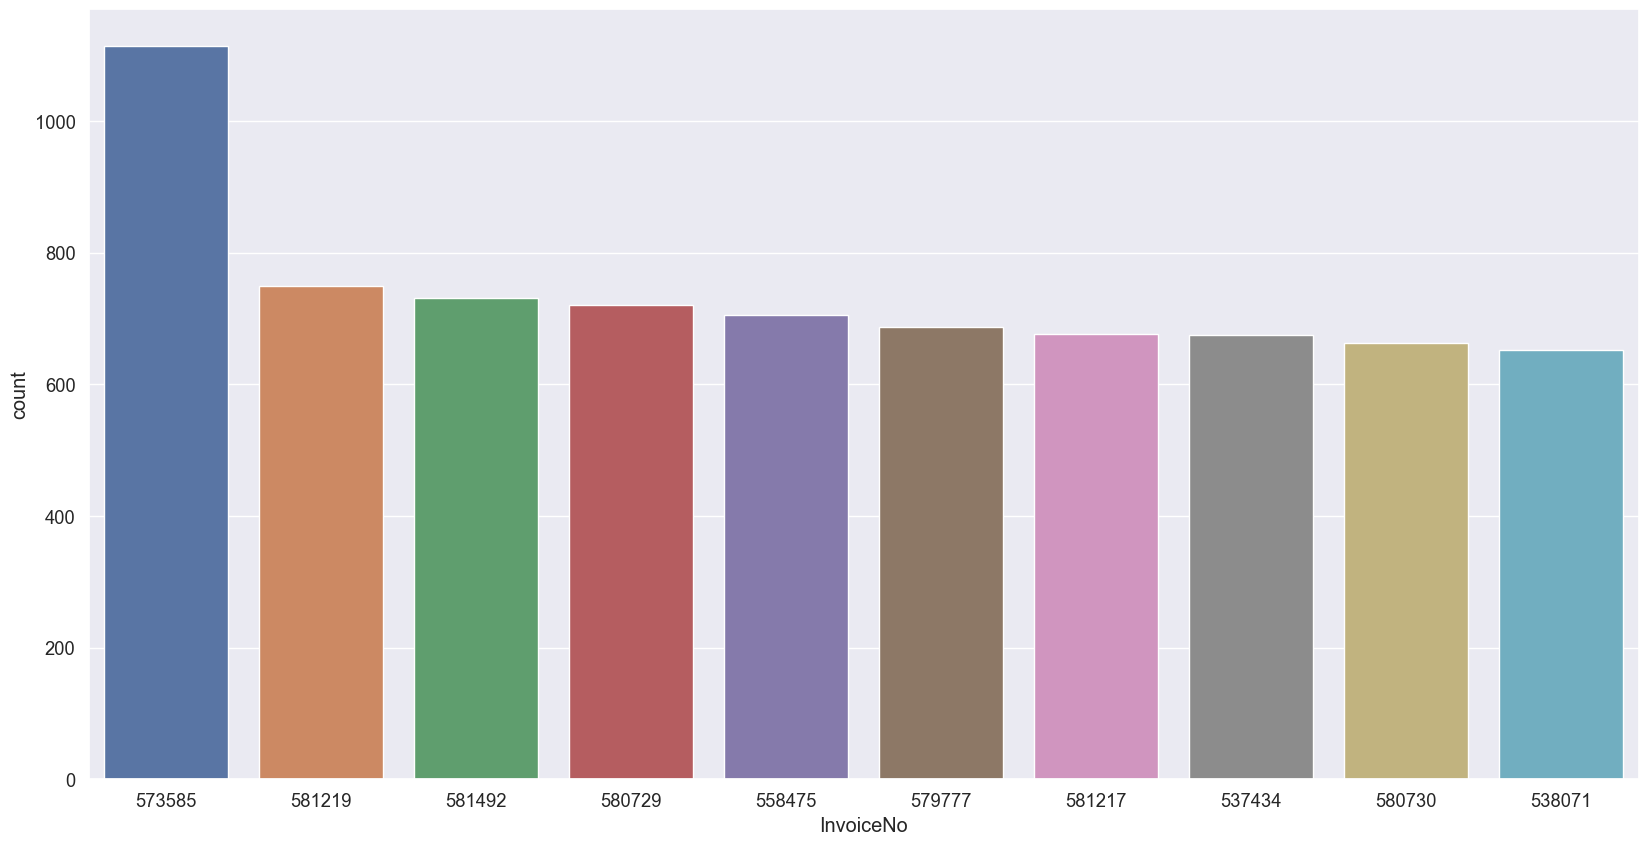

In [21]:
sns.set(rc={'figure.figsize': [20, 10]}, font_scale=1.2)
sns.countplot(data = top_10_counted_invoices_data , x = 'InvoiceNo' , order = df['InvoiceNo'].value_counts().sort_values(ascending = False)[:10].index)

** Visualize the lowest 10 counted invoices **

In [22]:
df['InvoiceNo'].value_counts().sort_values(ascending = True)[:10]

C558901    1
579181     1
576404     1
C539301    1
C539302    1
576473     1
539398     1
576517     1
C576515    1
576407     1
Name: InvoiceNo, dtype: int64

** Indicies of the lowest 10 counted invoices **

In [23]:
df['InvoiceNo'].value_counts().sort_values(ascending = True)[:10].index

Index(['C558901', '579181', '576404', 'C539301', 'C539302', '576473', '539398',
       '576517', 'C576515', '576407'],
      dtype='object')

** Find the dataframe that has only the data for the least 10 counted invoices **

In [24]:
Lowest_10_counted_invoices_data = df[df['InvoiceNo'].isin(df['InvoiceNo'].value_counts().sort_values(ascending = True)[:10].index)]

Lowest_10_counted_invoices_data

InvoiceNo StockCode                        Description  Quantity  \
33407    C539301     22457    NATURAL SLATE HEART CHALKBOARD        -12   
33408    C539302     22759       SET OF 3 NOTEBOOKS IN PARCEL       -12   
34029     539398     22720  SET OF 3 CAKE TINS PANTRY DESIGN          6   
247243   C558901     22456    NATURAL SLATE CHALKBOARD LARGE         -1   
464066    576404     22687                                NaN        18   
464113    576407    47590B                              check       -57   
464271    576473     21868                                NaN      -108   
464400   C576515     22689       DOORMAT MERRY CHRISTMAS RED         -2   
464413    576517     22121                                NaN        17   
502482    579181     23301  GARDENERS KNEELING PAD KEEP CALM        144   

               InvoiceDate  UnitPrice CustomerID         Country  
33407  2010-12-16 17:33:00       2.95      13496  United Kingdom  
33408  2010-12-16 17:33:00       1.65      15392  United Kingdom  
34029  2010-12-17 11:53:00       4.95      12471         Germany  
247243 2011-07-04 16:07:00       4.95      18171  United Kingdom  
464066 2011-11-15 11:09:00       0.00        NaN  United Kingdom  
464113 2011-11-15 11:18:00       0.00        NaN  United Kingdom  
464271 2011-11-15 11:40:00       0.00        NaN  United Kingdom  
464400 2011-11-15 12:16:00       8.25      13950  United Kingdom  
464413 2011-11-15 12:25:00       0.00        NaN  United Kingdom  
502482 2011-11-28 15:10:00       1.45      13881  United Kingdom

<AxesSubplot:xlabel='InvoiceNo', ylabel='count'>

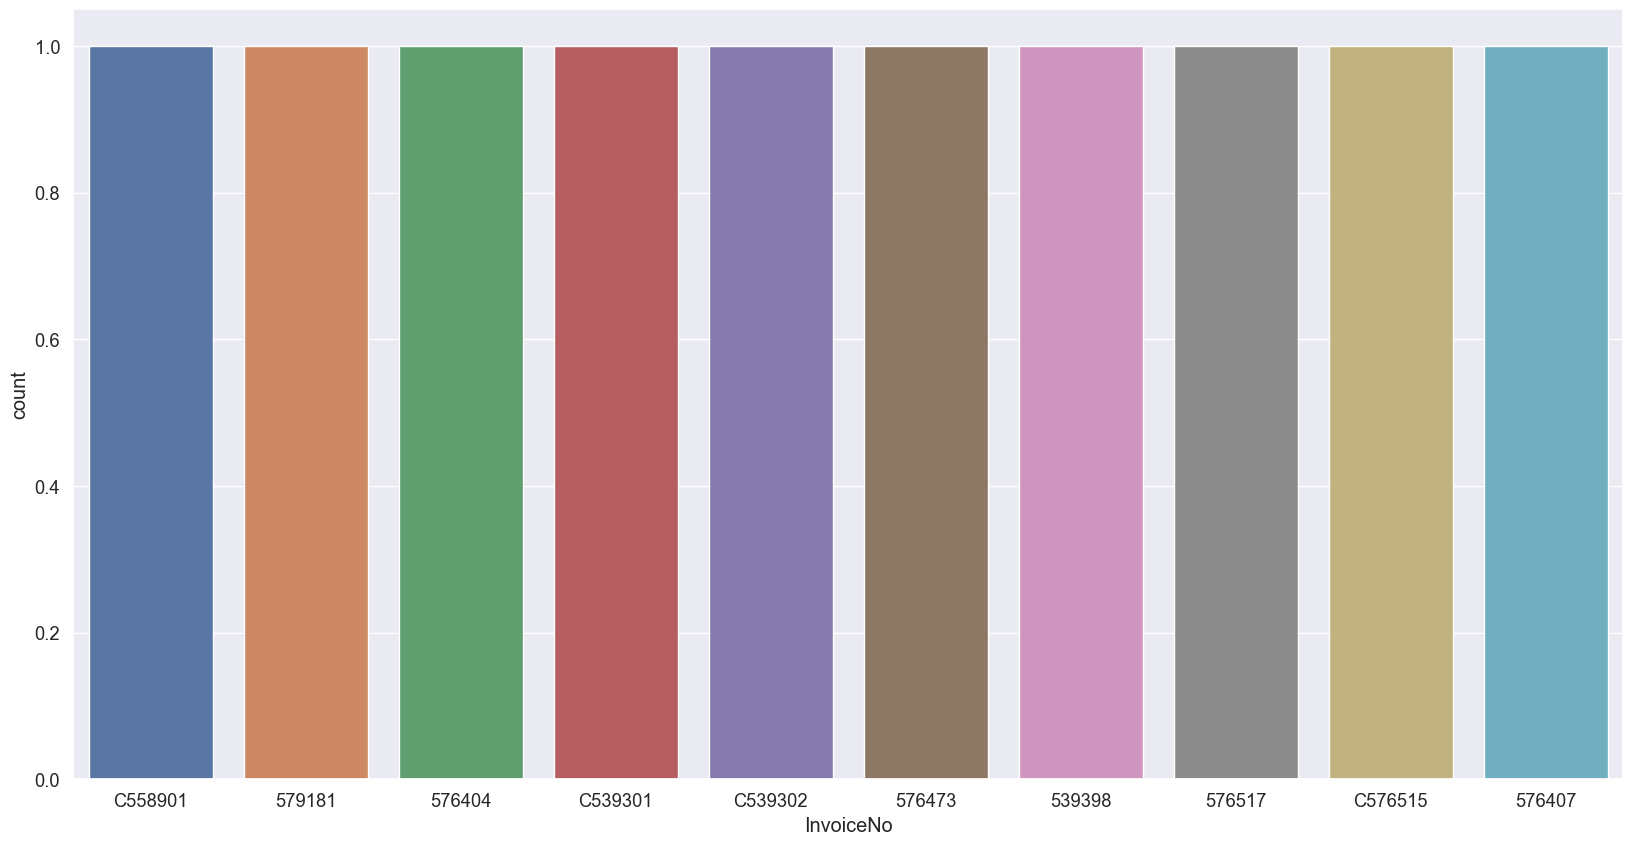

In [25]:
sns.set(rc={'figure.figsize': [20, 10]}, font_scale=1.2)
sns.countplot(data = Lowest_10_counted_invoices_data , x = 'InvoiceNo' , order = df['InvoiceNo'].value_counts().sort_values(ascending = True)[:10].index)

In [26]:
df['StockCode'].unique().tolist()

['85123A',
 '71053',
 '84406B',
 '84029G',
 '84029E',
 '22752',
 '21730',
 '22633',
 '22632',
 '84879',
 '22745',
 '22748',
 '22749',
 '22310',
 '84969',
 '22623',
 '22622',
 '21754',
 '21755',
 '21777',
 '48187',
 '22960',
 '22913',
 '22912',
 '22914',
 '21756',
 '22728',
 '22727',
 '22726',
 '21724',
 '21883',
 '10002',
 '21791',
 '21035',
 '22326',
 '22629',
 '22659',
 '22631',
 '22661',
 '21731',
 '22900',
 '21913',
 '22540',
 '22544',
 '22492',
 'POST',
 '22086',
 '20679',
 '37370',
 '21871',
 '21071',
 '21068',
 '82483',
 '82486',
 '82482',
 '82494L',
 '21258',
 '22114',
 '21733',
 '22386',
 '85099C',
 '21033',
 '20723',
 '84997B',
 '84997C',
 '21094',
 '20725',
 '21559',
 '22352',
 '21212',
 '21975',
 '21977',
 '84991',
 '84519A',
 '85183B',
 '85071B',
 '21931',
 '21929',
 '22961',
 '22139',
 '84854',
 '22411',
 '82567',
 '21672',
 '22774',
 '22771',
 '71270',
 '22262',
 '22637',
 '21934',
 '21169',
 '21166',
 '21175',
 '37444A',
 '37444C',
 '22083',
 '84971S',
 '47580',
 '22261

In [27]:
df['StockCode'].value_counts()

85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
72781        1
35015        1
72793        1
72789        1
90091        1
Name: StockCode, Length: 4070, dtype: int64

In [28]:
df['StockCode'].nunique()

4070

** Visualize the top 10 requested StockCodes **

In [29]:
df['StockCode'].value_counts().sort_values(ascending = False)[:10]

85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
84879     1489
22720     1469
22197     1468
21212     1367
22383     1328
Name: StockCode, dtype: int64

** Indicies of the top 10 requested StockCodes **

In [30]:
df['StockCode'].value_counts().sort_values(ascending = False)[:10].index

Index(['85123A', '22423', '85099B', '47566', '20725', '84879', '22720',
       '22197', '21212', '22383'],
      dtype='object')

** Find the dataframe that has only the data for the top 10 requested StockCodes**

In [31]:
top_10_requested_StockCodes_data = df[df['StockCode'].isin(df['StockCode'].value_counts().sort_values(ascending = False)[:10].index)]

top_10_requested_StockCodes_data

InvoiceNo StockCode                         Description  Quantity  \
0         536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
9         536367     84879       ASSORTED COLOUR BIRD ORNAMENT        32   
49        536373    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
66        536375    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
93        536378     20725             LUNCH BAG RED RETROSPOT        10   
...          ...       ...                                 ...       ...   
536414    581538     22197                      POPCORN HOLDER         4   
536430    581538     20725             LUNCH BAG RED RETROSPOT         1   
536557    581579     22197                      POPCORN HOLDER        24   
536597    581583     20725             LUNCH BAG RED RETROSPOT        40   
536607    581585     84879       ASSORTED COLOUR BIRD ORNAMENT        16   

               InvoiceDate  UnitPrice CustomerID         Country  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom  
9      2010-12-01 08:34:00       1.69      13047  United Kingdom  
49     2010-12-01 09:02:00       2.55      17850  United Kingdom  
66     2010-12-01 09:32:00       2.55      17850  United Kingdom  
93     2010-12-01 09:37:00       1.65      14688  United Kingdom  
...                    ...        ...        ...             ...  
536414 2011-12-09 11:34:00       0.85      14446  United Kingdom  
536430 2011-12-09 11:34:00       1.65      14446  United Kingdom  
536557 2011-12-09 12:19:00       0.85      17581  United Kingdom  
536597 2011-12-09 12:23:00       1.45      13777  United Kingdom  
536607 2011-12-09 12:31:00       1.69      15804  United Kingdom  

[17116 rows x 8 columns]

<AxesSubplot:xlabel='StockCode', ylabel='count'>

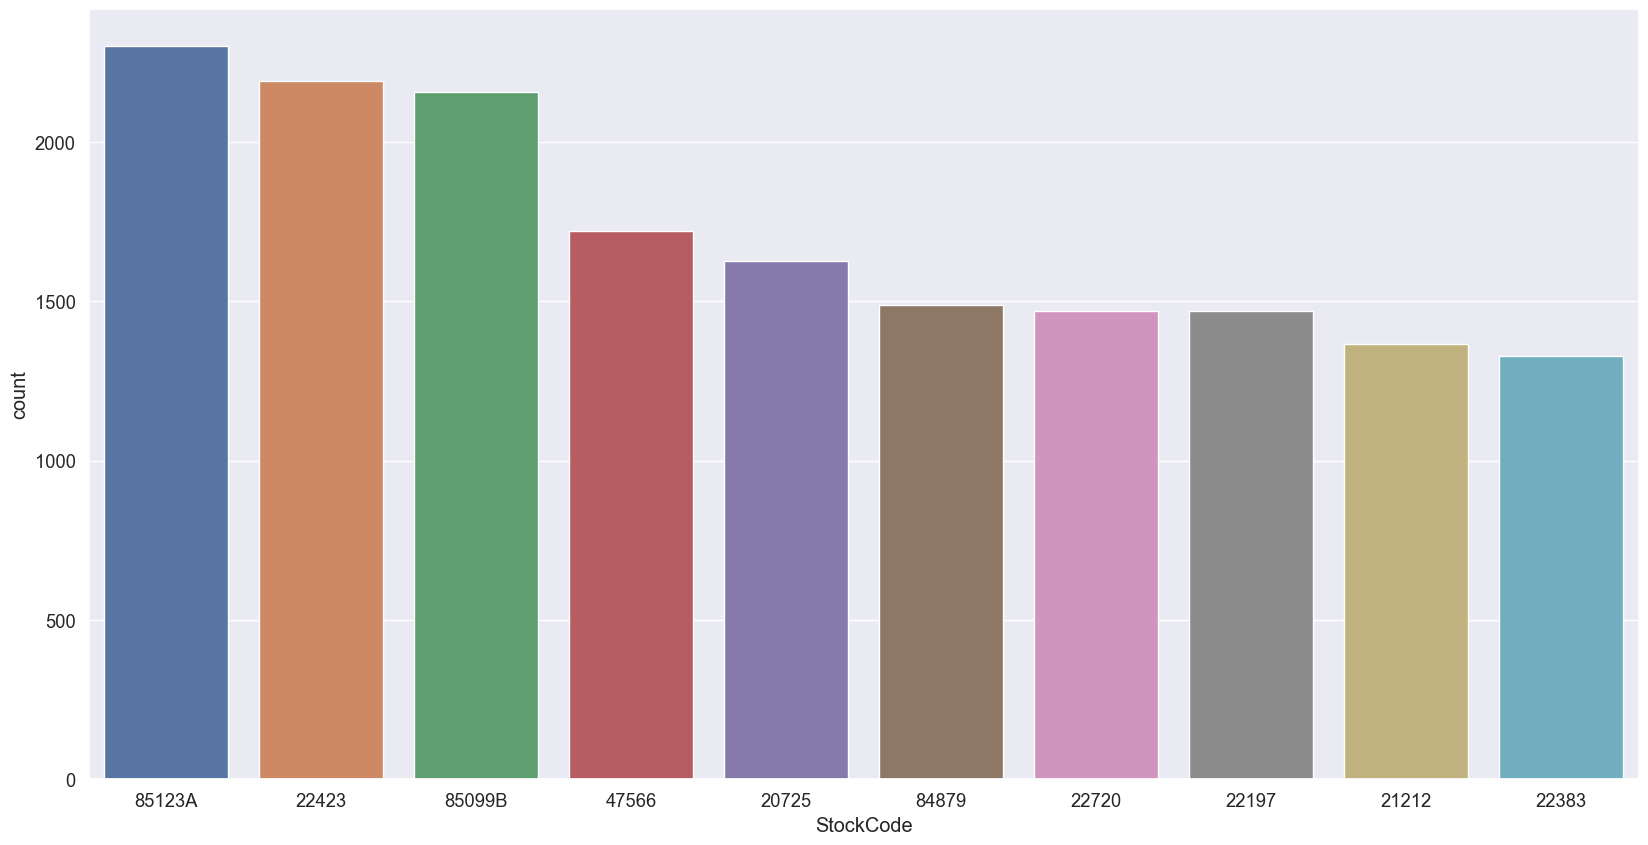

In [32]:
sns.set(rc={'figure.figsize': [20, 10]}, font_scale=1.2)
sns.countplot(data = top_10_requested_StockCodes_data , x = 'StockCode' , order = df['StockCode'].value_counts().sort_values(ascending = False)[:10].index)

** Visualize the lowest 10 requested StockCodes **

In [33]:
df['StockCode'].value_counts().sort_values(ascending = True)[:10]

90091     1
23652     1
37503     1
90162A    1
84206B    1
46776a    1
90060B    1
35832     1
84620     1
16169N    1
Name: StockCode, dtype: int64

** Indicies of the lowest 10 requested StockCodes **

In [34]:
df['StockCode'].value_counts().sort_values(ascending = True)[:10].index

Index(['90091', '23652', '37503', '90162A', '84206B', '46776a', '90060B',
       '35832', '84620', '16169N'],
      dtype='object')

** Find the dataframe that has only the data for the lowest 10 requested StockCodes**

In [35]:
Lowest_10_requested_StockCodes_data = df[df['StockCode'].isin(df['StockCode'].value_counts().sort_values(ascending = True)[:10].index)]

Lowest_10_requested_StockCodes_data

InvoiceNo StockCode                          Description  Quantity  \
11620     537334    16169N            WRAP BLUE RUSSIAN FOLKART        25   
28864    C538726     35832  WOOLLY HAT SOCK GLOVE ADVENT STRING        -1   
30697    C538898     37503      TEA TIME CAKE STAND IN GIFT BOX        -1   
31264     539009    90060B       FIRE POLISHED GLASS NECKL GOLD         1   
31446     539019     84620      BLUE GINGHAM ROSE CUSHION COVER         2   
74569     542581     90091                                  NaN        -1   
427552    573585    46776a       WOVEN BUBBLE GUM CUSHION COVER         5   
441654    574844    90162A   ANT SILVER TURQUOISE BOUDICCA RING         6   
473753    577078     23652   SET 10 CARD CHRISTMAS STAMPS 16963         2   
478966    577503    84206B       CAT WITH SUNGLASSES BLANK CARD         5   

               InvoiceDate  UnitPrice CustomerID         Country  
11620  2010-12-06 12:06:00       0.42      16719  United Kingdom  
28864  2010-12-14 11:18:00       2.95      13078  United Kingdom  
30697  2010-12-15 09:20:00      10.75      15078  United Kingdom  
31264  2010-12-15 13:24:00       5.95      13221  United Kingdom  
31446  2010-12-15 14:12:00       5.95      17551  United Kingdom  
74569  2011-01-28 14:58:00       0.00        NaN  United Kingdom  
427552 2011-10-31 14:41:00       4.13        NaN  United Kingdom  
441654 2011-11-07 11:57:00       2.95      12783        Portugal  
473753 2011-11-17 15:17:00       2.91        NaN  United Kingdom  
478966 2011-11-20 12:34:00       0.19      18110  United Kingdom

<AxesSubplot:xlabel='StockCode', ylabel='count'>

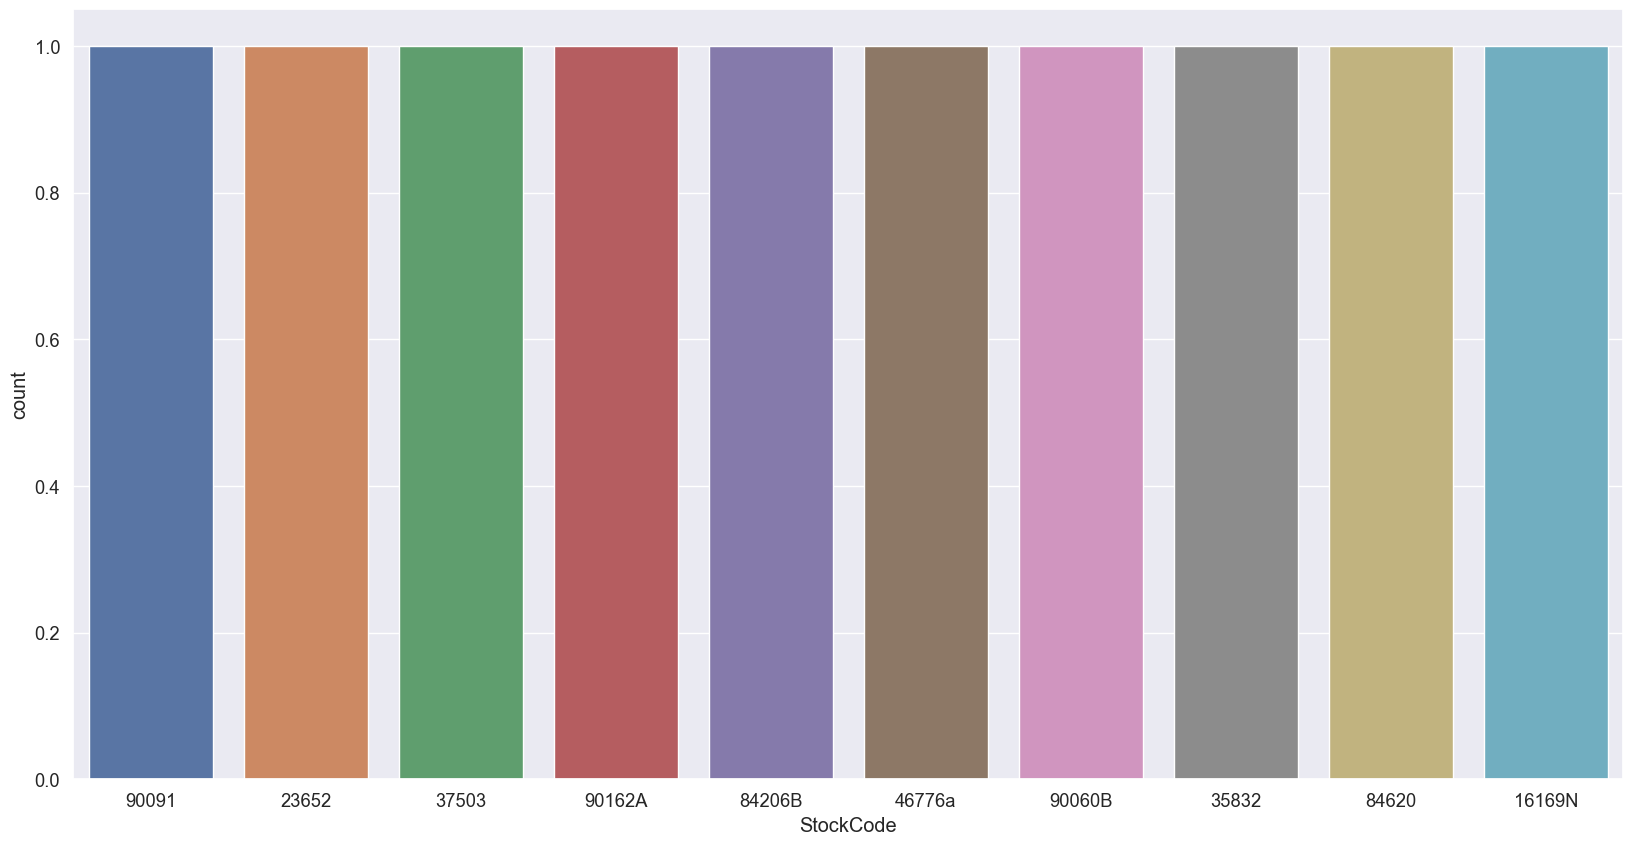

In [36]:
sns.set(rc={'figure.figsize': [20, 10]}, font_scale=1.2)
sns.countplot(data = Lowest_10_requested_StockCodes_data , x = 'StockCode' , order = df['StockCode'].value_counts().sort_values(ascending = True)[:10].index)

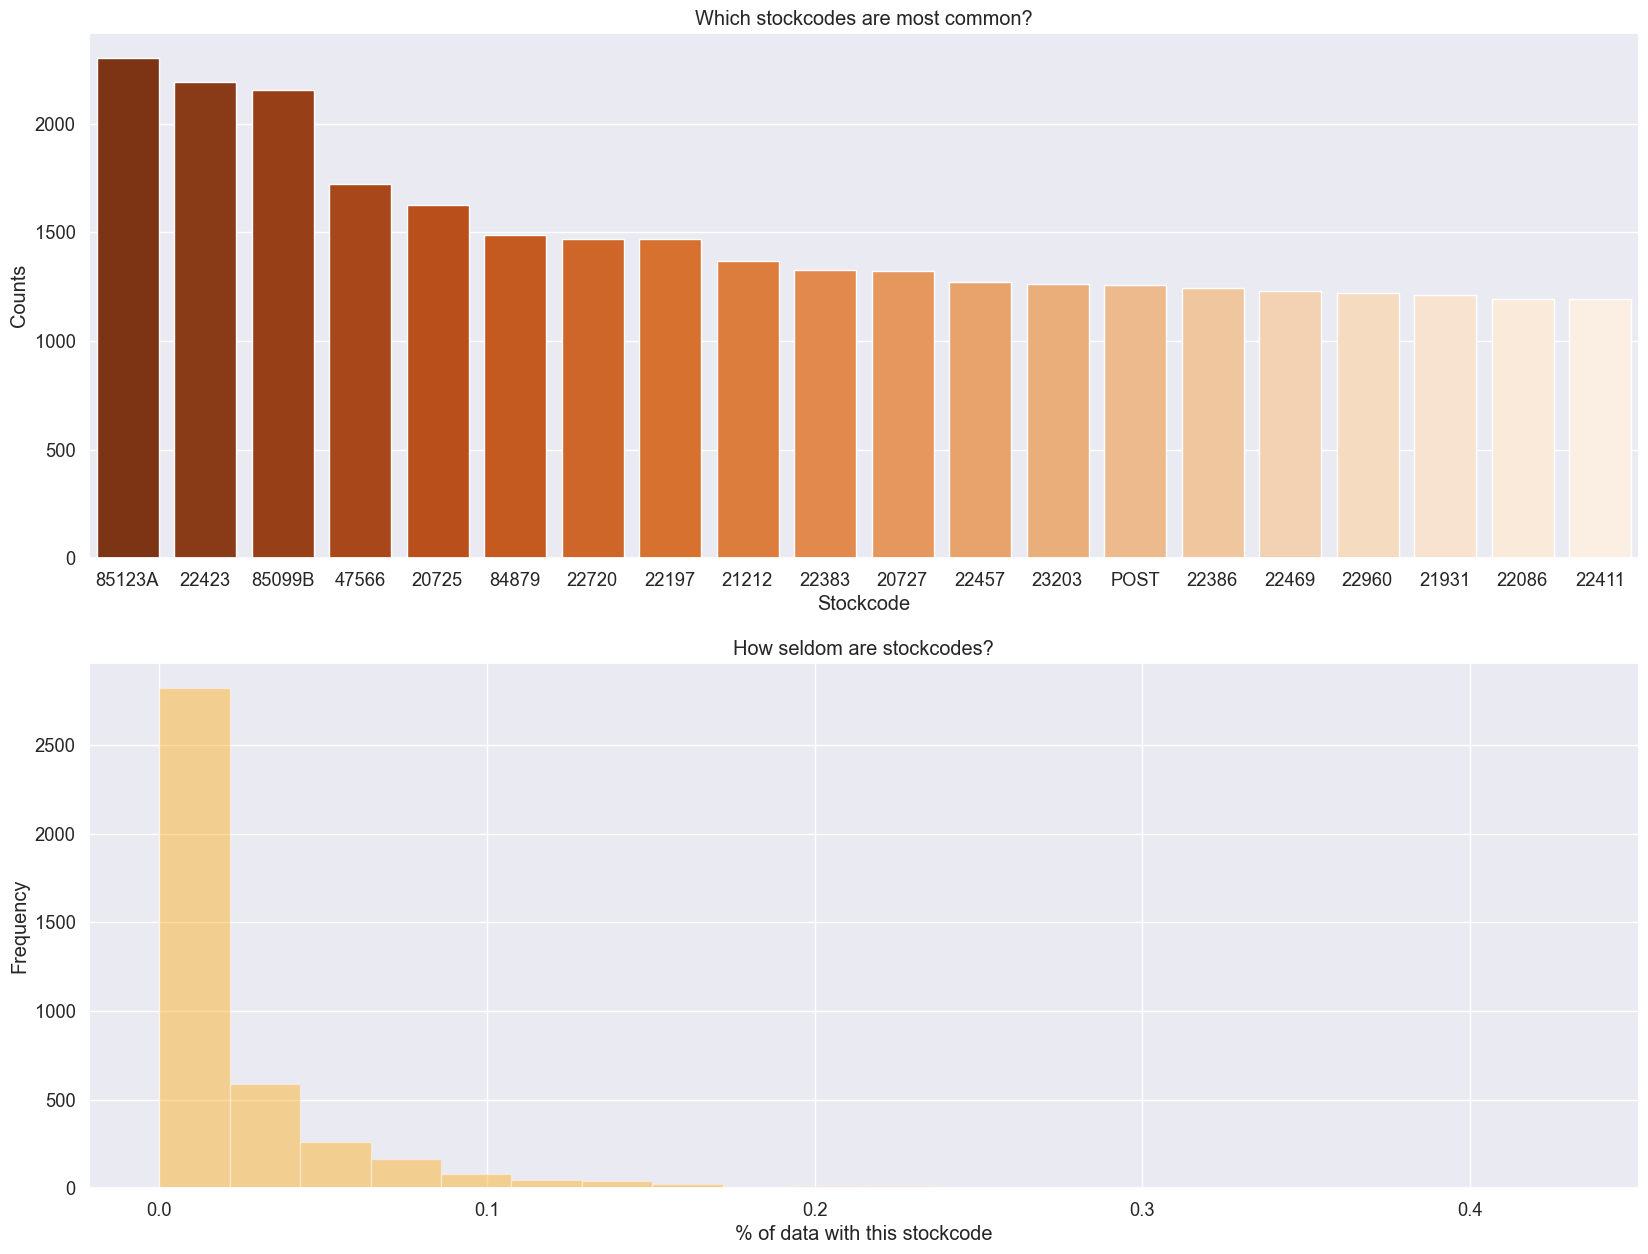

In [37]:
# Which codes are most common?

stockcode_counts = df.StockCode.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_counts.iloc[0:20].index,
            stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="Oranges_r")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?");
sns.distplot(np.round(stockcode_counts/df.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Orange")
ax[1].set_title("How seldom are stockcodes?")
ax[1].set_xlabel("% of data with this stockcode")
ax[1].set_ylabel("Frequency");

In [38]:
df['Description'].unique().tolist()

['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 "POPPY'S PLAYHOUSE BEDROOM ",
 "POPPY'S PLAYHOUSE KITCHEN",
 'FELTCRAFT PRINCESS CHARLOTTE DOLL',
 'IVORY KNITTED MUG COSY ',
 'BOX OF 6 ASSORTED COLOUR TEASPOONS',
 'BOX OF VINTAGE JIGSAW BLOCKS ',
 'BOX OF VINTAGE ALPHABET BLOCKS',
 'HOME BUILDING BLOCK WORD',
 'LOVE BUILDING BLOCK WORD',
 'RECIPE BOX WITH METAL HEART',
 'DOORMAT NEW ENGLAND',
 'JAM MAKING SET WITH JARS',
 'RED COAT RACK PARIS FASHION',
 'YELLOW COAT RACK PARIS FASHION',
 'BLUE COAT RACK PARIS FASHION',
 'BATH BUILDING BLOCK WORD',
 'ALARM CLOCK BAKELIKE PINK',
 'ALARM CLOCK BAKELIKE RED ',
 'ALARM CLOCK BAKELIKE GREEN',
 'PANDA AND BUNNIES STICKER SHEET',
 'STARS GIFT TAPE ',
 'INFLATAB

In [39]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2357
REGENCY CAKESTAND 3 TIER               2189
JUMBO BAG RED RETROSPOT                2156
PARTY BUNTING                          1720
LUNCH BAG RED RETROSPOT                1625
                                       ... 
rcvd be air temp fix for dotcom sit       1
SET 12 COLOURING PENCILS DOILEY           1
SET 36 COLOURING PENCILS DOILEY           1
 I LOVE LONDON MINI RUCKSACK              1
found some more on shelf                  1
Name: Description, Length: 4223, dtype: int64

In [40]:
df['Description'].nunique()

4223

In [41]:
df['Description'].value_counts().sort_values(ascending = False)[:30]

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
ASSORTED COLOUR BIRD ORNAMENT         1488
SET OF 3 CAKE TINS PANTRY DESIGN      1465
PACK OF 72 RETROSPOT CAKE CASES       1367
LUNCH BAG  BLACK SKULL.               1323
NATURAL SLATE HEART CHALKBOARD        1272
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1245
HEART OF WICKER SMALL                 1230
JAM MAKING SET WITH JARS              1221
JUMBO STORAGE BAG SUKI                1211
PAPER CHAIN KIT 50'S CHRISTMAS        1194
JUMBO SHOPPER VINTAGE RED PAISLEY     1192
LUNCH BAG CARS BLUE                   1185
LUNCH BAG SPACEBOY DESIGN             1177
JAM MAKING SET PRINTED                1177
RECIPE BOX PANTRY YELLOW DESIGN       1173
SPOTTY BUNTING                        1168
ROSES REGENCY TEACUP AND SAUCER       1128
WOODEN PICT

In [42]:
df['Description'].value_counts().sort_values(ascending = True)[:30]

found some more on shelf               1
PINK BERTIE MOBILE PHONE CHARM         1
GIRLY PINK TOOL SET                    1
FUNKY MONKEY MUG                       1
BLACK CHRISTMAS FLOCK DROPLET          1
RED ROSE AND LACE C/COVER              1
LARGE HEART FLOWERS HOOK               1
Not rcvd in 10/11/2010 delivery        1
CROCHET LILAC/RED BEAR KEYRING         1
SET 10 CARDS SNOWY ROBIN 17099         1
FOOD COVER WITH BEADS , SET 2 SIZES    1
M/COLOUR POM-POM CURTAIN               1
ZINC PLANT POT HOLDER                  1
incorrectly made-thrown away.          1
????missing                            1
ENAMEL DINNER PLATE PANTRY             1
?? missing                             1
SET OF 6 EASTER RAINBOW CHICKS         1
4 GOLD FLOCK CHRISTMAS BALLS           1
check?                                 1
mailout                                1
rusty thrown away                      1
POLYESTER FILLER PAD 60x40cm           1
dotcom adjust                          1
sold as set/6 by

** Visualize the most common products **

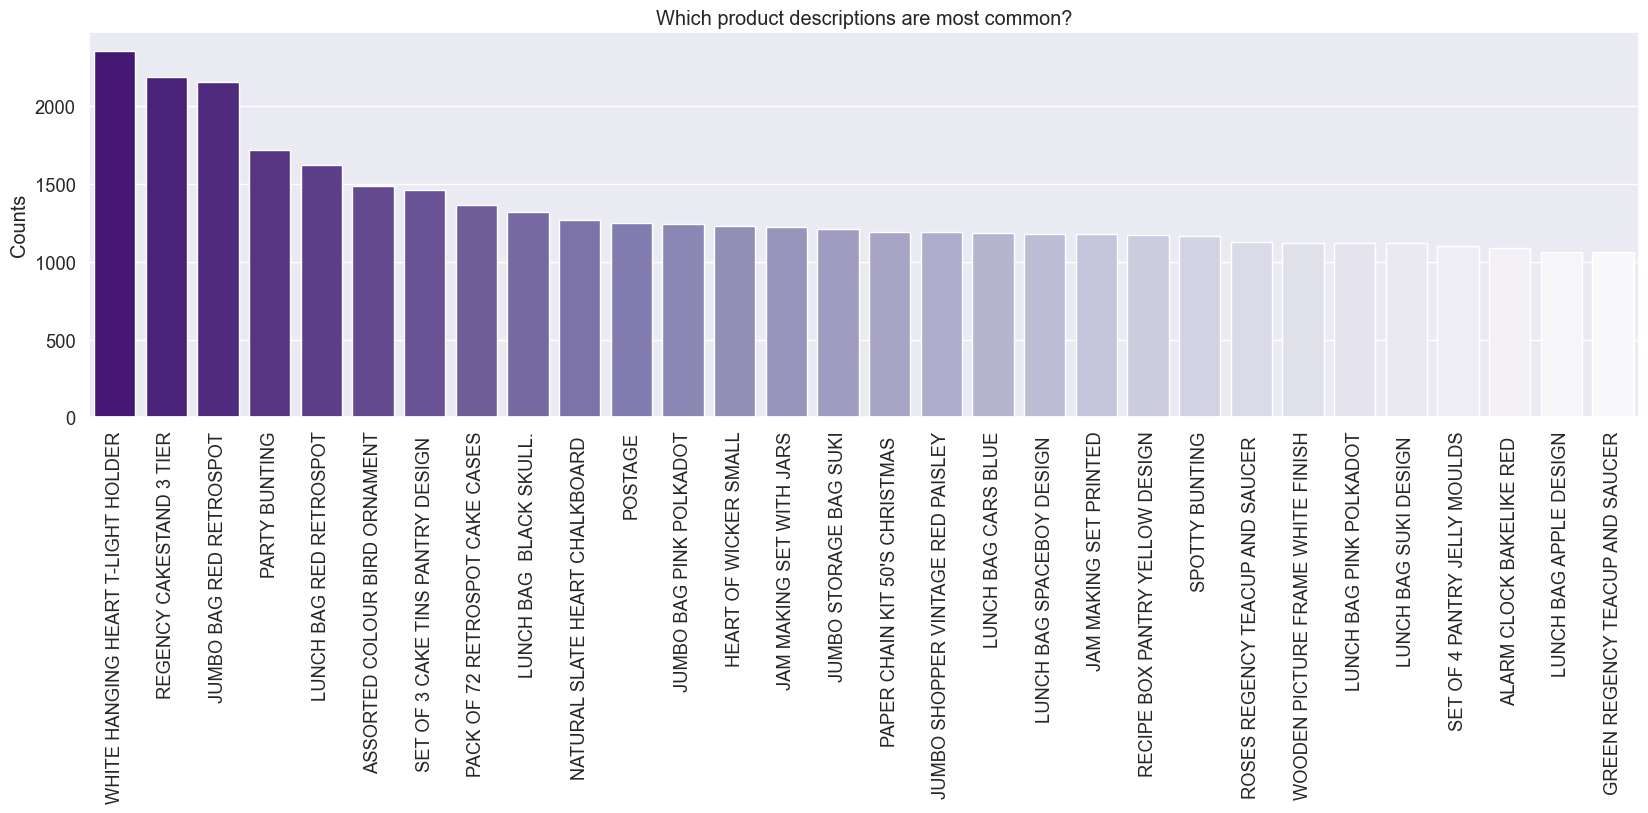

In [43]:
description_counts = df.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product descriptions are most common?");
plt.xticks(rotation=90);

** Visualize the least common products **

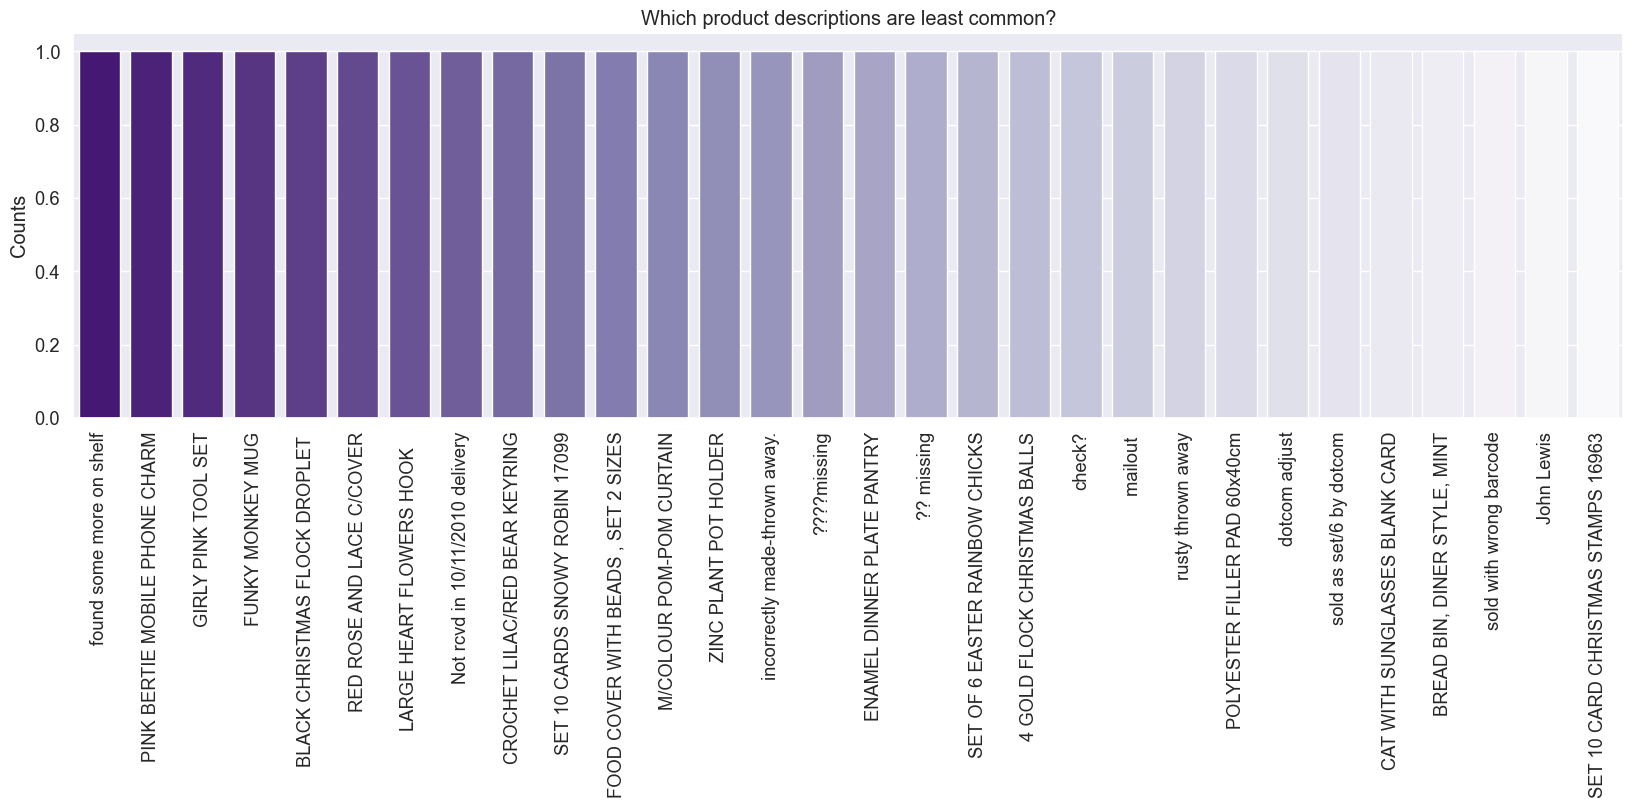

In [44]:
description_counts = df.Description.value_counts().sort_values(ascending=True).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product descriptions are least common?");
plt.xticks(rotation=90);

In [45]:
df['Quantity'].unique().tolist()

[6,
 8,
 2,
 32,
 3,
 4,
 24,
 12,
 48,
 18,
 20,
 36,
 80,
 64,
 10,
 120,
 96,
 23,
 5,
 1,
 -1,
 50,
 40,
 100,
 192,
 432,
 144,
 288,
 -12,
 -24,
 16,
 9,
 128,
 25,
 30,
 28,
 7,
 56,
 72,
 200,
 600,
 480,
 -6,
 14,
 -2,
 11,
 33,
 13,
 -4,
 -5,
 -7,
 -3,
 70,
 252,
 60,
 216,
 384,
 -10,
 27,
 15,
 22,
 19,
 17,
 21,
 34,
 47,
 108,
 52,
 -9360,
 -38,
 75,
 270,
 42,
 240,
 90,
 320,
 1824,
 204,
 69,
 -36,
 -192,
 -144,
 160,
 2880,
 1400,
 39,
 -48,
 -50,
 26,
 1440,
 31,
 82,
 78,
 97,
 98,
 35,
 57,
 -20,
 110,
 -22,
 -30,
 -70,
 -130,
 -80,
 -120,
 -40,
 -25,
 -14,
 -15,
 -69,
 -140,
 -320,
 -8,
 720,
 156,
 324,
 38,
 37,
 49,
 95,
 -9,
 -11,
 29,
 41,
 -72,
 -35,
 -21,
 -43,
 -19,
 -18,
 -44,
 402,
 378,
 150,
 300,
 54,
 104,
 67,
 258,
 66,
 44,
 55,
 46,
 99,
 61,
 408,
 972,
 208,
 1008,
 1000,
 -77,
 1488,
 250,
 1394,
 400,
 -223,
 -150,
 -13,
 -33,
 -723,
 -177,
 79,
 84,
 -32,
 -100,
 -28,
 272,
 -145,
 -47,
 -96,
 113,
 45,
 106,
 68,
 267,
 115,
 65,
 1728,
 -6

In [46]:
df['Quantity'].nunique()

722

In [47]:
df['Quantity'].value_counts()

 1        144495
 2         81245
 12        60858
 6         40656
 4         38393
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

** Visualize Quantity and Log of Quantity **

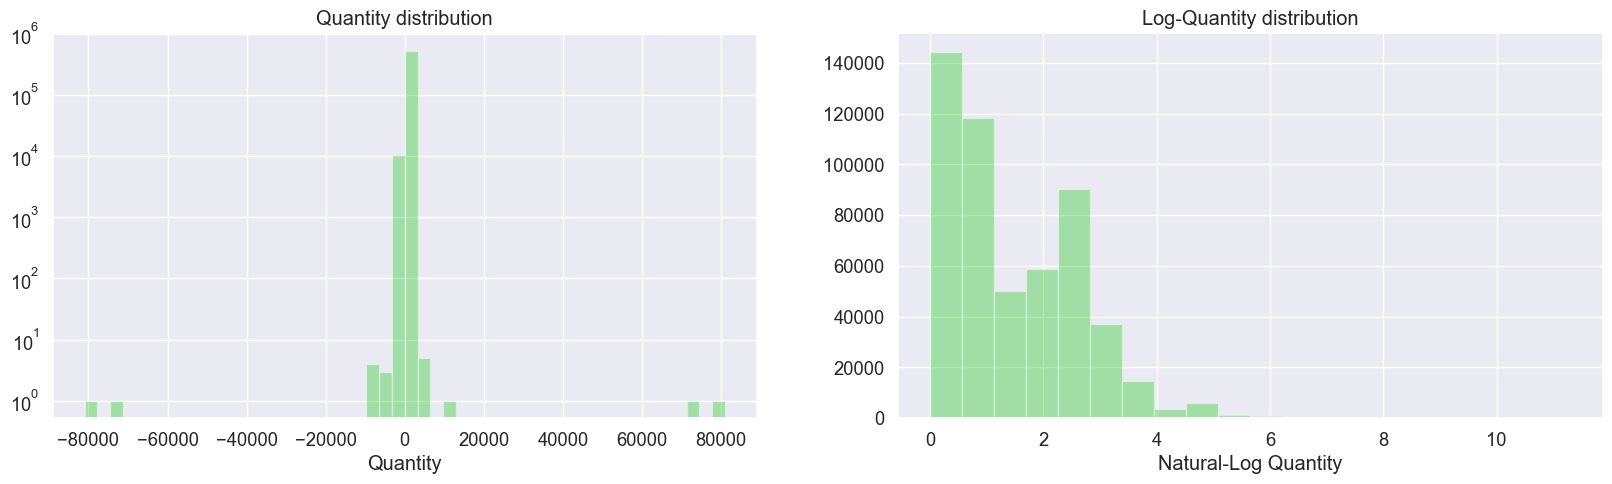

In [48]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.Quantity, ax=ax[0], kde=False, color="limegreen");
sns.distplot(np.log(df.Quantity), ax=ax[1], bins=20, kde=False, color="limegreen");
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")
ax[1].set_xlabel("Natural-Log Quantity");

** Cleaning Quality **

In [49]:
df[df['Quantity'] == 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [50]:
df[df['Quantity'] > 0]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
536636    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
536637    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
536638    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
536639    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
536640    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom  
...                    ...        ...        ...             ...  
536636 2011-12-09 12:50:00       0.85      12680          France  
536637 2011-12-09 12:50:00       2.10      12680          France  
536638 2011-12-09 12:50:00       4.15      12680          France  
536639 2011-12-09 12:50:00       4.15      12680          France  
536640 2011-12-09 12:50:00       4.95      12680          France  

[526054 rows x 8 columns]

In [51]:
df[df['Quantity'] < 0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
535188   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
536280   C581499         M                            Manual        -1   
536447   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
536448   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
536449   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  
141    2010-12-01 09:41:00      27.50      14527  United Kingdom  
154    2010-12-01 09:49:00       4.65      15311  United Kingdom  
235    2010-12-01 10:24:00       1.65      17548  United Kingdom  
236    2010-12-01 10:24:00       0.29      17548  United Kingdom  
237    2010-12-01 10:24:00       0.29      17548  United Kingdom  
...                    ...        ...        ...             ...  
535188 2011-12-09 09:57:00       0.83      14397  United Kingdom  
536280 2011-12-09 10:28:00     224.69      15498  United Kingdom  
536447 2011-12-09 11:57:00      10.95      15311  United Kingdom  
536448 2011-12-09 11:58:00       1.25      17315  United Kingdom  
536449 2011-12-09 11:58:00       1.25      17315  United Kingdom  

[10587 rows x 8 columns]

In [52]:
(df[df['Quantity'] < 0].shape[0]) / df.shape[0] * 100

1.9728272718633126

** Dropping null values from Quality **

In [53]:
df.drop(df[df['Quantity'] < 0].index , axis = 0 , inplace = True)

In [54]:
df[df['Quantity'] < 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [55]:
df.reset_index(drop = True , inplace = True)

** Confirming that all cancelled invoices don't exist **

In [56]:
df['order_canceled'] = df['InvoiceNo'].apply(lambda x:int('C' in x))
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
526049    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
526050    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
526051    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
526052    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
526053    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  \
0      2010-12-01 08:26:00       2.55      17850  United Kingdom   
1      2010-12-01 08:26:00       3.39      17850  United Kingdom   
2      2010-12-01 08:26:00       2.75      17850  United Kingdom   
3      2010-12-01 08:26:00       3.39      17850  United Kingdom   
4      2010-12-01 08:26:00       3.39      17850  United Kingdom   
...                    ...        ...        ...             ...   
526049 2011-12-09 12:50:00       0.85      12680          France   
526050 2011-12-09 12:50:00       2.10      12680          France   
526051 2011-12-09 12:50:00       4.15      12680          France   
526052 2011-12-09 12:50:00       4.15      12680          France   
526053 2011-12-09 12:50:00       4.95      12680          France   

        order_canceled  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
526049               0  
526050               0  
526051               0  
526052               0  
526053               0  

[526054 rows x 9 columns]

In [57]:
df['order_canceled'].unique()

array([0], dtype=int64)

In [58]:
df.drop('order_canceled' , axis = 1 , inplace = True)

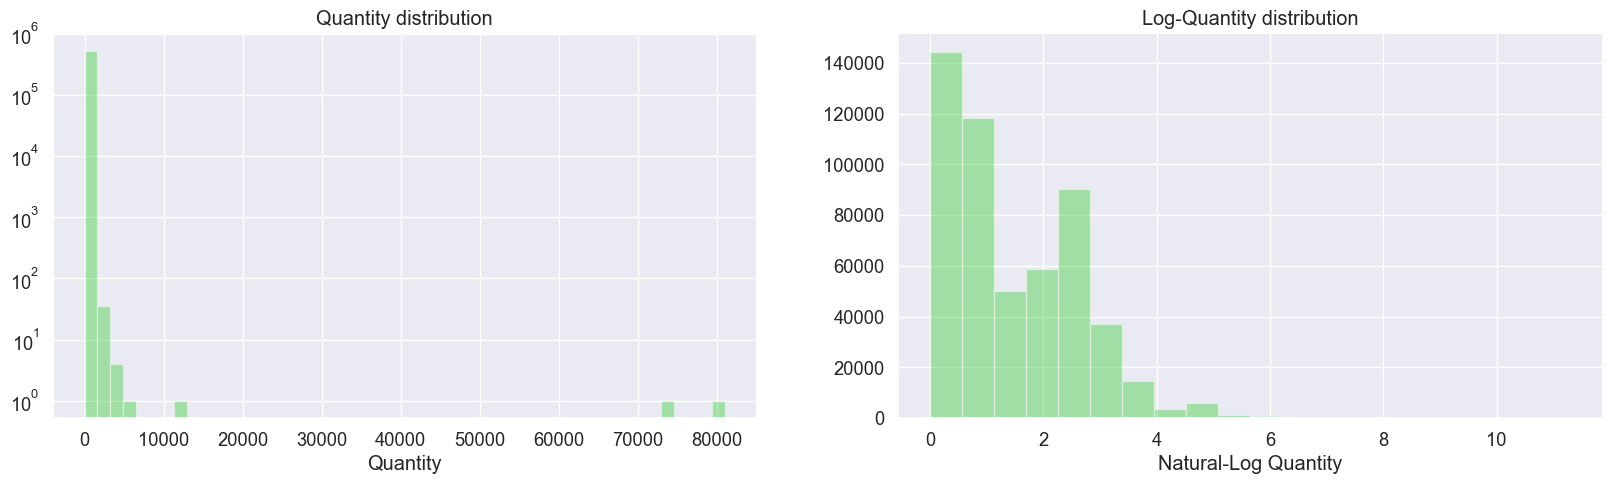

In [59]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.Quantity, ax=ax[0], kde=False, color="limegreen");
sns.distplot(np.log(df.Quantity), ax=ax[1], bins=20, kde=False, color="limegreen");
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")
ax[1].set_xlabel("Natural-Log Quantity");

In [60]:
df['CustomerID'].unique().tolist()

['17850',
 '13047',
 '12583',
 '13748',
 '15100',
 '15291',
 '14688',
 '17809',
 '15311',
 '16098',
 '18074',
 '17420',
 '16029',
 '16250',
 '12431',
 '17511',
 '13705',
 '13747',
 '13408',
 '13767',
 '17924',
 '13448',
 '15862',
 '15513',
 '12791',
 '16218',
 '14045',
 '14307',
 '17908',
 '17920',
 nan,
 '12838',
 '13255',
 '16583',
 '18085',
 '13758',
 '13694',
 '15983',
 '14849',
 '17968',
 '16210',
 '17897',
 '17377',
 '16552',
 '17181',
 '17951',
 '14729',
 '12748',
 '15012',
 '12868',
 '17572',
 '14078',
 '14001',
 '12662',
 '15525',
 '14237',
 '17905',
 '15485',
 '12433',
 '16955',
 '15350',
 '15605',
 '18144',
 '15922',
 '14594',
 '15165',
 '14911',
 '16456',
 '17346',
 '17643',
 '17841',
 '17873',
 '13093',
 '12921',
 '13468',
 '17760',
 '16928',
 '16048',
 '16274',
 '14496',
 '14696',
 '16539',
 '17025',
 '13777',
 '17690',
 '12947',
 '17460',
 '18229',
 '14142',
 '17069',
 '13065',
 '14606',
 '16835',
 '15235',
 '13576',
 '18011',
 '13090',
 '15694',
 '14741',
 '13715',
 '17

In [61]:
df['CustomerID'].nunique()

4339

In [62]:
df['CustomerID'].value_counts()

17841    7676
14911    5672
14096    5111
12748    4413
14606    2677
         ... 
17747       1
16737       1
18184       1
15313       1
13106       1
Name: CustomerID, Length: 4339, dtype: int64

** Finding the 20 most common customers  **

In [63]:
df['CustomerID'].value_counts().sort_values(ascending = False)[:20]

17841    7676
14911    5672
14096    5111
12748    4413
14606    2677
15311    2366
14646    2080
13089    1814
13263    1667
14298    1637
15039    1477
14156    1395
18118    1263
14159    1175
14796    1132
16033    1128
15005    1112
14056    1088
14769    1062
13081    1028
Name: CustomerID, dtype: int64

** Finding the 20 least common customers  **

In [64]:
df['CustomerID'].value_counts().sort_values(ascending = True)[:20]

13106    1
17923    1
13017    1
13302    1
16990    1
16148    1
15657    1
18174    1
15823    1
18084    1
17763    1
14090    1
16144    1
12346    1
18233    1
13099    1
17715    1
15195    1
16953    1
13120    1
Name: CustomerID, dtype: int64

** Visualize the most common customers **

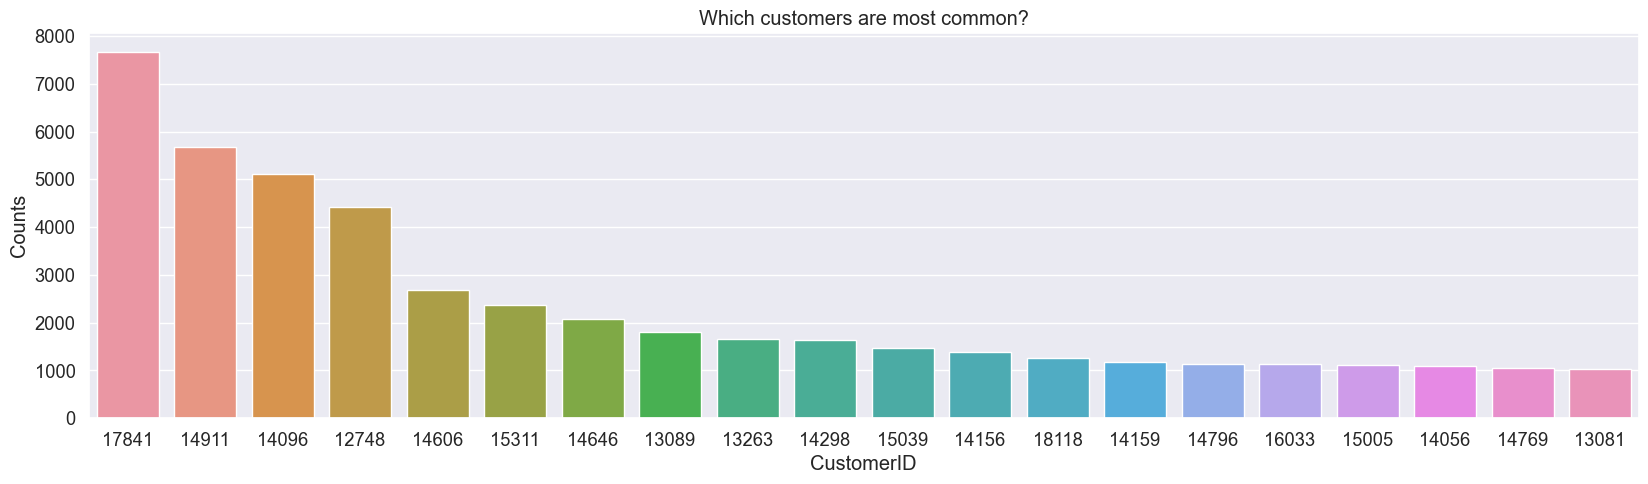

In [65]:
customer_counts = df.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");


** Visualize the least common customers **

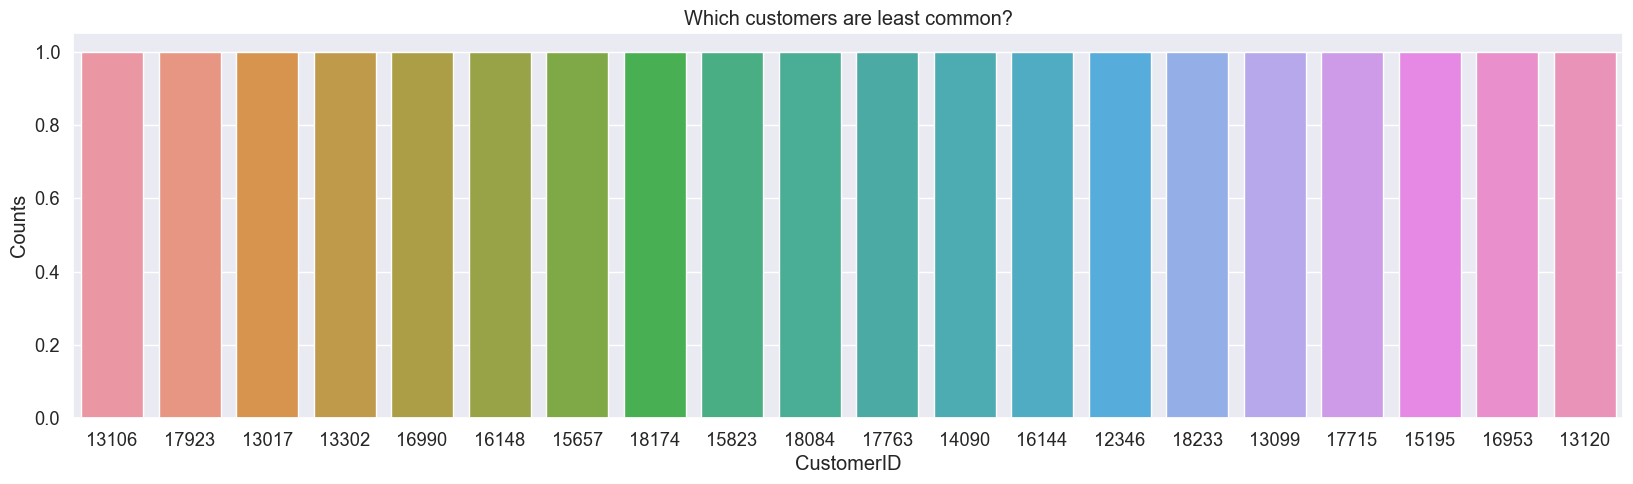

In [66]:
customer_counts = df.CustomerID.value_counts().sort_values(ascending=True).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are least common?");

In [67]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [68]:
df['Country'].nunique()

38

In [69]:
df['Country'].value_counts().sort_values(ascending = False)

United Kingdom          481143
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [70]:
df['Country'] = df['Country'].apply(lambda x : np.nan if x == 'Unspecified' else x )

In [71]:
df['Country'].isnull().sum()

442

** Finding the most common countries **

In [72]:
df['Country'].value_counts().sort_values(ascending = True)

Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  280
Israel                     292
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     450
Cyprus                     603
Finland                    685
Channel Islands            747
Italy                      758
Norway                    1072
Australia                 1184
Portugal                  1492
Switzerland               1959
Belgium                   2031
Netherlands               2363
Spain   

** Which countries made the most transactions ? **

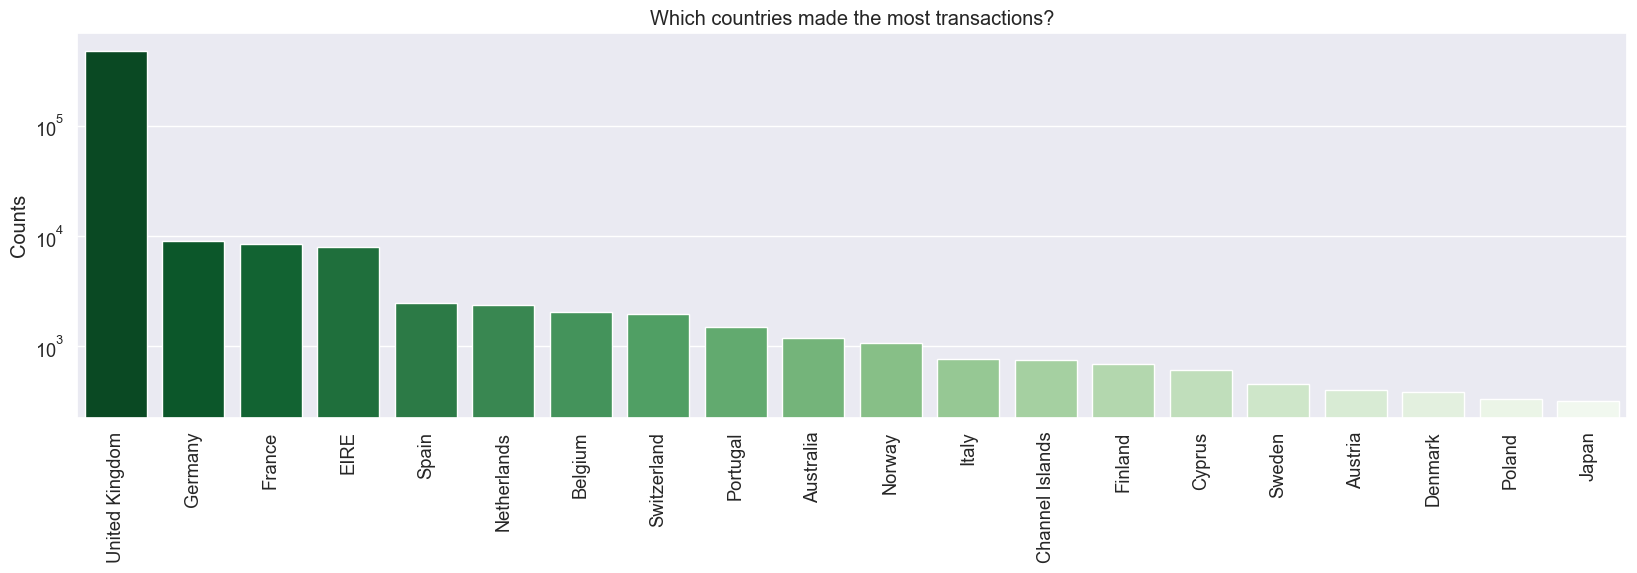

In [73]:
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

** Which countries made the least transactions ? **

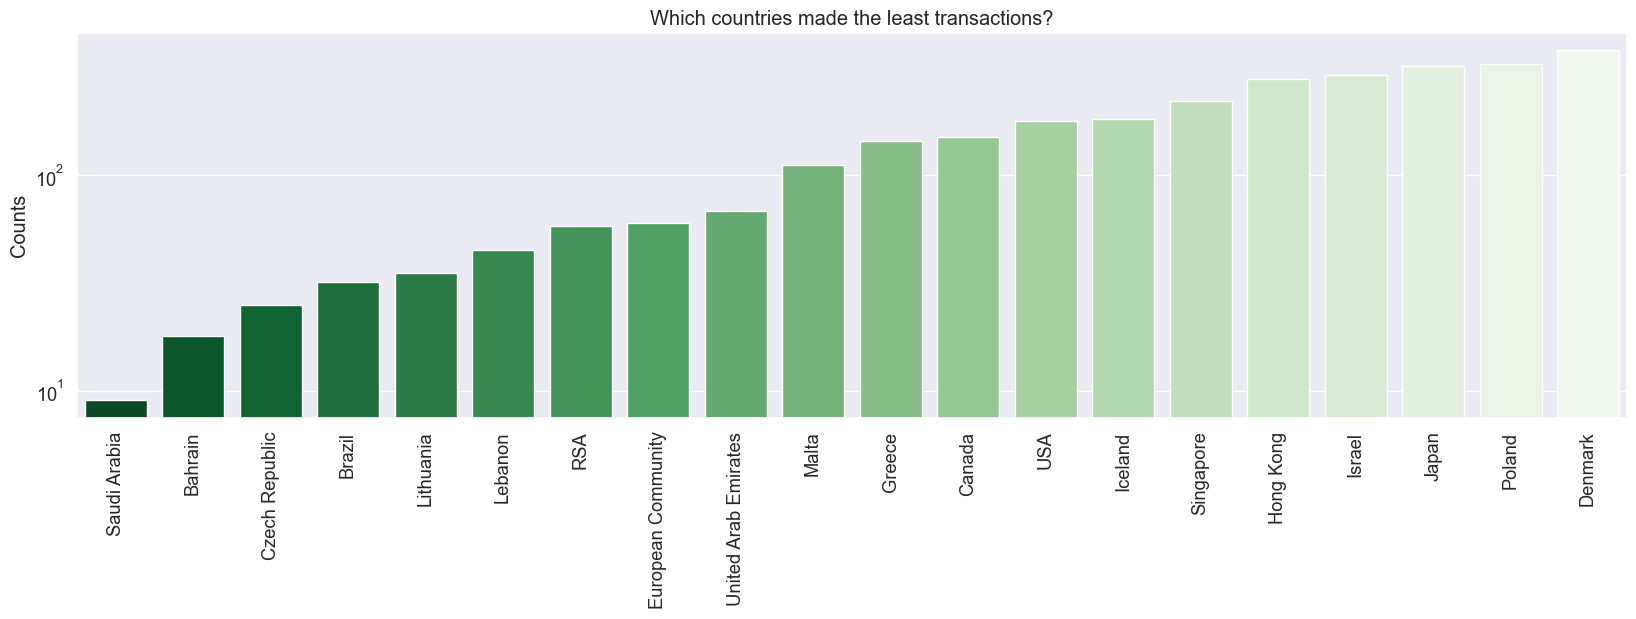

In [74]:
country_counts = df.Country.value_counts().sort_values(ascending=True).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the least transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

In [75]:
df['UnitPrice'].unique().tolist()

[2.55,
 3.39,
 2.75,
 7.65,
 4.25,
 1.85,
 1.69,
 2.1,
 3.75,
 1.65,
 4.95,
 9.95,
 5.95,
 7.95,
 0.85,
 0.65,
 1.25,
 2.95,
 1.95,
 0.42,
 18.0,
 1.06,
 6.95,
 10.95,
 3.45,
 0.55,
 0.38,
 1.45,
 3.95,
 6.75,
 14.95,
 16.95,
 6.45,
 12.75,
 19.95,
 8.5,
 3.82,
 3.37,
 5.45,
 6.35,
 0.72,
 0.64,
 0.1,
 0.32,
 1.48,
 165.0,
 35.75,
 4.65,
 0.29,
 3.35,
 10.65,
 15.0,
 0.95,
 0.21,
 0.12,
 0.0,
 0.24,
 3.25,
 1.49,
 2.25,
 1.55,
 18.95,
 8.95,
 50.0,
 2.51,
 1.66,
 0.43,
 7.62,
 4.21,
 2.98,
 5.91,
 3.36,
 16.98,
 1.28,
 11.02,
 8.47,
 0.81,
 5.06,
 12.72,
 10.17,
 6.77,
 20.38,
 11.87,
 25.49,
 51.02,
 9.32,
 34.0,
 0.84,
 16.13,
 21.23,
 18.68,
 14.43,
 3.81,
 4.24,
 1.26,
 5.09,
 2.96,
 2.11,
 569.77,
 13.57,
 29.95,
 4.6,
 1.05,
 5.49,
 59.53,
 15.28,
 19.53,
 2.82,
 1.27,
 3.19,
 0.99,
 2.13,
 5.51,
 8.49,
 8.07,
 7.22,
 2.54,
 9.34,
 5.94,
 607.49,
 0.19,
 10.75,
 24.95,
 79.95,
 11.95,
 0.75,
 0.36,
 0.34,
 0.16,
 1.88,
 7.25,
 0.18,
 295.0,
 40.0,
 5.74,
 29.79,
 254.43,
 121.06,

In [76]:
df['UnitPrice'].nunique()

1293

In [77]:
df['UnitPrice'].value_counts()

1.25       49011
1.65       36944
0.85       27748
2.95       26692
0.42       24046
           ...  
156.45         1
28.66          1
46.86          1
84.21          1
1714.17        1
Name: UnitPrice, Length: 1293, dtype: int64

** Cleaning the unit price **

In [78]:
df[df['UnitPrice'] < 0]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
291307   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
291308   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice CustomerID         Country  
291307  -11062.06        NaN  United Kingdom  
291308  -11062.06        NaN  United Kingdom

In [79]:
df.drop(df[df['UnitPrice'] < 0].index , axis= 0 , inplace = True)

In [80]:
df[df['UnitPrice'] == 0]

InvoiceNo StockCode                   Description  Quantity  \
596       536414     22139                           NaN        56   
1922      536545     21134                           NaN         1   
1923      536546     22145                           NaN         1   
1924      536547     37509                           NaN         1   
1925      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
519597    581211     22142                         check        14   
521225    581234     72817                           NaN        27   
522712    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
522713    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
522762    581408     85175                           NaN        20   

               InvoiceDate  UnitPrice CustomerID         Country  
596    2010-12-01 11:52:00        0.0        NaN  United Kingdom  
1922   2010-12-01 14:32:00        0.0        NaN  United Kingdom  
1923   2010-12-01 14:33:00        0.0        NaN  United Kingdom  
1924   2010-12-01 14:33:00        0.0        NaN  United Kingdom  
1925   2010-12-01 14:34:00        0.0        NaN  United Kingdom  
...                    ...        ...        ...             ...  
519597 2011-12-07 18:36:00        0.0        NaN  United Kingdom  
521225 2011-12-08 10:33:00        0.0        NaN  United Kingdom  
522712 2011-12-08 13:58:00        0.0        NaN  United Kingdom  
522713 2011-12-08 13:58:00        0.0        NaN  United Kingdom  
522762 2011-12-08 14:06:00        0.0        NaN  United Kingdom  

[1174 rows x 8 columns]

In [81]:
(df[df['UnitPrice'] == 0].shape[0] )/df.shape[0] * 100

0.22317185373309104

In [82]:
df['UnitPrice'] = df['UnitPrice'].apply(lambda x : np.nan if x == 0.0 else x)

In [83]:
df['UnitPrice'].isnull().sum()

1174

In [84]:
df['UnitPrice'].isnull().mean() * 100

0.22317185373309104

** Dropping null values from UnitPrice **

In [85]:
df.dropna(subset = ['UnitPrice'] , axis = 0 , inplace = True)

In [86]:
df.reset_index(drop = True , inplace = True)

In [87]:
df['UnitPrice'].isnull().sum()

0

In [88]:
df[df['UnitPrice'] > 0]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom  
...                    ...        ...        ...             ...  
524873 2011-12-09 12:50:00       0.85      12680          France  
524874 2011-12-09 12:50:00       2.10      12680          France  
524875 2011-12-09 12:50:00       4.15      12680          France  
524876 2011-12-09 12:50:00       4.15      12680          France  
524877 2011-12-09 12:50:00       4.95      12680          France  

[524878 rows x 8 columns]

** Visualize UnitPrice & log UnitPrice **

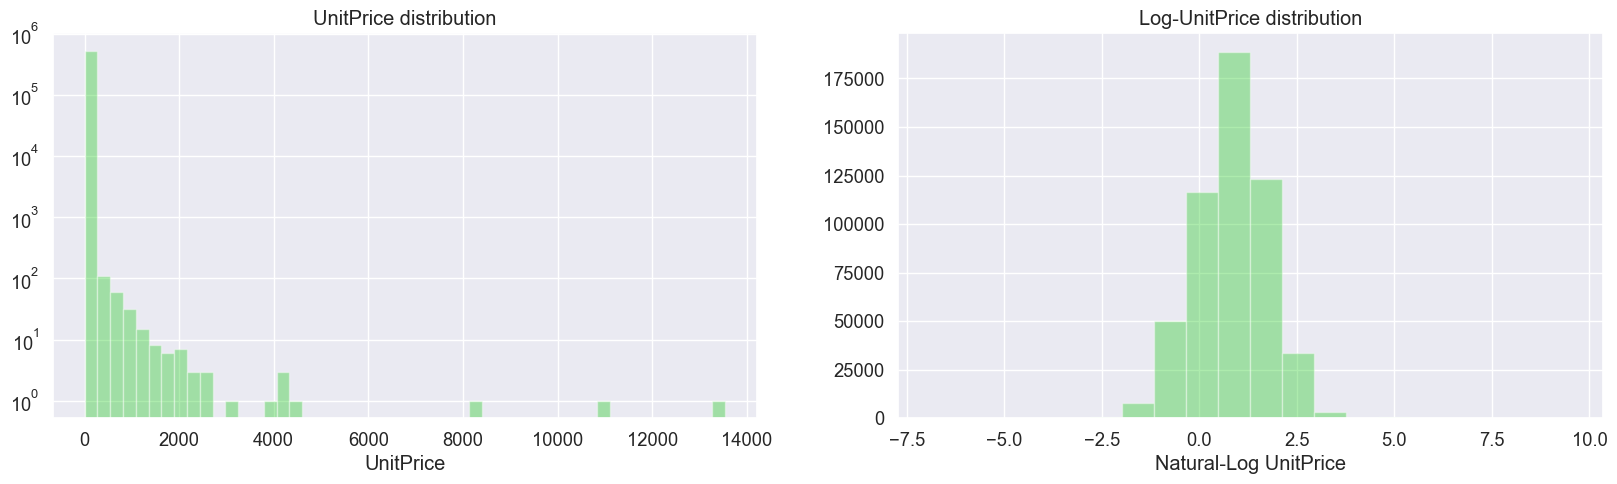

In [89]:

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.UnitPrice, ax=ax[0], kde=False, color="limegreen");
sns.distplot(np.log(df.UnitPrice), ax=ax[1], bins=20, kde=False, color="limegreen");
ax[0].set_title("UnitPrice distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-UnitPrice distribution")
ax[1].set_xlabel("Natural-Log UnitPrice");

** Bivariate / Multivariate **

In [90]:

#  number of products purchased in every transaction.

temp = df.groupby(by=['CustomerID', 'InvoiceNo'] , as_index=False)[['Quantity','InvoiceDate']].count()
no_of_products = temp.rename(columns = {'InvoiceDate':'Number of products'})
no_of_products[:10].sort_values('CustomerID')

CustomerID InvoiceNo  Quantity  Number of products
0      12346    541431         1                   1
1      12347    537626        31                  31
2      12347    542237        29                  29
3      12347    549222        24                  24
4      12347    556201        18                  18
5      12347    562032        22                  22
6      12347    573511        47                  47
7      12347    581180        11                  11
8      12348    539318        17                  17
9      12348    541998         6                   6

** Find the top 10 customerIDs who bought products with highest total prices and find the country for each customer **

In [91]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

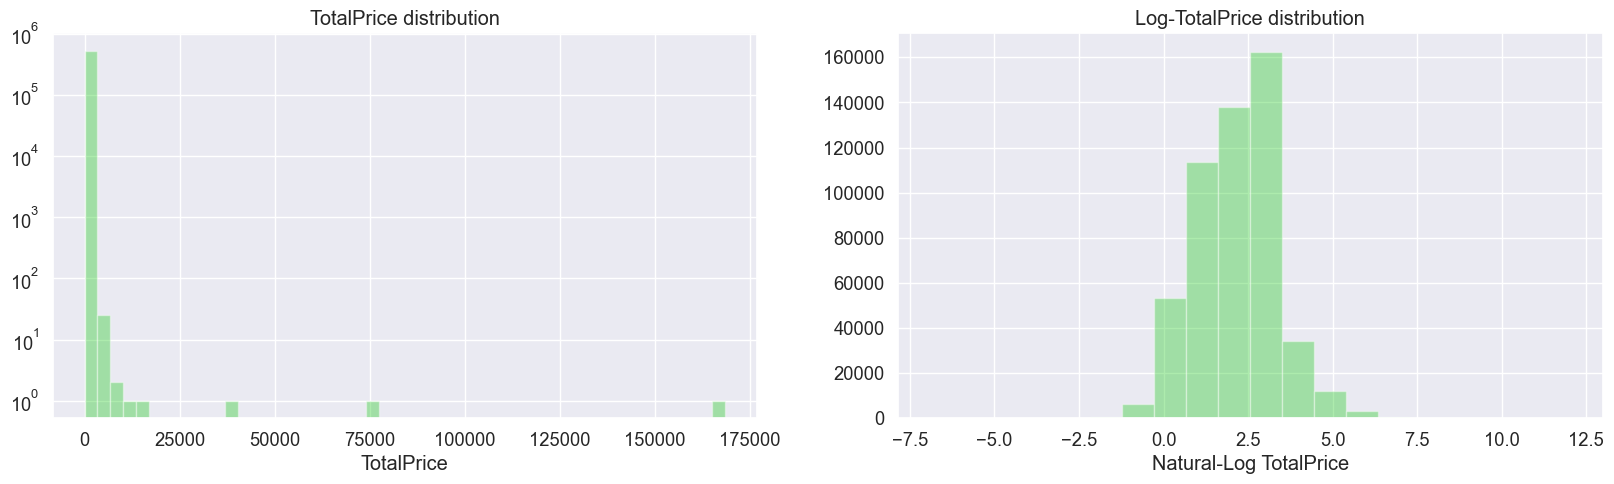

In [92]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.TotalPrice, ax=ax[0], kde=False, color="limegreen");
sns.distplot(np.log(df.TotalPrice), ax=ax[1], bins=20, kde=False, color="limegreen");
ax[0].set_title("TotalPrice distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-TotalPrice distribution")
ax[1].set_xlabel("Natural-Log TotalPrice");

In [93]:
df[(df['TotalPrice'] < 0 ) | (df['TotalPrice'] == 0)]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice]
Index: []

In [94]:
df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = False)[:10]

CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: TotalPrice, dtype: float64

In [95]:
df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = False)[:10].index

Index(['14646', '18102', '17450', '16446', '14911', '12415', '14156', '17511',
       '16029', '12346'],
      dtype='object', name='CustomerID')

In [96]:
df[df['CustomerID'].isin(df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = False)[:10].index)]

InvoiceNo StockCode                     Description  Quantity  \
173       536386     84880           WHITE WIRE EGG HOLDER        36   
174       536386    85099C  JUMBO  BAG BAROQUE BLACK WHITE       100   
175       536386    85099B         JUMBO BAG RED RETROSPOT       100   
176       536387     79321                   CHILLI LIGHTS       192   
177       536387     22780  LIGHT GARLAND BUTTERFILES PINK       192   
...          ...       ...                             ...       ...   
523070    581457     23530       WALL ART ONLY ONE PERSON        126   
523071    581457     23526           WALL ART DOG LICENCE        126   
523072    581457     23401   RUSTIC MIRROR WITH LACE HEART       126   
523404    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   
524674    581566     23404      HOME SWEET HOME BLACKBOARD       144   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
173    2010-12-01 09:57:00       4.95      16029  United Kingdom      178.20  
174    2010-12-01 09:57:00       1.65      16029  United Kingdom      165.00  
175    2010-12-01 09:57:00       1.65      16029  United Kingdom      165.00  
176    2010-12-01 09:58:00       3.82      16029  United Kingdom      733.44  
177    2010-12-01 09:58:00       3.37      16029  United Kingdom      647.04  
...                    ...        ...        ...             ...         ...  
523070 2011-12-08 18:43:00       3.57      18102  United Kingdom      449.82  
523071 2011-12-08 18:43:00       3.90      18102  United Kingdom      491.40  
523072 2011-12-08 18:43:00       4.15      18102  United Kingdom      522.90  
523404 2011-12-09 09:15:00       2.08      16446  United Kingdom   168469.60  
524674 2011-12-09 11:50:00       3.26      18102  United Kingdom      469.44  

[11830 rows x 9 columns]

In [97]:
df1 = df[df['CustomerID'].isin(df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = False)[:10].index)]

<AxesSubplot:xlabel='CustomerID', ylabel='TotalPrice'>

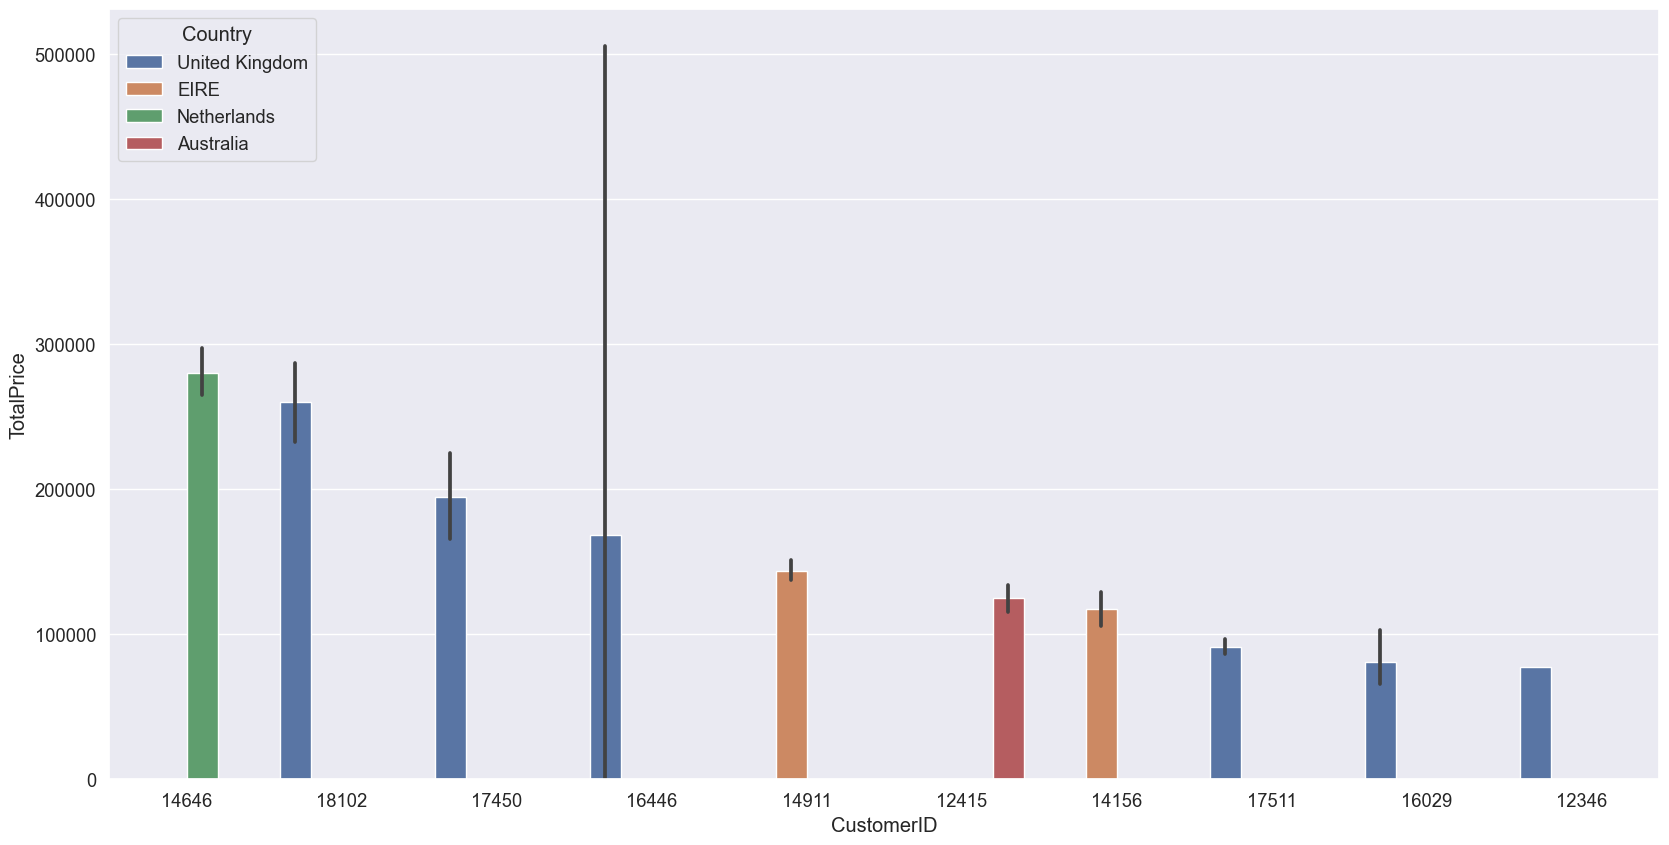

In [98]:
sns.barplot(data = df1 , x = 'CustomerID' , y = 'TotalPrice' , estimator = sum , hue = 'Country' , order = df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = False)[:10].index)

** Find the lowest 10 customerIDs who bought products with lowest total prices and find the country for each customer **

In [99]:
df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = True)[:10]

CustomerID
16738     3.75
14792     6.20
16454     6.90
17956    12.75
16878    13.30
13307    15.00
17763    15.00
15823    15.00
16093    17.00
16953    20.80
Name: TotalPrice, dtype: float64

In [100]:
df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = True)[:10].index

Index(['16738', '14792', '16454', '17956', '16878', '13307', '17763', '15823',
       '16093', '16953'],
      dtype='object', name='CustomerID')

In [101]:
df[df['CustomerID'].isin(df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = True)[:10].index)]

InvoiceNo     StockCode                          Description  Quantity  \
4296      536779  BANK CHARGES                         Bank Charges         1   
87133     543986        46000U       POLYESTER FILLER PAD 30CMx30CM         3   
123217    547207        75049L         LARGE CIRCULAR MIRROR MOBILE        12   
140187    548862         22485        SET OF 2 WOODEN MARKET CRATES         1   
289696    563092         23328   SET 6 SCHOOL MILK BOTTLES IN CRATE         4   
303165    564419         15039                       SANDALWOOD FAN        20   
334546    567158         21034         REX CASH+CARRY JUMBO SHOPPER        10   
334547    567158         22583         PACK OF 6 HANDBAG GIFT BOXES         1   
334548    567158         22585            PACK OF 6 BIRDY GIFT TAGS         1   
370784    569915        90012A  MIDNIGHT BLUE DROP CRYSTAL NECKLACE         2   
371208    570003        47594A              CAROUSEL DESIGN WASHBAG         1   
371209    570003         22371         AIRLINE BAG VINTAGE TOKYO 78         1   
406163    572832             M                               Manual         1   
438429    575433        85099B              JUMBO BAG RED RETROSPOT        10   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
4296   2010-12-02 15:08:00      15.00      15823  United Kingdom       15.00  
87133  2011-02-15 09:46:00       1.25      16738  United Kingdom        3.75  
123217 2011-03-21 14:25:00       1.25      17763  United Kingdom       15.00  
140187 2011-04-04 13:47:00      12.75      17956  United Kingdom       12.75  
289696 2011-08-11 17:14:00       3.75      13307  United Kingdom       15.00  
303165 2011-08-25 11:09:00       0.85      16093  United Kingdom       17.00  
334546 2011-09-16 17:39:00       0.95      16878  United Kingdom        9.50  
334547 2011-09-16 17:39:00       2.55      16878  United Kingdom        2.55  
334548 2011-09-16 17:39:00       1.25      16878  United Kingdom        1.25  
370784 2011-10-06 16:57:00       2.95      16454  United Kingdom        5.90  
371208 2011-10-07 09:19:00       1.95      14792  United Kingdom        1.95  
371209 2011-10-07 09:19:00       4.25      14792  United Kingdom        4.25  
406163 2011-10-26 11:40:00       1.00      16454  United Kingdom        1.00  
438429 2011-11-09 15:54:00       2.08      16953  United Kingdom       20.80

In [102]:
df2 = df[df['CustomerID'].isin(df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = True)[:10].index)]

<AxesSubplot:xlabel='CustomerID', ylabel='TotalPrice'>

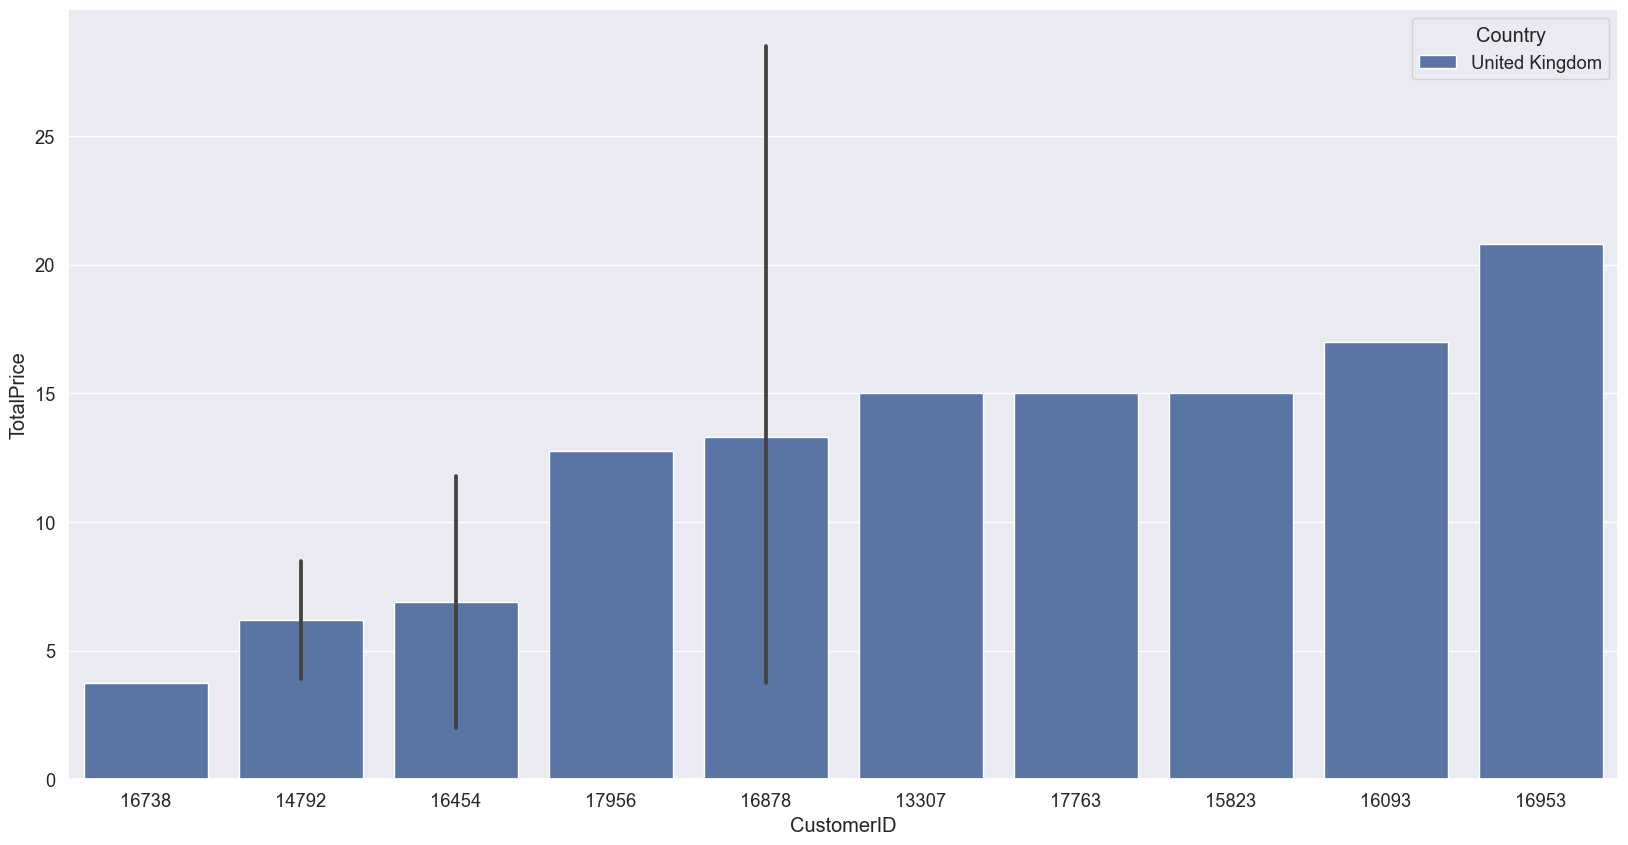

In [103]:
sns.barplot(data = df2 , x = 'CustomerID' , y = 'TotalPrice' , estimator = sum , hue = 'Country' , order = df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = True)[:10].index)

** Find no.of customers , no.of transactions & no.of products **

In [104]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

products  transactions  customers
quantity      3922         19960       4338

** Checking dataframe while grouping customer ID , invoices , country **

In [105]:
df.groupby(['CustomerID', 'InvoiceNo', 'Country'] , as_index=False).count()

CustomerID InvoiceNo         Country  StockCode  Description  Quantity  \
0          12346    541431  United Kingdom          1            1         1   
1          12347    537626         Iceland         31           31        31   
2          12347    542237         Iceland         29           29        29   
3          12347    549222         Iceland         24           24        24   
4          12347    556201         Iceland         18           18        18   
...          ...       ...             ...        ...          ...       ...   
18519      18283    579673  United Kingdom         50           50        50   
18520      18283    580872  United Kingdom         50           50        50   
18521      18287    554065  United Kingdom         29           29        29   
18522      18287    570715  United Kingdom         38           38        38   
18523      18287    573167  United Kingdom          3            3         3   

       InvoiceDate  UnitPrice  TotalPrice  
0                1          1           1  
1               31         31          31  
2               29         29          29  
3               24         24          24  
4               18         18          18  
...            ...        ...         ...  
18519           50         50          50  
18520           50         50          50  
18521           29         29          29  
18522           38         38          38  
18523            3          3           3  

[18524 rows x 9 columns]

** Checking the highest volume 10 invoices vs. the unit prices **

In [106]:
df.groupby('InvoiceNo').sum()['UnitPrice'].sort_values(ascending = False)[:10]

InvoiceNo
537632     13541.33
A563185    11062.06
551697      8142.75
573585      7031.36
562955      6688.05
571751      6068.06
580729      4431.74
560373      4287.63
581219      4219.82
537434      4178.35
Name: UnitPrice, dtype: float64

In [107]:
df.groupby('InvoiceNo').sum()['UnitPrice'].sort_values(ascending = False)[:10].index

Index(['537632', 'A563185', '551697', '573585', '562955', '571751', '580729',
       '560373', '581219', '537434'],
      dtype='object', name='InvoiceNo')

<AxesSubplot:xlabel='InvoiceNo', ylabel='UnitPrice'>

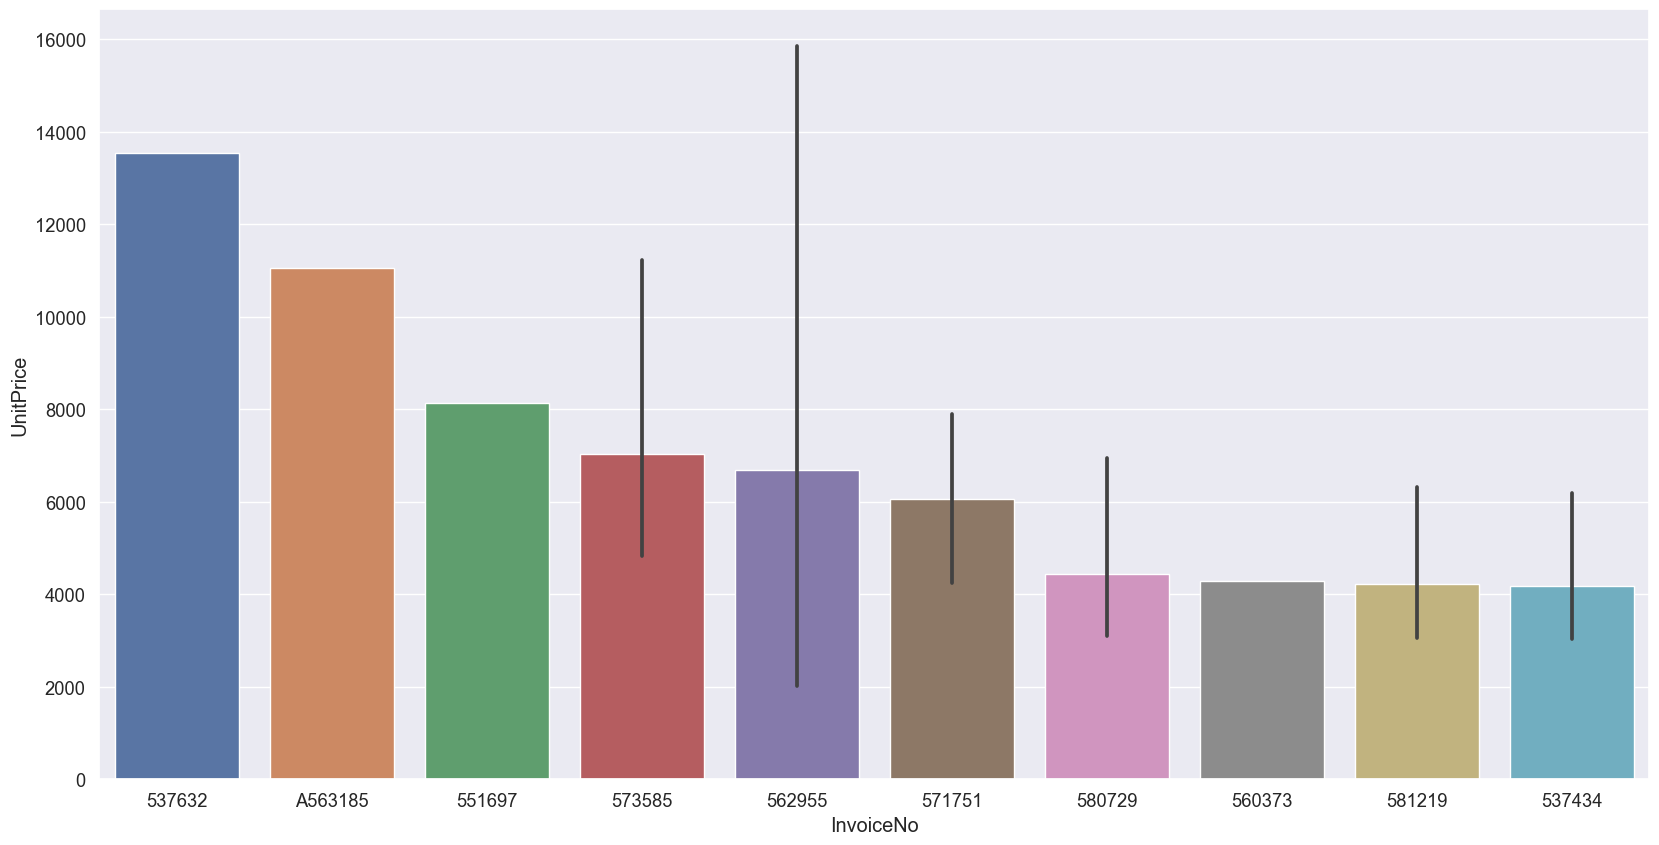

In [108]:
sns.barplot(data = df[df['InvoiceNo'].isin(df.groupby('InvoiceNo').sum()['UnitPrice'].sort_values(ascending = False)[:10].index)] , x = 'InvoiceNo' , y = 'UnitPrice' , estimator = sum , order = df.groupby('InvoiceNo').sum()['UnitPrice'].sort_values(ascending = False)[:10].index)

** Checking the lowest volume invoices vs. the unit prices **

In [109]:
df.groupby('InvoiceNo').sum()['UnitPrice'].sort_values(ascending = True)[:10]

InvoiceNo
560599    0.06
559166    0.06
544152    0.06
567869    0.08
556068    0.12
579725    0.12
544320    0.12
554633    0.12
569235    0.12
546390    0.12
Name: UnitPrice, dtype: float64

In [110]:
df.groupby('InvoiceNo').sum()['UnitPrice'].sort_values(ascending = True)[:10].index

Index(['560599', '559166', '544152', '567869', '556068', '579725', '544320',
       '554633', '569235', '546390'],
      dtype='object', name='InvoiceNo')

<AxesSubplot:xlabel='InvoiceNo', ylabel='UnitPrice'>

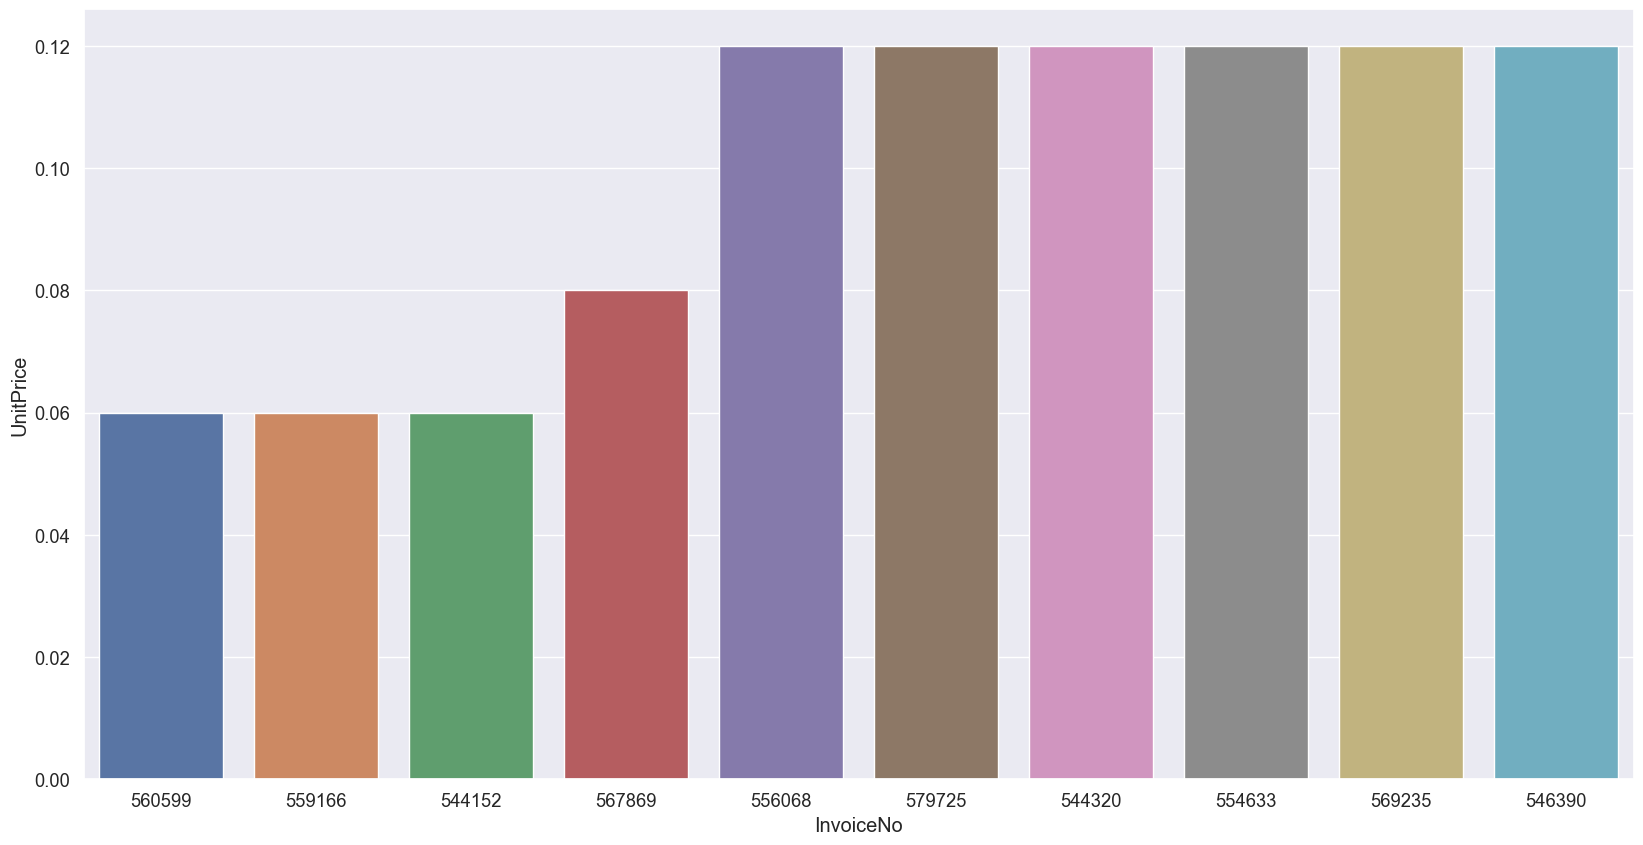

In [111]:
sns.barplot(data = df[df['InvoiceNo'].isin(df.groupby('InvoiceNo').sum()['UnitPrice'].sort_values(ascending = True)[:10].index)] , x = 'InvoiceNo' , y = 'UnitPrice' , estimator = sum , order = df.groupby('InvoiceNo').sum()['UnitPrice'].sort_values(ascending = True)[:10].index)

** What is the average prices in UK ? **

In [112]:
df[df['Country'] == 'United Kingdom']

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524858    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
524859    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
524860    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
524861    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
524862    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
...                    ...        ...        ...             ...         ...  
524858 2011-12-09 12:31:00       1.95      15804  United Kingdom       23.40  
524859 2011-12-09 12:49:00       2.95      13113  United Kingdom       23.60  
524860 2011-12-09 12:49:00       1.25      13113  United Kingdom       30.00  
524861 2011-12-09 12:49:00       8.95      13113  United Kingdom      214.80  
524862 2011-12-09 12:49:00       7.08      13113  United Kingdom       70.80  

[479985 rows x 9 columns]

In [113]:
df[df['Country'] == 'United Kingdom'][['Country' , 'UnitPrice']]

Country  UnitPrice
0       United Kingdom       2.55
1       United Kingdom       3.39
2       United Kingdom       2.75
3       United Kingdom       3.39
4       United Kingdom       3.39
...                ...        ...
524858  United Kingdom       1.95
524859  United Kingdom       2.95
524860  United Kingdom       1.25
524861  United Kingdom       8.95
524862  United Kingdom       7.08

[479985 rows x 2 columns]

In [114]:
df[df['Country'] == 'United Kingdom']['UnitPrice']

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
524858    1.95
524859    2.95
524860    1.25
524861    8.95
524862    7.08
Name: UnitPrice, Length: 479985, dtype: float64

In [115]:
df[df['Country'] == 'United Kingdom']['UnitPrice'].mean()

3.865227525850749

<AxesSubplot:xlabel='Country', ylabel='UnitPrice'>

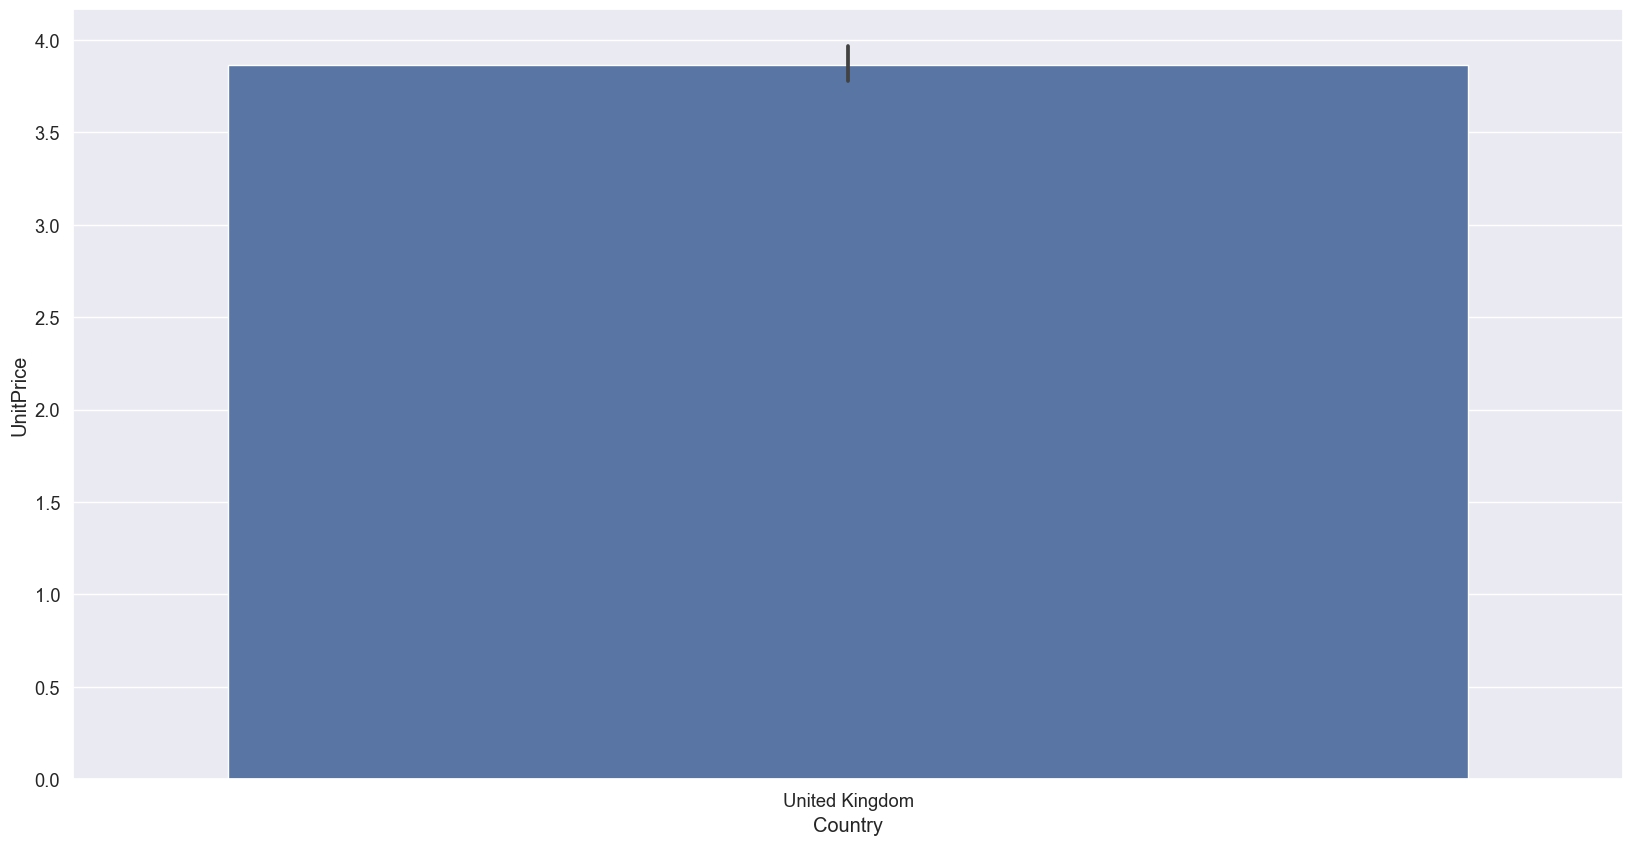

In [116]:
sns.barplot(data = df[df['Country'] == 'United Kingdom'] , x = 'Country' , y = 'UnitPrice' )

** Top 5 common countries **

In [117]:
df['Country'].value_counts()[:5]

United Kingdom    479985
Germany             9025
France              8392
EIRE                7879
Spain               2479
Name: Country, dtype: int64

In [118]:
df['Country'].value_counts()[:5].index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain'], dtype='object')

In [119]:
df[df['Country'].isin(df['Country'].value_counts()[:5].index)]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
...                    ...        ...        ...             ...         ...  
524873 2011-12-09 12:50:00       0.85      12680          France       10.20  
524874 2011-12-09 12:50:00       2.10      12680          France       12.60  
524875 2011-12-09 12:50:00       4.15      12680          France       16.60  
524876 2011-12-09 12:50:00       4.15      12680          France       16.60  
524877 2011-12-09 12:50:00       4.95      12680          France       14.85  

[507760 rows x 9 columns]

** top 5 countries with highest prices **

In [120]:
df.groupby('Country').sum()['UnitPrice'].sort_values(ascending = False)[:5]

Country
United Kingdom    1855251.234
EIRE                38444.380
France              36949.730
Germany             33499.580
Singapore           12949.990
Name: UnitPrice, dtype: float64

In [121]:
df.groupby('Country').sum()['UnitPrice'].sort_values(ascending = False)[:5].index

Index(['United Kingdom', 'EIRE', 'France', 'Germany', 'Singapore'], dtype='object', name='Country')

In [122]:
df[df['Country'].isin(df.groupby('Country').sum()['UnitPrice'].sort_values(ascending = False)[:5].index)]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
...                    ...        ...        ...             ...         ...  
524873 2011-12-09 12:50:00       0.85      12680          France       10.20  
524874 2011-12-09 12:50:00       2.10      12680          France       12.60  
524875 2011-12-09 12:50:00       4.15      12680          France       16.60  
524876 2011-12-09 12:50:00       4.15      12680          France       16.60  
524877 2011-12-09 12:50:00       4.95      12680          France       14.85  

[505503 rows x 9 columns]

<AxesSubplot:xlabel='Country', ylabel='UnitPrice'>

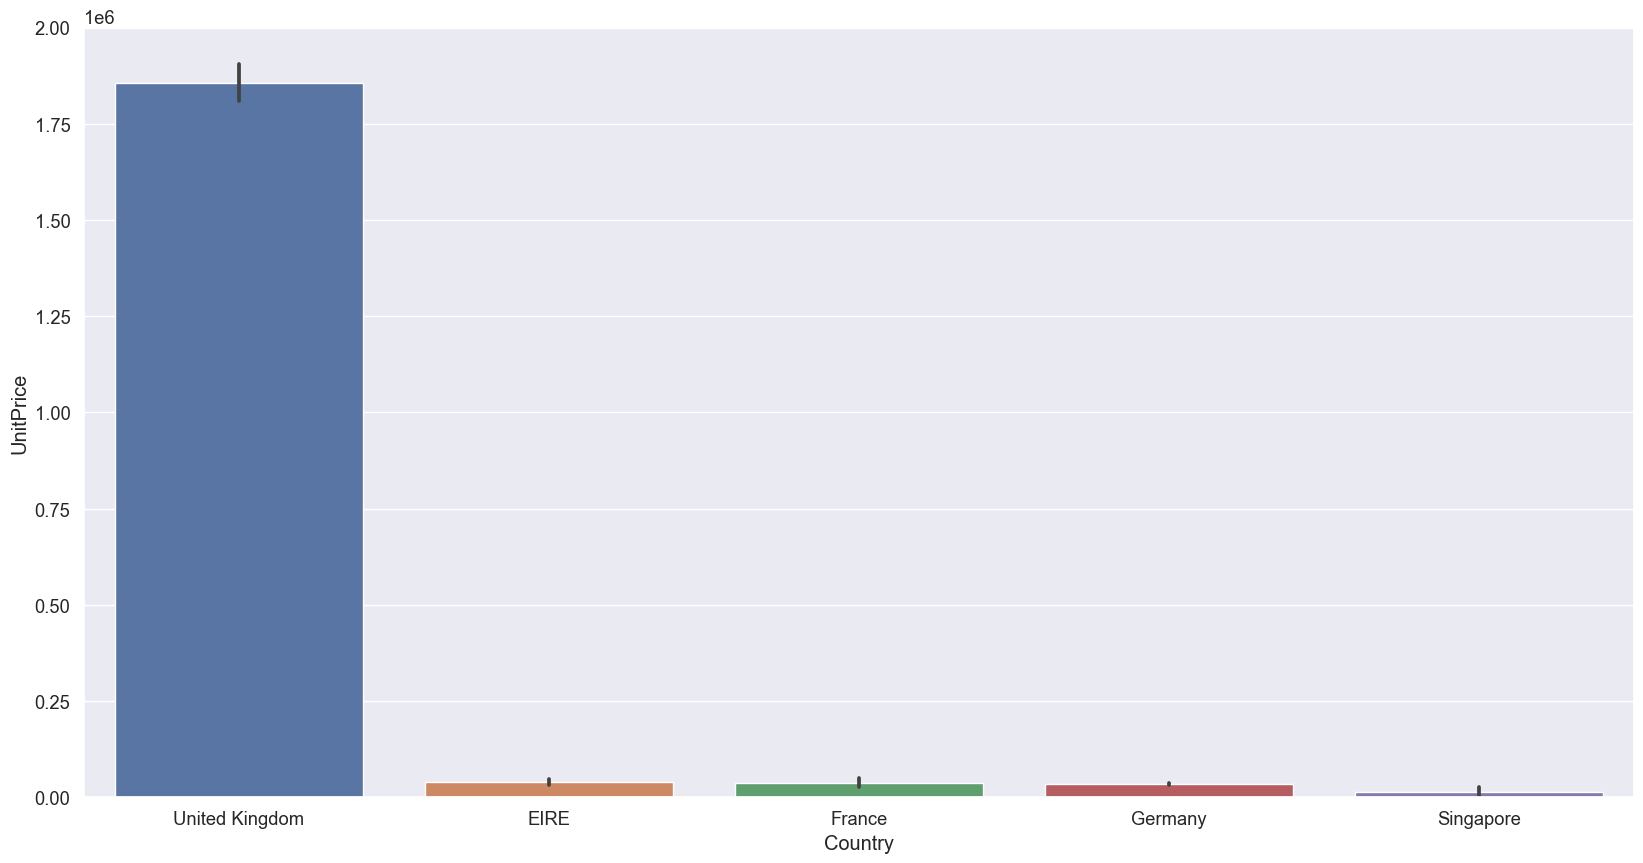

In [123]:
sns.barplot(data = df[df['Country'].isin(df.groupby('Country').sum()['UnitPrice'].sort_values(ascending = False)[:5].index)] , x = 'Country' , y = 'UnitPrice' , estimator = sum , order = df.groupby('Country').sum()['UnitPrice'].sort_values(ascending = False)[:5].index)

** lowest 5 countries with mean prices **

In [124]:
df.groupby('Country').mean()['UnitPrice'].sort_values(ascending = True)[:5]

Country
Japan           2.047383
USA             2.308939
Saudi Arabia    2.351111
Iceland         2.644011
Netherlands     2.648465
Name: UnitPrice, dtype: float64

In [125]:
df.groupby('Country').mean()['UnitPrice'].sort_values(ascending = True)[:5].index

Index(['Japan', 'USA', 'Saudi Arabia', 'Iceland', 'Netherlands'], dtype='object', name='Country')

In [126]:
df[df['Country'].isin(df.groupby('Country').mean()['UnitPrice'].sort_values(ascending = True)[:5].index)]

InvoiceNo StockCode                          Description  Quantity  \
376       536403     22867              HAND WARMER BIRD DESIGN        96   
377       536403      POST                              POSTAGE         1   
9449      537218     85016        SET OF 6 VINTAGE NOTELETS KIT         6   
9450      537218     21506           FANCY FONT BIRTHDAY CARD,         12   
9451      537218     22716                   CARD CIRCUS PARADE        12   
...          ...       ...                                  ...       ...   
518118    581180     21265         PINK GOOSE FEATHER TREE 60CM        12   
518119    581180     23271  CHRISTMAS TABLE SILVER CANDLE SPIKE        16   
518120    581180     23506         MINI PLAYING CARDS SPACEBOY         20   
518121    581180     23508       MINI PLAYING CARDS DOLLY GIRL         20   
520830    581338     23344            JUMBO BAG 50'S CHRISTMAS        140   

               InvoiceDate  UnitPrice CustomerID      Country  TotalPrice  
376    2010-12-01 11:27:00       1.85      12791  Netherlands      177.60  
377    2010-12-01 11:27:00      15.00      12791  Netherlands       15.00  
9449   2010-12-05 15:46:00       2.55      12763        Japan       15.30  
9450   2010-12-05 15:46:00       0.42      12763        Japan        5.04  
9451   2010-12-05 15:46:00       0.42      12763        Japan        5.04  
...                    ...        ...        ...          ...         ...  
518118 2011-12-07 15:52:00       1.95      12347      Iceland       23.40  
518119 2011-12-07 15:52:00       0.83      12347      Iceland       13.28  
518120 2011-12-07 15:52:00       0.42      12347      Iceland        8.40  
518121 2011-12-07 15:52:00       0.42      12347      Iceland        8.40  
520830 2011-12-08 12:12:00       1.79      14646  Netherlands      250.60  

[3050 rows x 9 columns]

<AxesSubplot:xlabel='Country', ylabel='UnitPrice'>

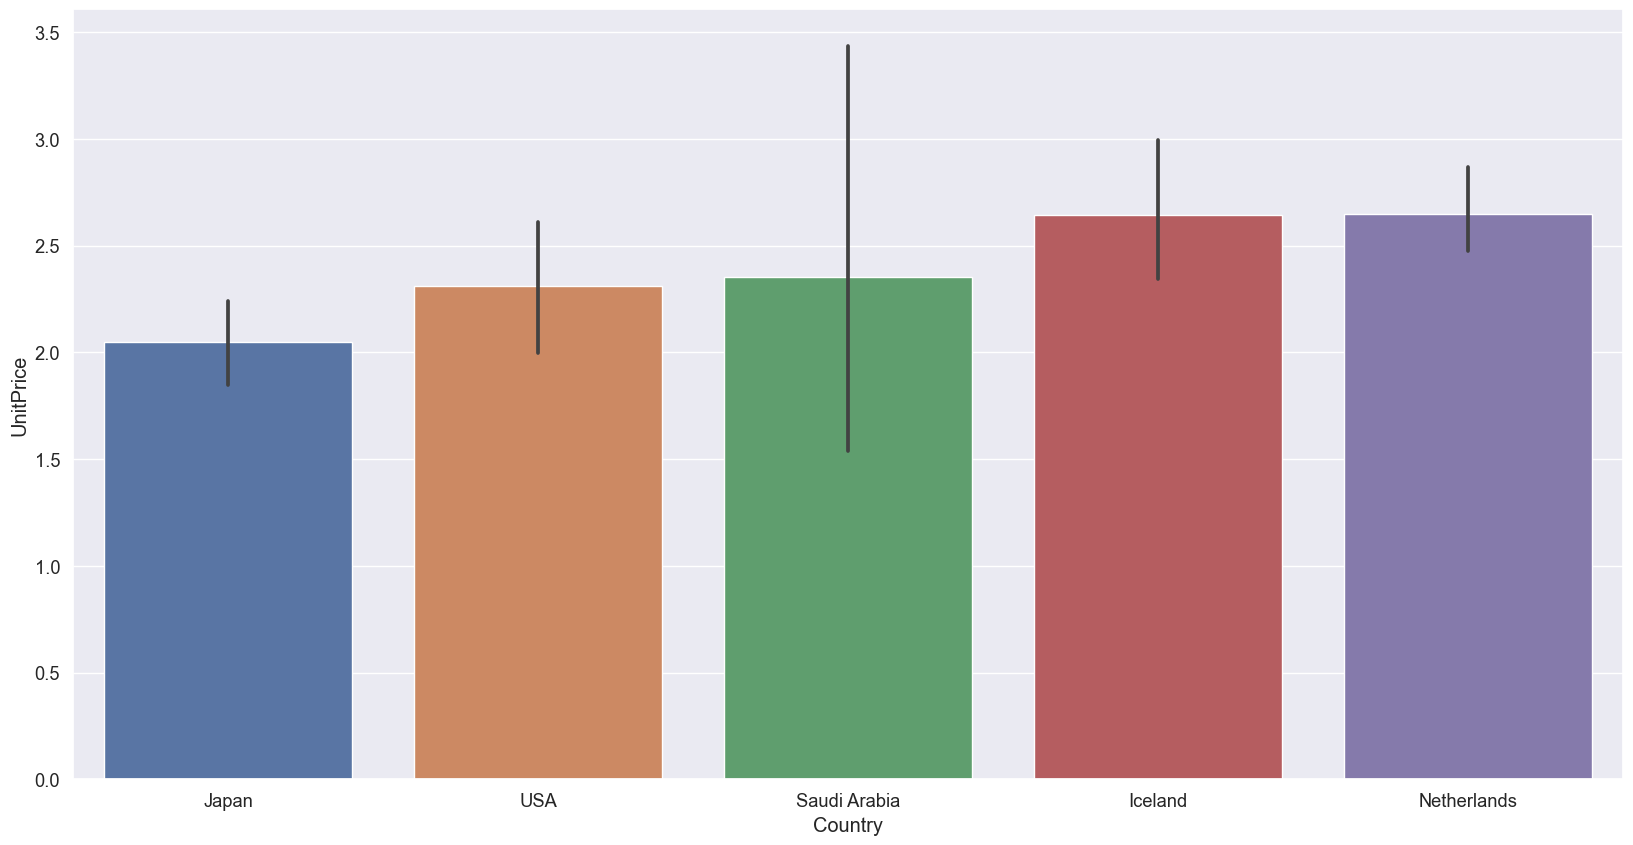

In [127]:
sns.barplot(data = df[df['Country'].isin(df.groupby('Country').mean()['UnitPrice'].sort_values(ascending = True)[:5].index)] , x = 'Country' , y = 'UnitPrice' , order = df.groupby('Country').mean()['UnitPrice'].sort_values(ascending = True)[:5].index)

** Top 5 customers in United Kingdom **

In [128]:
df[df['Country'] == 'United Kingdom'].value_counts(['CustomerID']).sort_values(ascending = False)[:5]

CustomerID
17841         7676
14096         5111
12748         4412
14606         2677
15311         2366
dtype: int64

In [129]:
df[df['Country'] == 'United Kingdom'][['CustomerID' , 'Country']].value_counts().sort_values(ascending = False)[:5]

CustomerID  Country       
17841       United Kingdom    7676
14096       United Kingdom    5111
12748       United Kingdom    4412
14606       United Kingdom    2677
15311       United Kingdom    2366
dtype: int64

In [130]:
df[df['Country'] == 'United Kingdom'].value_counts('CustomerID').sort_values(ascending = False)[:5]

CustomerID
17841    7676
14096    5111
12748    4412
14606    2677
15311    2366
dtype: int64

In [131]:
df[df['Country'] == 'United Kingdom']['CustomerID'].value_counts().sort_values(ascending = False)[:5].index

Index(['17841', '14096', '12748', '14606', '15311'], dtype='object')

In [132]:
top_5_customers_UK = df[df['Country'] == 'United Kingdom']['CustomerID'].value_counts().sort_values(ascending = False)[:5].index

In [133]:
top_5_customers_UK

Index(['17841', '14096', '12748', '14606', '15311'], dtype='object')

In [134]:
df[df['CustomerID'].isin(top_5_customers_UK)]

InvoiceNo StockCode                         Description  Quantity  \
106       536381     22139    RETROSPOT TEA SET CERAMIC 11 PC         23   
107       536381     84854                 GIRLY PINK TOOL SET         5   
108       536381     22411   JUMBO SHOPPER VINTAGE RED PAISLEY        10   
109       536381     82567           AIRLINE LOUNGE,METAL SIGN         2   
110       536381     21672  WHITE SPOT RED CERAMIC DRAWER KNOB         6   
...          ...       ...                                 ...       ...   
524824    581580     21351            CINAMMON & ORANGE WREATH         1   
524825    581580     22698      PINK REGENCY TEACUP AND SAUCER         1   
524826    581580     22567             20 DOLLY PEGS RETROSPOT         1   
524827    581580     79321                       CHILLI LIGHTS         2   
524828    581580     37500         TEA TIME TEAPOT IN GIFT BOX         1   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
106    2010-12-01 09:41:00       4.25      15311  United Kingdom       97.75  
107    2010-12-01 09:41:00       4.95      15311  United Kingdom       24.75  
108    2010-12-01 09:41:00       1.95      15311  United Kingdom       19.50  
109    2010-12-01 09:41:00       2.10      15311  United Kingdom        4.20  
110    2010-12-01 09:41:00       1.25      15311  United Kingdom        7.50  
...                    ...        ...        ...             ...         ...  
524824 2011-12-09 12:20:00       6.75      12748  United Kingdom        6.75  
524825 2011-12-09 12:20:00       2.95      12748  United Kingdom        2.95  
524826 2011-12-09 12:20:00       1.45      12748  United Kingdom        1.45  
524827 2011-12-09 12:20:00       5.75      12748  United Kingdom       11.50  
524828 2011-12-09 12:20:00       4.95      12748  United Kingdom        4.95  

[22242 rows x 9 columns]

<AxesSubplot:xlabel='CustomerID', ylabel='count'>

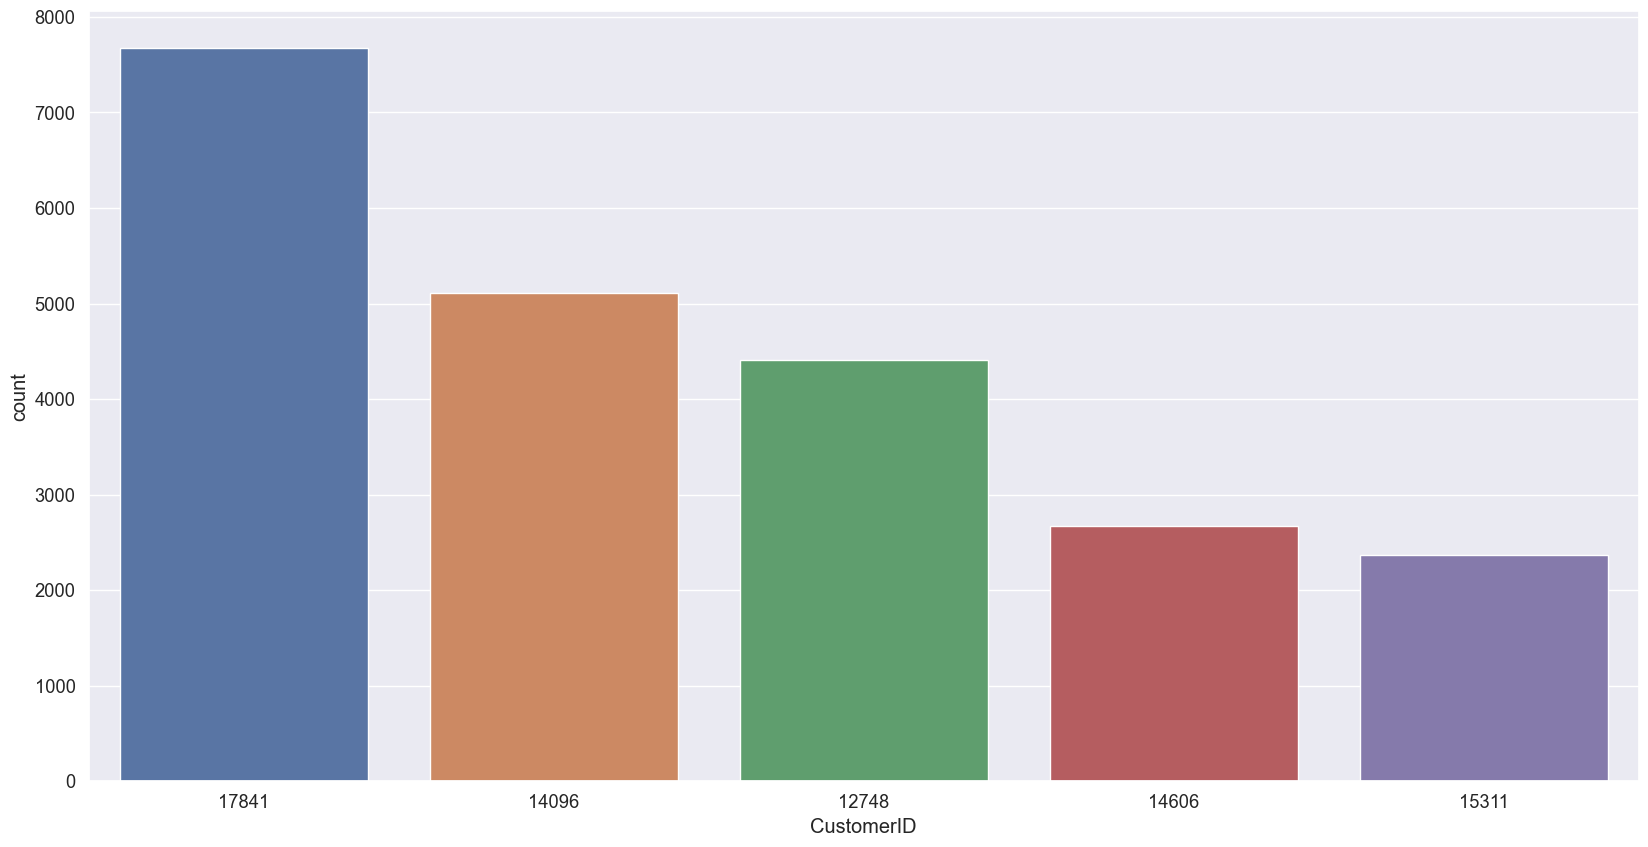

In [135]:
sns.countplot(data = df[df['CustomerID'].isin(top_5_customers_UK)] , x = 'CustomerID' , order = top_5_customers_UK )

** 10 highest invoices **

In [136]:
df.groupby('InvoiceNo').sum()['TotalPrice'].sort_values(ascending = False)[:10]

InvoiceNo
581483    168469.60
541431     77183.60
574941     52940.94
576365     50653.91
556444     38970.00
567423     31698.16
556917     22775.93
572209     22206.00
567381     22104.80
563614     21880.44
Name: TotalPrice, dtype: float64

In [137]:
df.groupby('InvoiceNo').sum()['TotalPrice'].sort_values(ascending = False)[:10].index

Index(['581483', '541431', '574941', '576365', '556444', '567423', '556917',
       '572209', '567381', '563614'],
      dtype='object', name='InvoiceNo')

<AxesSubplot:xlabel='InvoiceNo', ylabel='TotalPrice'>

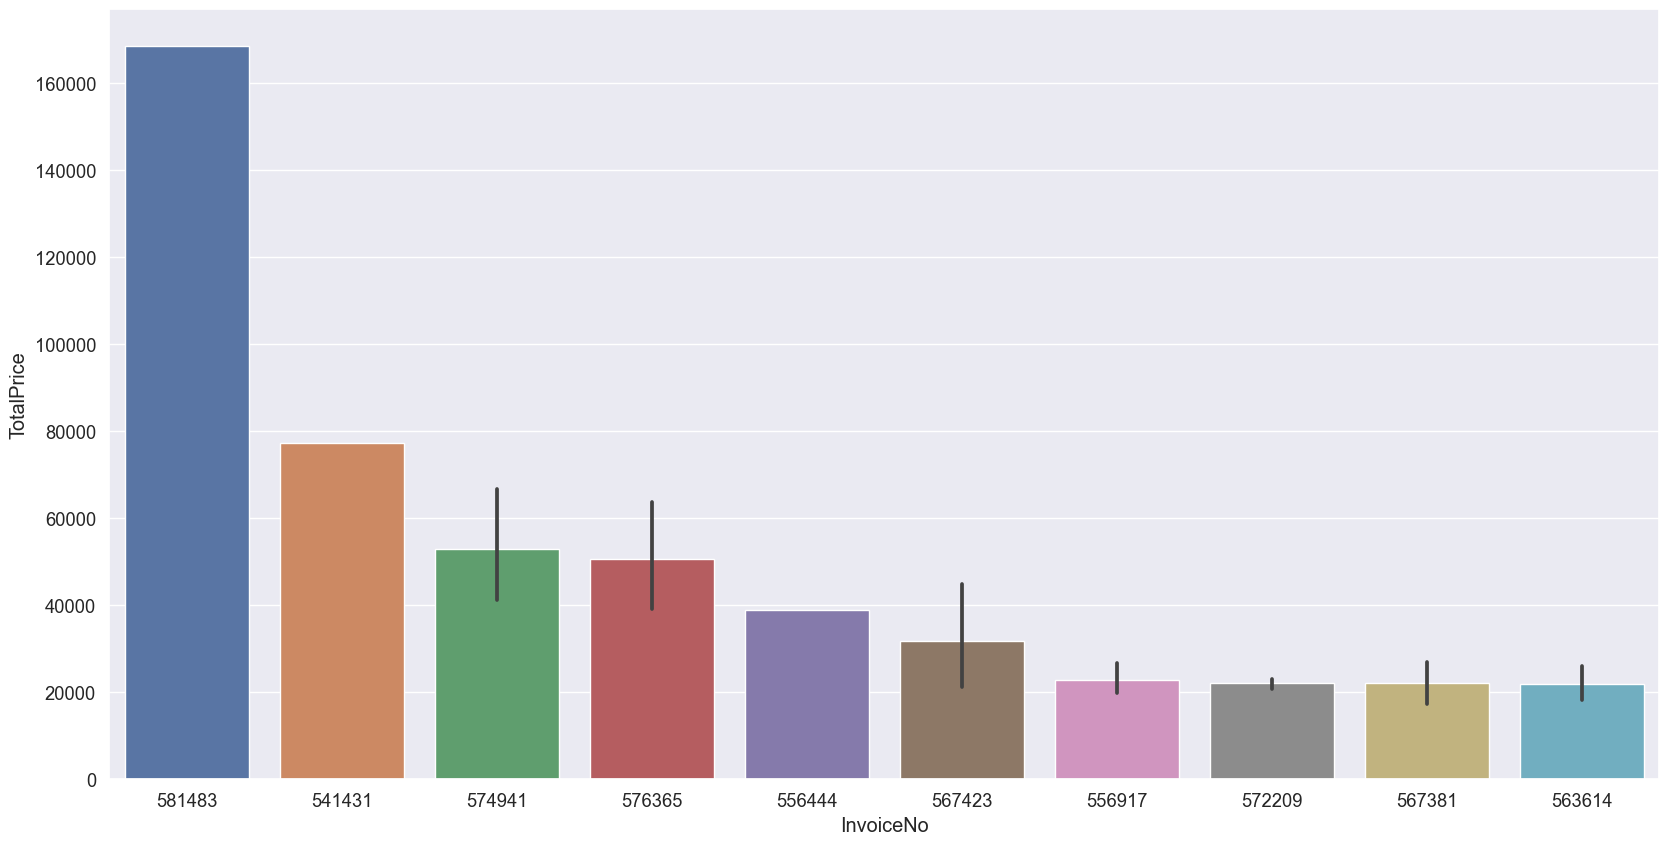

In [138]:
sns.barplot(data = df[df['InvoiceNo'].isin(df.groupby('InvoiceNo').sum()['TotalPrice'].sort_values(ascending = False)[:10].index)] , x = 'InvoiceNo' , y = 'TotalPrice' , estimator = sum , order = df.groupby('InvoiceNo').sum()['TotalPrice'].sort_values(ascending = False)[:10].index)

** Top 10 customers in terms of sales **

In [139]:
df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = False)[:10]

CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: TotalPrice, dtype: float64

In [140]:
df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = False)[:10].index

Index(['14646', '18102', '17450', '16446', '14911', '12415', '14156', '17511',
       '16029', '12346'],
      dtype='object', name='CustomerID')

<AxesSubplot:xlabel='CustomerID', ylabel='TotalPrice'>

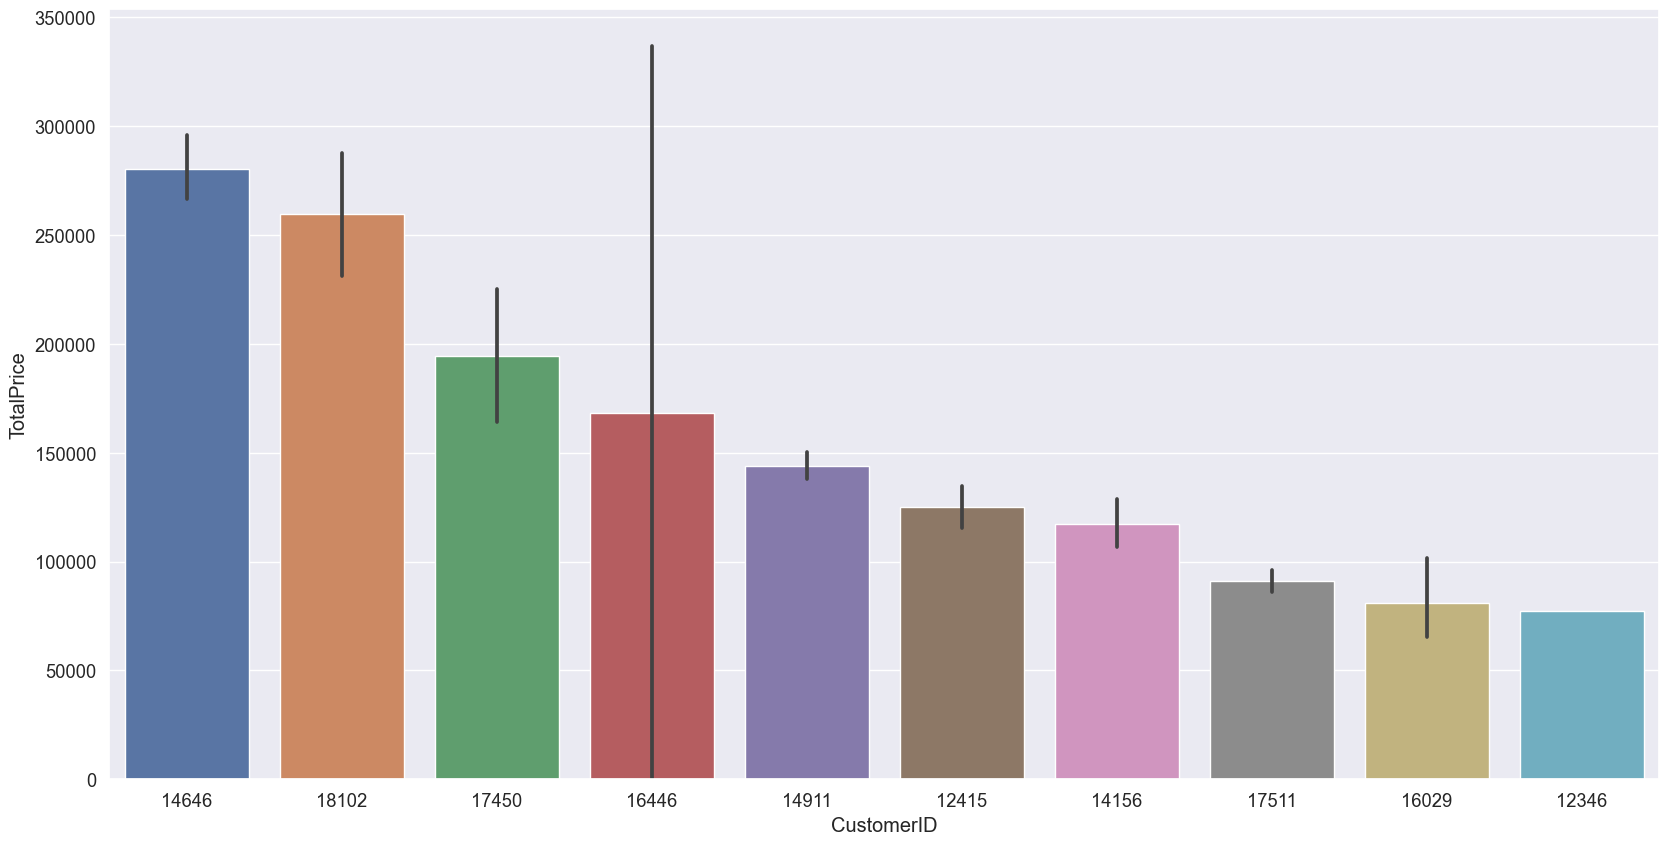

In [141]:
sns.barplot(data = df[df['CustomerID'].isin(df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = False)[:10].index)] , x = 'CustomerID' , y = 'TotalPrice' , estimator = sum , order = df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = False)[:10].index)

** No.of orders for 10 different customers ** 

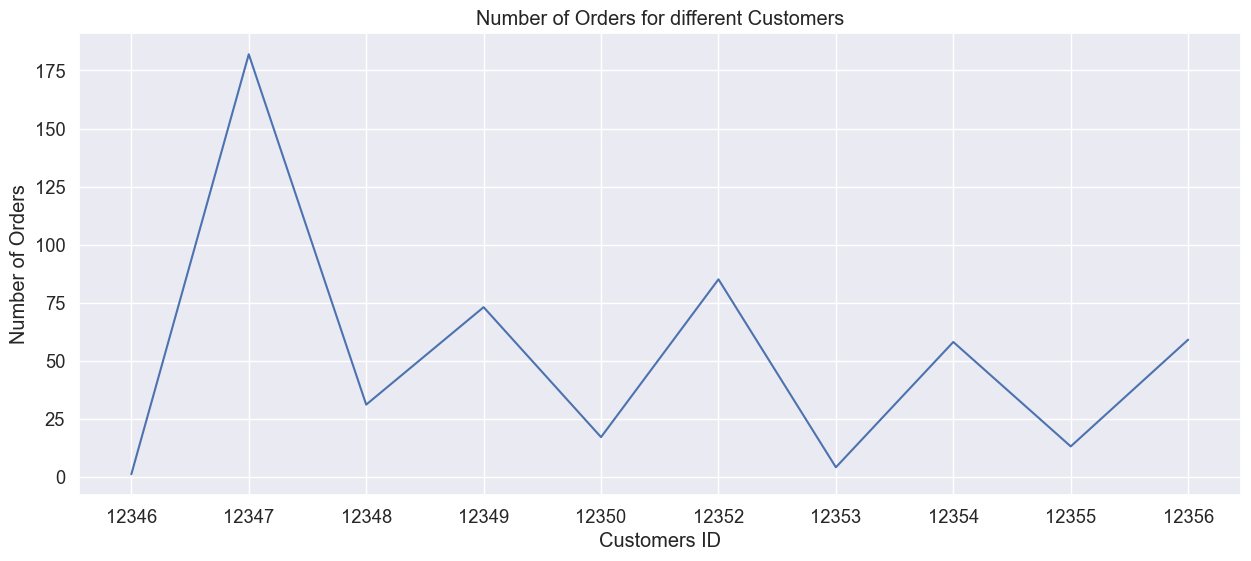

In [142]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count() [:10]

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

** Get no.of stocks in the top 10 countries **

In [143]:
df['Country'].value_counts().sort_values(ascending = False) [:10]

United Kingdom    479985
Germany             9025
France              8392
EIRE                7879
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1958
Portugal            1492
Australia           1181
Name: Country, dtype: int64

In [144]:
df['Country'].value_counts().sort_values(ascending = False) [:10].index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia'],
      dtype='object')

In [145]:
df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = False) [:10].index)]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
...                    ...        ...        ...             ...         ...  
524873 2011-12-09 12:50:00       0.85      12680          France       10.20  
524874 2011-12-09 12:50:00       2.10      12680          France       12.60  
524875 2011-12-09 12:50:00       4.15      12680          France       16.60  
524876 2011-12-09 12:50:00       4.15      12680          France       16.60  
524877 2011-12-09 12:50:00       4.95      12680          France       14.85  

[516781 rows x 9 columns]

In [146]:
df3 = df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = False) [:10].index)]

In [147]:
df3.groupby('Country')['StockCode'].count().sort_values(ascending = False)

Country
United Kingdom    479985
Germany             9025
France              8392
EIRE                7879
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1958
Portugal            1492
Australia           1181
Name: StockCode, dtype: int64

Text(0.5, 0, 'Top 10 countries')

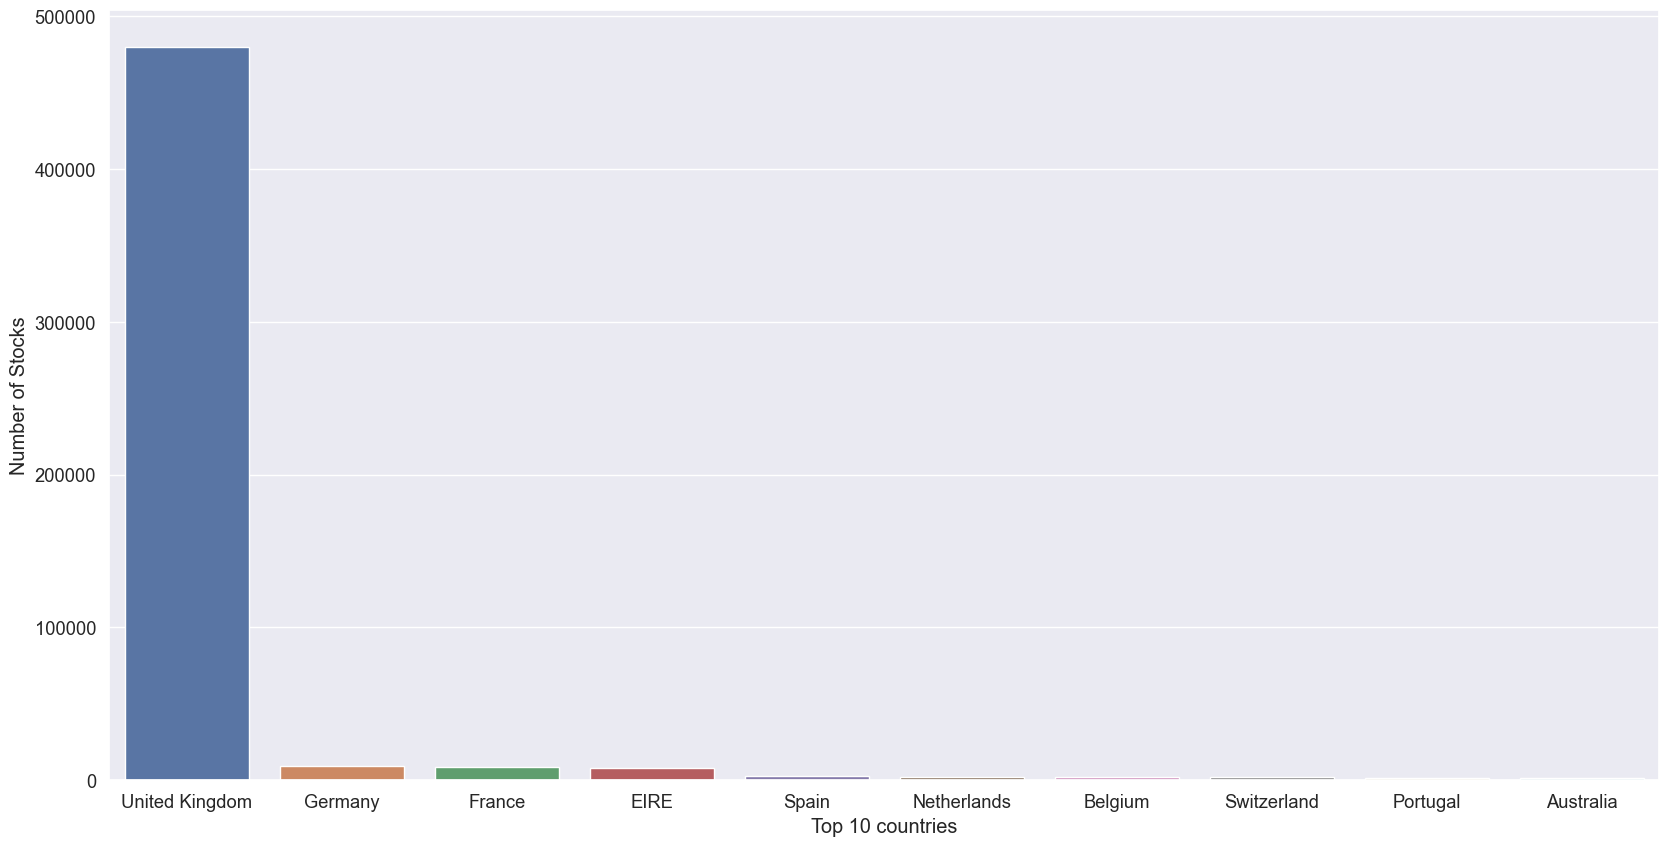

In [148]:
sns.countplot(data = df3 , x = "Country" , order = df3.groupby('Country')['StockCode'].count().sort_values(ascending = False).index)

plt.ylabel('Number of Stocks')
plt.xlabel('Top 10 countries')

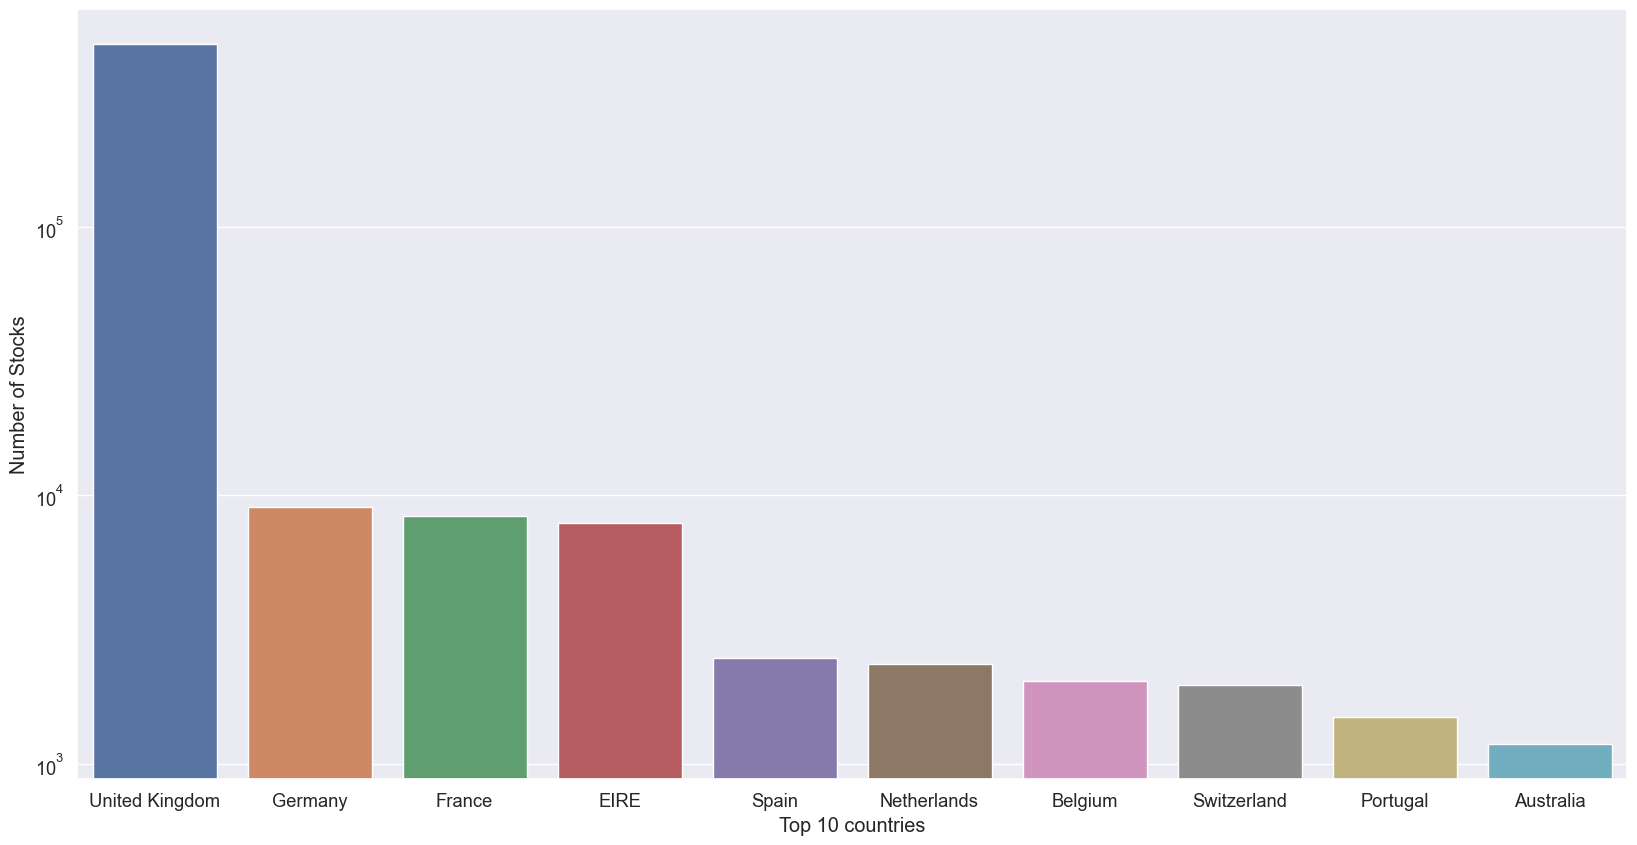

In [149]:
sns.countplot(data = df3 , x = "Country" , order = df3.groupby('Country')['StockCode'].count().sort_values(ascending = False).index)

plt.ylabel('Number of Stocks')
plt.xlabel('Top 10 countries')
plt.yscale('log')

** Get no.of stocks in the lowest 10 countries **

In [150]:
df['Country'].value_counts().sort_values(ascending = True) [:10]

Saudi Arabia              9
Bahrain                  18
Czech Republic           25
Brazil                   32
Lithuania                35
Lebanon                  45
RSA                      57
European Community       60
United Arab Emirates     68
Malta                   112
Name: Country, dtype: int64

In [151]:
df['Country'].value_counts().sort_values(ascending = True) [:10].index

Index(['Saudi Arabia', 'Bahrain', 'Czech Republic', 'Brazil', 'Lithuania',
       'Lebanon', 'RSA', 'European Community', 'United Arab Emirates',
       'Malta'],
      dtype='object')

In [152]:
df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = True) [:10].index)]

InvoiceNo StockCode                         Description  Quantity  \
7738      537081     22409           MONEY BOX BISCUITS DESIGN        12   
7739      537081     21915              RED  HARMONICA IN BOX         36   
7740      537081   15056BL             EDWARDIAN PARASOL BLACK        12   
7741      537081    15056N           EDWARDIAN PARASOL NATURAL        12   
7742      537081     20679               EDWARDIAN PARASOL RED        12   
...          ...       ...                                 ...       ...   
460499    576897     72741               GRAND CHOCOLATECANDLE        45   
460500    576897     22306  SILVER MUG BONE CHINA TREE OF LIFE        12   
460501    576897     22065      CHRISTMAS PUDDING TRINKET POT         48   
460502    576897    85034C         3 ROSE MORRIS BOXED CANDLES        24   
460503    576897     22307    GOLD MUG BONE CHINA TREE OF LIFE        24   

               InvoiceDate  UnitPrice CustomerID    Country  TotalPrice  
7738   2010-12-05 12:00:00       1.25      15332  Lithuania       15.00  
7739   2010-12-05 12:00:00       1.25      15332  Lithuania       45.00  
7740   2010-12-05 12:00:00       5.95      15332  Lithuania       71.40  
7741   2010-12-05 12:00:00       5.95      15332  Lithuania       71.40  
7742   2010-12-05 12:00:00       5.95      15332  Lithuania       71.40  
...                    ...        ...        ...        ...         ...  
460499 2011-11-17 08:41:00       1.45      17828      Malta       65.25  
460500 2011-11-17 08:41:00       1.06      17828      Malta       12.72  
460501 2011-11-17 08:41:00       0.39      17828      Malta       18.72  
460502 2011-11-17 08:41:00       1.25      17828      Malta       30.00  
460503 2011-11-17 08:41:00       1.06      17828      Malta       25.44  

[461 rows x 9 columns]

In [153]:
df3 = df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = True) [:10].index)]

In [154]:
df3.groupby('Country')['StockCode'].count().sort_values(ascending = True)

Country
Saudi Arabia              9
Bahrain                  18
Czech Republic           25
Brazil                   32
Lithuania                35
Lebanon                  45
RSA                      57
European Community       60
United Arab Emirates     68
Malta                   112
Name: StockCode, dtype: int64

Text(0.5, 0, 'Lowest 10 countries')

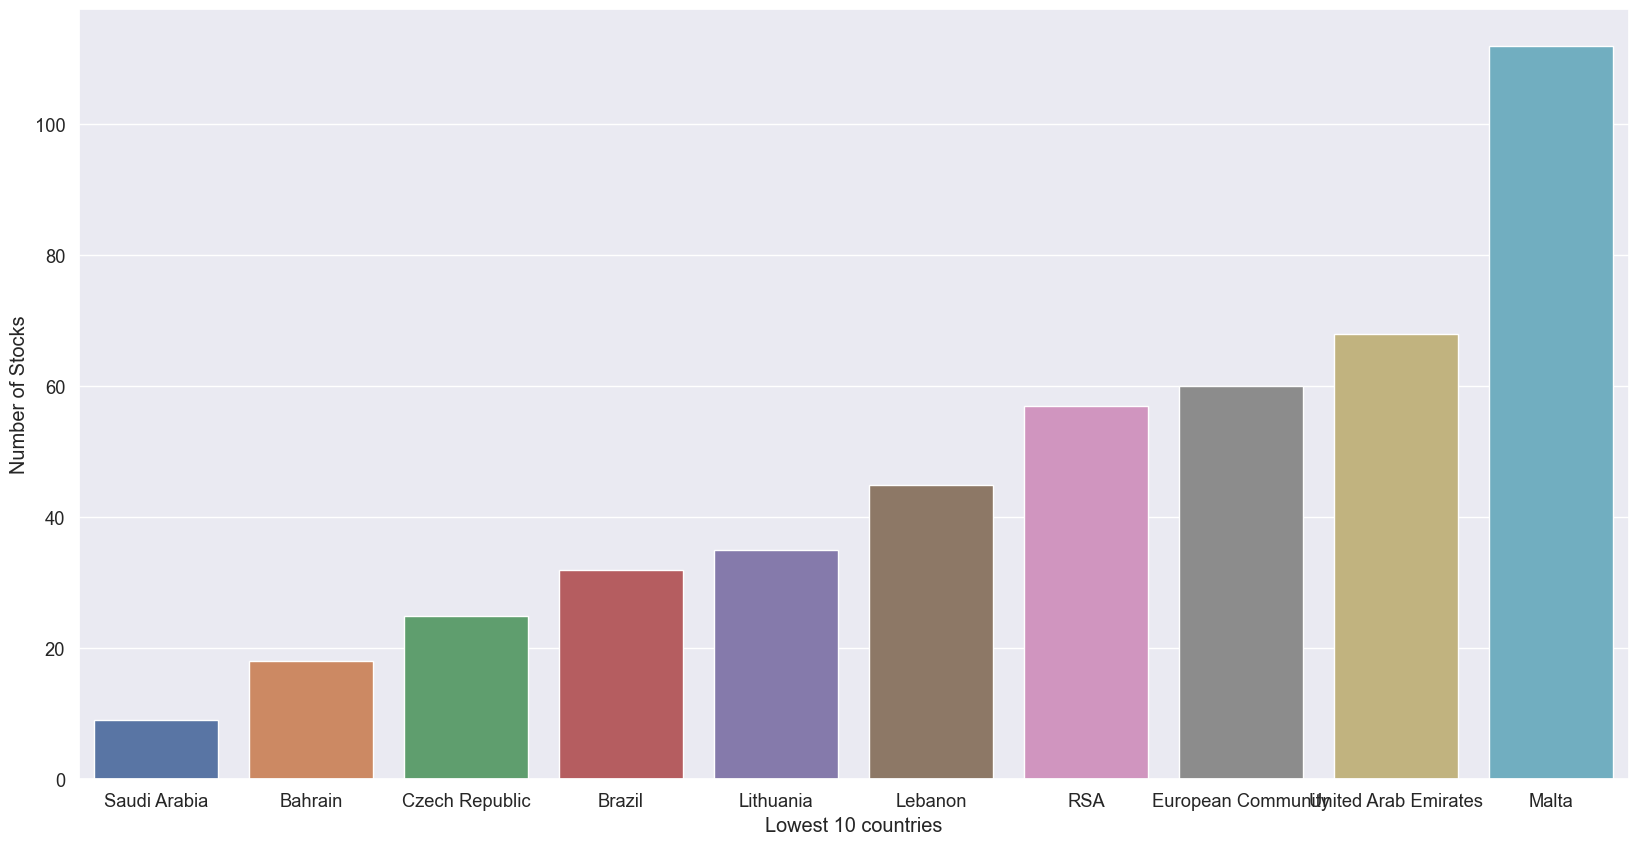

In [155]:
sns.countplot(data = df3 , x = "Country" , order = df3.groupby('Country')['StockCode'].count().sort_values(ascending = True).index )

plt.ylabel('Number of Stocks')
plt.xlabel('Lowest 10 countries')

** Top stock in the 5 top countries with their prices **

In [156]:
df['Country'].value_counts().sort_values(ascending = False)[:5]

United Kingdom    479985
Germany             9025
France              8392
EIRE                7879
Spain               2479
Name: Country, dtype: int64

In [157]:
df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = False)[:5].index)]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
...                    ...        ...        ...             ...         ...  
524873 2011-12-09 12:50:00       0.85      12680          France       10.20  
524874 2011-12-09 12:50:00       2.10      12680          France       12.60  
524875 2011-12-09 12:50:00       4.15      12680          France       16.60  
524876 2011-12-09 12:50:00       4.15      12680          France       16.60  
524877 2011-12-09 12:50:00       4.95      12680          France       14.85  

[507760 rows x 9 columns]

In [158]:
df4 = df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = False)[:5].index)]

<AxesSubplot:xlabel='Country', ylabel='count'>

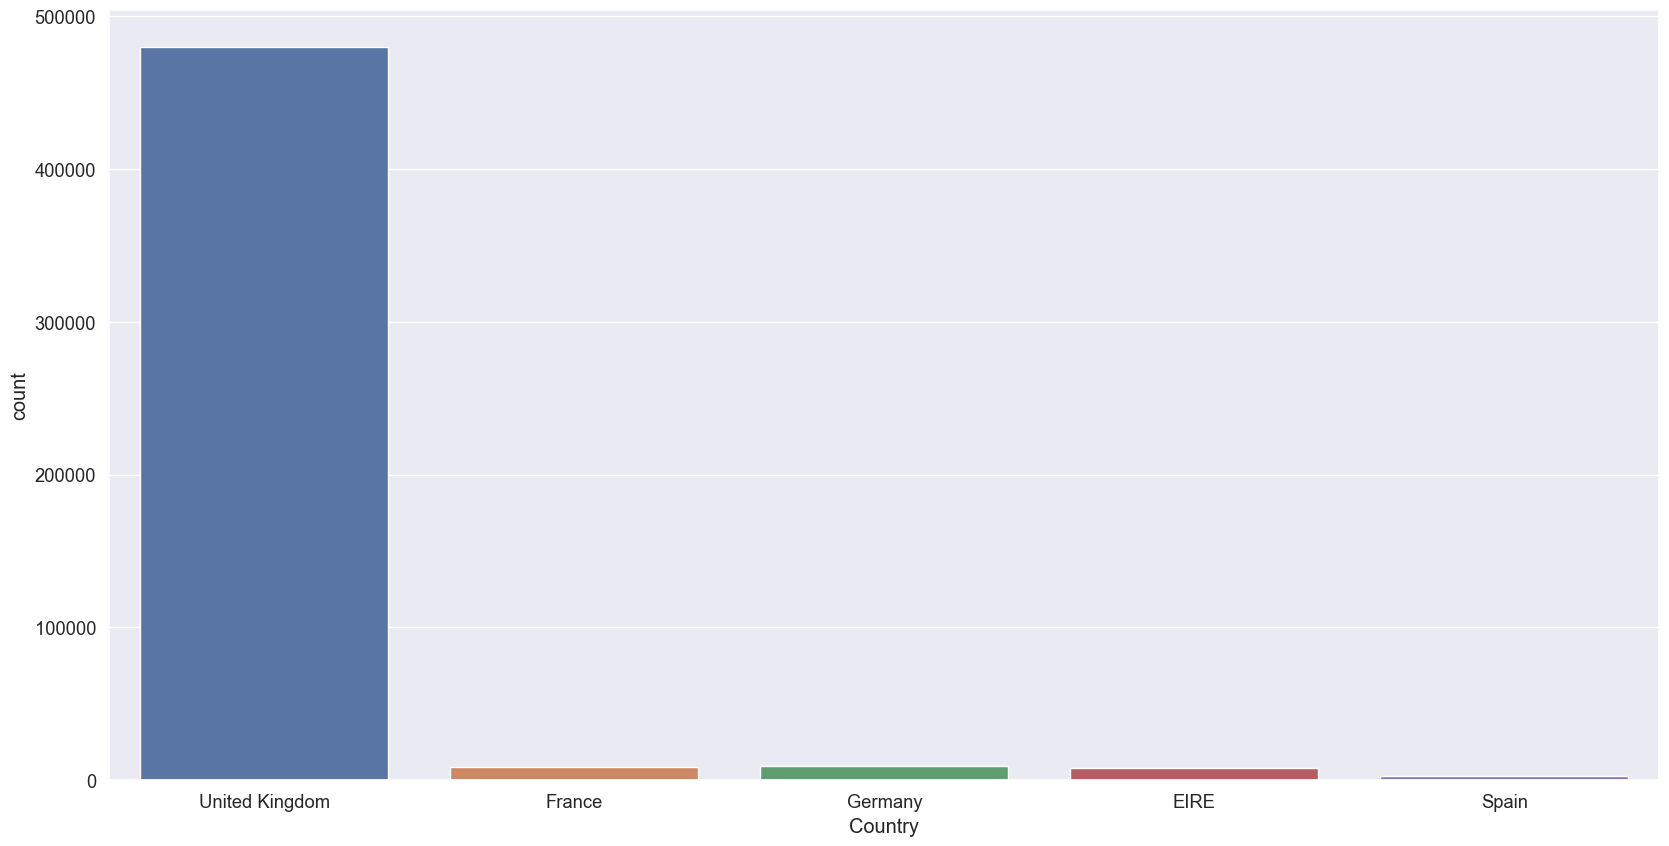

In [159]:
sns.countplot(data = df4 , x = 'Country')

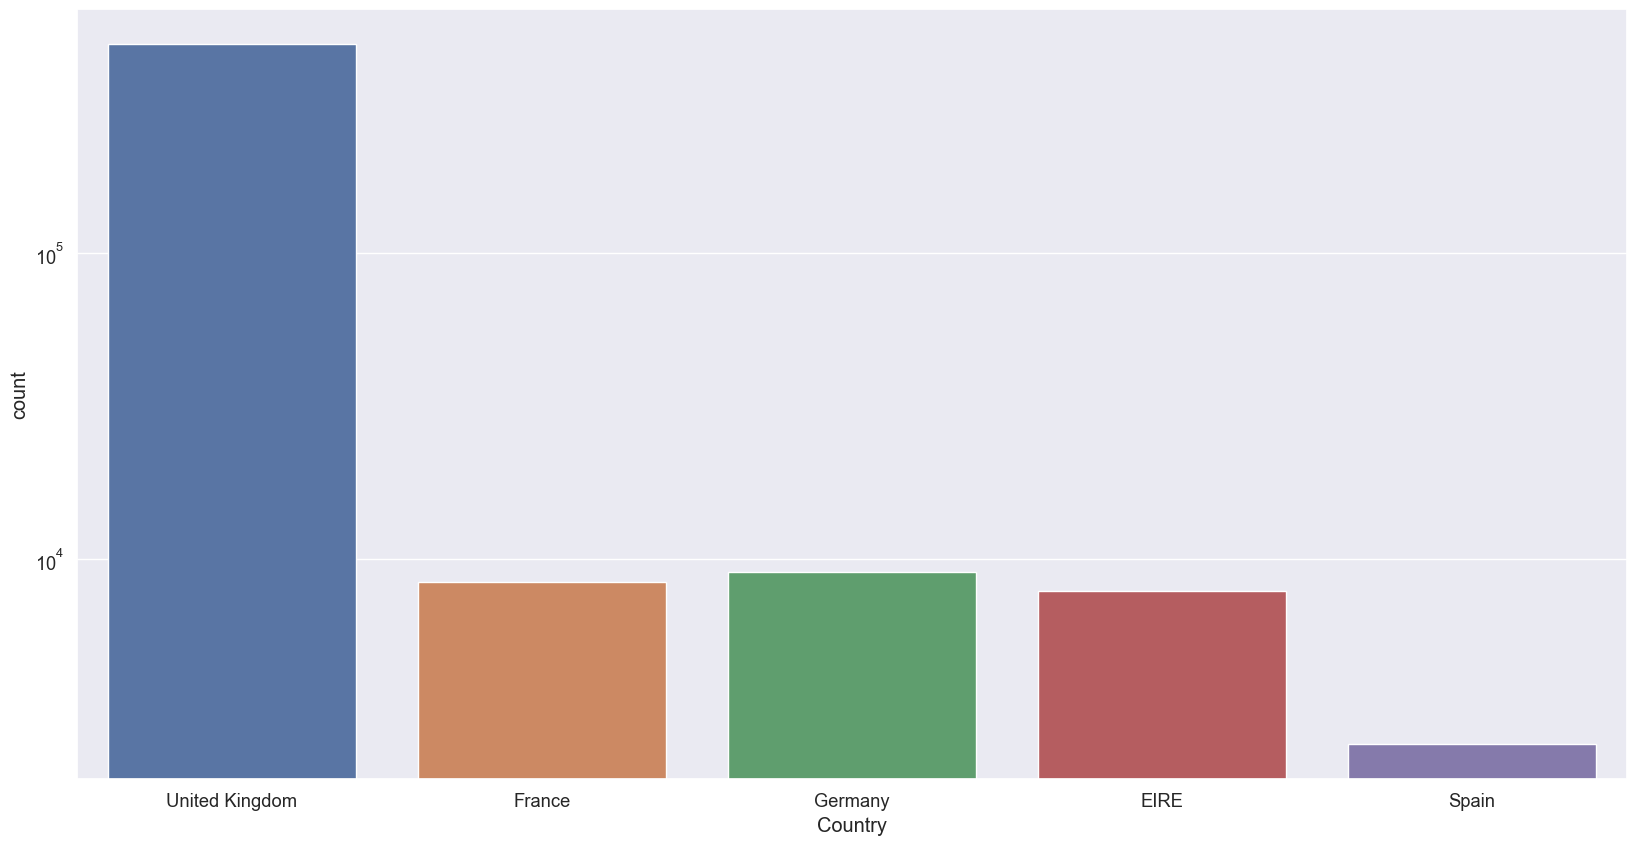

In [160]:
sns.countplot(data = df4 , x = 'Country')
plt.yscale('log')

In [161]:
df4.groupby('Country')['StockCode'].value_counts().sort_values(ascending = False)

Country         StockCode
United Kingdom  85123A       2158
                85099B       1954
                22423        1701
                47566        1607
                20725        1409
                             ... 
Germany         23040           1
                23048           1
                23055           1
                23056           1
United Kingdom  m               1
Name: StockCode, Length: 10181, dtype: int64

In [162]:
df4.Country.unique()

array(['United Kingdom', 'France', 'Germany', 'EIRE', 'Spain'],
      dtype=object)

** Top Stock in UK **

In [163]:
df4[df4['Country'] == 'United Kingdom']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'85123A'

** Top Stock in France **

In [164]:
df4[df4['Country'] == 'France']['StockCode'].value_counts().sort_values(ascending = False)

POST     300
23084     74
21731     71
22554     67
22556     66
        ... 
23314      1
21787      1
21358      1
21972      1
21258      1
Name: StockCode, Length: 1542, dtype: int64

In [165]:
df4[df4['Country'] == 'France']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'POST'

** Top Stock in Germany **

In [166]:
df4[df4['Country'] == 'Germany']['StockCode'].value_counts().sort_values(ascending = False)

POST     374
22326    112
22328     72
22554     63
22423     63
        ... 
21620      1
23421      1
70007      1
22670      1
22081      1
Name: StockCode, Length: 1664, dtype: int64

In [167]:
df4[df4['Country'] == 'Germany']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'POST'

** Top Stock in EIRE **

In [168]:
df4[df4['Country'] == 'EIRE']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'C2'

** Top Stock in Spain **

In [169]:
df4[df4['Country'] == 'Spain']['StockCode'].value_counts().sort_values(ascending = False)

POST     62
22423    22
22077    15
22960    13
22326    12
         ..
20617     1
22945     1
21819     1
20654     1
23371     1
Name: StockCode, Length: 1091, dtype: int64

In [170]:
df4[df4['Country'] == 'Spain']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'POST'

** Total Price for top stock in UK **

In [171]:
df4[(df4['Country'] == 'United Kingdom') & (df4['StockCode'] == '85123A')].sum()['TotalPrice']

98670.65

** Total Price for top stock in France **

In [172]:
df4[(df4['Country'] == 'France') & (df4['StockCode'] == 'POST')]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
45        536370      POST     POSTAGE         3 2010-12-01 08:45:00   
5086      536852      POST     POSTAGE         1 2010-12-03 09:51:00   
6481      536974      POST     POSTAGE         2 2010-12-03 13:59:00   
7705      537065      POST     POSTAGE         9 2010-12-05 11:57:00   
13694     537463      POST     POSTAGE         4 2010-12-07 10:08:00   
...          ...       ...         ...       ...                 ...   
513199    580756      POST     POSTAGE         1 2011-12-06 10:19:00   
515885    580986      POST     POSTAGE         4 2011-12-06 16:34:00   
516098    581001      POST     POSTAGE         3 2011-12-07 08:07:00   
517915    581171      POST     POSTAGE         2 2011-12-07 15:02:00   
520523    581279      POST     POSTAGE         3 2011-12-08 11:35:00   

        UnitPrice CustomerID Country  TotalPrice  
45           18.0      12583  France        54.0  
5086         18.0      12686  France        18.0  
6481         18.0      12682  France        36.0  
7705         18.0      12567  France       162.0  
13694        18.0      12681  France        72.0  
...           ...        ...     ...         ...  
513199       18.0      12723  France        18.0  
515885       18.0      12650  France        72.0  
516098       18.0      12583  France        54.0  
517915       18.0      12615  France        36.0  
520523       18.0      12437  France        54.0  

[300 rows x 9 columns]

In [173]:
df4[(df4['Country'] == 'France') & (df4['StockCode'] == 'POST')].sum()['TotalPrice']

15454.0

** Total Price for top stock in Germany **

In [174]:
df4[(df4['Country'] == 'Germany') & (df4['StockCode'] == 'POST')].sum()['TotalPrice']

21001.0

** Total Price for top stock in EIRE **

In [175]:
df4[(df4['Country'] == 'EIRE') & (df4['StockCode'] == 'C2')].sum()['TotalPrice']

5240.0

** Total Price for top stock in Spain **

In [176]:
df4[(df4['Country'] == 'Spain') & (df4['StockCode'] == 'POST')].sum()['TotalPrice']

5852.0

In [177]:
df4[(df4['Country'] == 'Spain') & (df4['StockCode'] == 'POST')]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
26291     538525      POST     POSTAGE         5 2010-12-13 09:39:00   
46835     540469      POST     POSTAGE         4 2011-01-07 14:04:00   
50769     540801      POST     POSTAGE         6 2011-01-11 12:25:00   
59975     541491      POST     POSTAGE         3 2011-01-18 14:04:00   
67565     541980      POST     POSTAGE         1 2011-01-24 15:09:00   
...          ...       ...         ...       ...                 ...   
467264    577476      POST     POSTAGE         3 2011-11-20 11:31:00   
468827    577523      POST     POSTAGE         1 2011-11-20 13:33:00   
470128    577606      POST     POSTAGE         3 2011-11-21 09:11:00   
480208    578339      POST     POSTAGE         1 2011-11-24 09:07:00   
514645    580955      POST     POSTAGE         1 2011-12-06 14:22:00   

        UnitPrice CustomerID Country  TotalPrice  
26291        28.0      12540   Spain       140.0  
46835        28.0      12484   Spain       112.0  
50769        28.0      12540   Spain       168.0  
59975        28.0      12510   Spain        84.0  
67565        28.0      12421   Spain        28.0  
...           ...        ...     ...         ...  
467264       28.0      12540   Spain        84.0  
468827       28.0      12597   Spain        28.0  
470128       28.0      12462   Spain        84.0  
480208       28.0      12421   Spain        28.0  
514645       28.0      12442   Spain        28.0  

[62 rows x 9 columns]

In [178]:
df4.StockCode.unique()

array(['85123A', '71053', '84406B', ..., '47591b', '72783', '23843'],
      dtype=object)

In [179]:
Top_Countries = []
Top_Stocks = []
Total_prices = []
for i in df4.Country.unique():
    Top_Countries.append(i)
    Top_Stocks.append(df4[df4['Country'] == i]['StockCode'].value_counts().sort_values(ascending = False).idxmax())
for i,v in zip(Top_Countries , Top_Stocks):
    Total_prices.append(df4[(df4['Country'] == i) & (df4['StockCode'] == v)].sum()['TotalPrice'])

    
print("Top 5 Countries: ", Top_Countries)
print("Top Stock in each country: ", Top_Stocks)
print("Total prices for each Stock: ", Total_prices)


Top 5 Countries:  ['United Kingdom', 'France', 'Germany', 'EIRE', 'Spain']
Top Stock in each country:  ['85123A', 'POST', 'POST', 'C2', 'POST']
Total prices for each Stock:  [98670.65, 15454.0, 21001.0, 5240.0, 5852.0]


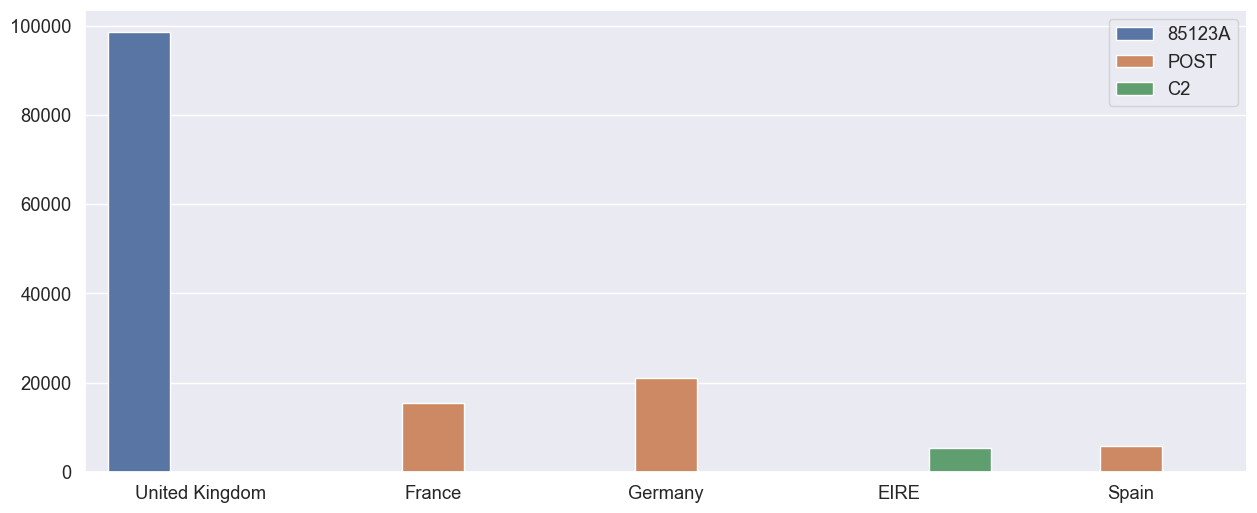

In [180]:
plt.subplots(figsize=(15,6))
sns.barplot(x = Top_Countries , y = Total_prices , hue = Top_Stocks )
plt.ylabel = 'Total price for each stock per country'
plt.xlabel = 'Top stock in each country'
plt.title = 'Top stock in the 5 top countries with their total prices'

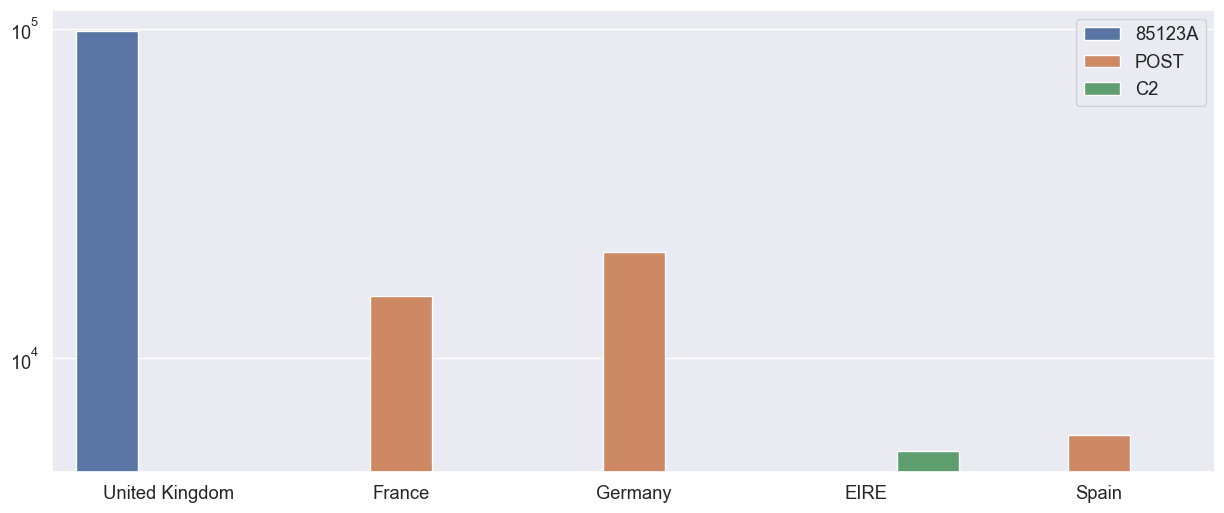

In [181]:
plt.subplots(figsize=(15,6))
sns.barplot(x = Top_Countries , y = Total_prices , hue = Top_Stocks )
plt.ylabel = 'Total price for each stock per country'
plt.xlabel = 'Top stock in each country'
plt.title = 'Top stock in the 5 top countries with their total prices'
plt.yscale('log')

** Top stock in the 5 lowest countries with their prices **

In [182]:
df['Country'].value_counts().sort_values(ascending = True)[:5]

Saudi Arabia       9
Bahrain           18
Czech Republic    25
Brazil            32
Lithuania         35
Name: Country, dtype: int64

In [183]:
df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = True)[:5].index)]

InvoiceNo StockCode                          Description  Quantity  \
7738      537081     22409            MONEY BOX BISCUITS DESIGN        12   
7739      537081     21915               RED  HARMONICA IN BOX         36   
7740      537081   15056BL              EDWARDIAN PARASOL BLACK        12   
7741      537081    15056N            EDWARDIAN PARASOL NATURAL        12   
7742      537081     20679                EDWARDIAN PARASOL RED        12   
...          ...       ...                                  ...       ...   
371493    570026     21373         MIRRORED WALL ART SNOWFLAKES        24   
371494    570026     20974          12 PENCILS SMALL TUBE SKULL        24   
371495    570026     20975  12 PENCILS SMALL TUBE RED RETROSPOT        24   
371496    570026     84347  ROTATING SILVER ANGELS T-LIGHT HLDR        24   
371497    570026      POST                              POSTAGE         1   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
7738   2010-12-05 12:00:00       1.25      15332       Lithuania        15.0  
7739   2010-12-05 12:00:00       1.25      15332       Lithuania        45.0  
7740   2010-12-05 12:00:00       5.95      15332       Lithuania        71.4  
7741   2010-12-05 12:00:00       5.95      15332       Lithuania        71.4  
7742   2010-12-05 12:00:00       5.95      15332       Lithuania        71.4  
...                    ...        ...        ...             ...         ...  
371493 2011-10-07 10:37:00       0.75      12781  Czech Republic        18.0  
371494 2011-10-07 10:37:00       0.65      12781  Czech Republic        15.6  
371495 2011-10-07 10:37:00       0.65      12781  Czech Republic        15.6  
371496 2011-10-07 10:37:00       2.55      12781  Czech Republic        61.2  
371497 2011-10-07 10:37:00      40.00      12781  Czech Republic        40.0  

[119 rows x 9 columns]

In [184]:
df5 = df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = True)[:5].index)]

In [185]:
df5.groupby('Country')['StockCode'].value_counts().sort_values(ascending = False)

Country       StockCode
Bahrain       22890        2
Lithuania     22751        2
              20967        2
              21429        2
              21915        2
                          ..
Brazil        22662        1
              22630        1
              22629        1
              22494        1
Saudi Arabia  22969        1
Name: StockCode, Length: 111, dtype: int64

In [186]:
df5.Country.unique()

array(['Lithuania', 'Bahrain', 'Saudi Arabia', 'Czech Republic', 'Brazil'],
      dtype=object)

** Top Stock in Czech Republic **

In [187]:
df5[df5['Country'] == 'Czech Republic']['StockCode'].value_counts().sort_values(ascending = False)

22930     1
84755     1
22216     1
21791     1
22231     1
22250     1
84459A    1
20972     1
22326     1
21428     1
22587     1
47594B    1
85206A    1
22244     1
22505     1
47421     1
23271     1
22579     1
22578     1
21253     1
21373     1
20974     1
20975     1
84347     1
POST      1
Name: StockCode, dtype: int64

In [188]:
df5[df5['Country'] == 'Czech Republic']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'22930'

** Top Stock in Bahrain **

In [189]:
df5[df5['Country'] == 'Bahrain']['StockCode'].value_counts().sort_values(ascending = False)

72802B    2
22890     2
22693     1
23076     1
23077     1
22649     1
22423     1
85040A    1
22699     1
22697     1
22698     1
72802A    1
72802C    1
37449     1
37446     1
37450     1
Name: StockCode, dtype: int64

In [190]:
df5[df5['Country'] == 'Bahrain']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'72802B'

** Top Stock in Lithuania **

In [191]:
df5[df5['Country'] == 'Lithuania']['StockCode'].value_counts().sort_values(ascending = False)

22751      2
21429      2
22569      2
20967      2
21915      2
22750      2
20681      1
22306      1
22273      1
21914      1
20679      1
20682      1
20686      1
22300      1
15056N     1
15056BL    1
22307      1
22551      1
22554      1
22301      1
22568      1
22940      1
85114B     1
22271      1
85206A     1
22021      1
22553      1
22409      1
22145      1
Name: StockCode, dtype: int64

In [192]:
df5[df5['Country'] == 'Lithuania']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'22751'

** Top Stock in Brazil **

In [193]:
df5[df5['Country'] == 'Brazil']['StockCode'].value_counts().sort_values(ascending = False)

22423      1
22699      1
22697      1
22698      1
22366      1
21430      1
22630      1
22662      1
22629      1
22382      1
15056BL    1
15056P     1
15056N     1
20679      1
21166      1
21181      1
21770      1
22993      1
22722      1
23179      1
23178      1
22494      1
21260      1
21906      1
84971S     1
23054      1
23053      1
23050      1
23051      1
23049      1
23052      1
22488      1
Name: StockCode, dtype: int64

In [194]:
df5[df5['Country'] == 'Brazil']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'22423'

** Top Stock in Saudi Arabia **

In [195]:
df5[df5['Country'] == 'Saudi Arabia']['StockCode'].value_counts().sort_values(ascending = False)

22915    1
22363    1
22362    1
22361    1
22553    1
22555    1
22556    1
20781    1
22969    1
Name: StockCode, dtype: int64

In [196]:
df5[df5['Country'] == 'Saudi Arabia']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'22915'

** Total Price for top stock in Saudi Arabia  **

In [197]:
df5[(df5['Country'] == 'Saudi Arabia') & (df5['StockCode'] == '22915')].sum()['TotalPrice']

5.04

** Total Price for top stock in Brazil **

In [198]:
df5[(df5['Country'] == 'Brazil') & (df5['StockCode'] == '22423')].sum()['TotalPrice']

175.2

** Total Price for top stock in Lithuania **

In [199]:
df5[(df5['Country'] == 'Lithuania') & (df5['StockCode'] == '22751')].sum()['TotalPrice']

105.0

** Total Price for top stock in Bahrain **

In [200]:
df5[(df5['Country'] == 'Bahrain') & (df5['StockCode'] == '72802B')].sum()['TotalPrice']

231.24

** Total Price for top stock in UK **

In [201]:
df5[(df5['Country'] == 'Czech Republic') & (df5['StockCode'] == '22930')].sum()['TotalPrice']

45.9

In [202]:
df5.Country.unique()

array(['Lithuania', 'Bahrain', 'Saudi Arabia', 'Czech Republic', 'Brazil'],
      dtype=object)

In [203]:
Lowest_Countries = []
Top_Stocks1 = []
Total_prices1 = []
for i in df5.Country.unique():
    Lowest_Countries.append(i)
    Top_Stocks1.append(df5[df5['Country'] == i]['StockCode'].value_counts().sort_values(ascending = False).idxmax())
for i,v in zip(Lowest_Countries , Top_Stocks1):
    Total_prices1.append(df5[(df5['Country'] == i) & (df5['StockCode'] == v)].sum()['TotalPrice'])

print("Lowest 5 Countries: ", Lowest_Countries)
print("Top Stock in each country: ", Top_Stocks1)
print("Total prices for each Stock: ", Total_prices1)

Lowest 5 Countries:  ['Lithuania', 'Bahrain', 'Saudi Arabia', 'Czech Republic', 'Brazil']
Top Stock in each country:  ['22751', '72802B', '22915', '22930', '22423']
Total prices for each Stock:  [105.0, 231.24, 5.04, 45.9, 175.2]


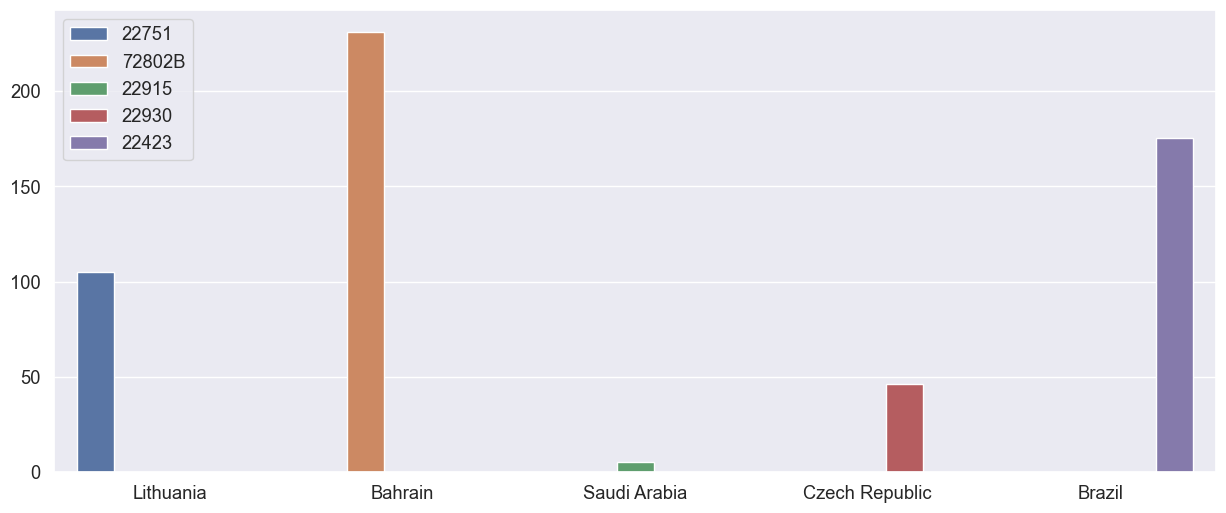

In [204]:
plt.subplots(figsize=(15,6))
sns.barplot(x = Lowest_Countries , y = Total_prices1 , hue = Top_Stocks1 )
plt.ylabel = 'Total price for each stock per country'
plt.xlabel = 'Top stock in each country'
plt.title = 'Top stock in the 5 lowest countries with their total prices'

** No.of orders to the top customers in the top 5 countries **

In [205]:
df['Country'].value_counts().sort_values(ascending = False)[:5]

United Kingdom    479985
Germany             9025
France              8392
EIRE                7879
Spain               2479
Name: Country, dtype: int64

In [206]:
df['Country'].value_counts().sort_values(ascending = False)[:5].index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain'], dtype='object')

In [207]:
df6 = df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = False)[:5].index)]

In [208]:
df6

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
...                    ...        ...        ...             ...         ...  
524873 2011-12-09 12:50:00       0.85      12680          France       10.20  
524874 2011-12-09 12:50:00       2.10      12680          France       12.60  
524875 2011-12-09 12:50:00       4.15      12680          France       16.60  
524876 2011-12-09 12:50:00       4.15      12680          France       16.60  
524877 2011-12-09 12:50:00       4.95      12680          France       14.85  

[507760 rows x 9 columns]

In [209]:
df6['Country'].unique()

array(['United Kingdom', 'France', 'Germany', 'EIRE', 'Spain'],
      dtype=object)

** Top customerID in UK **

In [210]:
df6[df6['Country'] == 'United Kingdom']['CustomerID'].value_counts().sort_values(ascending = False)

17841    7676
14096    5111
12748    4412
14606    2677
15311    2366
         ... 
18174       1
18268       1
15118       1
13017       1
17956       1
Name: CustomerID, Length: 3920, dtype: int64

In [211]:
df6[df6['Country'] == 'United Kingdom']['CustomerID'].value_counts().sort_values(ascending = False).idxmax()

'17841'

** Top CustomerID in Germany **

In [212]:
df6[df6['Country'] == 'Germany']['CustomerID'].value_counts().sort_values(ascending = False).idxmax()

'12621'

** Top CustomerID in France **

In [213]:
df6[df6['Country'] == 'France']['CustomerID'].value_counts().sort_values(ascending = False).idxmax()

'12681'

** Top CustomerID in EIRE **

In [214]:
df6[df6['Country'] == 'EIRE']['CustomerID'].value_counts().sort_values(ascending = False).idxmax()

'14911'

** Top CustomerID in Spain **

In [215]:
df6[df6['Country'] == 'Spain']['CustomerID'].value_counts().sort_values(ascending = False).idxmax()

'12540'

** No.of orders for top customer in France **

In [216]:
df6[(df6['Country'] == 'France') & (df6['CustomerID'] == '12681')]

InvoiceNo StockCode                          Description  Quantity  \
13654     537463     22961               JAM MAKING SET PRINTED        12   
13655     537463     21224                   SET/4 SKULL BADGES        10   
13656     537463     22326  ROUND SNACK BOXES SET OF4 WOODLAND         18   
13657     537463     21124   SET/10 BLUE POLKADOT PARTY CANDLES        24   
13658     537463     21121    SET/10 RED POLKADOT PARTY CANDLES        24   
...          ...       ...                                  ...       ...   
484310    578736     23158          SET OF 5 LUCKY CAT MAGNETS         12   
484311    578736     23156        SET OF 5 MINI GROCERY MAGNETS        12   
484312    578736     20750             RED RETROSPOT MINI CASES         2   
484313    578736     21770               OPEN CLOSED METAL SIGN         6   
484314    578736      POST                              POSTAGE         8   

               InvoiceDate  UnitPrice CustomerID Country  TotalPrice  
13654  2010-12-07 10:08:00       1.45      12681  France       17.40  
13655  2010-12-07 10:08:00       1.25      12681  France       12.50  
13656  2010-12-07 10:08:00       2.95      12681  France       53.10  
13657  2010-12-07 10:08:00       1.25      12681  France       30.00  
13658  2010-12-07 10:08:00       1.25      12681  France       30.00  
...                    ...        ...        ...     ...         ...  
484310 2011-11-25 11:33:00       2.08      12681  France       24.96  
484311 2011-11-25 11:33:00       2.08      12681  France       24.96  
484312 2011-11-25 11:33:00       7.95      12681  France       15.90  
484313 2011-11-25 11:33:00       4.95      12681  France       29.70  
484314 2011-11-25 11:33:00      18.00      12681  France      144.00  

[638 rows x 9 columns]

In [217]:
df6[(df6['Country'] == 'France') & (df6['CustomerID'] == '12681')].count()['InvoiceNo']

638

** No.of orders for top customer in UK **

In [218]:
df6[(df6['Country'] == 'United Kingdom') & (df6['CustomerID'] == '17841')].count()['InvoiceNo']

7676

** No.of orders for top customer in Germany **

In [219]:
df6[(df6['Country'] == 'Germany') & (df6['CustomerID'] == '12621')].count()['InvoiceNo']

467

** No.of orders for top customer in EIRE **

In [220]:
df6[(df6['Country'] == 'EIRE') & (df6['CustomerID'] == '14911')].count()['InvoiceNo']

5670

** No.of orders for top customer in Spain **

In [221]:
df6[(df6['Country'] == 'Spain') & (df6['CustomerID'] == '12540')].count()['InvoiceNo']

478

In [222]:
Top_Countries2 = []
Top_Customers = []
Number_of_orders = []
for i in df6.Country.unique():
    Top_Countries2.append(i)
    Top_Customers.append(df6[df6['Country'] == i]['CustomerID'].value_counts().sort_values(ascending = False).idxmax())
for i,v in zip(Top_Countries2 , Top_Customers):
    Number_of_orders.append(df6[(df6['Country'] == i) & (df6['CustomerID'] == v)].count()['InvoiceNo'])

    
print("Top 5 Countries: ", Top_Countries2)
print("Top CustomerID in each country: ", Top_Customers)
print("Number of Orders for each customer: ", Number_of_orders)

Top 5 Countries:  ['United Kingdom', 'France', 'Germany', 'EIRE', 'Spain']
Top CustomerID in each country:  ['17841', '12681', '12621', '14911', '12540']
Number of Orders for each customer:  [7676, 638, 467, 5670, 478]


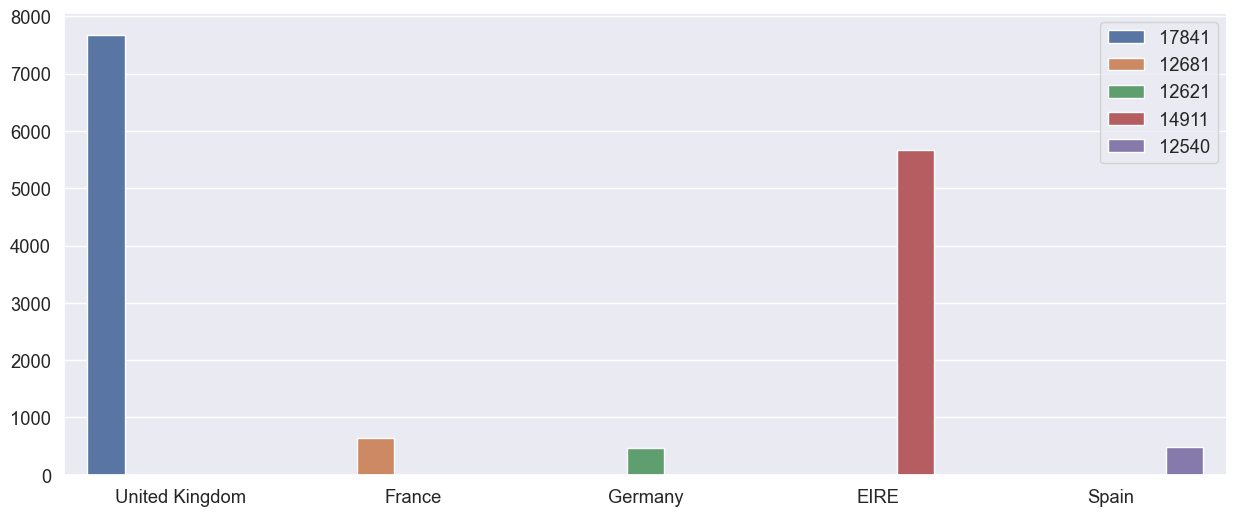

In [223]:
plt.subplots(figsize=(15,6))
sns.barplot(x = Top_Countries2 , y = Number_of_orders , hue = Top_Customers )
plt.ylabel = 'No.of orders for the top customer per country'
plt.xlabel = 'Top CustomerID in each country'
plt.title = 'No.of orders to the top customer in the 5 top countries'

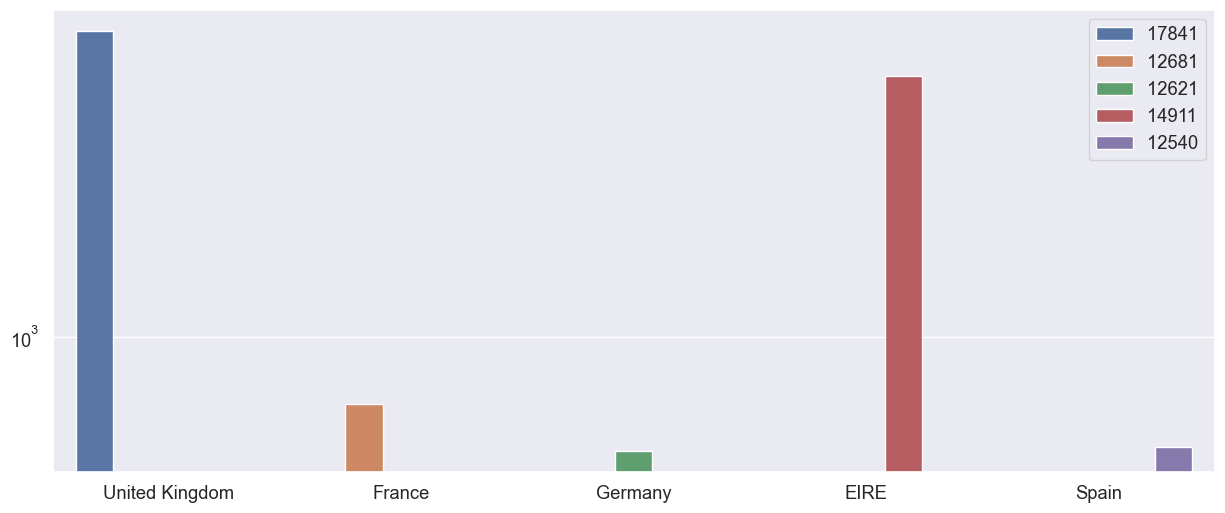

In [224]:
plt.subplots(figsize=(15,6))
sns.barplot(x = Top_Countries2 , y = Number_of_orders , hue = Top_Customers )
plt.ylabel = 'No.of orders for the top customer per country'
plt.xlabel = 'Top CustomerID in each country'
plt.title = 'No.of orders to the top customer in the 5 top countries'
plt.yscale('log')

** What is the quantity from the top StockCode in the 5 top countries ? **

In [225]:
df['Country'].value_counts().sort_values(ascending = False)[:5]

United Kingdom    479985
Germany             9025
France              8392
EIRE                7879
Spain               2479
Name: Country, dtype: int64

In [226]:
df['Country'].value_counts().sort_values(ascending = False)[:5].index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain'], dtype='object')

In [227]:
df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = False)[:5].index)]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
...                    ...        ...        ...             ...         ...  
524873 2011-12-09 12:50:00       0.85      12680          France       10.20  
524874 2011-12-09 12:50:00       2.10      12680          France       12.60  
524875 2011-12-09 12:50:00       4.15      12680          France       16.60  
524876 2011-12-09 12:50:00       4.15      12680          France       16.60  
524877 2011-12-09 12:50:00       4.95      12680          France       14.85  

[507760 rows x 9 columns]

In [228]:
df7 = df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = False)[:5].index)]

** Top Stock in UK **

In [229]:
df7[df7['Country'] == 'United Kingdom']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'85123A'

** Checking quantity of top stock in UK **

In [230]:
df7[(df7['Country'] == 'United Kingdom') & (df7['StockCode'] == '85123A')]

InvoiceNo StockCode                         Description  Quantity  \
0         536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
49        536373    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
66        536375    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
218       536390    85123A  WHITE HANGING HEART T-LIGHT HOLDER        64   
253       536394    85123A  WHITE HANGING HEART T-LIGHT HOLDER        32   
...          ...       ...                                 ...       ...   
522348    581439    85123A  CREAM HANGING HEART T-LIGHT HOLDER         1   
522983    581452    85123A  WHITE HANGING HEART T-LIGHT HOLDER        32   
523200    581472    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
523817    581492    85123A  CREAM HANGING HEART T-LIGHT HOLDER         3   
524617    581538    85123A  CREAM HANGING HEART T-LIGHT HOLDER         1   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30  
49     2010-12-01 09:02:00       2.55      17850  United Kingdom       15.30  
66     2010-12-01 09:32:00       2.55      17850  United Kingdom       15.30  
218    2010-12-01 10:19:00       2.55      17511  United Kingdom      163.20  
253    2010-12-01 10:39:00       2.55      13408  United Kingdom       81.60  
...                    ...        ...        ...             ...         ...  
522348 2011-12-08 16:30:00       5.79        NaN  United Kingdom        5.79  
522983 2011-12-08 18:03:00       2.55      17675  United Kingdom       81.60  
523200 2011-12-08 19:55:00       2.95      15796  United Kingdom       17.70  
523817 2011-12-09 10:03:00       5.79        NaN  United Kingdom       17.37  
524617 2011-12-09 11:34:00       2.95      14446  United Kingdom        2.95  

[2158 rows x 9 columns]

In [231]:
df7[(df7['Country'] == 'United Kingdom') & (df7['StockCode'] == '85123A')].sum()['Quantity']

35491

** Top Stock in France **

In [232]:
df7[df7['Country'] == 'France']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'POST'

** Checking quantity of top stock in France **

In [233]:
df7[(df7['Country'] == 'France') & (df7['StockCode'] == 'POST')].sum()['Quantity']

825

** Top Stock in Germany **

In [234]:
df7[df7['Country'] == 'Germany']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'POST'

** Checking quantity of top stock in Germany **

In [235]:
df7[(df7['Country'] == 'Germany') & (df7['StockCode'] == 'POST')].sum()['Quantity']

1114



** Top Stock in EIRE **

In [236]:
df7[df7['Country'] == 'EIRE']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'C2'

** Checking quantity of top stock in EIRE **

In [237]:
df7[(df7['Country'] == 'EIRE') & (df7['StockCode'] == 'C2')].sum()['Quantity']

106

** Top Stock in Spain **

In [238]:
df7[df7['Country'] == 'Spain']['StockCode'].value_counts().sort_values(ascending = False).idxmax()

'POST'

** Checking quantity of top stock in Spain **

In [239]:
df7[(df7['Country'] == 'Spain') & (df7['StockCode'] == 'POST')].sum()['Quantity']

209

In [240]:
Top_Countries3 = []
Top_Stocks2 = []
Quantities = []
for i in df7.Country.unique():
    Top_Countries3.append(i)
    Top_Stocks2.append(df7[df7['Country'] == i]['StockCode'].value_counts().sort_values(ascending = False).idxmax())
for i,v in zip(Top_Countries3 , Top_Stocks2):
    Quantities.append(df7[(df7['Country'] == i) & (df7['StockCode'] == v)].sum()['Quantity'])

    
print("Top 5 Countries: ", Top_Countries3)
print("Top Stock in each country: ", Top_Stocks2)
print("Quantity of top stock in each country : ", Quantities)

Top 5 Countries:  ['United Kingdom', 'France', 'Germany', 'EIRE', 'Spain']
Top Stock in each country:  ['85123A', 'POST', 'POST', 'C2', 'POST']
Quantity of top stock in each country :  [35491, 825, 1114, 106, 209]


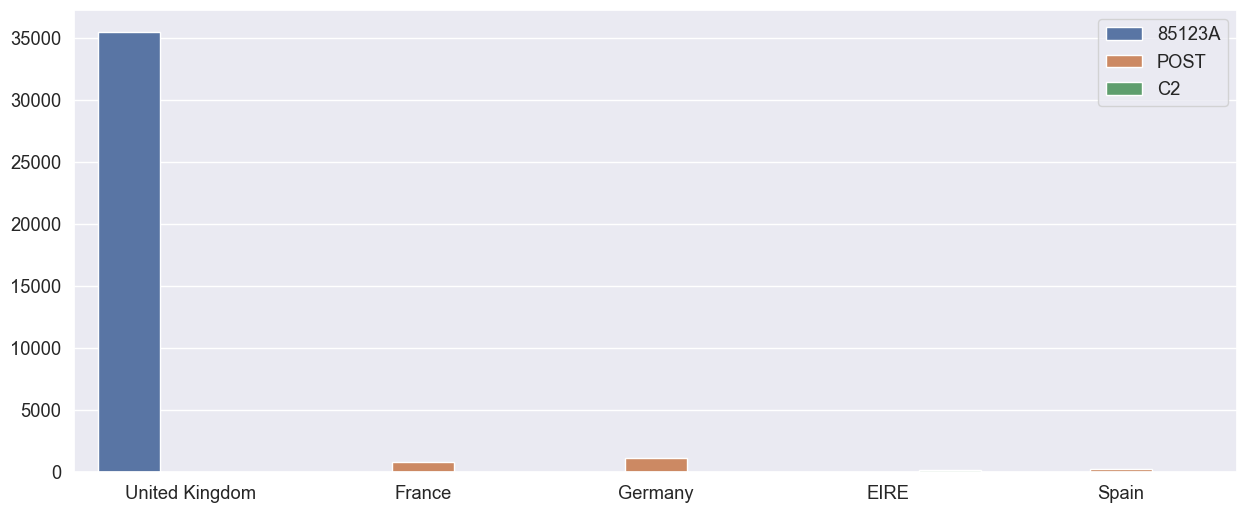

In [241]:
plt.subplots(figsize=(15,6))
sns.barplot(x = Top_Countries3 , y = Quantities , hue = Top_Stocks2 )
plt.ylabel = 'Quantity of top stock in each country'
plt.xlabel = 'Top Stock in each country'
plt.title = 'Quantity of top stock in the 5 top countries'

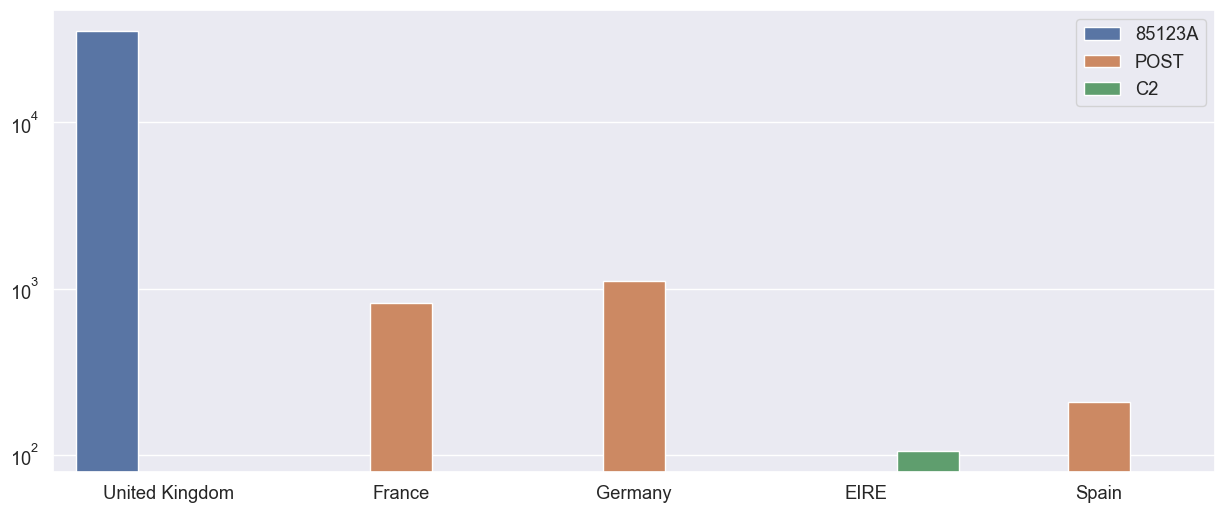

In [242]:
plt.subplots(figsize=(15,6))
sns.barplot(x = Top_Countries3 , y = Quantities , hue = Top_Stocks2 )
plt.ylabel = 'Quantity of top stock in each country'
plt.xlabel = 'Top Stock in each country'
plt.title = 'Quantity of top stock in the 5 top countries'
plt.yscale('log')

** What is the quantity from the lowest StockCode in the 5 top countries ? **

In [243]:
df['Country'].value_counts().sort_values(ascending = False)[:5]

United Kingdom    479985
Germany             9025
France              8392
EIRE                7879
Spain               2479
Name: Country, dtype: int64

In [244]:
df['Country'].value_counts().sort_values(ascending = False)[:5].index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain'], dtype='object')

In [245]:
df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = False)[:5].index)]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34  
...                    ...        ...        ...             ...         ...  
524873 2011-12-09 12:50:00       0.85      12680          France       10.20  
524874 2011-12-09 12:50:00       2.10      12680          France       12.60  
524875 2011-12-09 12:50:00       4.15      12680          France       16.60  
524876 2011-12-09 12:50:00       4.15      12680          France       16.60  
524877 2011-12-09 12:50:00       4.95      12680          France       14.85  

[507760 rows x 9 columns]

In [246]:
df8 = df[df['Country'].isin(df['Country'].value_counts().sort_values(ascending = False)[:5].index)]

** Lowest Stock in UK **

In [247]:
df8[df8['Country'] == 'United Kingdom']['StockCode'].value_counts().sort_values(ascending = True).index[0]

'23843'

** Checking quantity of lowest stock in UK **

In [248]:
df8[(df8['Country'] == 'United Kingdom') & (df8['StockCode'] == '23843')].sum()['Quantity']

80995

** Lowest Stock in France **

In [249]:
df8[df8['Country'] == 'France']['StockCode'].value_counts().sort_values(ascending = True).index[0]

'21258'

** Checking quantity of lowest stock in France **

In [250]:
df8[(df8['Country'] == 'France') & (df8['StockCode'] == '21258')].sum()['Quantity']

2

** Lowest Stock in Germany **

In [251]:
df8[df8['Country'] == 'Germany']['StockCode'].value_counts().sort_values(ascending = True).index[0]

'22081'

** Checking quantity of lowest stock in Germany **

In [252]:
df8[(df8['Country'] == 'Germany') & (df8['StockCode'] == '22081')].sum()['Quantity']

10

** Lowest Stock in EIRE **

In [253]:
df8[df8['Country'] == 'EIRE']['StockCode'].value_counts().sort_values(ascending = True).index[0]

'79302M'

** Checking quantity of lowest stock in EIRE **

In [254]:
df8[(df8['Country'] == 'EIRE') & (df8['StockCode'] == '79302M')].sum()['Quantity']

6

** Lowest Stock in Spain **

In [255]:
df8[df8['Country'] == 'Spain']['StockCode'].value_counts().sort_values(ascending = True).index[0]

'23371'

** Checking quantity of lowest stock in Spain **

In [256]:
df8[(df8['Country'] == 'Spain') & (df7['StockCode'] == '23371')].sum()['Quantity']

1

In [257]:
Top_Countries4 = []
Top_Stocks3 = []
Quantities1 = []
for i in df8.Country.unique():
    Top_Countries4.append(i)
    Top_Stocks3.append(df8[df8['Country'] == i]['StockCode'].value_counts().sort_values(ascending = True).index[0])
for i,v in zip(Top_Countries4 , Top_Stocks3):
    Quantities1.append(df8[(df8['Country'] == i) & (df8['StockCode'] == v)].sum()['Quantity'])


In [258]:
print("Top 5 Countries: ", Top_Countries4)
print("Lowest Stock in each country: ", Top_Stocks3)
print("Quantity of lowest stock in each country : ", Quantities1)

Top 5 Countries:  ['United Kingdom', 'France', 'Germany', 'EIRE', 'Spain']
Lowest Stock in each country:  ['23843', '21258', '22081', '79302M', '23371']
Quantity of lowest stock in each country :  [80995, 2, 10, 6, 1]


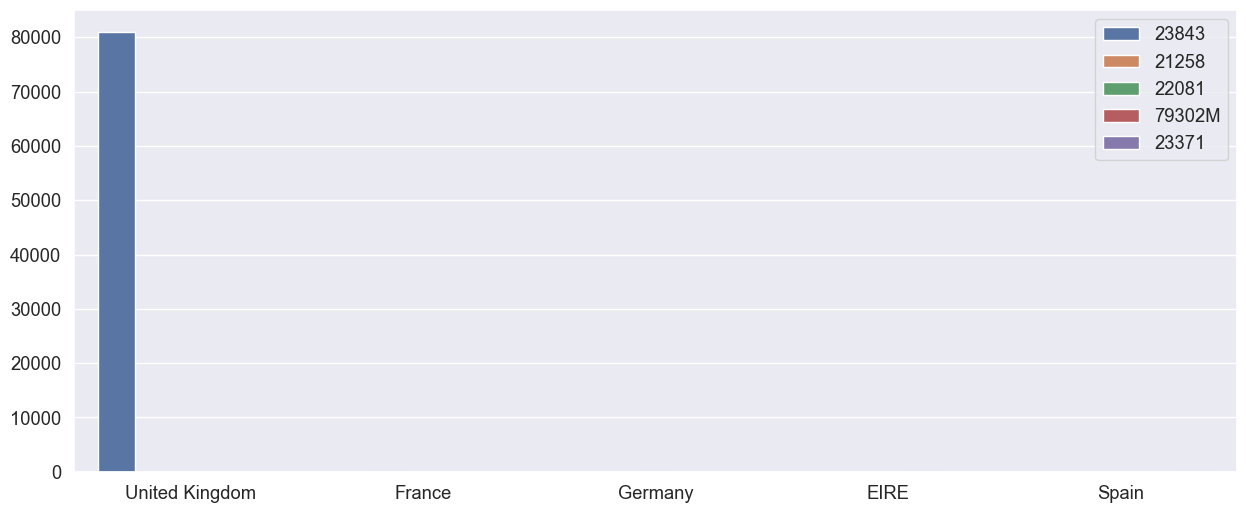

In [259]:
plt.subplots(figsize=(15,6))
sns.barplot(x = Top_Countries4 , y = Quantities1 , hue = Top_Stocks3 )
plt.ylabel = 'Quantity of lowest stock in each country'
plt.xlabel = 'Lowest Stock in each country'
plt.title = 'Quantity of lowest stock in the 5 top countries'

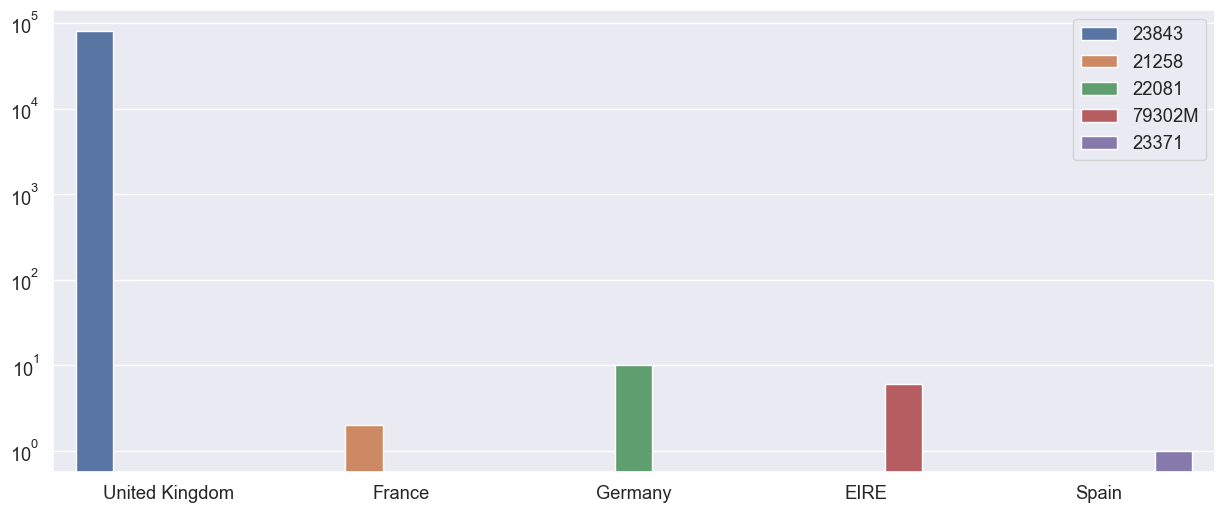

In [260]:
plt.subplots(figsize=(15,6))
sns.barplot(x = Top_Countries4 , y = Quantities1 , hue = Top_Stocks3 )
plt.ylabel = 'Quantity of lowest stock in each country'
plt.xlabel = 'Lowest Stock in each country'
plt.title = 'Quantity of lowest stock in the 5 top countries'
plt.yscale('log')


In [261]:
df["Year"] = df.InvoiceDate.dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] = df.InvoiceDate.dt.month
df["Week"] = df.InvoiceDate.dt.week
df["Weekday"] = df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] = df.InvoiceDate.dt.dayofyear
df['Month_Name'] = df.InvoiceDate.dt.month_name()
df['Day_Name'] = df.InvoiceDate.dt.day_name()
df['Hour'] = df.InvoiceDate.dt.hour
df['Minute'] = df.InvoiceDate.dt.minute

In [262]:
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(map_months)

In [263]:
def map_hours(x):
    if x in range(0, 13):
        return 'morning'
    elif x in range(13, 19):
        return 'afternoon'
    else:
        return 'evening'
    
df['Period'] = df['Hour'].apply(map_hours)

In [264]:
df["Year"].unique()

array([2010, 2011], dtype=int64)

<AxesSubplot:xlabel='Year', ylabel='count'>

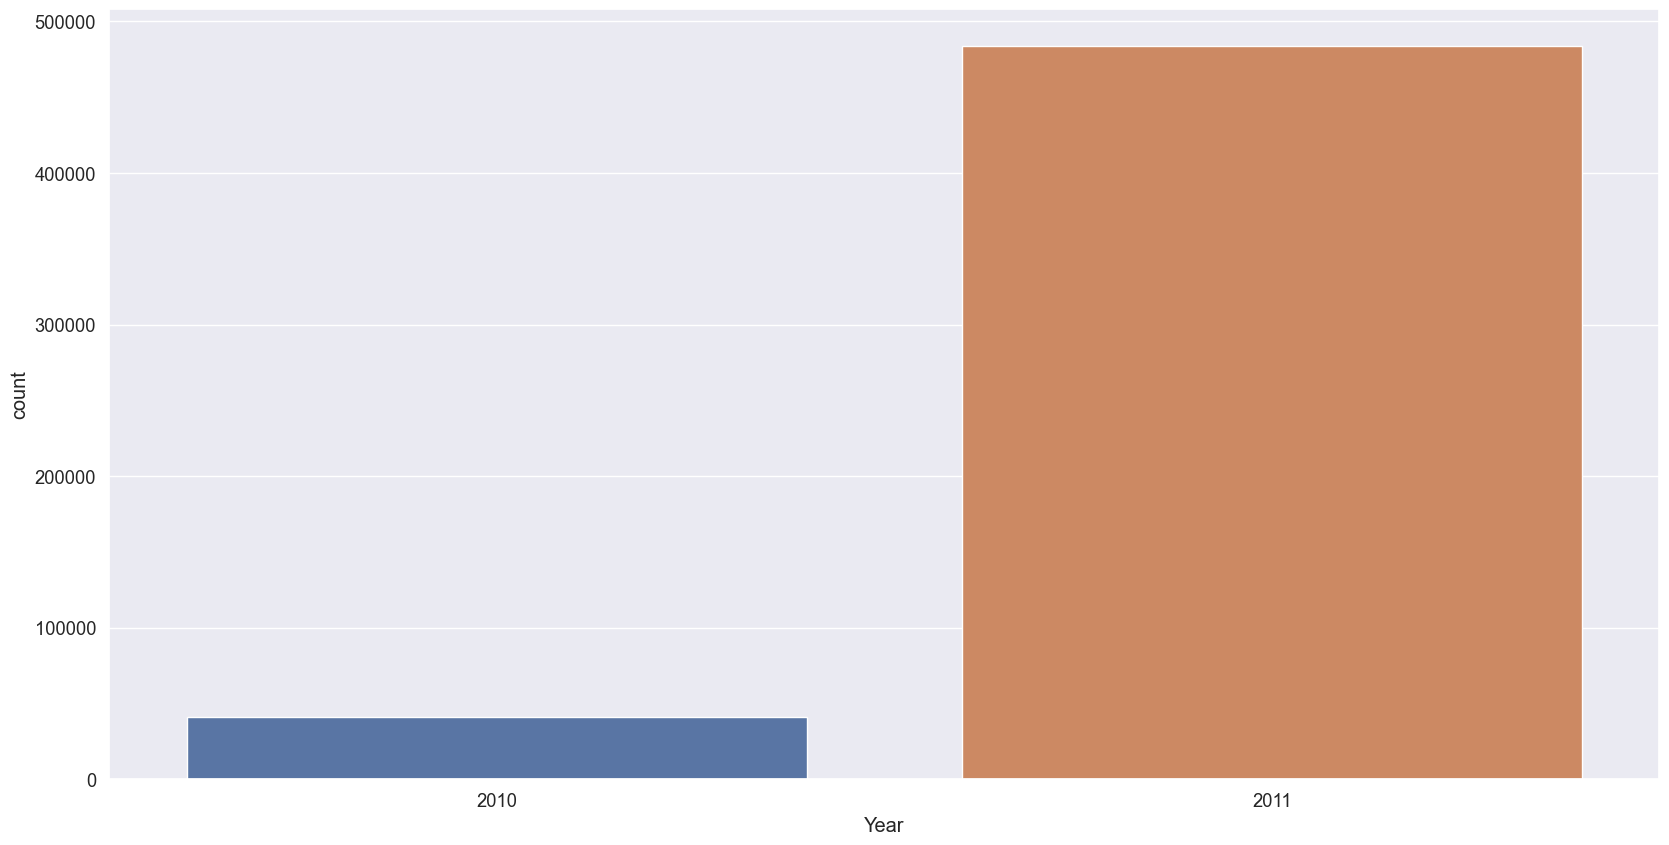

In [265]:
sns.countplot(df['Year'])

In [266]:
df['Quarter'].unique()

array([4, 1, 2, 3], dtype=int64)

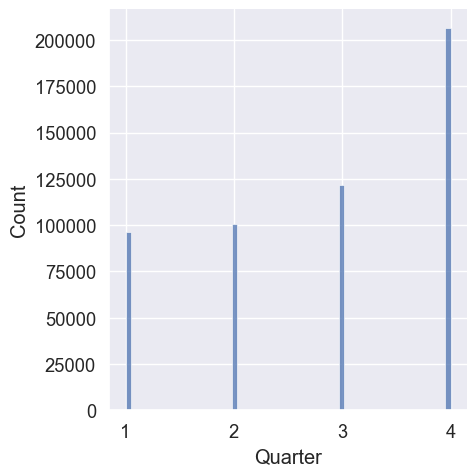

In [267]:
sns.displot(df['Quarter'] , kde = False)

<AxesSubplot:xlabel='Quarter', ylabel='count'>

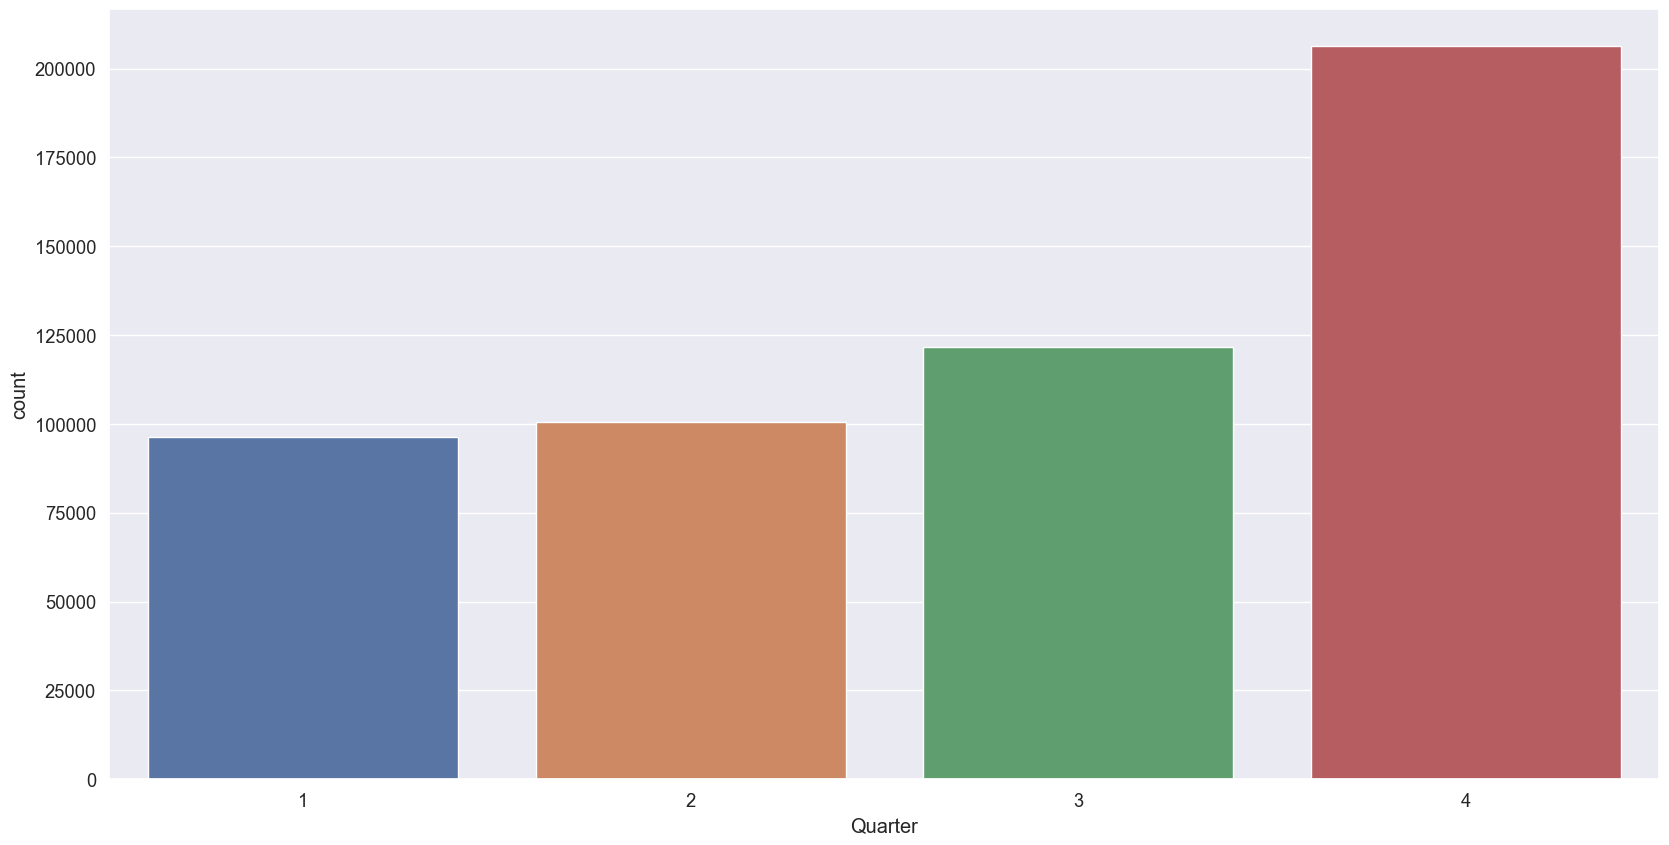

In [268]:
sns.countplot(df['Quarter'])

** Checking the transactions per quarter per year **

<AxesSubplot:xlabel='Quarter', ylabel='count'>

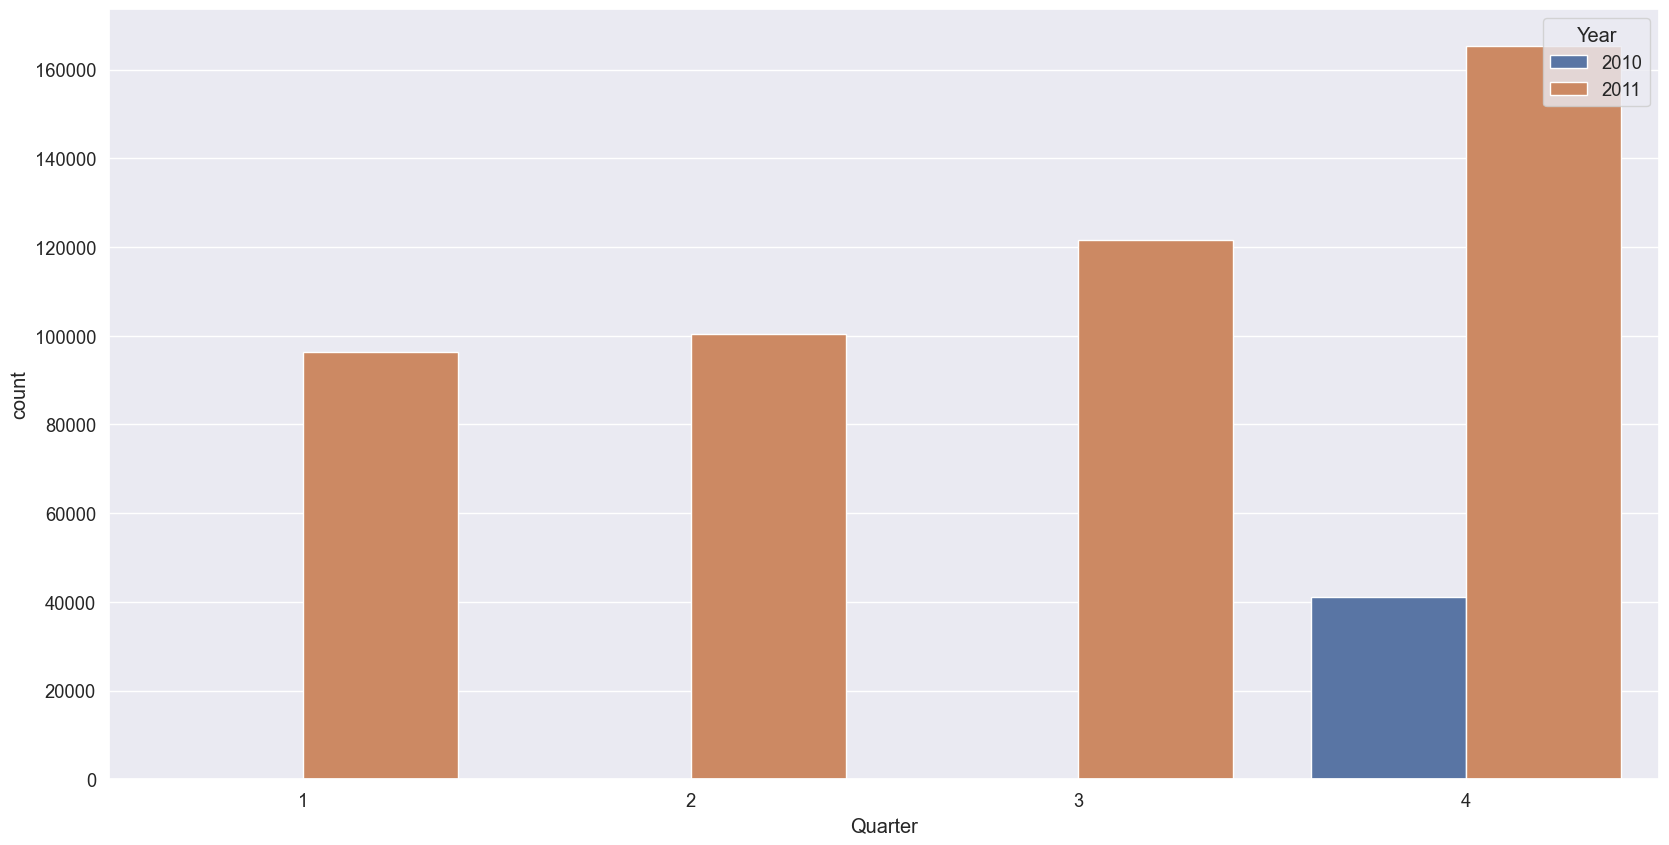

In [269]:
sns.countplot(df['Quarter'] , hue = df['Year'])

In [270]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

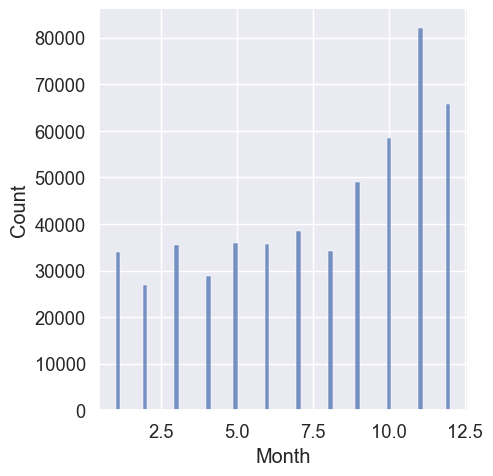

In [271]:
sns.displot(df['Month'])

<AxesSubplot:xlabel='Month', ylabel='count'>

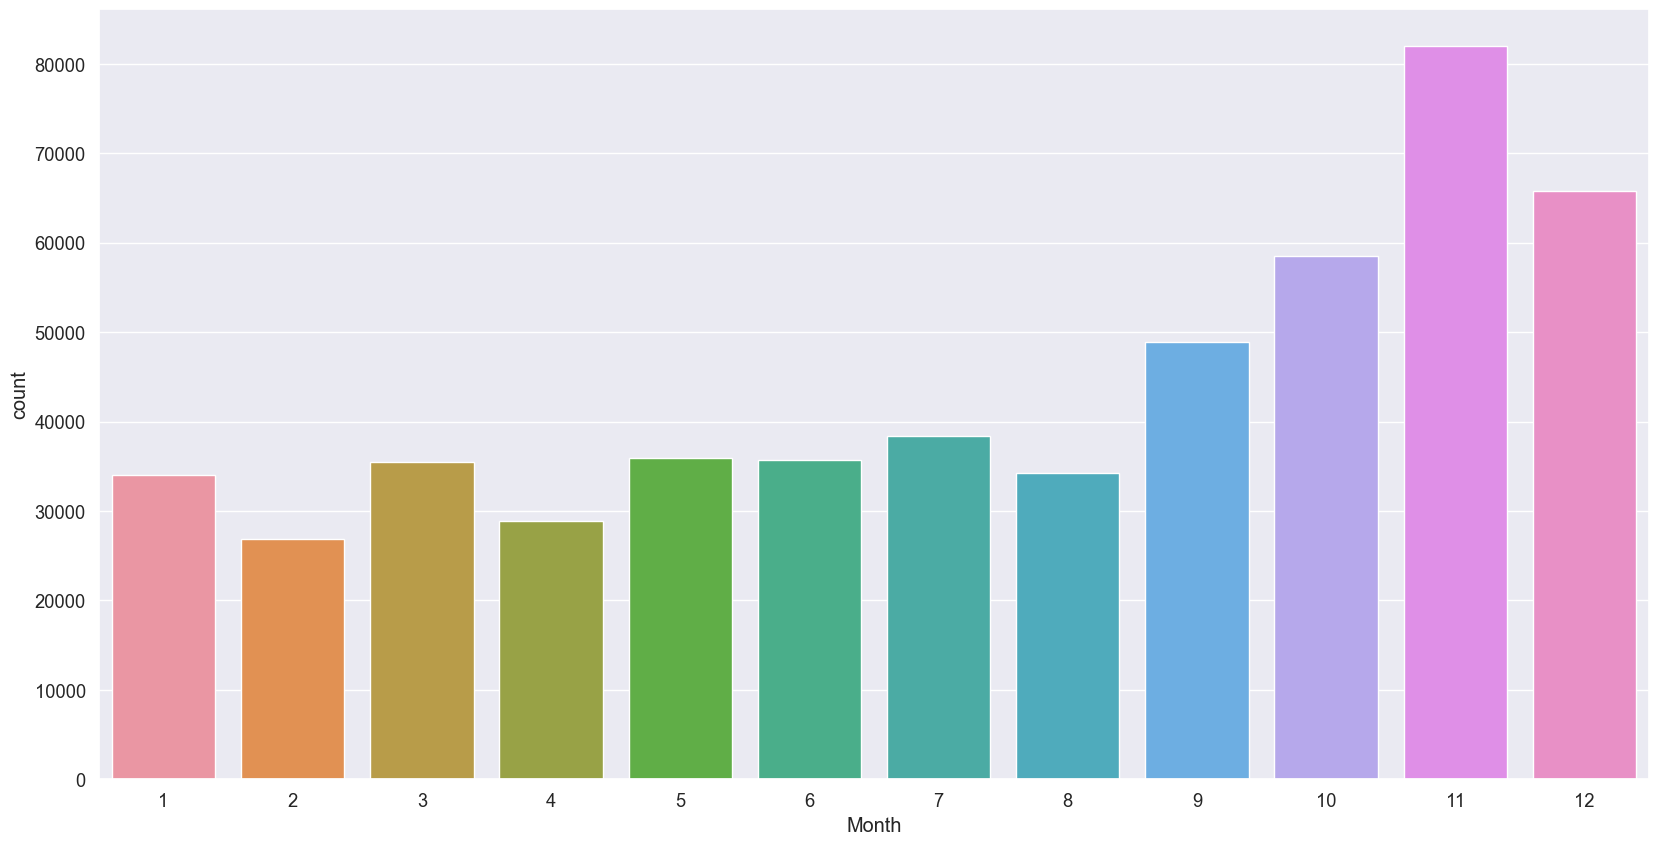

In [272]:
sns.countplot(df['Month'])

** Checking the transaction per month per year **

<AxesSubplot:xlabel='Month', ylabel='count'>

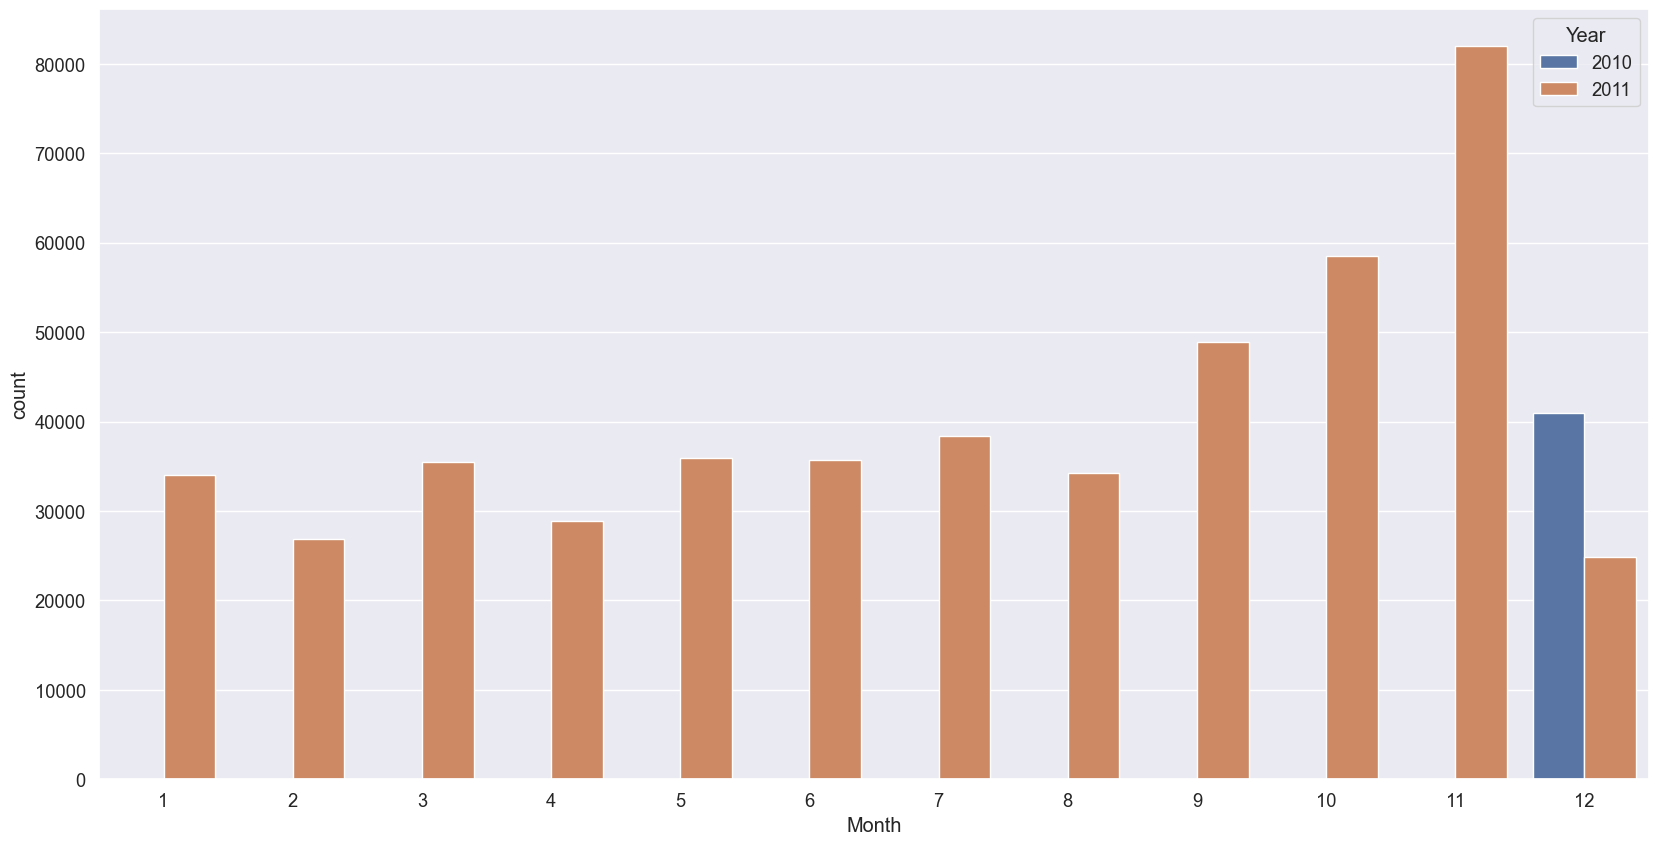

In [273]:
sns.countplot(df['Month'] , hue = df['Year'])

In [274]:
df['Week'].unique()

array([48, 49, 50, 51,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
      dtype=int64)

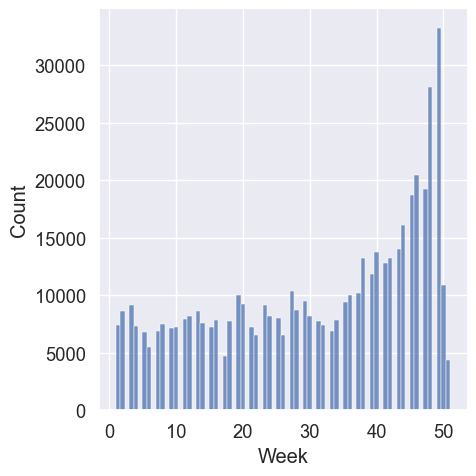

In [275]:
sns.set(rc={'figure.figsize': [20, 10]}, font_scale=1.2)
sns.displot(df['Week'])

<AxesSubplot:xlabel='Week', ylabel='count'>

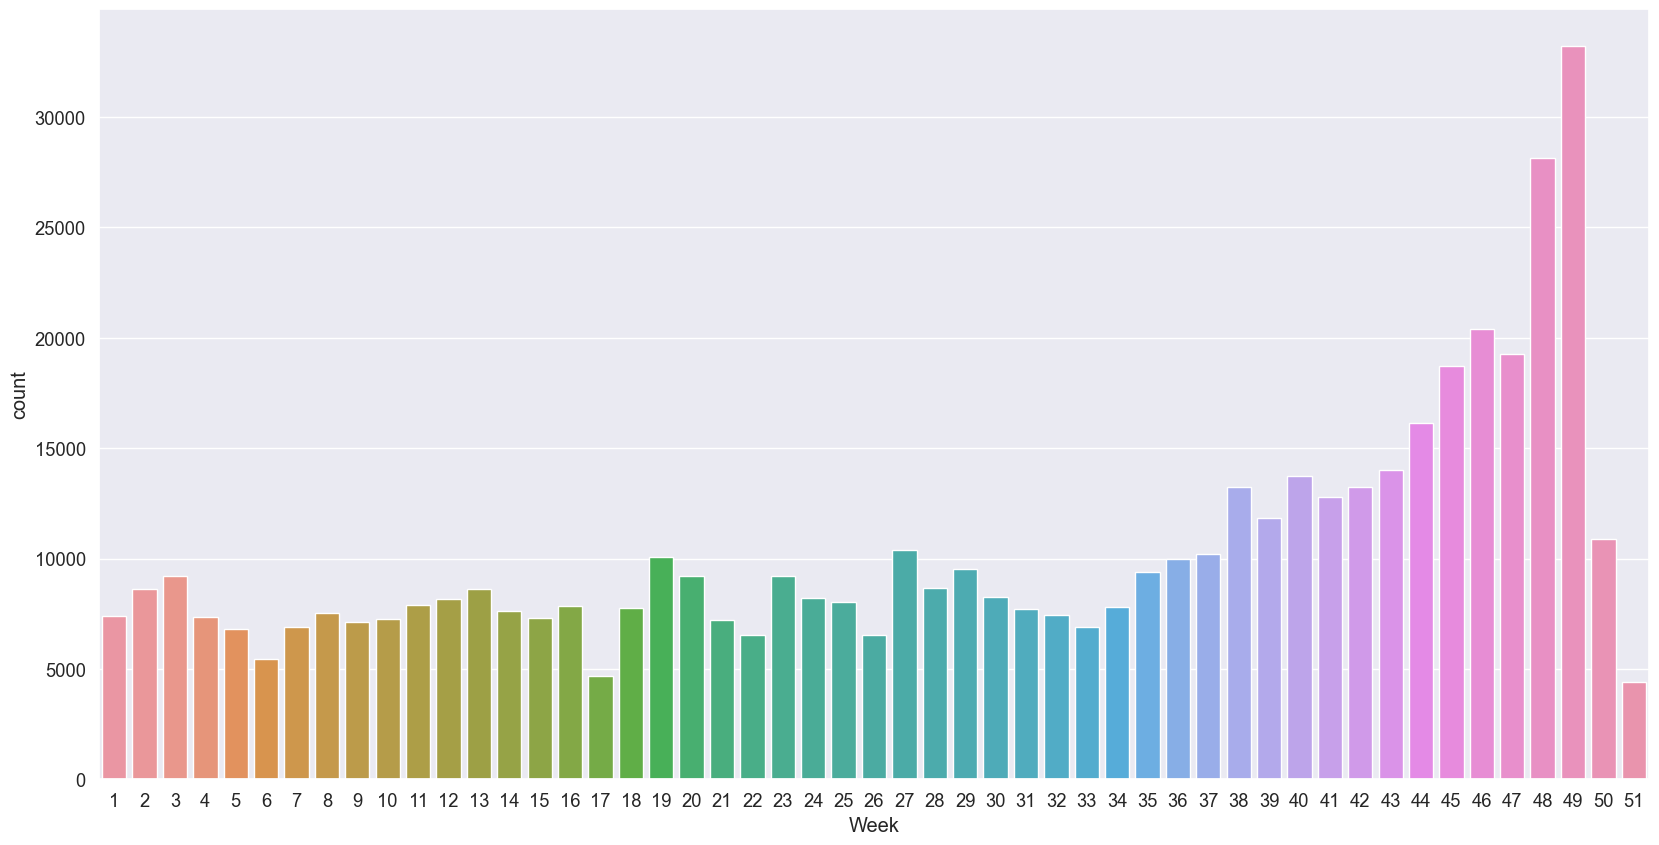

In [276]:
sns.countplot(data = df , x = 'Week')

** Checking the transaction every week per year **

<AxesSubplot:xlabel='Week', ylabel='count'>

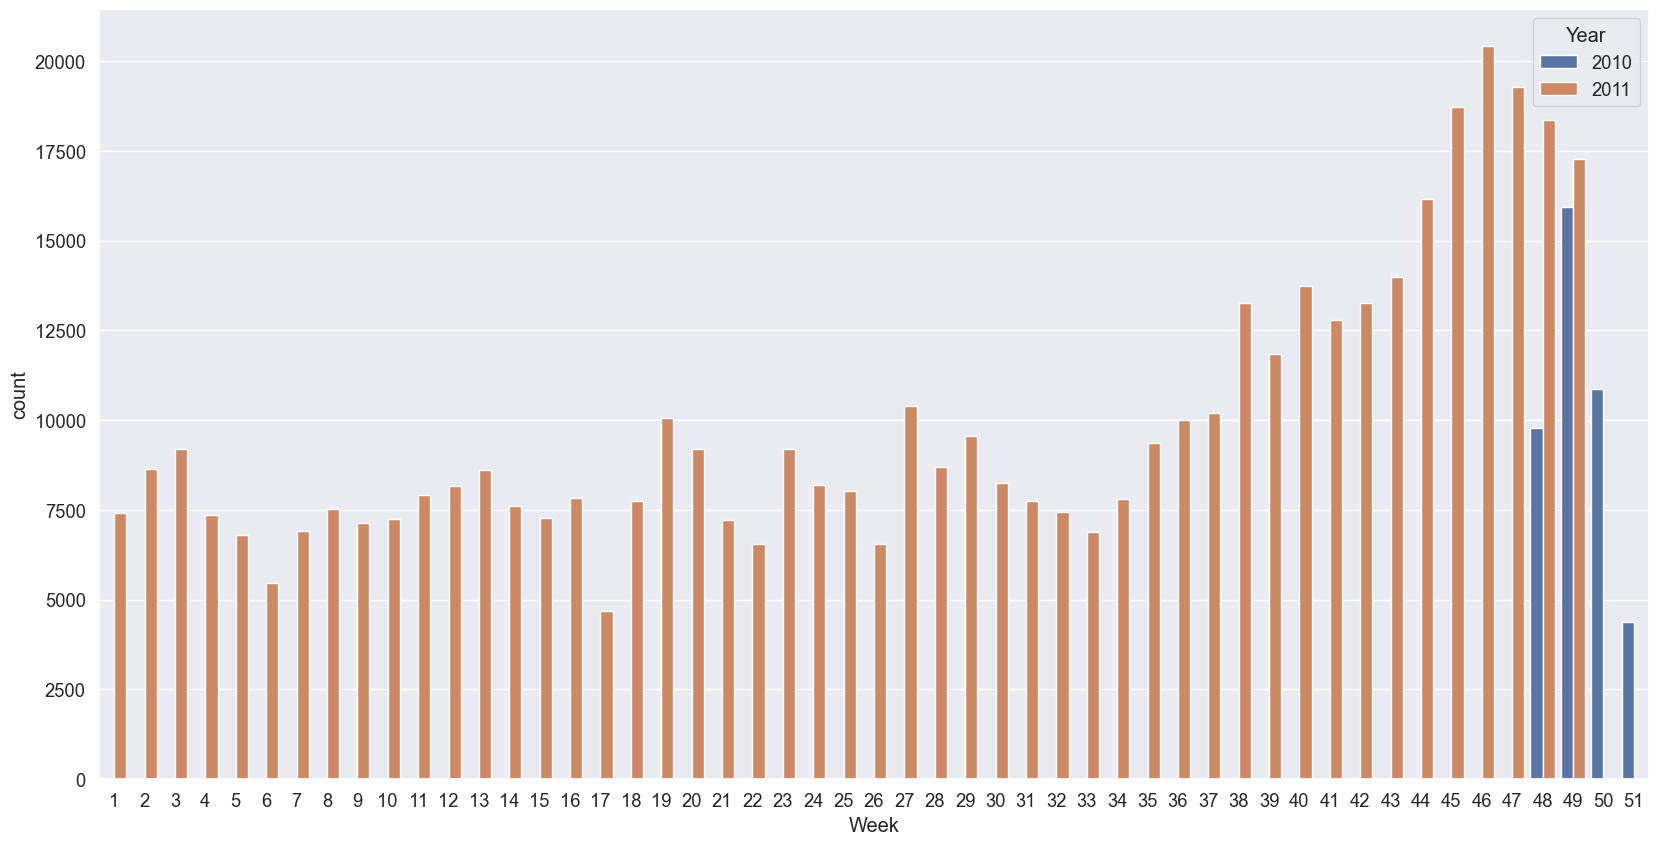

In [277]:
sns.countplot(data = df , x = 'Week' , hue = 'Year')

In [278]:
df['Weekday'].unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

In [279]:
df[df['Weekday'] == 0][['InvoiceDate' , 'Weekday' , 'Day_Name']]

InvoiceDate  Weekday Day_Name
9791   2010-12-06 08:34:00        0   Monday
9792   2010-12-06 08:34:00        0   Monday
9793   2010-12-06 08:34:00        0   Monday
9794   2010-12-06 08:34:00        0   Monday
9795   2010-12-06 08:34:00        0   Monday
...                    ...      ...      ...
512852 2011-12-05 17:36:00        0   Monday
512853 2011-12-05 17:43:00        0   Monday
512854 2011-12-05 17:43:00        0   Monday
512855 2011-12-05 17:43:00        0   Monday
512856 2011-12-05 17:43:00        0   Monday

[92466 rows x 3 columns]

In [280]:
df[df['Weekday'] == 1][['InvoiceDate' , 'Weekday' , 'Day_Name']]

InvoiceDate  Weekday Day_Name
13559  2010-12-07 09:13:00        1  Tuesday
13560  2010-12-07 09:13:00        1  Tuesday
13561  2010-12-07 09:13:00        1  Tuesday
13562  2010-12-07 09:13:00        1  Tuesday
13563  2010-12-07 09:13:00        1  Tuesday
...                    ...      ...      ...
516063 2011-12-06 17:49:00        1  Tuesday
516064 2011-12-06 17:49:00        1  Tuesday
516065 2011-12-06 17:49:00        1  Tuesday
516066 2011-12-06 17:49:00        1  Tuesday
516067 2011-12-06 17:49:00        1  Tuesday

[98726 rows x 3 columns]

In [281]:
df[df['Weekday'] == 2][['InvoiceDate' , 'Weekday' , 'Day_Name']]

InvoiceDate  Weekday   Day_Name
0      2010-12-01 08:26:00        2  Wednesday
1      2010-12-01 08:26:00        2  Wednesday
2      2010-12-01 08:26:00        2  Wednesday
3      2010-12-01 08:26:00        2  Wednesday
4      2010-12-01 08:26:00        2  Wednesday
...                    ...      ...        ...
518421 2011-12-07 17:56:00        2  Wednesday
518422 2011-12-07 17:56:00        2  Wednesday
518423 2011-12-07 17:56:00        2  Wednesday
518424 2011-12-07 17:56:00        2  Wednesday
518425 2011-12-07 17:56:00        2  Wednesday

[91467 rows x 3 columns]

In [282]:
df[df['Weekday'] == 3][['InvoiceDate' , 'Weekday' , 'Day_Name']]

InvoiceDate  Weekday  Day_Name
3028   2010-12-02 07:48:00        3  Thursday
3029   2010-12-02 07:48:00        3  Thursday
3030   2010-12-02 07:48:00        3  Thursday
3031   2010-12-02 07:48:00        3  Thursday
3032   2010-12-02 07:49:00        3  Thursday
...                    ...      ...       ...
523255 2011-12-08 20:01:00        3  Thursday
523256 2011-12-08 20:01:00        3  Thursday
523257 2011-12-08 20:01:00        3  Thursday
523258 2011-12-08 20:01:00        3  Thursday
523259 2011-12-08 20:01:00        3  Thursday

[100213 rows x 3 columns]

In [283]:
df[df['Weekday'] == 4][['InvoiceDate' , 'Weekday' , 'Day_Name']]

InvoiceDate  Weekday Day_Name
5050   2010-12-03 09:31:00        4   Friday
5051   2010-12-03 09:31:00        4   Friday
5052   2010-12-03 09:31:00        4   Friday
5053   2010-12-03 09:31:00        4   Friday
5054   2010-12-03 09:31:00        4   Friday
...                    ...      ...      ...
524873 2011-12-09 12:50:00        4   Friday
524874 2011-12-09 12:50:00        4   Friday
524875 2011-12-09 12:50:00        4   Friday
524876 2011-12-09 12:50:00        4   Friday
524877 2011-12-09 12:50:00        4   Friday

[79667 rows x 3 columns]

In [284]:
df[df['Weekday'] == 5][['InvoiceDate' , 'Weekday' , 'Day_Name']]

Empty DataFrame
Columns: [InvoiceDate, Weekday, Day_Name]
Index: []

In [285]:
df[df['Weekday'] == 6][['InvoiceDate' , 'Weekday' , 'Day_Name']]

InvoiceDate  Weekday Day_Name
7188   2010-12-05 10:03:00        6   Sunday
7189   2010-12-05 10:03:00        6   Sunday
7190   2010-12-05 10:03:00        6   Sunday
7191   2010-12-05 10:03:00        6   Sunday
7192   2010-12-05 10:03:00        6   Sunday
...                    ...      ...      ...
507594 2011-12-04 16:08:00        6   Sunday
507595 2011-12-04 16:08:00        6   Sunday
507596 2011-12-04 16:08:00        6   Sunday
507597 2011-12-04 16:08:00        6   Sunday
507598 2011-12-04 16:08:00        6   Sunday

[62339 rows x 3 columns]

<AxesSubplot:xlabel='Weekday', ylabel='count'>

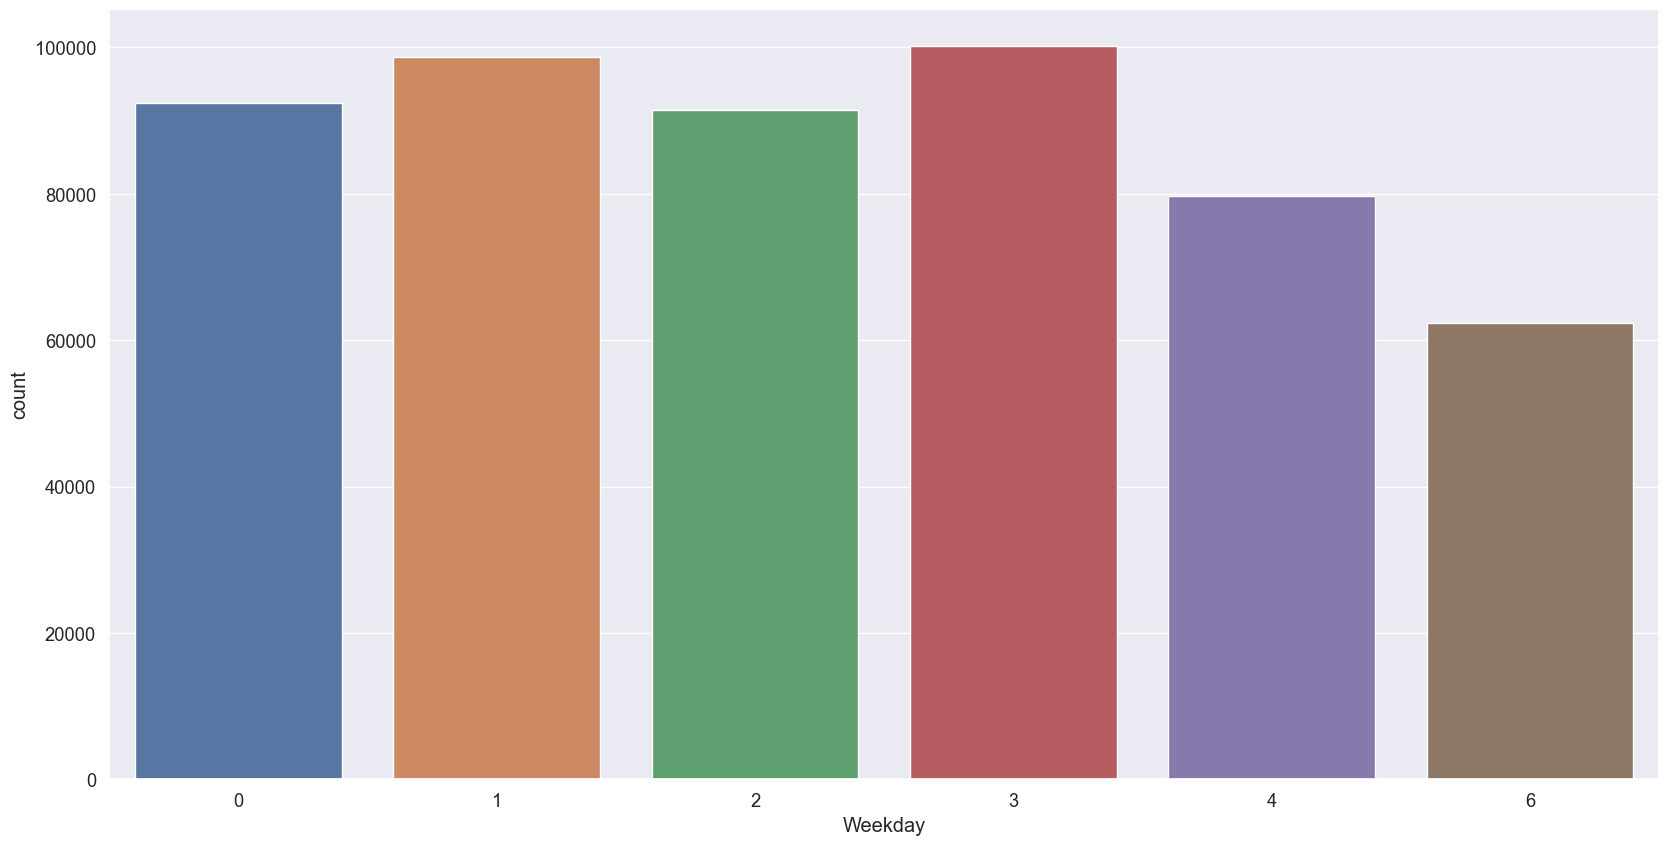

In [286]:
sns.countplot(df['Weekday'])

** Checking the transaction in every weekday per quarter **

<AxesSubplot:xlabel='Weekday', ylabel='count'>

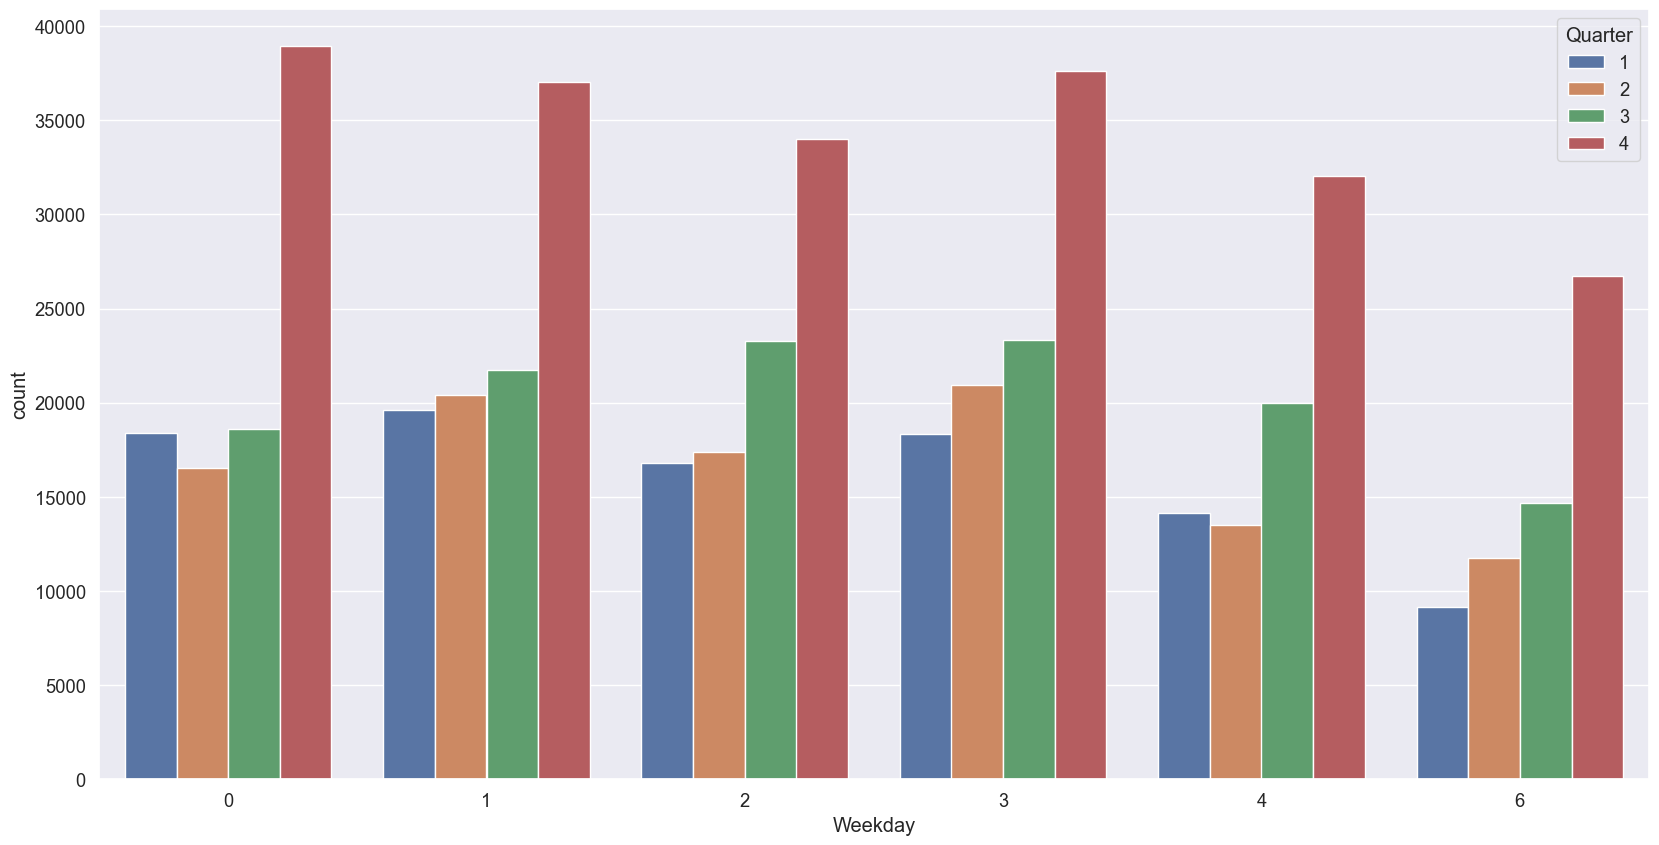

In [287]:
sns.countplot(df['Weekday'] , hue = df['Quarter'])

In [288]:
df['Day'].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 19, 20,
       21, 22, 23,  4, 11, 18, 24, 25, 26, 27, 28, 30, 31, 29],
      dtype=int64)

<AxesSubplot:xlabel='Day', ylabel='count'>

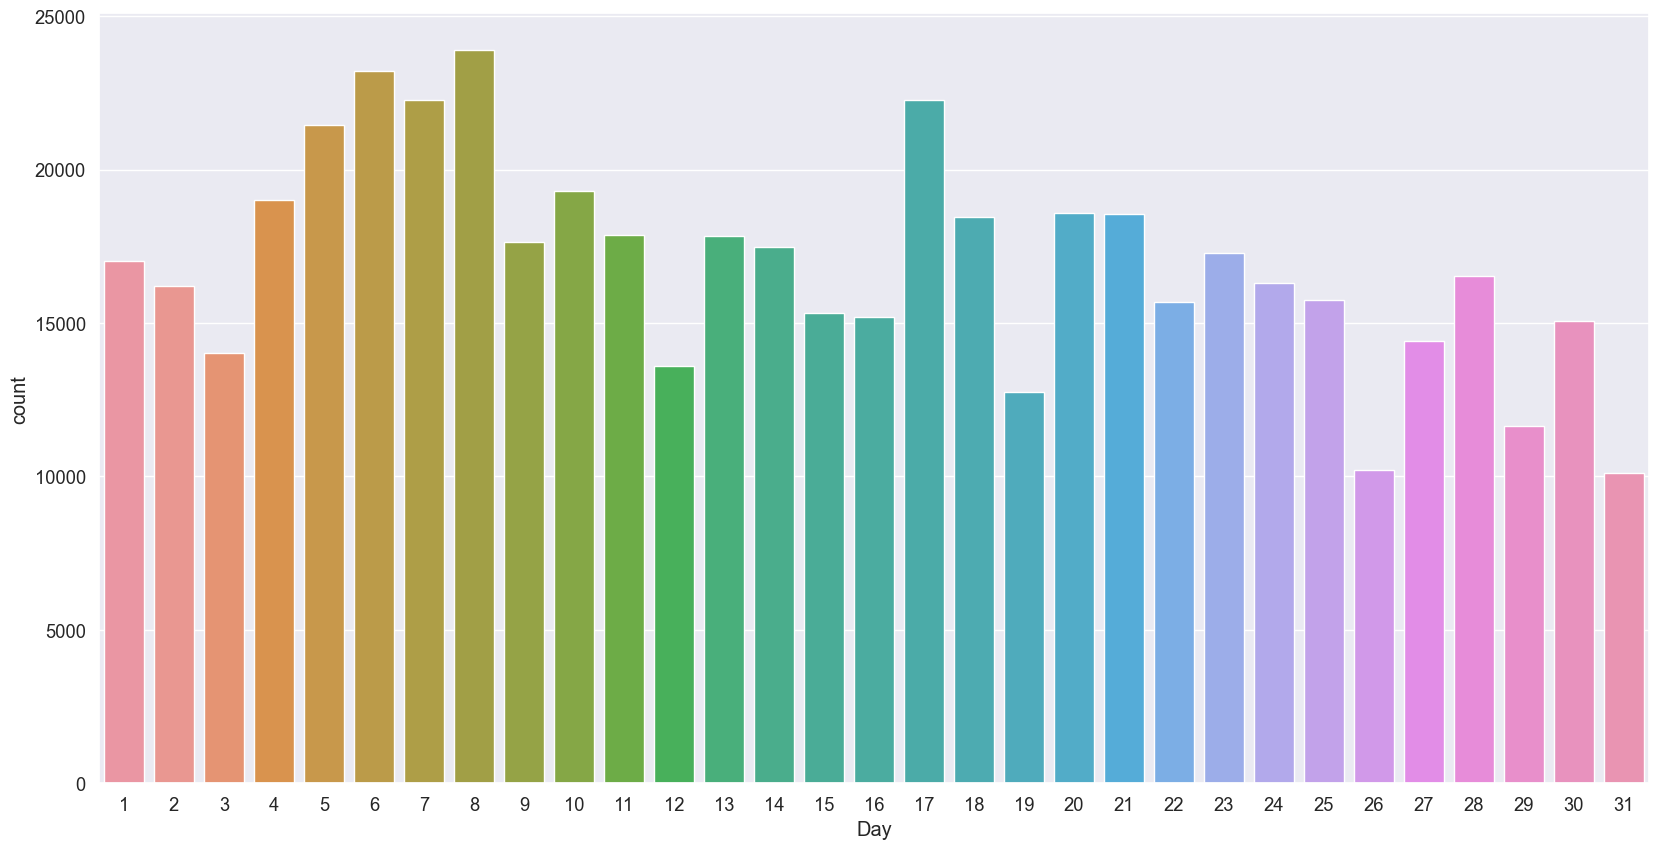

In [289]:
sns.countplot(df['Day'])

** Checking the transcations during month per quarter **

<AxesSubplot:xlabel='Day', ylabel='count'>

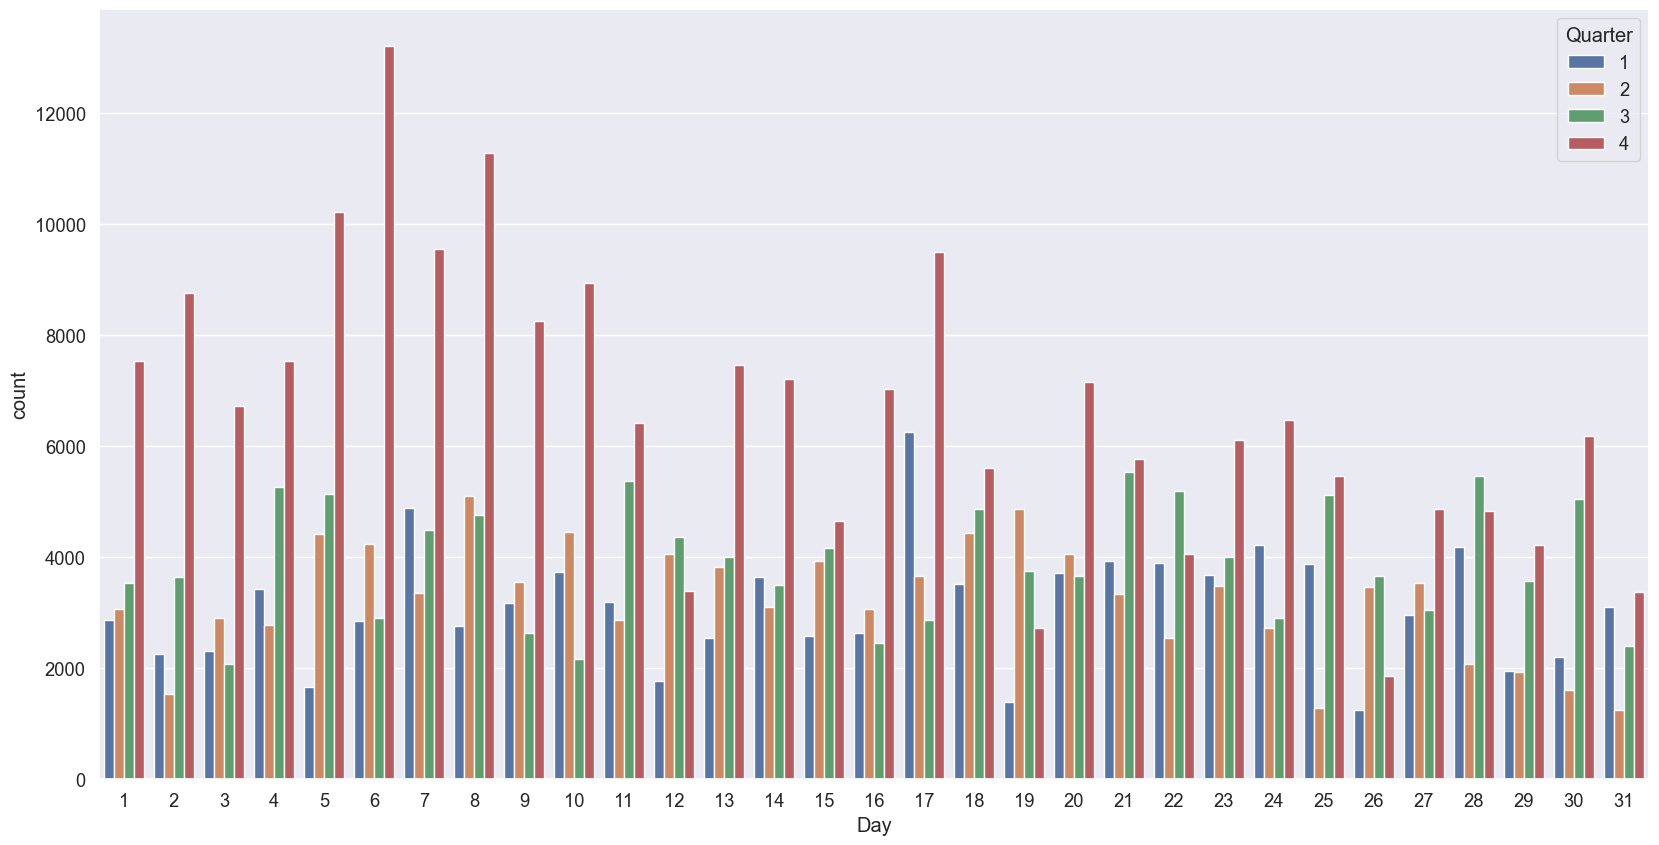

In [290]:
sns.countplot(df['Day'] , hue = df['Quarter'])

In [291]:
df['Dayofyear'].unique()

array([335, 336, 337, 339, 340, 341, 342, 343, 344, 346, 347, 348, 349,
       350, 351, 353, 354, 355, 356, 357,   4,   5,   6,   7,   9,  10,
        11,  12,  13,  14,  16,  17,  18,  19,  20,  21,  23,  24,  25,
        26,  27,  28,  30,  31,  32,  33,  34,  35,  37,  38,  39,  40,
        41,  42,  44,  45,  46,  47,  48,  49,  51,  52,  53,  54,  55,
        56,  58,  59,  60,  61,  62,  63,  65,  66,  67,  68,  69,  70,
        72,  73,  74,  75,  76,  77,  79,  80,  81,  82,  83,  84,  86,
        87,  88,  89,  90,  91,  93,  94,  95,  96,  97,  98, 100, 101,
       102, 103, 104, 105, 107, 108, 109, 110, 111, 116, 117, 118, 121,
       123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 135, 136, 137,
       138, 139, 140, 142, 143, 144, 145, 146, 147, 149, 151, 152, 153,
       154, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168,
       170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 184,
       185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 19

<AxesSubplot:xlabel='Dayofyear', ylabel='count'>

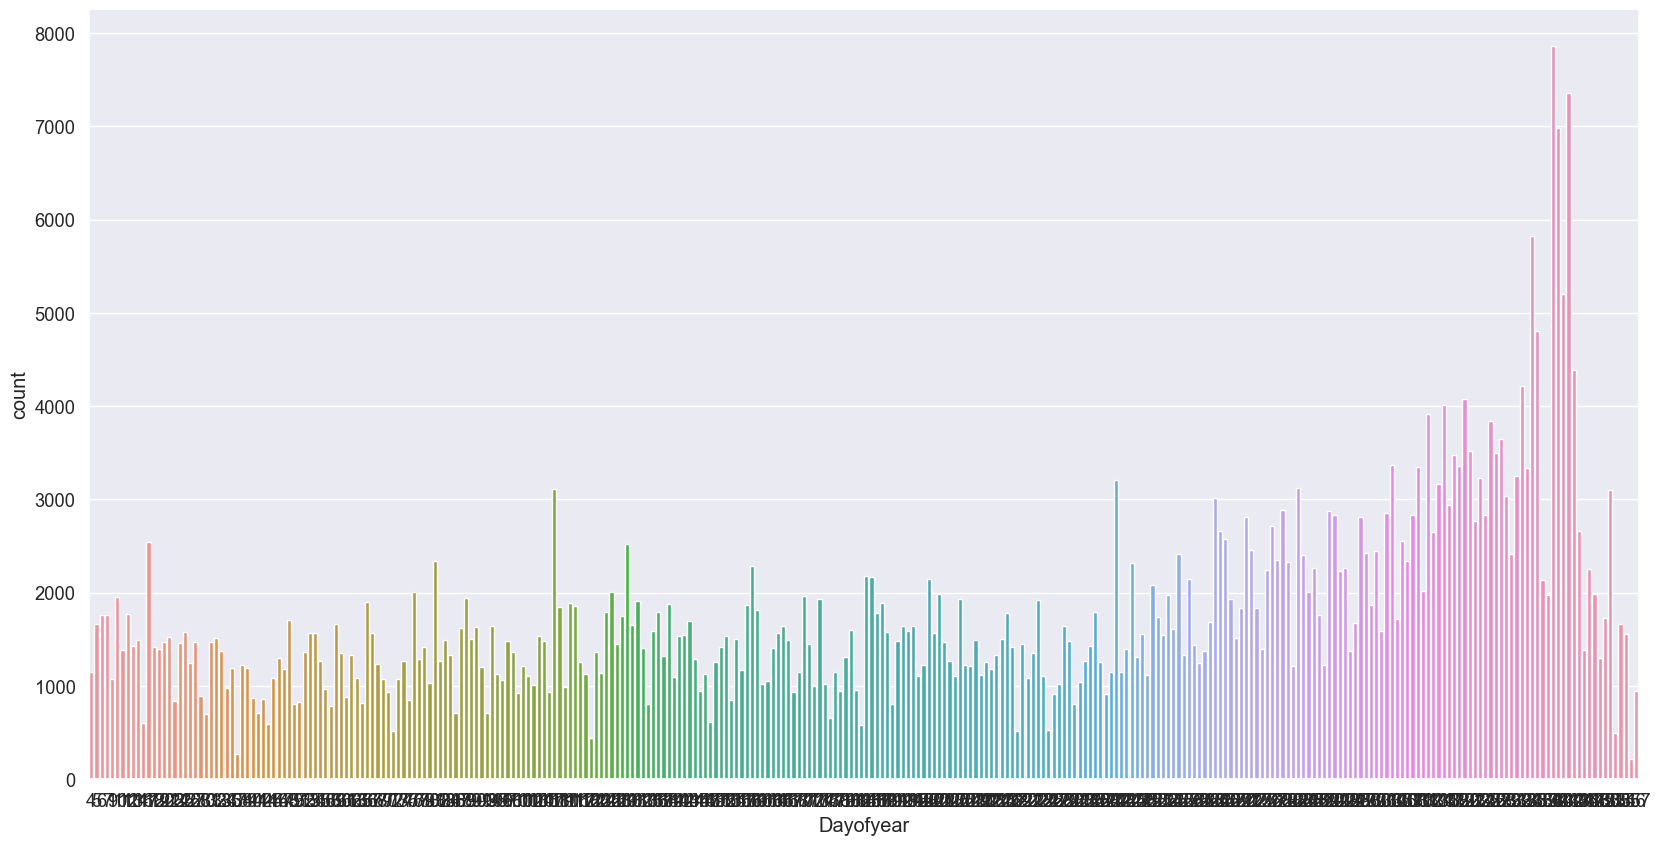

In [292]:
sns.set(rc={'figure.figsize': [20, 10]}, font_scale=1.2)
sns.countplot(df['Dayofyear'])

In [293]:
df['Month_Name'].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

<AxesSubplot:xlabel='Month_Name', ylabel='count'>

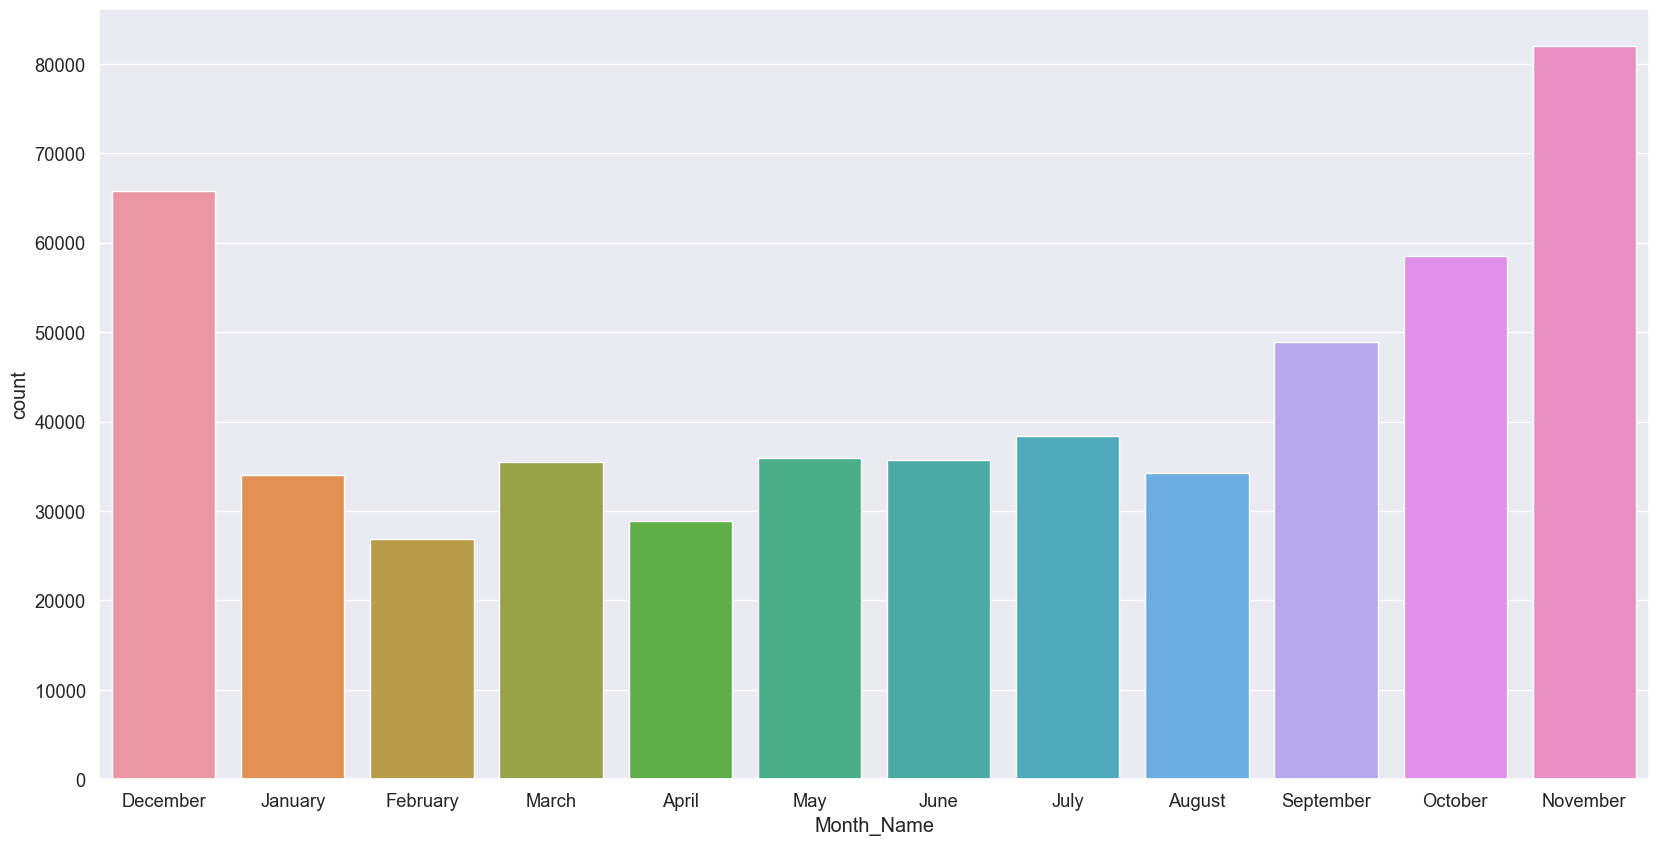

In [294]:
sns.countplot(df['Month_Name'])

** Checking transactions per month per year **

<AxesSubplot:xlabel='count', ylabel='Month_Name'>

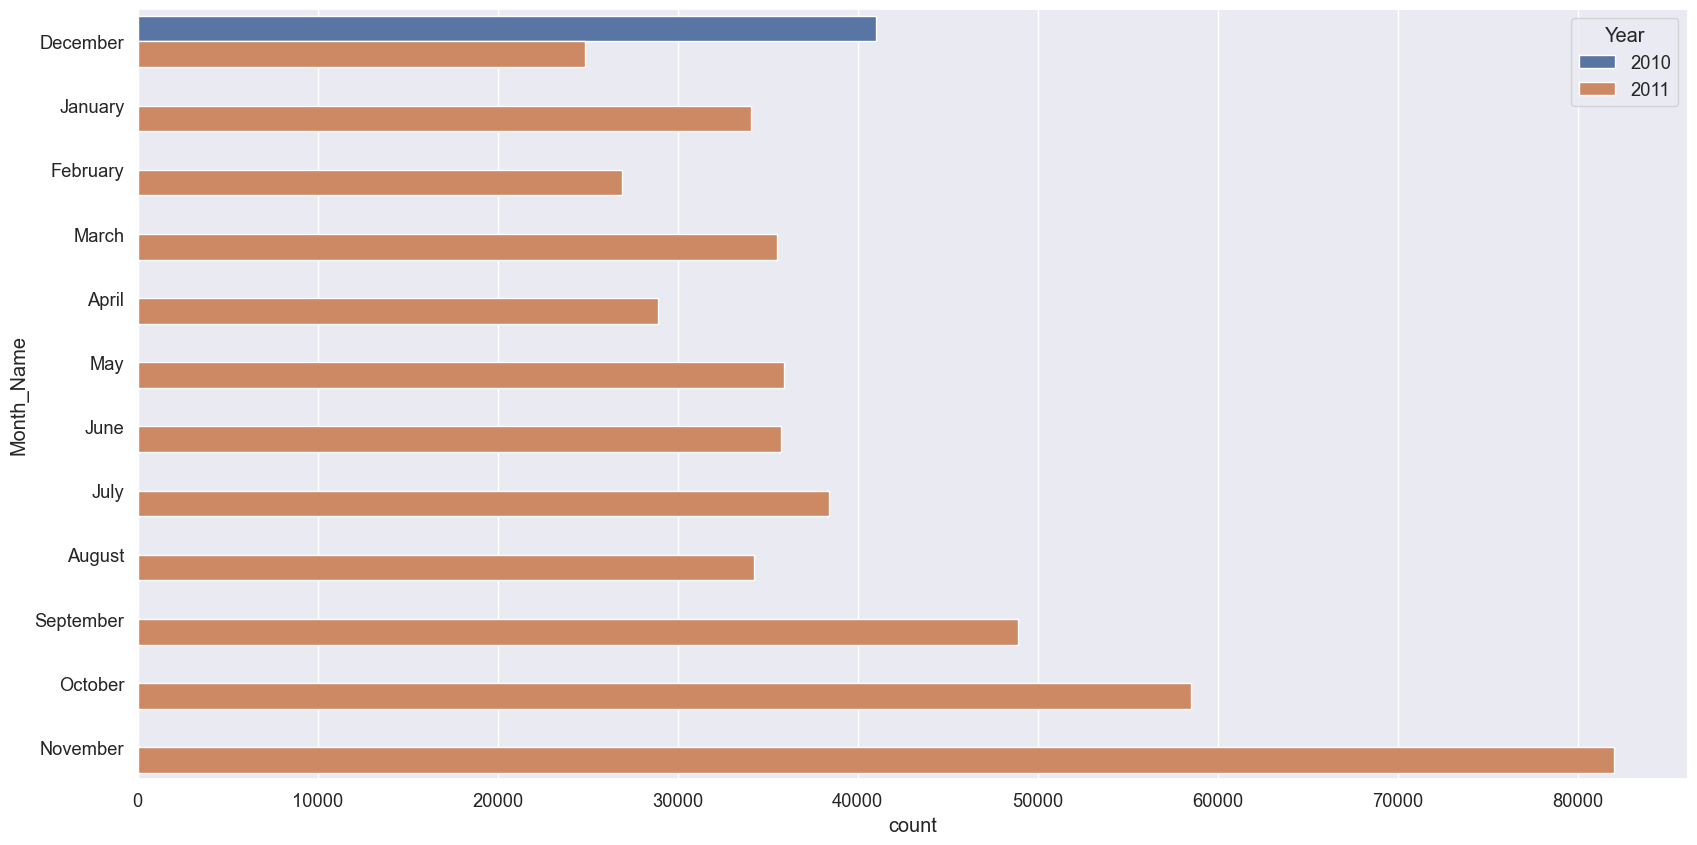

In [295]:
sns.countplot(data = df , y = 'Month_Name' , hue = 'Year')

** Checking the transaction per month per quarter **

<AxesSubplot:xlabel='count', ylabel='Month_Name'>

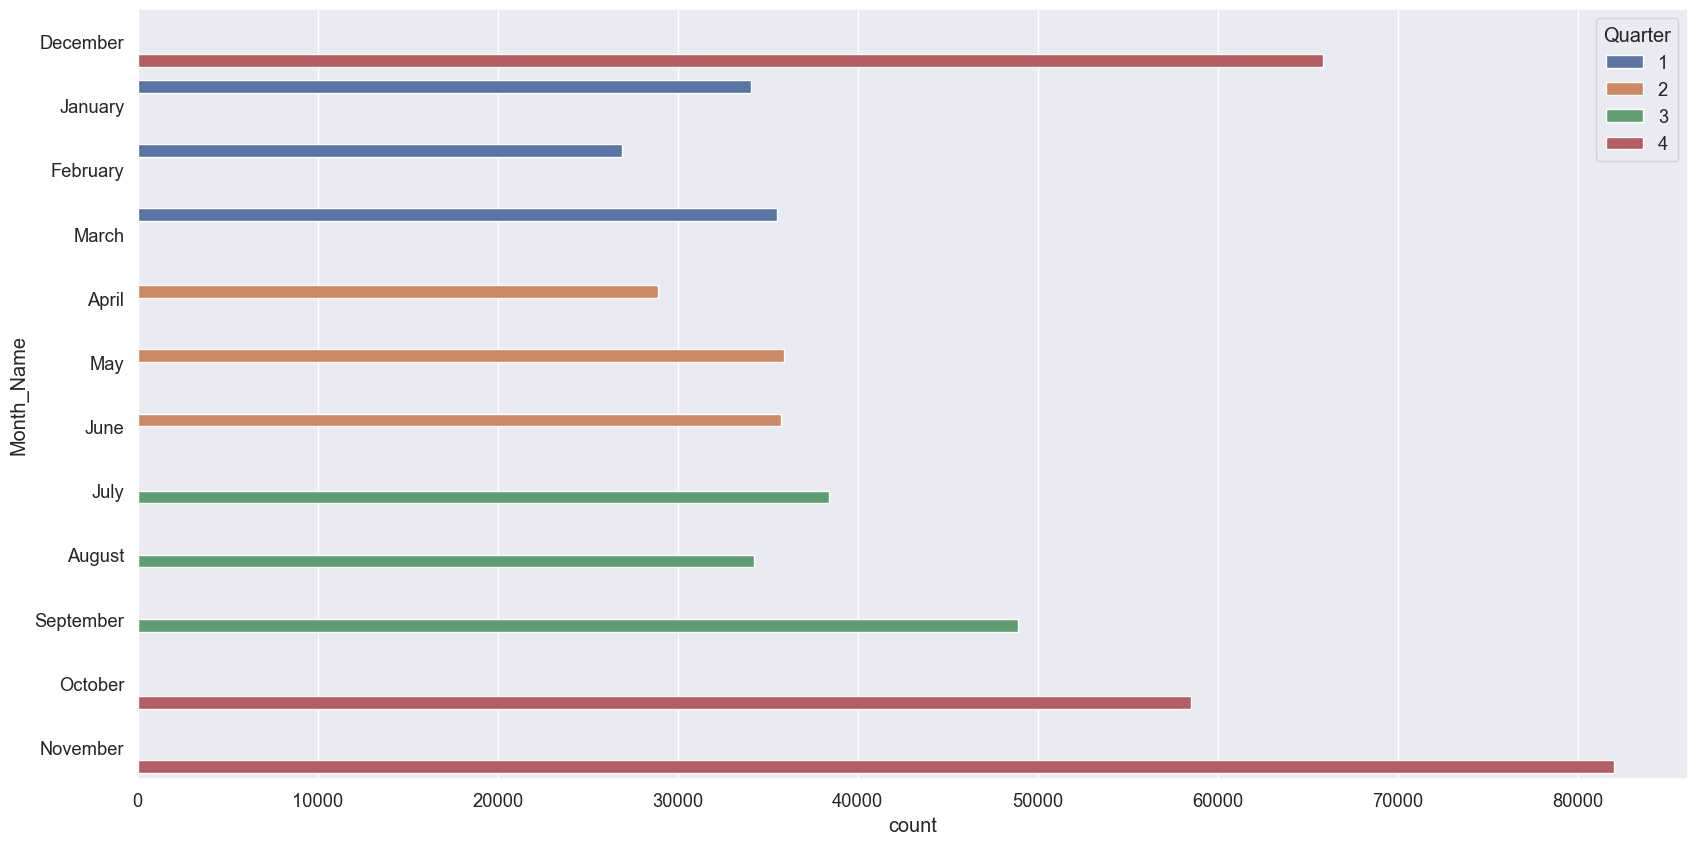

In [296]:
sns.countplot(data = df , y = 'Month_Name' , hue = 'Quarter')

In [297]:
df['Day_Name'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

** Which Day_Name has the highest transaction over all the two years ? **

<AxesSubplot:xlabel='Day_Name', ylabel='count'>

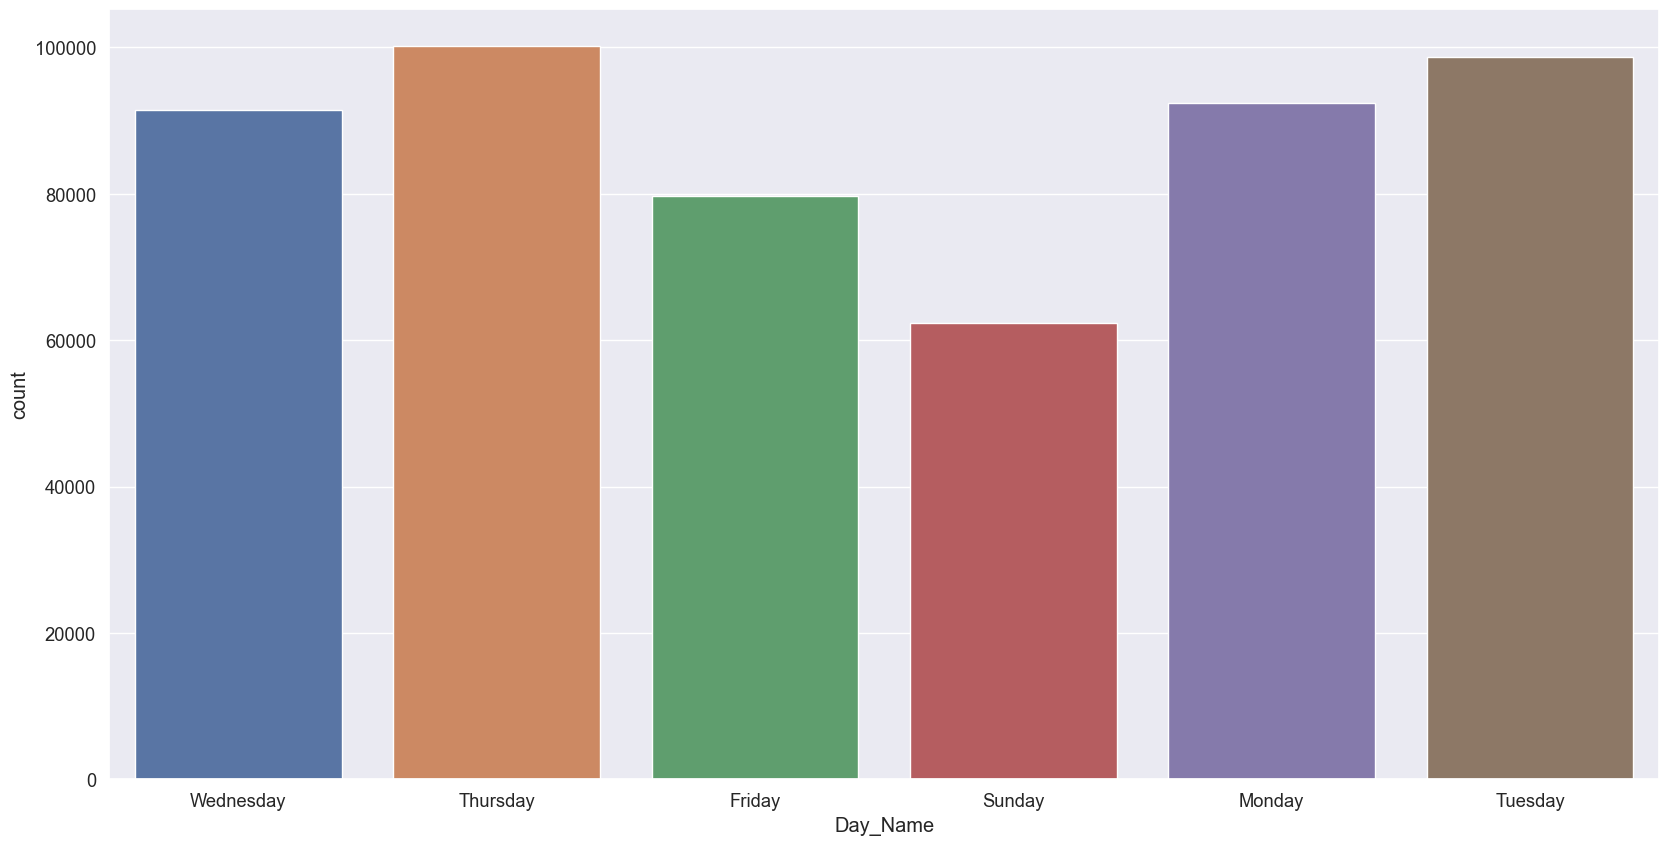

In [298]:
sns.countplot(df['Day_Name'])

** Checking the transaction in every day per month **

<AxesSubplot:xlabel='count', ylabel='Month_Name'>

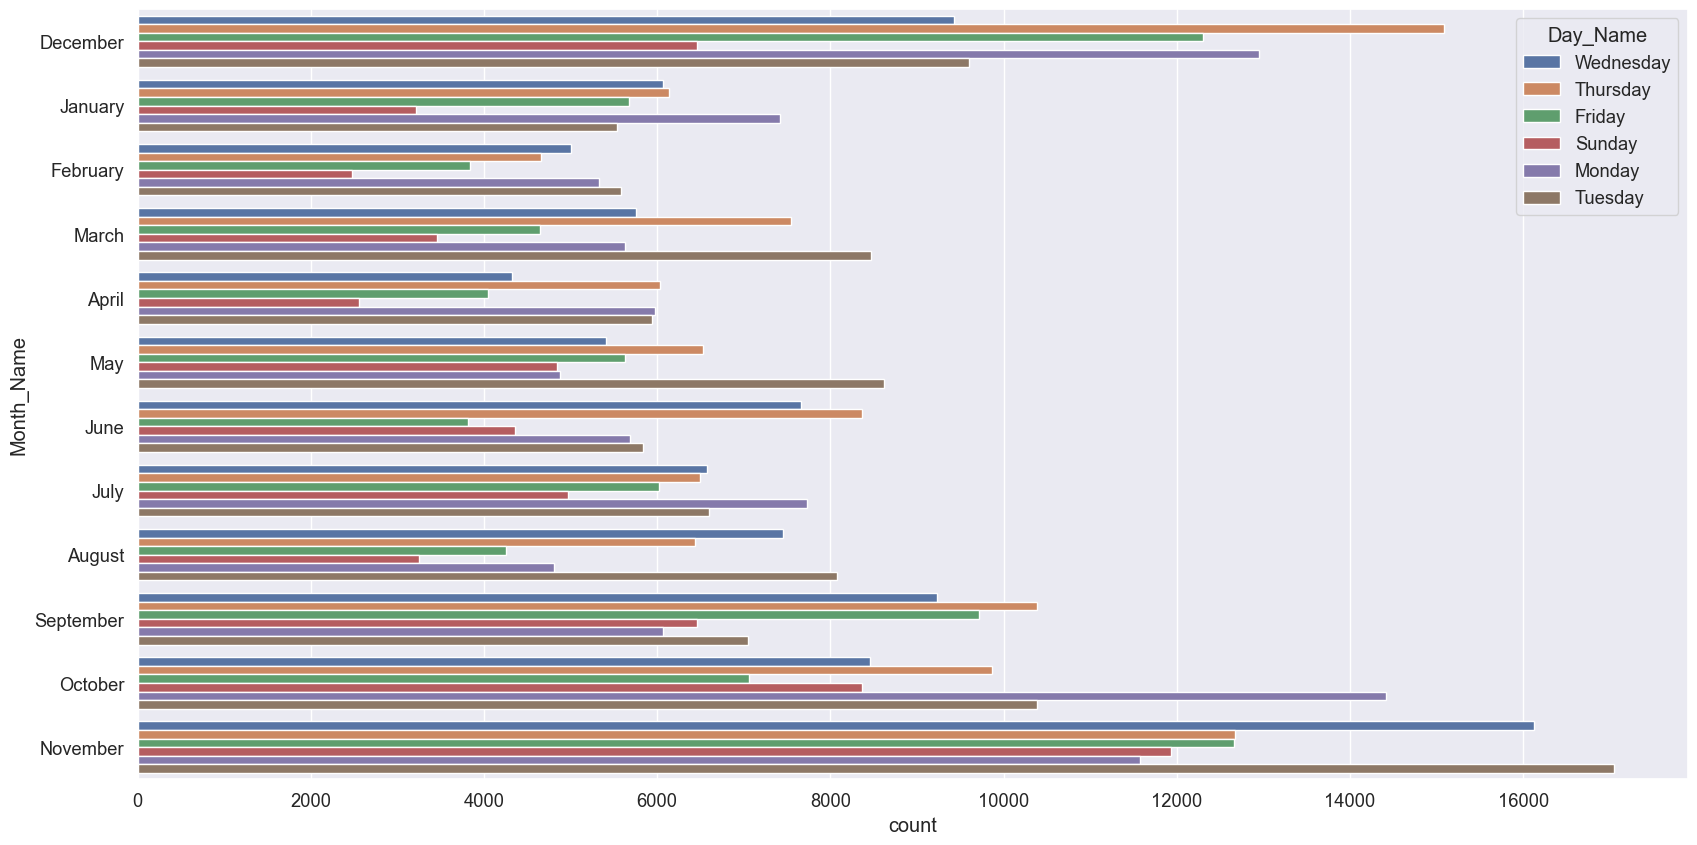

In [299]:
sns.countplot(data = df , y = 'Month_Name' , hue = 'Day_Name')

In [300]:
df['Hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6],
      dtype=int64)

<AxesSubplot:xlabel='Hour', ylabel='count'>

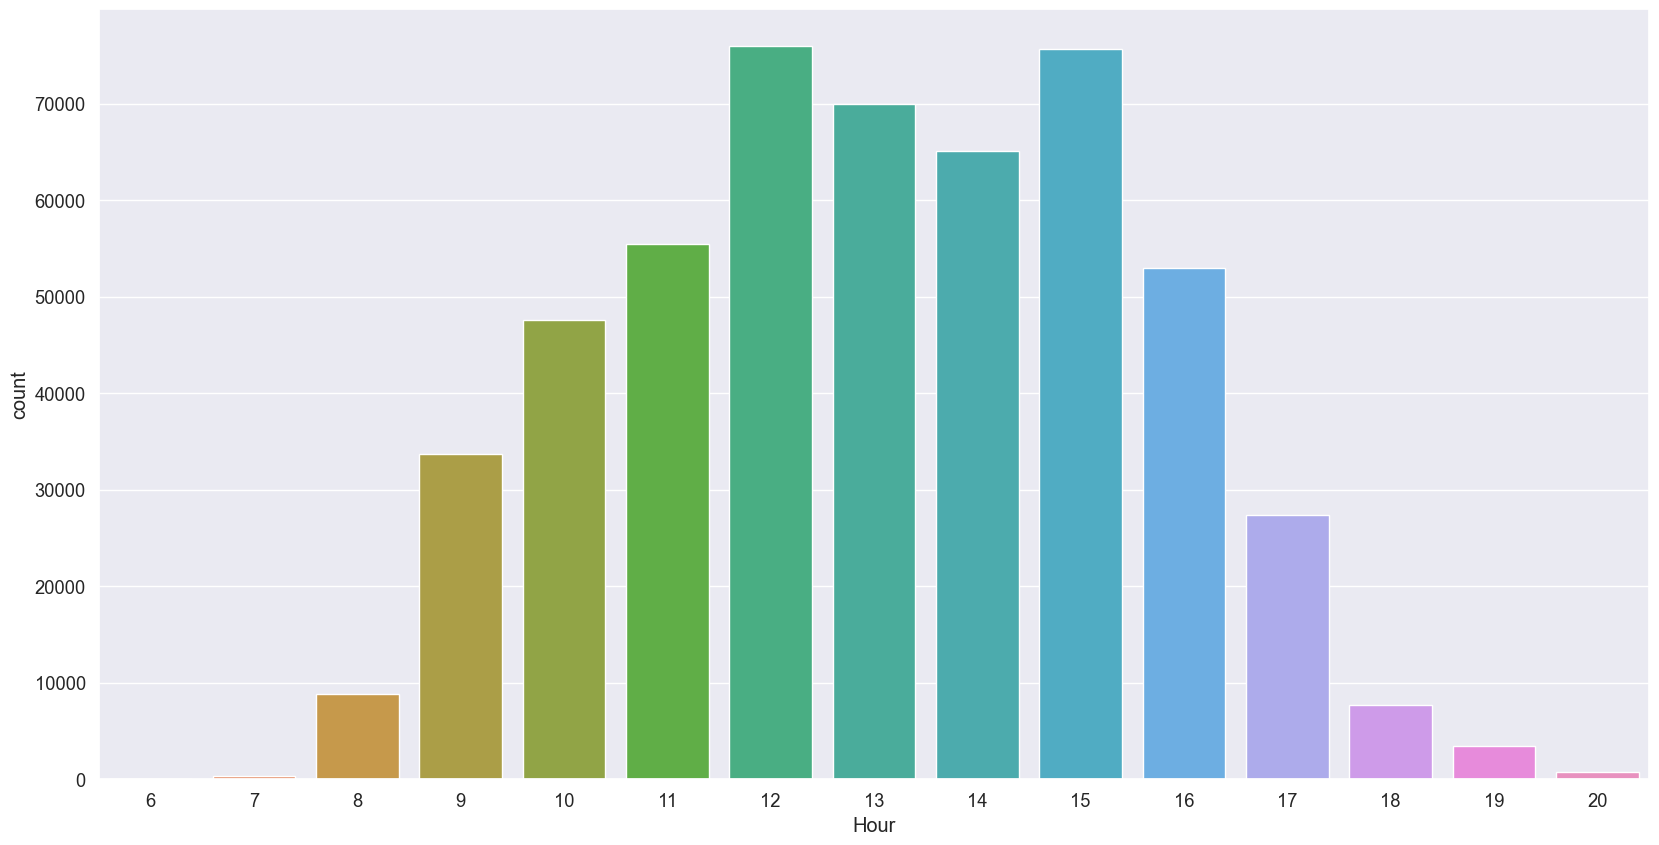

In [301]:
sns.countplot(df['Hour'])

** Checking highest transaction per hour per day **

<AxesSubplot:xlabel='Hour', ylabel='count'>

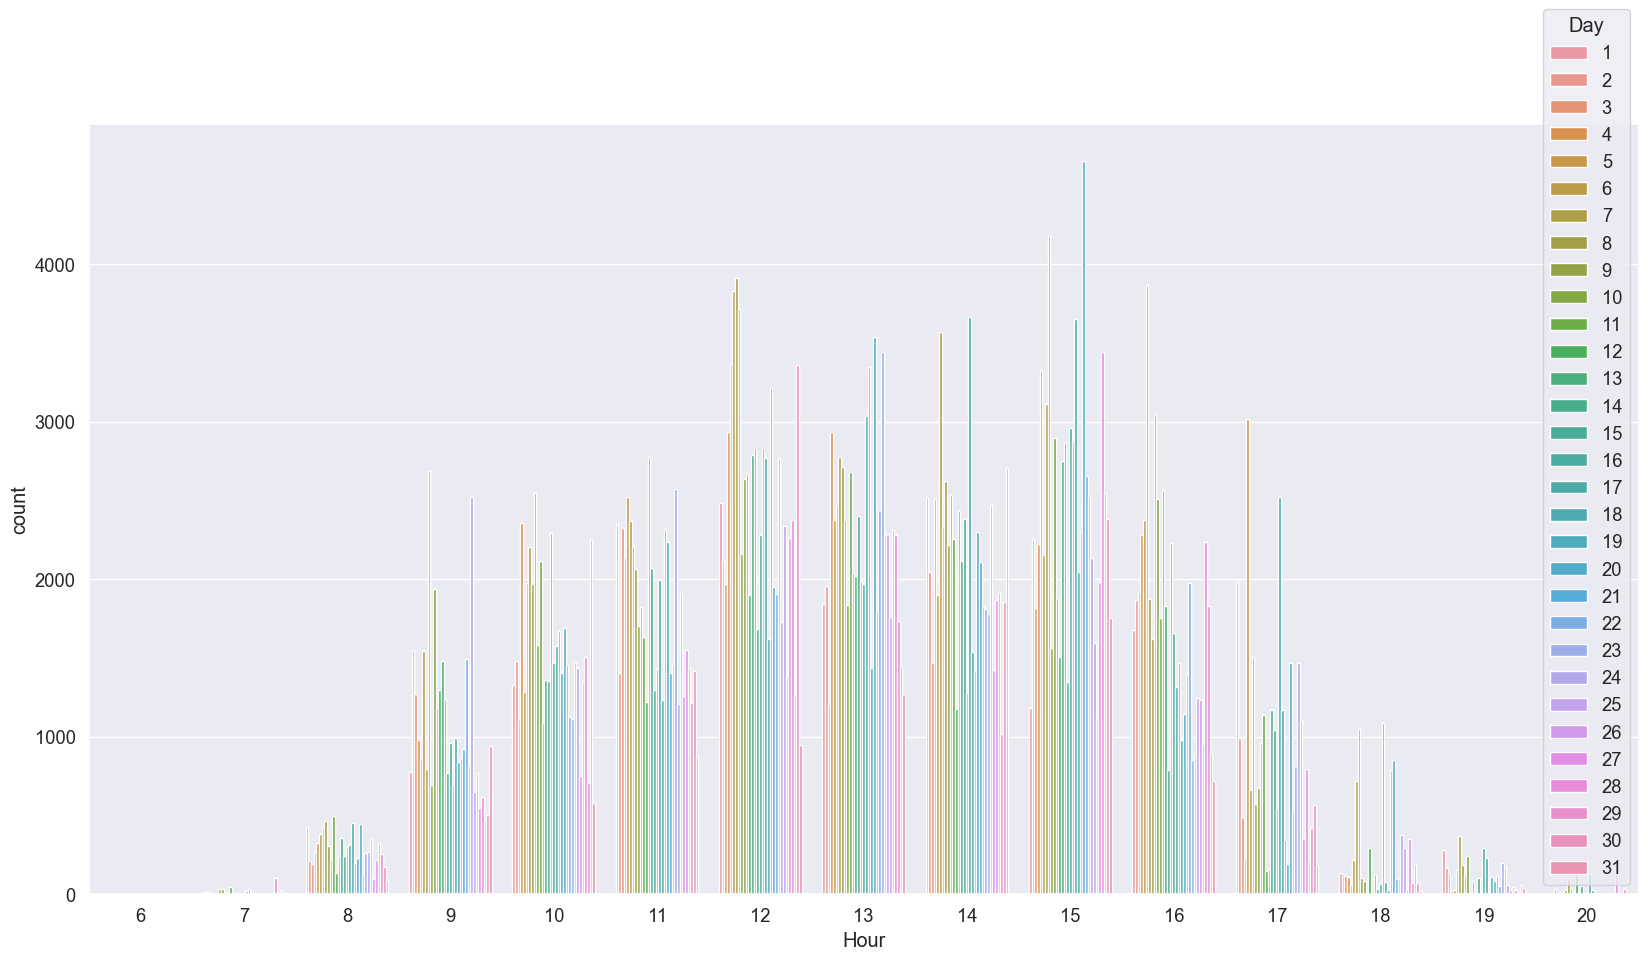

In [302]:
sns.countplot(df['Hour'] , hue = df['Day'])

In [303]:
df['Minute'].unique()

array([26, 28, 34, 35, 45,  0,  1,  2,  9, 32, 37, 41, 53, 56, 57, 58, 59,
        3, 19, 29, 39, 47, 51, 52, 21, 22, 27, 33, 49,  8, 12, 15, 23, 31,
       36, 38, 40, 43, 48, 50, 54,  4, 17, 20, 24,  5, 11,  6, 46, 13, 16,
       25, 42, 44, 10, 18, 55,  7, 14, 30], dtype=int64)

In [304]:

df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

<AxesSubplot:xlabel='Season', ylabel='count'>

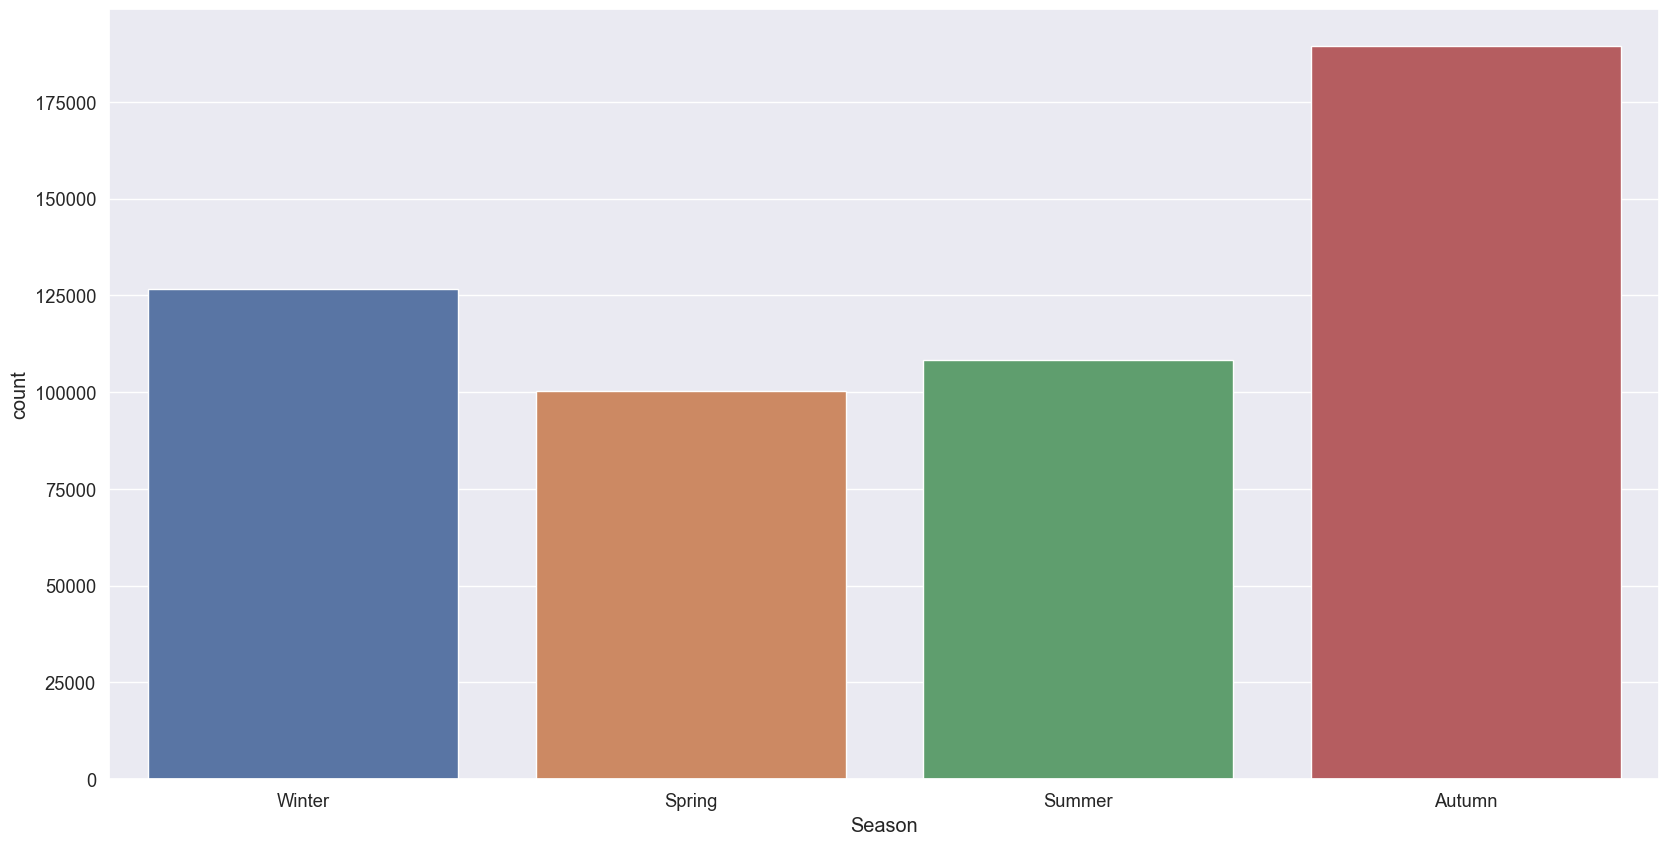

In [305]:

sns.countplot(df['Season'])

** Which season has highest transaction per year ? **

<AxesSubplot:xlabel='Season', ylabel='count'>

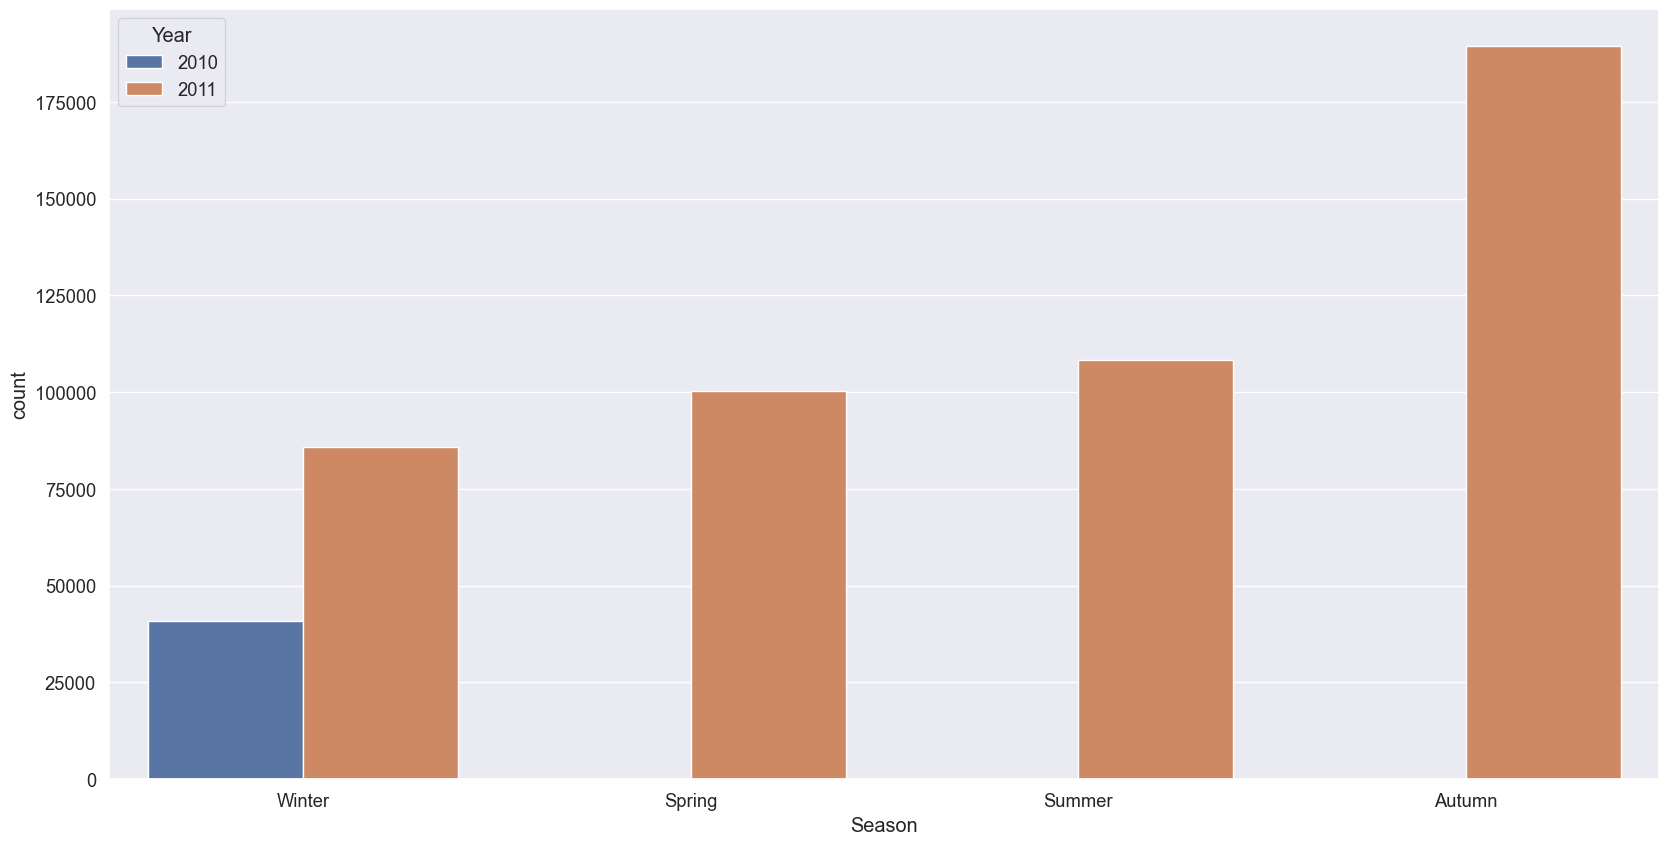

In [306]:
sns.countplot(df['Season'] , hue = df['Year'])

** Which season has highest transaction per quarter ? **

<AxesSubplot:xlabel='Season', ylabel='count'>

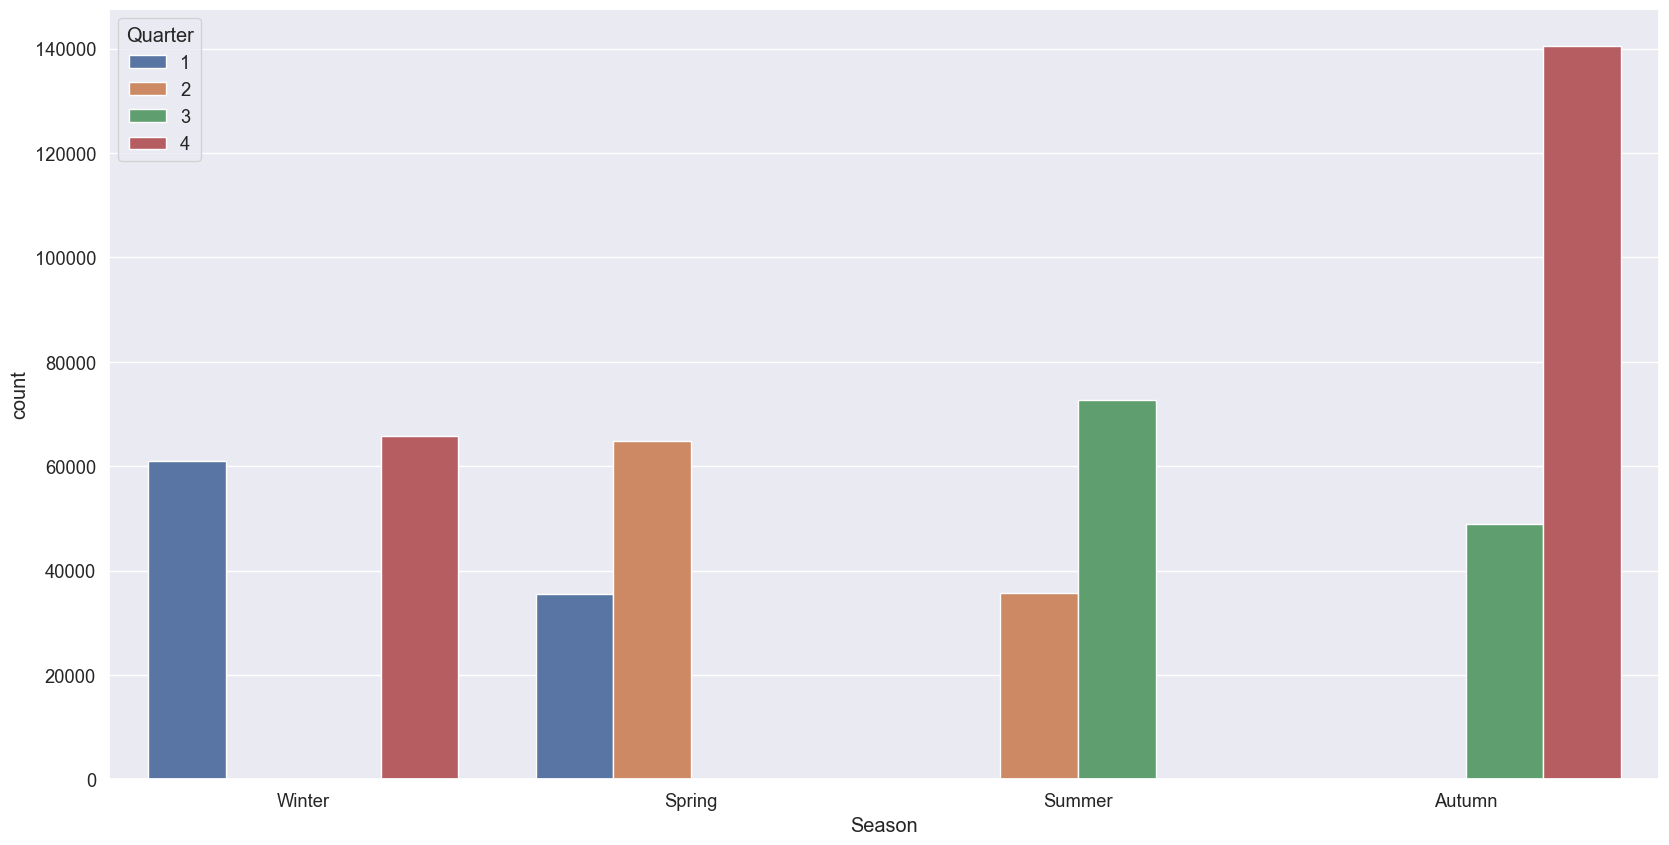

In [307]:
sns.countplot(df['Season'] , hue = df['Quarter'])

In [308]:
df['Period'].unique()

array(['morning', 'afternoon', 'evening'], dtype=object)

<AxesSubplot:xlabel='Period', ylabel='count'>

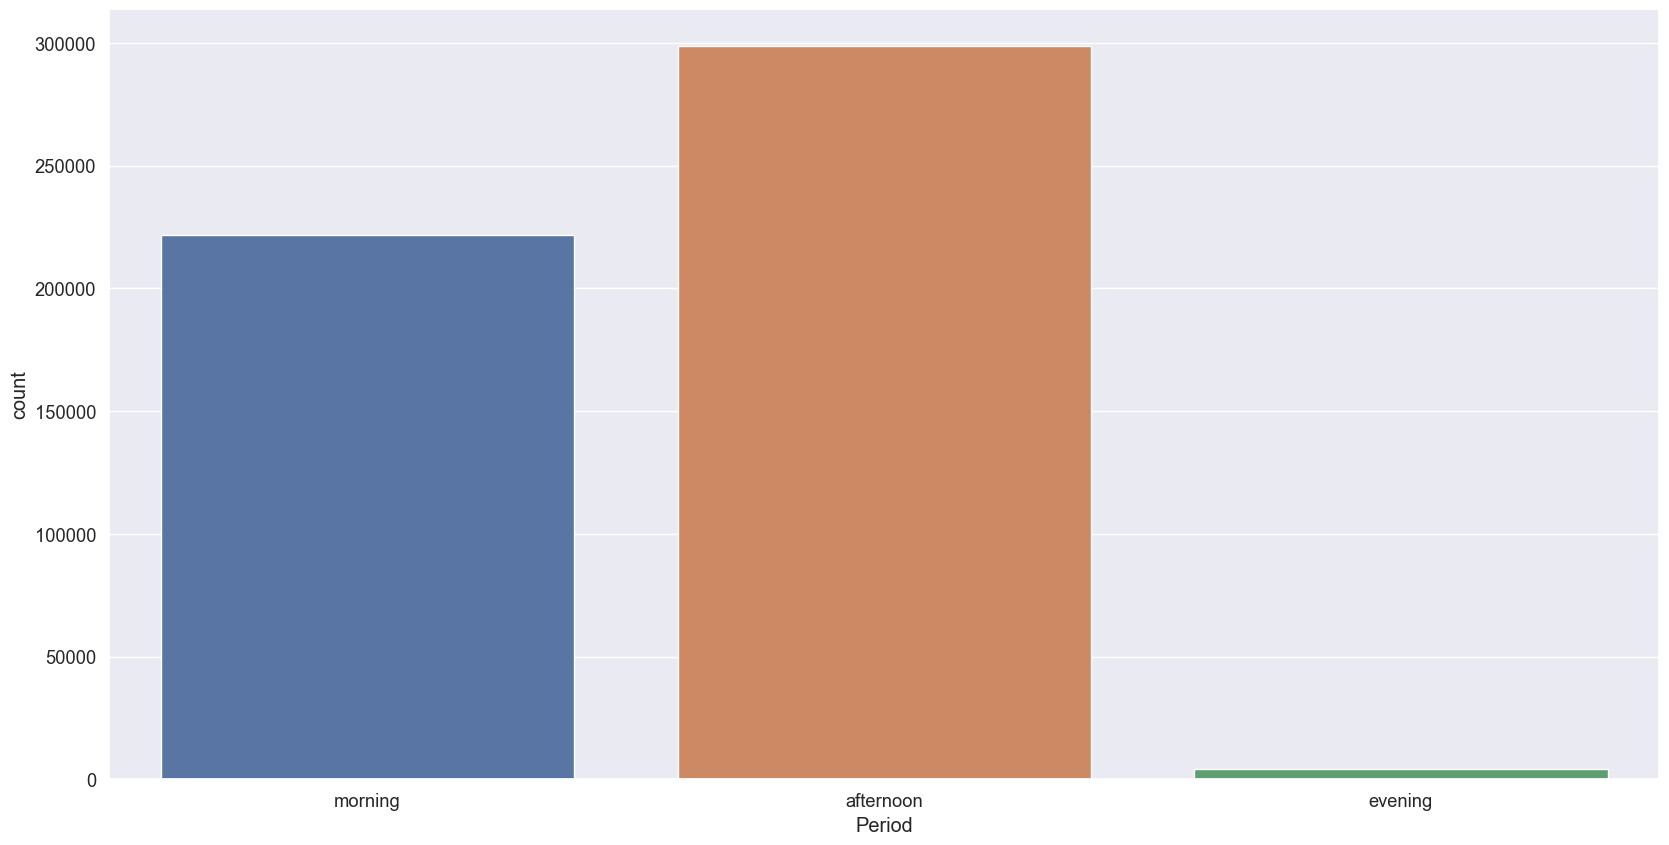

In [309]:
sns.countplot(df['Period'])

** During the week, Which period has the highest number of transactions ? **

<AxesSubplot:xlabel='Day_Name', ylabel='count'>

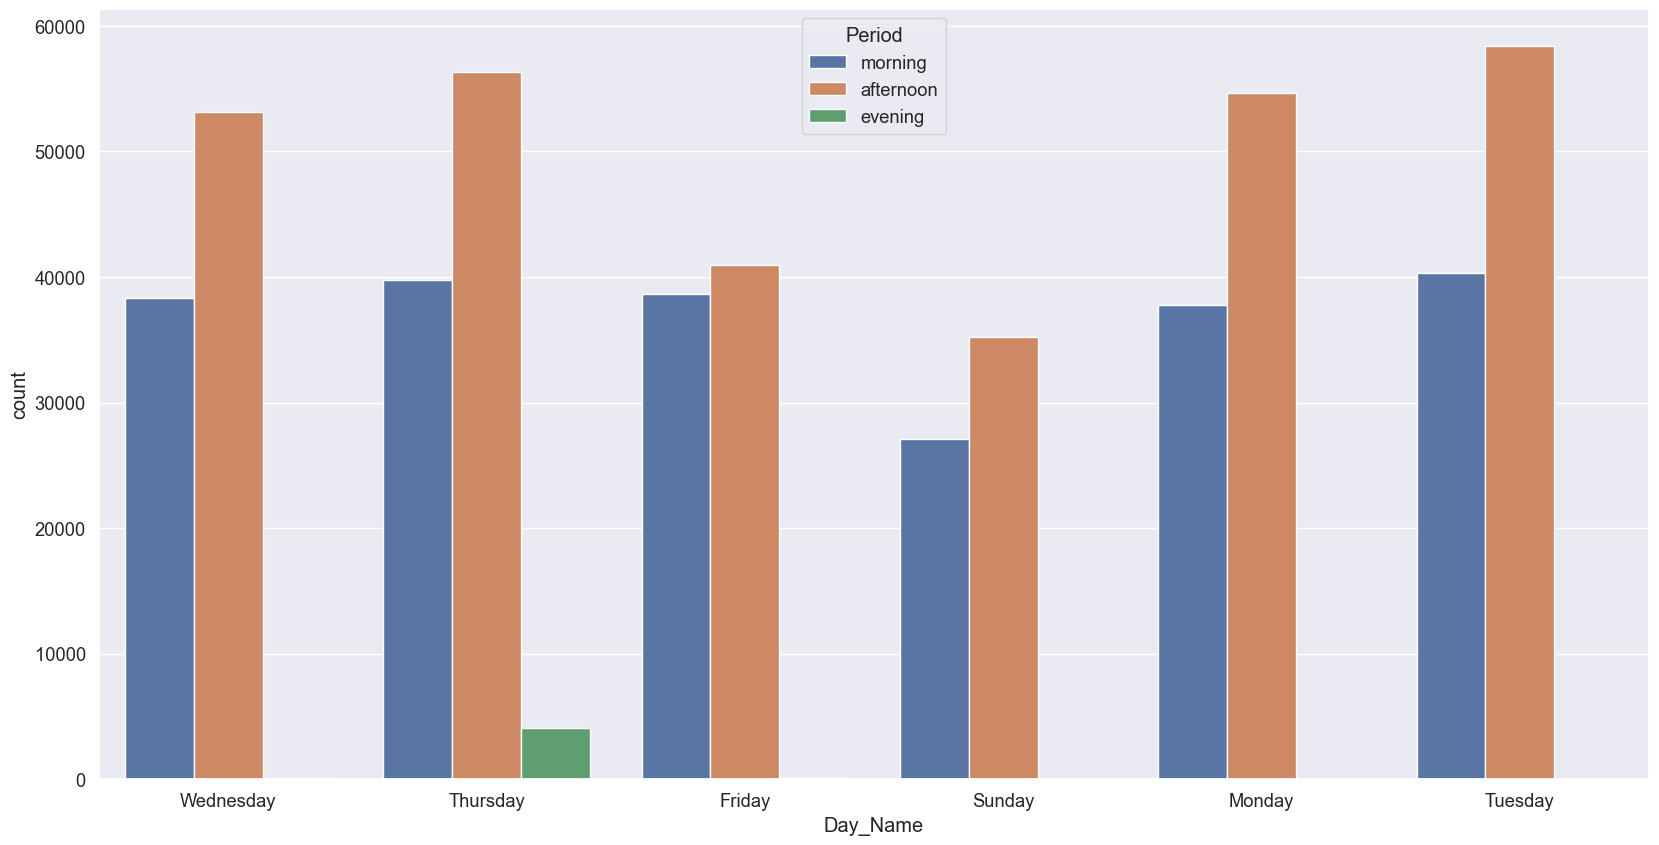

In [310]:
sns.countplot(df['Day_Name'] , hue = df['Period'])

** During the month, Which period has the highest number of transactions ? **

<AxesSubplot:xlabel='Day', ylabel='count'>

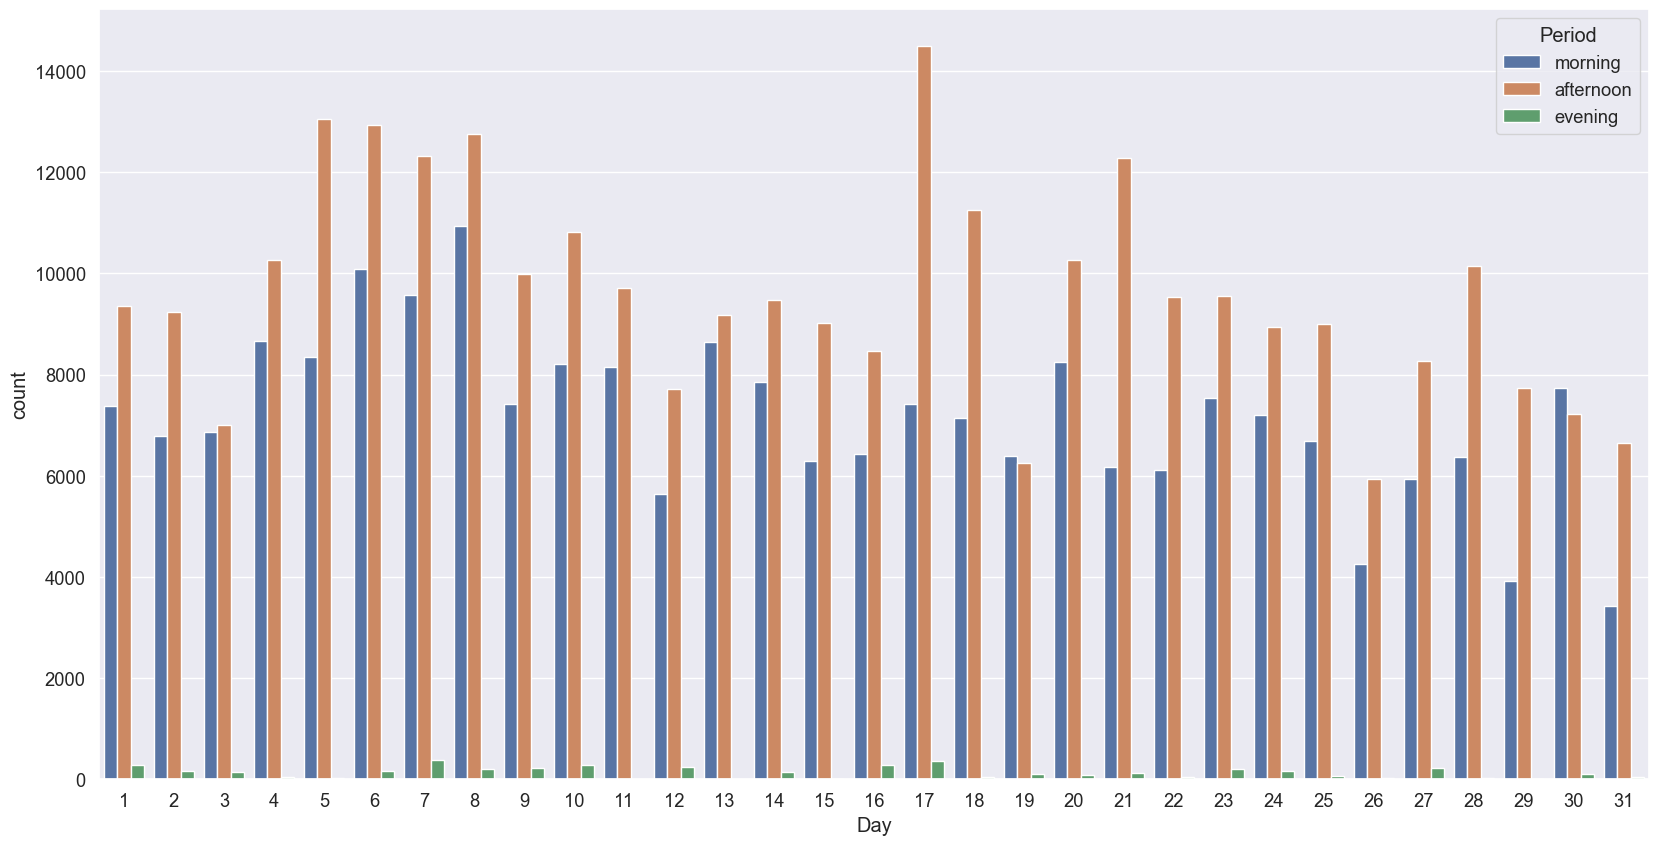

In [311]:
sns.countplot(df['Day'] , hue = df['Period'])

** How many stocks have been sold in 2010 & 2011 with the total prices ? **

In [312]:
df[df['Year'] == 2010]['StockCode'].count()

40991

In [313]:
df[df['Year'] == 2010].sum()['TotalPrice']

821452.73

In [314]:
df[df['Year'] == 2011]['StockCode'].count()

483887

In [315]:
df[df['Year'] == 2011]['TotalPrice'].sum()

9820658.074000001

In [316]:
Years = []
Stocks = []
Prices = []

for i in df.Year.unique():
    Years.append(i)
    Stocks.append(df[df['Year'] == i]['StockCode'].count())
    Prices.append(df[df['Year'] == i]['TotalPrice'].sum())
    
print('Years: ' , Years)
print('Number of Stocks: ' , Stocks)
print('Total prices of all the stocks in the two years: ' , Prices)
    

Years:  [2010, 2011]
Number of Stocks:  [40991, 483887]
Total prices of all the stocks in the two years:  [821452.73, 9820658.074000001]


<AxesSubplot:>

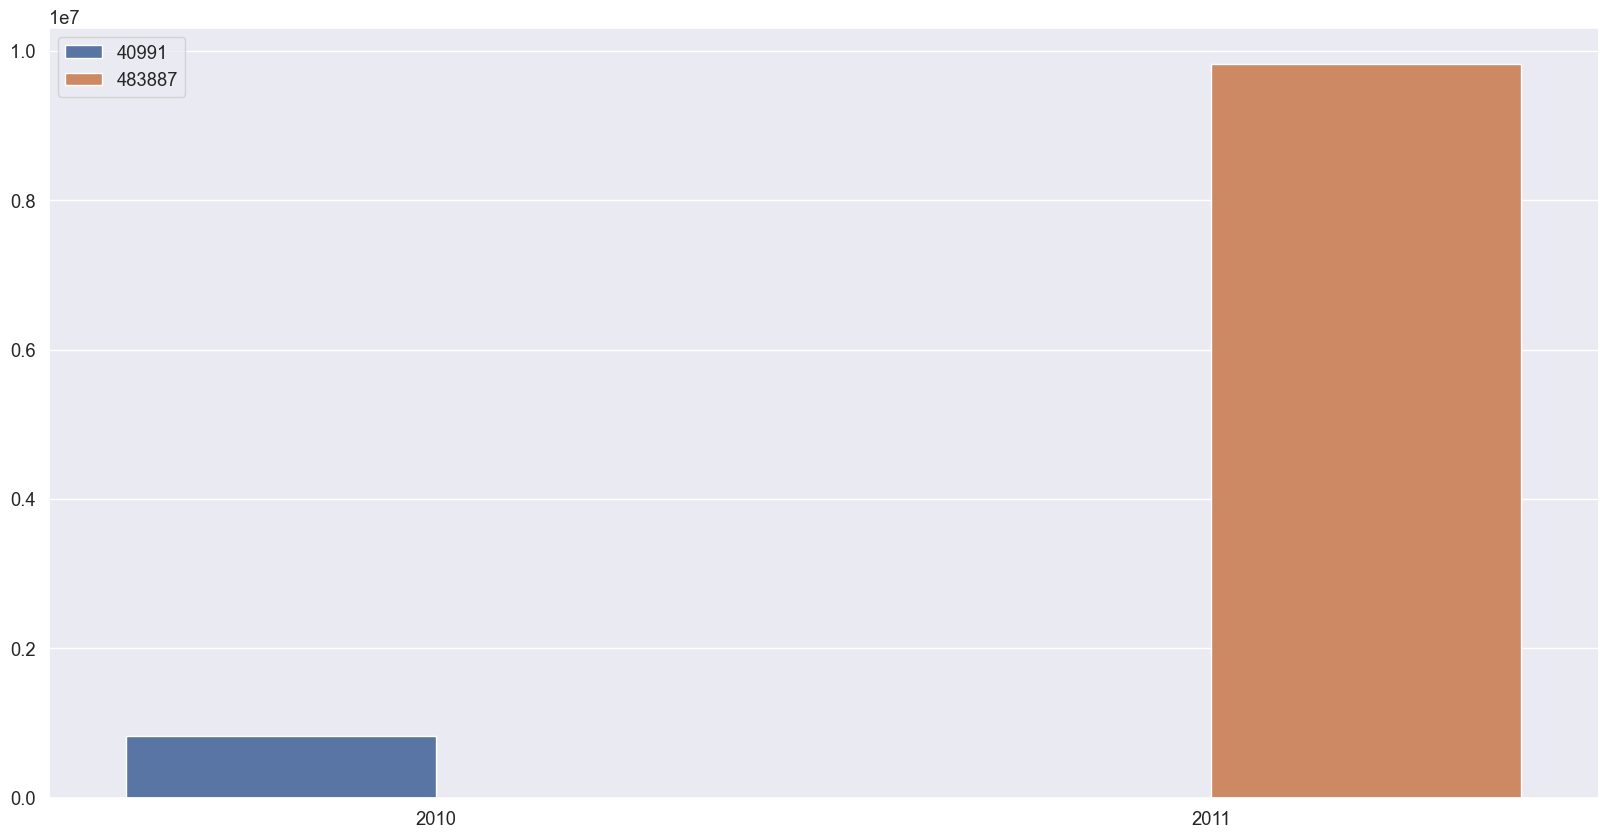

In [317]:
sns.barplot(data = df , x = Years , y = Prices , hue = Stocks)

** Checking the 3 busiest day & the 3 busiest hour "most productive" in these days in March in 2011 **

Note: Busiest days/hours have the highest transactions.

In [318]:
df[df['Year'] == 2011]

InvoiceNo StockCode                      Description  Quantity  \
40991     539993     22386          JUMBO BAG PINK POLKADOT        10   
40992     539993     21499               BLUE POLKADOT WRAP        25   
40993     539993     21498              RED RETROSPOT WRAP         25   
40994     539993     22379         RECYCLING BAG RETROSPOT          5   
40995     539993     20718        RED RETROSPOT SHOPPER BAG        10   
...          ...       ...                              ...       ...   
524873    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
40991  2011-01-04 10:00:00       1.95      13313  United Kingdom       19.50   
40992  2011-01-04 10:00:00       0.42      13313  United Kingdom       10.50   
40993  2011-01-04 10:00:00       0.42      13313  United Kingdom       10.50   
40994  2011-01-04 10:00:00       2.10      13313  United Kingdom       10.50   
40995  2011-01-04 10:00:00       1.25      13313  United Kingdom       12.50   
...                    ...        ...        ...             ...         ...   
524873 2011-12-09 12:50:00       0.85      12680          France       10.20   
524874 2011-12-09 12:50:00       2.10      12680          France       12.60   
524875 2011-12-09 12:50:00       4.15      12680          France       16.60   
524876 2011-12-09 12:50:00       4.15      12680          France       16.60   
524877 2011-12-09 12:50:00       4.95      12680          France       14.85   

        Year  ...  Week  Weekday  Day  Dayofyear  Month_Name  Day_Name Hour  \
40991   2011  ...     1        1    4          4     January   Tuesday   10   
40992   2011  ...     1        1    4          4     January   Tuesday   10   
40993   2011  ...     1        1    4          4     January   Tuesday   10   
40994   2011  ...     1        1    4          4     January   Tuesday   10   
40995   2011  ...     1        1    4          4     January   Tuesday   10   
...      ...  ...   ...      ...  ...        ...         ...       ...  ...   
524873  2011  ...    49        4    9        343    December    Friday   12   
524874  2011  ...    49        4    9        343    December    Friday   12   
524875  2011  ...    49        4    9        343    December    Friday   12   
524876  2011  ...    49        4    9        343    December    Friday   12   
524877  2011  ...    49        4    9        343    December    Friday   12   

       Minute  Season   Period  
40991       0  Winter  morning  
40992       0  Winter  morning  
40993       0  Winter  morning  
40994       0  Winter  morning  
40995       0  Winter  morning  
...       ...     ...      ...  
524873     50  Winter  morning  
524874     50  Winter  morning  
524875     50  Winter  morning  
524876     50  Winter  morning  
524877     50  Winter  morning  

[483887 rows x 22 columns]

In [319]:
df[df['Year'] == 2011]['Month_Name']

40991      January
40992      January
40993      January
40994      January
40995      January
            ...   
524873    December
524874    December
524875    December
524876    December
524877    December
Name: Month_Name, Length: 483887, dtype: object

In [320]:
df9 = df[(df['Year'] == 2011) & (df['Month_Name'] == 'March')]

In [321]:
df9

InvoiceNo StockCode                          Description  Quantity  \
101933    545220     21955    DOORMAT UNION JACK GUNS AND ROSES         2   
101934    545220     48194                       DOORMAT HEARTS         2   
101935    545220     22556       PLASTERS IN TIN CIRCUS PARADE         12   
101936    545220     22139     RETROSPOT TEA SET CERAMIC 11 PC          3   
101937    545220    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         4   
...          ...       ...                                  ...       ...   
137425    548548     22423             REGENCY CAKESTAND 3 TIER         1   
137426    548548     21361             LOVE LARGE WOOD LETTERS          7   
137427    548549     84763        ZINC FINISH 15CM PLANTER POTS       100   
137428    548549     22222            CAKE PLATE LOVEBIRD WHITE         1   
137429    548549     22776          SWEETHEART CAKESTAND 3 TIER         1   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
101933 2011-03-01 08:30:00       7.95      14620  United Kingdom       15.90   
101934 2011-03-01 08:30:00       7.95      14620  United Kingdom       15.90   
101935 2011-03-01 08:30:00       1.65      14620  United Kingdom       19.80   
101936 2011-03-01 08:30:00       4.95      14620  United Kingdom       14.85   
101937 2011-03-01 08:30:00       3.75      14620  United Kingdom       15.00   
...                    ...        ...        ...             ...         ...   
137425 2011-03-31 19:54:00      12.75      17781  United Kingdom       12.75   
137426 2011-03-31 19:54:00      12.75      17781  United Kingdom       89.25   
137427 2011-03-31 19:55:00       1.06      16365  United Kingdom      106.00   
137428 2011-03-31 19:55:00       4.95      16365  United Kingdom        4.95   
137429 2011-03-31 19:55:00       9.95      16365  United Kingdom        9.95   

        Year  ...  Week  Weekday  Day  Dayofyear  Month_Name  Day_Name Hour  \
101933  2011  ...     9        1    1         60       March   Tuesday    8   
101934  2011  ...     9        1    1         60       March   Tuesday    8   
101935  2011  ...     9        1    1         60       March   Tuesday    8   
101936  2011  ...     9        1    1         60       March   Tuesday    8   
101937  2011  ...     9        1    1         60       March   Tuesday    8   
...      ...  ...   ...      ...  ...        ...         ...       ...  ...   
137425  2011  ...    13        3   31         90       March  Thursday   19   
137426  2011  ...    13        3   31         90       March  Thursday   19   
137427  2011  ...    13        3   31         90       March  Thursday   19   
137428  2011  ...    13        3   31         90       March  Thursday   19   
137429  2011  ...    13        3   31         90       March  Thursday   19   

       Minute  Season   Period  
101933     30  Spring  morning  
101934     30  Spring  morning  
101935     30  Spring  morning  
101936     30  Spring  morning  
101937     30  Spring  morning  
...       ...     ...      ...  
137425     54  Spring  evening  
137426     54  Spring  evening  
137427     55  Spring  evening  
137428     55  Spring  evening  
137429     55  Spring  evening  

[35497 rows x 22 columns]

In [322]:
df9['Day_Name'].value_counts().sort_values(ascending = False)[:3]

Tuesday      8469
Thursday     7542
Wednesday    5750
Name: Day_Name, dtype: int64

In [323]:
df9['Day_Name'].value_counts().sort_values(ascending = False)[:3].index

Index(['Tuesday', 'Thursday', 'Wednesday'], dtype='object')

In [324]:
df9['Day_Name'].value_counts().sort_values(ascending = False)[:1].index[0]

'Tuesday'

In [325]:
df9['Day_Name'].value_counts().sort_values(ascending = False)[:2].index[1]

'Thursday'

In [326]:
df9['Day_Name'].value_counts().sort_values(ascending = False)[:3].index[2]

'Wednesday'

In [327]:
df9[df9['Day_Name'] == 'Tuesday']['Hour'].value_counts().sort_values(ascending = False).idxmax()

15

In [328]:
df9[df9['Day_Name'] == 'Thursday']['Hour'].value_counts().sort_values(ascending = False).idxmax()

18

In [329]:
df9[df9['Day_Name'] == 'Wednesday']['Hour'].value_counts().sort_values(ascending = False).idxmax()

12

In [330]:
Busiest_days_in_March_2011 = []
Busiest_hour = []

for i in range(1,4):
    Busiest_days_in_March_2011.append(df9['Day_Name'].value_counts().sort_values(ascending = False)[:i].index[i-1])
for i in Busiest_days_in_March_2011:
    Busiest_hour.append(df9[df9['Day_Name'] == i]['Hour'].value_counts().sort_values(ascending = False).idxmax())

print('Busiest_days_in_March_2011: ' , Busiest_days_in_March_2011)
print('Busiest_hour: ' , Busiest_hour)

Busiest_days_in_March_2011:  ['Tuesday', 'Thursday', 'Wednesday']
Busiest_hour:  [15, 18, 12]


Busiest hour on Tuesday @ 15hr , Busiest hour on Thursday @ 18hr , Busiest hour on Wednesday @ 12hr.

<AxesSubplot:>

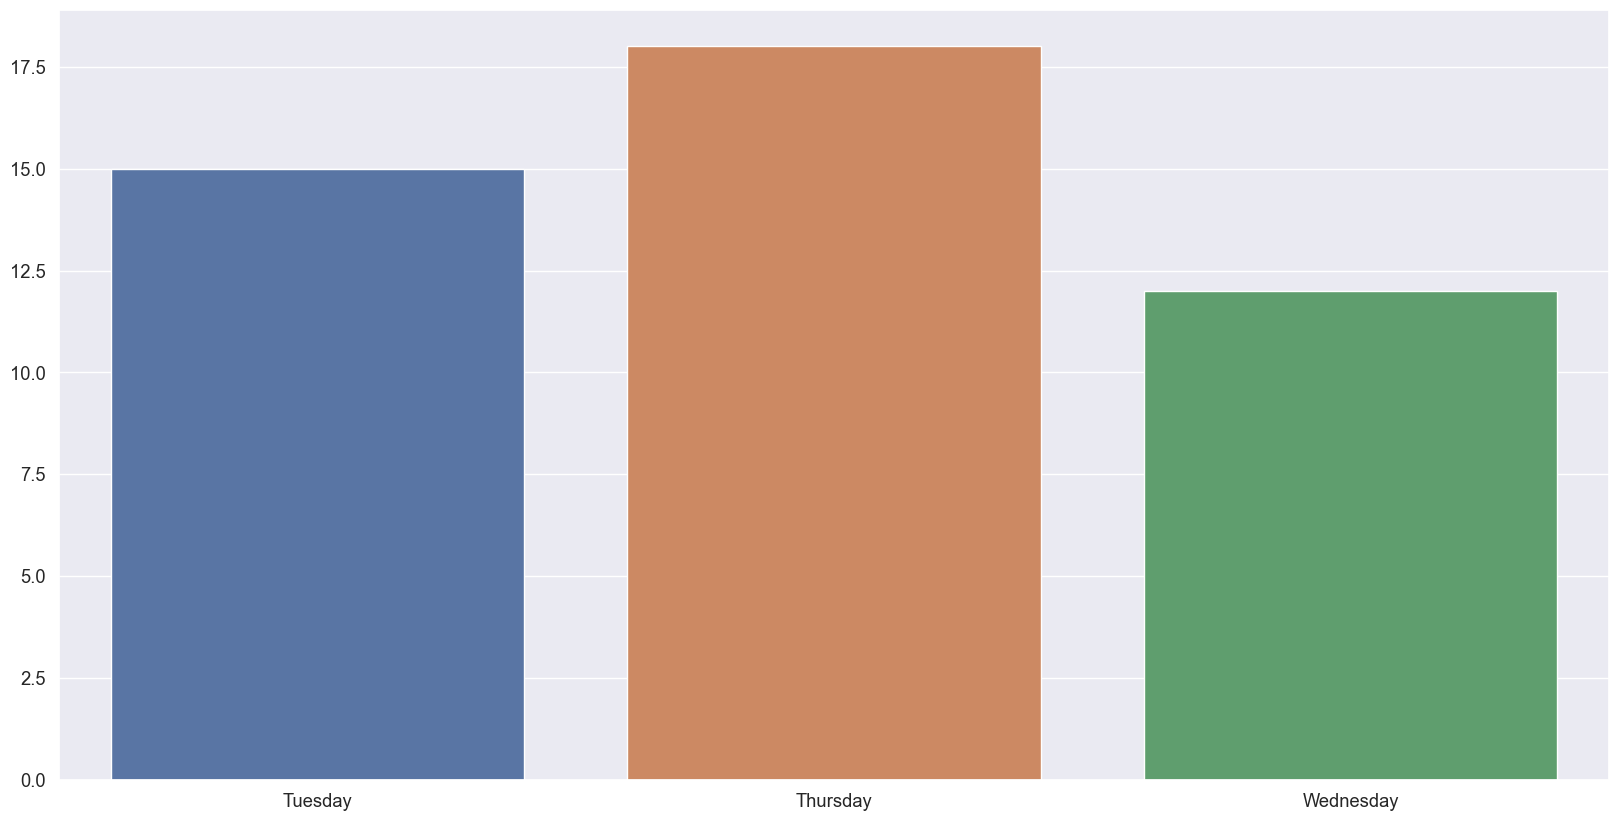

In [331]:
sns.barplot(data = df9 , x = Busiest_days_in_March_2011 , y = Busiest_hour)

** Checking the 3 least productive day & the 3 least productive hour in these days in March in 2011 **

In [332]:
df9['Day_Name'].value_counts().sort_values(ascending = True)[:3]

Sunday    3462
Friday    4647
Monday    5627
Name: Day_Name, dtype: int64

In [333]:
df9['Day_Name'].value_counts().sort_values(ascending = True)[:3].index

Index(['Sunday', 'Friday', 'Monday'], dtype='object')

In [334]:
df9['Day_Name'].value_counts().sort_values(ascending = True)[:1].index[0]

'Sunday'

In [335]:
df9['Day_Name'].value_counts().sort_values(ascending = True)[:2].index[1]

'Friday'

In [336]:
df9['Day_Name'].value_counts().sort_values(ascending = True)[:3].index[2]

'Monday'

In [337]:
df9[df9['Day_Name'] == 'Sunday']['Hour'].value_counts().sort_values(ascending = True).idxmax()

13

In [338]:
df9[df9['Day_Name'] == 'Friday']['Hour'].value_counts().sort_values(ascending = True).idxmax()

12

In [339]:
df9[df9['Day_Name'] == 'Monday']['Hour'].value_counts().sort_values(ascending = True).idxmax()

10

In [340]:
Least_productive_days_in_March_2011 = []
Least_productive_hour = []

for i in range(1,4):
    Least_productive_days_in_March_2011.append(df9['Day_Name'].value_counts().sort_values(ascending = True)[:i].index[i-1])
for i in Least_productive_days_in_March_2011:
    Least_productive_hour.append(df9[df9['Day_Name'] == i]['Hour'].value_counts().sort_values(ascending = True).idxmax())

print('Least_productive_days_in_March_2011: ' , Least_productive_days_in_March_2011)
print('Least_productive_hour: ' , Least_productive_hour)

Least_productive_days_in_March_2011:  ['Sunday', 'Friday', 'Monday']
Least_productive_hour:  [13, 12, 10]


Least hour on Sunday @ 13hr , Least hour on Friday @ 12hr , Least hour on Monday @ 10hr.

<AxesSubplot:>

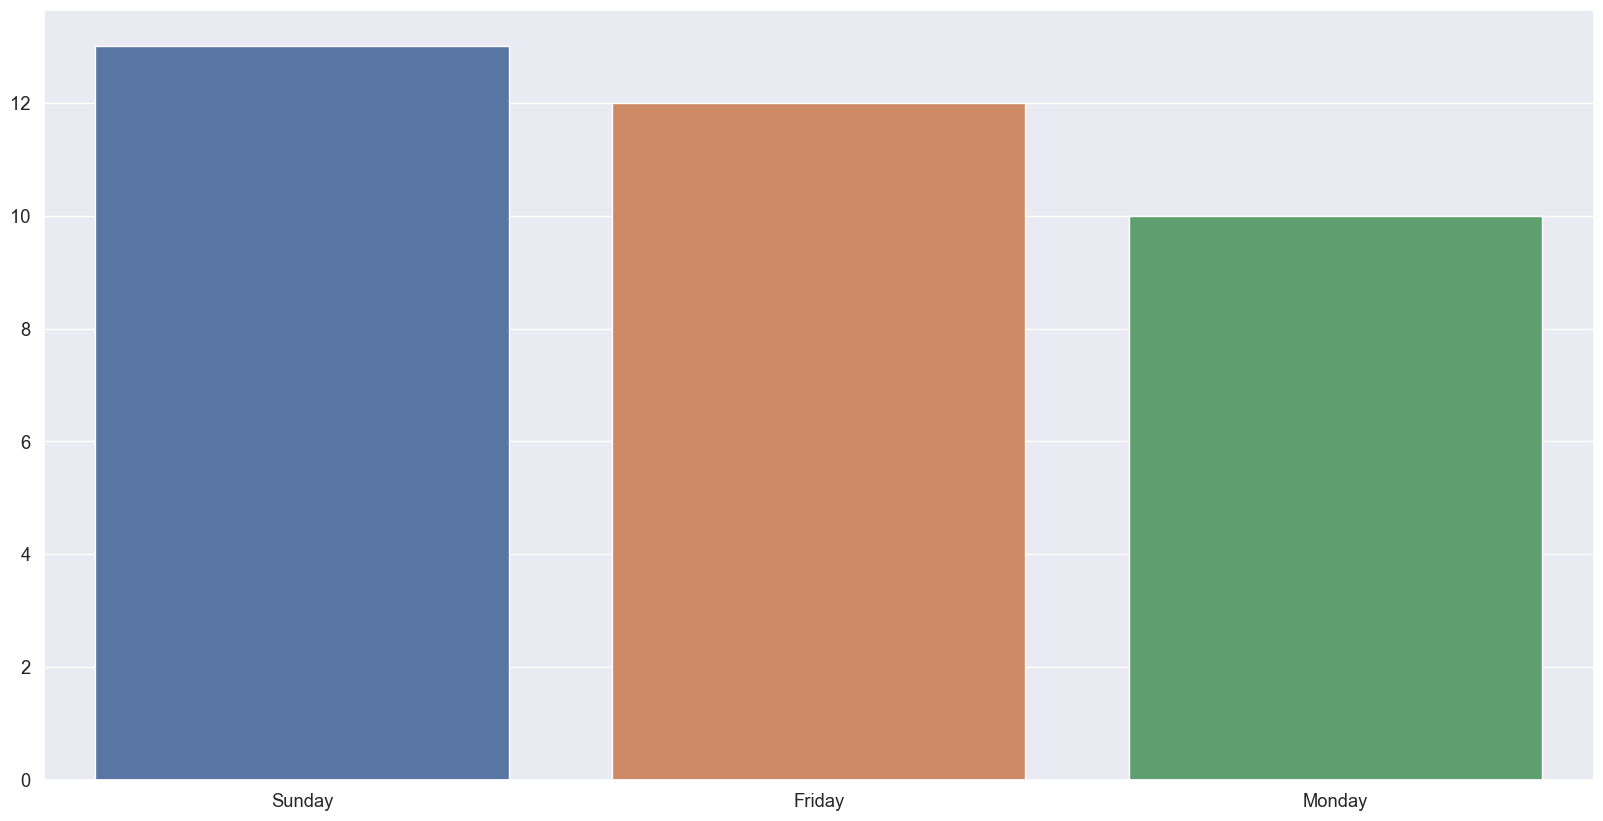

In [341]:
sns.barplot(data = df9 , x = Least_productive_days_in_March_2011 , y = Least_productive_hour)

** checking the most productive day every month in 2011 **

In [342]:
df[df['Year'] == 2011]

InvoiceNo StockCode                      Description  Quantity  \
40991     539993     22386          JUMBO BAG PINK POLKADOT        10   
40992     539993     21499               BLUE POLKADOT WRAP        25   
40993     539993     21498              RED RETROSPOT WRAP         25   
40994     539993     22379         RECYCLING BAG RETROSPOT          5   
40995     539993     20718        RED RETROSPOT SHOPPER BAG        10   
...          ...       ...                              ...       ...   
524873    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
40991  2011-01-04 10:00:00       1.95      13313  United Kingdom       19.50   
40992  2011-01-04 10:00:00       0.42      13313  United Kingdom       10.50   
40993  2011-01-04 10:00:00       0.42      13313  United Kingdom       10.50   
40994  2011-01-04 10:00:00       2.10      13313  United Kingdom       10.50   
40995  2011-01-04 10:00:00       1.25      13313  United Kingdom       12.50   
...                    ...        ...        ...             ...         ...   
524873 2011-12-09 12:50:00       0.85      12680          France       10.20   
524874 2011-12-09 12:50:00       2.10      12680          France       12.60   
524875 2011-12-09 12:50:00       4.15      12680          France       16.60   
524876 2011-12-09 12:50:00       4.15      12680          France       16.60   
524877 2011-12-09 12:50:00       4.95      12680          France       14.85   

        Year  ...  Week  Weekday  Day  Dayofyear  Month_Name  Day_Name Hour  \
40991   2011  ...     1        1    4          4     January   Tuesday   10   
40992   2011  ...     1        1    4          4     January   Tuesday   10   
40993   2011  ...     1        1    4          4     January   Tuesday   10   
40994   2011  ...     1        1    4          4     January   Tuesday   10   
40995   2011  ...     1        1    4          4     January   Tuesday   10   
...      ...  ...   ...      ...  ...        ...         ...       ...  ...   
524873  2011  ...    49        4    9        343    December    Friday   12   
524874  2011  ...    49        4    9        343    December    Friday   12   
524875  2011  ...    49        4    9        343    December    Friday   12   
524876  2011  ...    49        4    9        343    December    Friday   12   
524877  2011  ...    49        4    9        343    December    Friday   12   

       Minute  Season   Period  
40991       0  Winter  morning  
40992       0  Winter  morning  
40993       0  Winter  morning  
40994       0  Winter  morning  
40995       0  Winter  morning  
...       ...     ...      ...  
524873     50  Winter  morning  
524874     50  Winter  morning  
524875     50  Winter  morning  
524876     50  Winter  morning  
524877     50  Winter  morning  

[483887 rows x 22 columns]

In [343]:
df[df['Year'] == 2011][['Month_Name' , 'Day']]

Month_Name  Day
40991     January    4
40992     January    4
40993     January    4
40994     January    4
40995     January    4
...           ...  ...
524873   December    9
524874   December    9
524875   December    9
524876   December    9
524877   December    9

[483887 rows x 2 columns]

In [344]:
df[(df['Year'] == 2011) & (df['Month_Name'] == 'April')]['Day'].value_counts().sort_values(ascending = False).idxmax()

18

In [345]:
Most_productive_day_every_month = []
Months = []

for i in df.Month_Name.unique():
    Months.append(i)
    Most_productive_day_every_month.append(df[(df['Year'] == 2011) & (df['Month_Name'] == i)]['Day'].value_counts().sort_values(ascending = False).idxmax())

print(Months)
print(Most_productive_day_every_month)

['December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
[5, 17, 17, 22, 18, 10, 8, 4, 30, 21, 31, 29]


<AxesSubplot:>

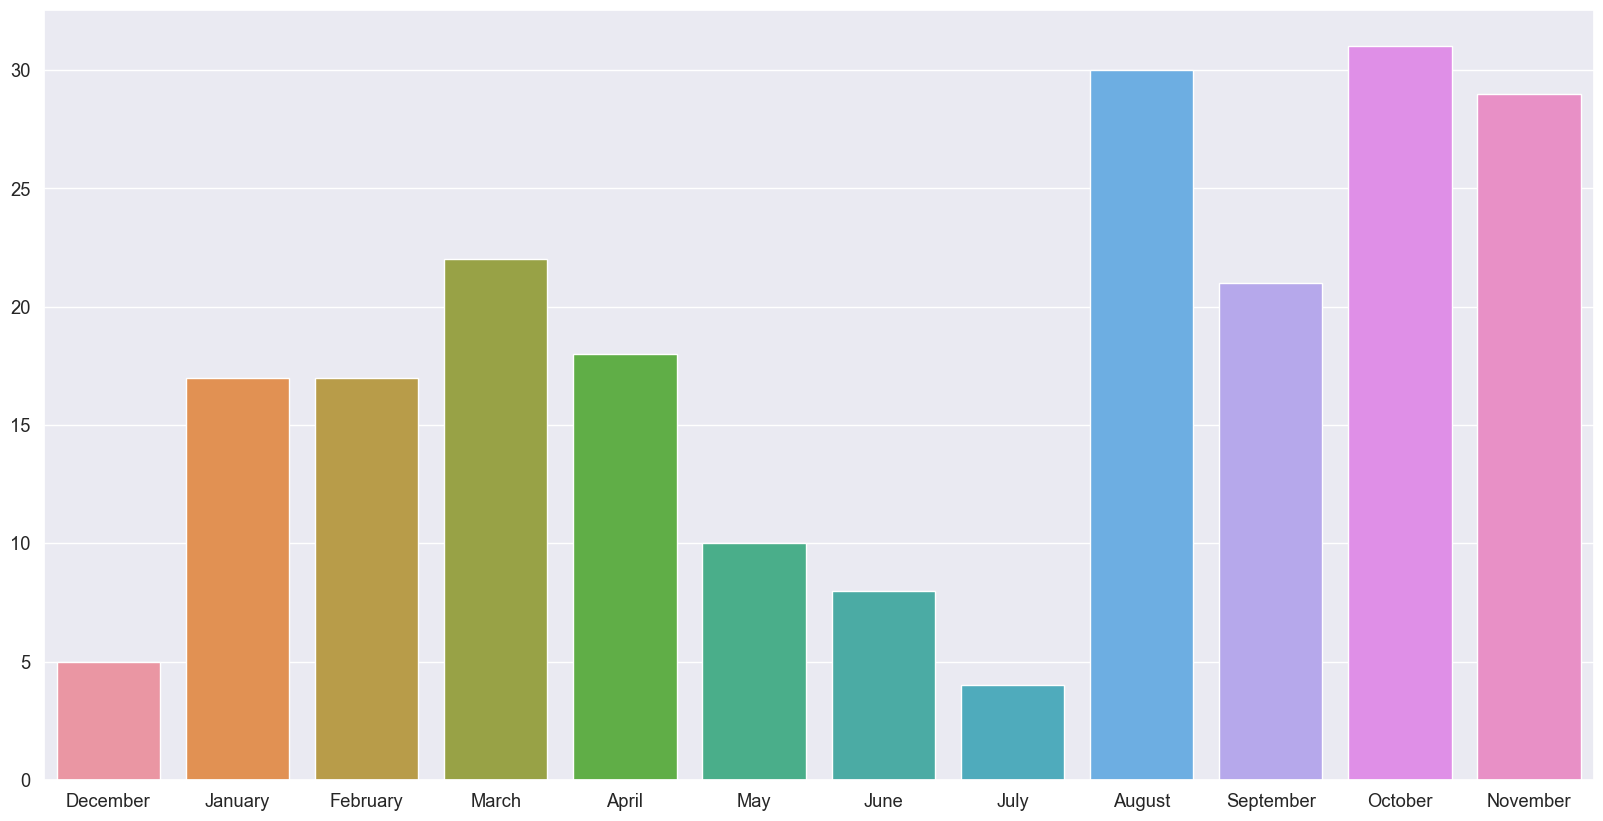

In [346]:
sns.barplot(data = df , x = Months , y = Most_productive_day_every_month)

** checking the least productive day every month in 2011 **

In [347]:
df[(df['Year'] == 2011) & (df['Month_Name'] == 'May')]['Day'].value_counts().sort_values(ascending = True).index[0]

1

In [348]:
Least_productive_day_every_month = []
Months = []

for i in df.Month_Name.unique():
    Months.append(i)
    Least_productive_day_every_month.append(df[(df['Year'] == 2011) & (df['Month_Name'] == i)]['Day'].value_counts().sort_values(ascending = True).index[0])

print(Months)
print(Least_productive_day_every_month)

['December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
[9, 16, 6, 13, 3, 1, 26, 3, 7, 6, 9, 1]


<AxesSubplot:>

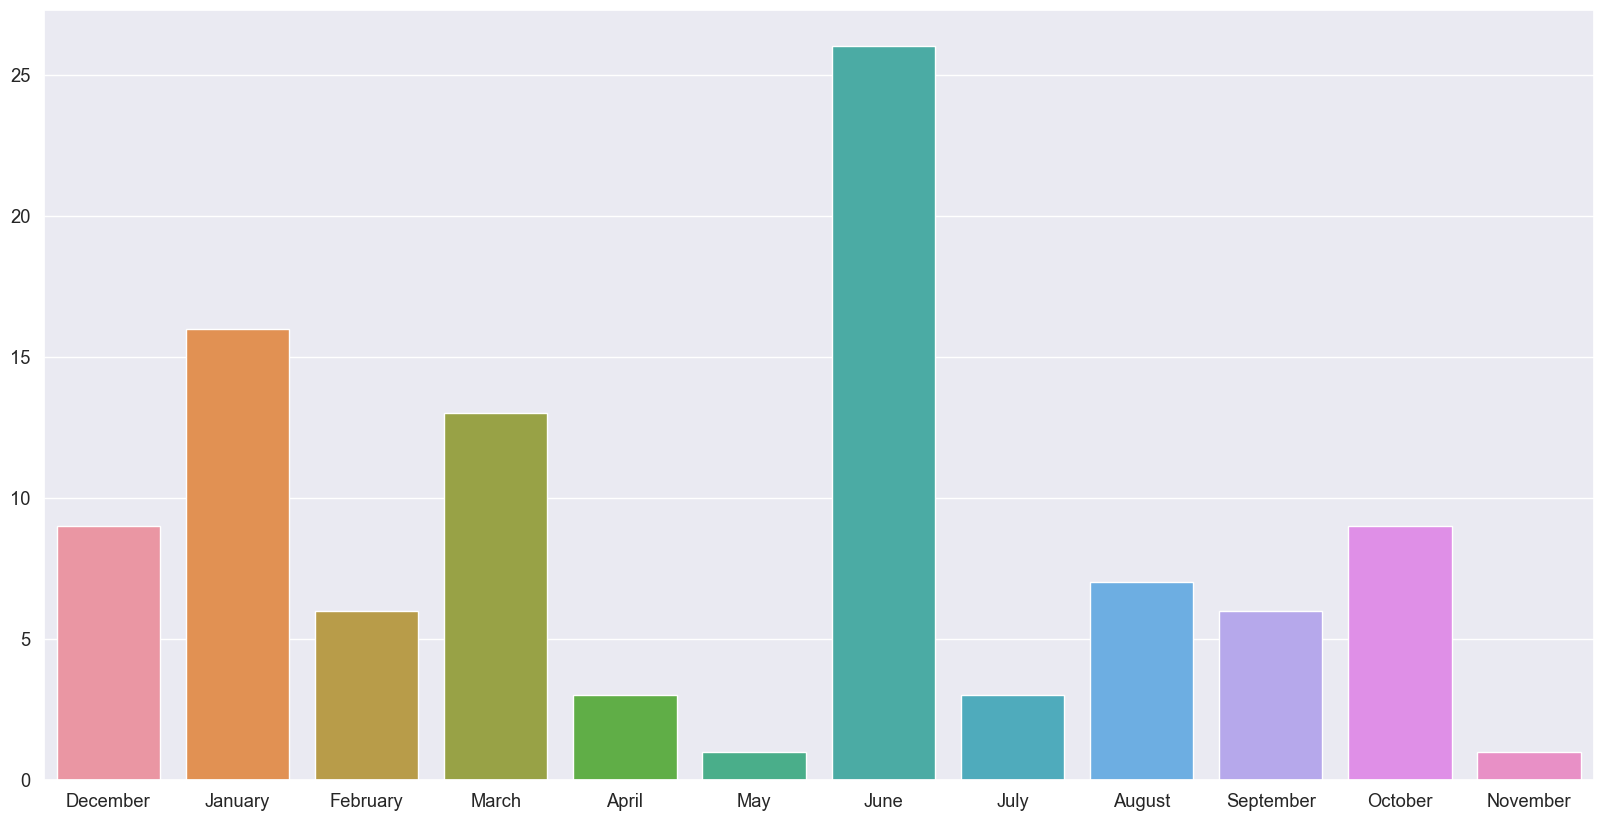

In [349]:
sns.barplot(data = df , x = Months , y = Least_productive_day_every_month)

** Double-checking on duplicates **

In [350]:
df.duplicated().sum()

0

In [351]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Year', 'Quarter',
       'Month', 'Week', 'Weekday', 'Day', 'Dayofyear', 'Month_Name',
       'Day_Name', 'Hour', 'Minute', 'Season', 'Period'],
      dtype='object')

In [352]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524874    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524875    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524876    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524877    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30   
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00   
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
...                    ...        ...        ...             ...         ...   
524873 2011-12-09 12:50:00       0.85      12680          France       10.20   
524874 2011-12-09 12:50:00       2.10      12680          France       12.60   
524875 2011-12-09 12:50:00       4.15      12680          France       16.60   
524876 2011-12-09 12:50:00       4.15      12680          France       16.60   
524877 2011-12-09 12:50:00       4.95      12680          France       14.85   

        Year  ...  Week  Weekday  Day  Dayofyear  Month_Name   Day_Name Hour  \
0       2010  ...    48        2    1        335    December  Wednesday    8   
1       2010  ...    48        2    1        335    December  Wednesday    8   
2       2010  ...    48        2    1        335    December  Wednesday    8   
3       2010  ...    48        2    1        335    December  Wednesday    8   
4       2010  ...    48        2    1        335    December  Wednesday    8   
...      ...  ...   ...      ...  ...        ...         ...        ...  ...   
524873  2011  ...    49        4    9        343    December     Friday   12   
524874  2011  ...    49        4    9        343    December     Friday   12   
524875  2011  ...    49        4    9        343    December     Friday   12   
524876  2011  ...    49        4    9        343    December     Friday   12   
524877  2011  ...    49        4    9        343    December     Friday   12   

       Minute  Season   Period  
0          26  Winter  morning  
1          26  Winter  morning  
2          26  Winter  morning  
3          26  Winter  morning  
4          26  Winter  morning  
...       ...     ...      ...  
524873     50  Winter  morning  
524874     50  Winter  morning  
524875     50  Winter  morning  
524876     50  Winter  morning  
524877     50  Winter  morning  

[524878 rows x 22 columns]

### Creating new features:

- Frequency: total number of transactions

- Amount: total amount of transactions

In [353]:
Amount = df.groupby('CustomerID')['TotalPrice'].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']

In [354]:
Amount

CustomerID    Amount
0         12346  77183.60
1         12347   4310.00
2         12348   1797.24
3         12349   1757.55
4         12350    334.40
...         ...       ...
4333      18280    180.60
4334      18281     80.82
4335      18282    178.05
4336      18283   2045.53
4337      18287   1837.28

[4338 rows x 2 columns]

In [355]:
Frequency=df.groupby('CustomerID')['InvoiceNo'].count()
Frequency=Frequency.reset_index()
Frequency.columns=['CustomerID','Frequency']

In [356]:
Frequency

CustomerID  Frequency
0         12346          1
1         12347        182
2         12348         31
3         12349         73
4         12350         17
...         ...        ...
4333      18280         10
4334      18281          7
4335      18282         12
4336      18283        721
4337      18287         70

[4338 rows x 2 columns]

In [357]:
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')

In [358]:
df1

CustomerID    Amount  Frequency
0         12346  77183.60          1
1         12347   4310.00        182
2         12348   1797.24         31
3         12349   1757.55         73
4         12350    334.40         17
...         ...       ...        ...
4333      18280    180.60         10
4334      18281     80.82          7
4335      18282    178.05         12
4336      18283   2045.53        721
4337      18287   1837.28         70

[4338 rows x 3 columns]

In [359]:
df2 = pd.merge(df, df1, on='CustomerID', how='inner')

In [360]:
df2

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
392687    581578     22993         SET OF 4 PANTRY JELLY MOULDS        12   
392688    581578     22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
392689    581578     22908        PACK OF 20 NAPKINS RED APPLES        12   
392690    581578     23215     JINGLE BELL HEART ANTIQUE SILVER        12   
392691    581578     22736          RIBBON REEL MAKING SNOWMEN         10   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30   
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00   
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
...                    ...        ...        ...             ...         ...   
392687 2011-12-09 12:16:00       1.25      12713         Germany       15.00   
392688 2011-12-09 12:16:00       0.85      12713         Germany       10.20   
392689 2011-12-09 12:16:00       0.85      12713         Germany       10.20   
392690 2011-12-09 12:16:00       2.08      12713         Germany       24.96   
392691 2011-12-09 12:16:00       1.65      12713         Germany       16.50   

        Year  ...  Day  Dayofyear  Month_Name   Day_Name  Hour  Minute  \
0       2010  ...    1        335    December  Wednesday     8      26   
1       2010  ...    1        335    December  Wednesday     8      26   
2       2010  ...    1        335    December  Wednesday     8      26   
3       2010  ...    1        335    December  Wednesday     8      26   
4       2010  ...    1        335    December  Wednesday     8      26   
...      ...  ...  ...        ...         ...        ...   ...     ...   
392687  2011  ...    9        343    December     Friday    12      16   
392688  2011  ...    9        343    December     Friday    12      16   
392689  2011  ...    9        343    December     Friday    12      16   
392690  2011  ...    9        343    December     Friday    12      16   
392691  2011  ...    9        343    December     Friday    12      16   

        Season   Period   Amount  Frequency  
0       Winter  morning  5391.21        297  
1       Winter  morning  5391.21        297  
2       Winter  morning  5391.21        297  
3       Winter  morning  5391.21        297  
4       Winter  morning  5391.21        297  
...        ...      ...      ...        ...  
392687  Winter  morning   848.55         38  
392688  Winter  morning   848.55         38  
392689  Winter  morning   848.55         38  
392690  Winter  morning   848.55         38  
392691  Winter  morning   848.55         38  

[392692 rows x 24 columns]

In [361]:
df2

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
392687    581578     22993         SET OF 4 PANTRY JELLY MOULDS        12   
392688    581578     22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
392689    581578     22908        PACK OF 20 NAPKINS RED APPLES        12   
392690    581578     23215     JINGLE BELL HEART ANTIQUE SILVER        12   
392691    581578     22736          RIBBON REEL MAKING SNOWMEN         10   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
0      2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30   
1      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
2      2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00   
3      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
4      2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
...                    ...        ...        ...             ...         ...   
392687 2011-12-09 12:16:00       1.25      12713         Germany       15.00   
392688 2011-12-09 12:16:00       0.85      12713         Germany       10.20   
392689 2011-12-09 12:16:00       0.85      12713         Germany       10.20   
392690 2011-12-09 12:16:00       2.08      12713         Germany       24.96   
392691 2011-12-09 12:16:00       1.65      12713         Germany       16.50   

        Year  ...  Day  Dayofyear  Month_Name   Day_Name  Hour  Minute  \
0       2010  ...    1        335    December  Wednesday     8      26   
1       2010  ...    1        335    December  Wednesday     8      26   
2       2010  ...    1        335    December  Wednesday     8      26   
3       2010  ...    1        335    December  Wednesday     8      26   
4       2010  ...    1        335    December  Wednesday     8      26   
...      ...  ...  ...        ...         ...        ...   ...     ...   
392687  2011  ...    9        343    December     Friday    12      16   
392688  2011  ...    9        343    December     Friday    12      16   
392689  2011  ...    9        343    December     Friday    12      16   
392690  2011  ...    9        343    December     Friday    12      16   
392691  2011  ...    9        343    December     Friday    12      16   

        Season   Period   Amount  Frequency  
0       Winter  morning  5391.21        297  
1       Winter  morning  5391.21        297  
2       Winter  morning  5391.21        297  
3       Winter  morning  5391.21        297  
4       Winter  morning  5391.21        297  
...        ...      ...      ...        ...  
392687  Winter  morning   848.55         38  
392688  Winter  morning   848.55         38  
392689  Winter  morning   848.55         38  
392690  Winter  morning   848.55         38  
392691  Winter  morning   848.55         38  

[392692 rows x 24 columns]

In [362]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 392691
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392451 non-null  object        
 8   TotalPrice   392692 non-null  float64       
 9   Year         392692 non-null  int64         
 10  Quarter      392692 non-null  int64         
 11  Month        392692 non-null  int64         
 12  Week         392692 non-null  int64         
 13  Weekday      392692 non-null  int64         
 14  Day          392692 non-null  int64         
 15  Dayofyear    392692 non-null  int6

In [363]:
df2 = df2.astype({'Year': object , 'Quarter': object , 'Month':object , 'Week':object , 'Weekday':object , 'Day':object , 'Dayofyear':object , 'Hour':object , 'Minute':object})

In [364]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 392691
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392451 non-null  object        
 8   TotalPrice   392692 non-null  float64       
 9   Year         392692 non-null  object        
 10  Quarter      392692 non-null  object        
 11  Month        392692 non-null  object        
 12  Week         392692 non-null  object        
 13  Weekday      392692 non-null  object        
 14  Day          392692 non-null  object        
 15  Dayofyear    392692 non-null  obje

In [365]:
df2.describe()

Quantity      UnitPrice     TotalPrice         Amount  \
count  392692.000000  392692.000000  392692.000000  392692.000000   
mean       13.119702       3.125914      22.631500   11565.753316   
std       180.492832      22.241836     311.099224   31431.816122   
min         1.000000       0.001000       0.001000       3.750000   
25%         2.000000       1.250000       4.950000    1097.620000   
50%         6.000000       1.950000      12.450000    2662.060000   
75%        12.000000       3.750000      19.800000    6287.770000   
max     80995.000000    8142.750000  168469.600000  280206.020000   

           Frequency  
count  392692.000000  
mean      652.162799  
std      1421.137332  
min         1.000000  
25%        89.000000  
50%       197.000000  
75%       441.000000  
max      7676.000000

** Handling missing values **

In [366]:
df2.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country        241
TotalPrice       0
Year             0
Quarter          0
Month            0
Week             0
Weekday          0
Day              0
Dayofyear        0
Month_Name       0
Day_Name         0
Hour             0
Minute           0
Season           0
Period           0
Amount           0
Frequency        0
dtype: int64

In [367]:
df2.isnull().mean() * 100

InvoiceNo      0.000000
StockCode      0.000000
Description    0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.061371
TotalPrice     0.000000
Year           0.000000
Quarter        0.000000
Month          0.000000
Week           0.000000
Weekday        0.000000
Day            0.000000
Dayofyear      0.000000
Month_Name     0.000000
Day_Name       0.000000
Hour           0.000000
Minute         0.000000
Season         0.000000
Period         0.000000
Amount         0.000000
Frequency      0.000000
dtype: float64

In [368]:
df2.dropna(subset = ['Country'] , axis = 0 , inplace = True )

** Dropping null values from Country **

In [369]:
df2.reset_index(drop = True , inplace = True)

In [370]:
df2['Dayofyear'].unique()

array([335, 336, 34, 89, 124, 170, 216, 287, 312, 7, 41, 70, 143, 163,
       172, 189, 237, 264, 273, 285, 325, 341, 97, 111, 248, 342, 10, 351,
       12, 18, 66, 69, 76, 91, 96, 171, 249, 308, 311, 318, 31, 39, 53,
       60, 80, 94, 130, 145, 164, 179, 193, 202, 214, 251, 291, 304, 337,
       42, 98, 126, 283, 327, 339, 343, 347, 348, 350, 354, 357, 5, 14,
       17, 19, 21, 25, 27, 32, 46, 49, 54, 63, 67, 73, 100, 108, 118, 138,
       147, 153, 158, 168, 180, 187, 194, 196, 200, 207, 209, 220, 222,
       227, 230, 231, 245, 256, 259, 266, 270, 276, 280, 289, 294, 299,
       301, 305, 313, 315, 319, 322, 326, 328, 329, 333, 340, 45, 109,
       186, 215, 293, 355, 4, 13, 20, 35, 52, 75, 84, 101, 117, 123, 131,
       137, 144, 157, 161, 178, 217, 229, 236, 250, 263, 278, 284, 82, 28,
       48, 58, 132, 205, 224, 279, 349, 88, 102, 103, 110, 166, 201, 199,
       6, 24, 86, 93, 116, 136, 165, 177, 223, 234, 244, 254, 257, 268,
       277, 307, 320, 332, 344, 140, 192, 235, 262,

In [371]:
df2['Minute'].unique()

array([26, 28, 1, 2, 32, 34, 51, 52, 33, 40, 41, 42, 44, 54, 55, 56, 58,
       23, 24, 25, 4, 5, 6, 7, 27, 35, 11, 15, 45, 38, 0, 48, 47, 30, 22,
       46, 16, 13, 9, 14, 31, 57, 37, 21, 49, 8, 18, 29, 43, 59, 39, 17,
       36, 19, 12, 3, 50, 20, 53, 10], dtype=object)

In [372]:
df2['Week'].unique()

array([48, 5, 13, 18, 24, 31, 41, 45, 1, 6, 10, 21, 23, 25, 27, 34, 38,
       39, 47, 49, 14, 16, 36, 2, 50, 3, 11, 44, 46, 8, 9, 12, 19, 26, 28,
       29, 42, 51, 4, 7, 17, 20, 22, 30, 32, 33, 35, 37, 40, 43, 15],
      dtype=object)

In [373]:
df2['Day'].unique()

array([1, 2, 3, 30, 4, 19, 14, 8, 7, 10, 11, 23, 12, 21, 25, 5, 17, 18, 6,
       20, 31, 22, 13, 28, 9, 16, 27, 15, 29, 26, 24], dtype=object)

In [374]:
df2['Weekday'].unique()

array([2, 3, 6, 4, 1, 0], dtype=object)

In [375]:
df2['Month'].unique()

array([12, 2, 3, 5, 6, 8, 10, 11, 1, 7, 9, 4], dtype=object)

In [376]:
df2['Month_Name'].unique()

array(['December', 'February', 'March', 'May', 'June', 'August',
       'October', 'November', 'January', 'July', 'September', 'April'],
      dtype=object)

In [377]:
df2['Day_Name'].unique()

array(['Wednesday', 'Thursday', 'Sunday', 'Friday', 'Tuesday', 'Monday'],
      dtype=object)

In [378]:
df2.drop(['InvoiceNo' , 'StockCode' , 'Description' , 'CustomerID'  , 'InvoiceDate' , 'Dayofyear' , 'Month_Name' ] , axis = 1 , inplace = True)

In [379]:
df2.reset_index(drop = True , inplace = True)

In [380]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392451 entries, 0 to 392450
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Quantity    392451 non-null  int64  
 1   UnitPrice   392451 non-null  float64
 2   Country     392451 non-null  object 
 3   TotalPrice  392451 non-null  float64
 4   Year        392451 non-null  object 
 5   Quarter     392451 non-null  object 
 6   Month       392451 non-null  object 
 7   Week        392451 non-null  object 
 8   Weekday     392451 non-null  object 
 9   Day         392451 non-null  object 
 10  Day_Name    392451 non-null  object 
 11  Hour        392451 non-null  object 
 12  Minute      392451 non-null  object 
 13  Season      392451 non-null  object 
 14  Period      392451 non-null  object 
 15  Amount      392451 non-null  float64
 16  Frequency   392451 non-null  int64  
dtypes: float64(3), int64(2), object(12)
memory usage: 50.9+ MB


In [381]:
df2.duplicated().sum()

145258

In [382]:
df2.drop_duplicates(inplace = True)

In [383]:
df2

Quantity  UnitPrice         Country  TotalPrice  Year Quarter Month  \
0              6       2.55  United Kingdom       15.30  2010       4    12   
1              6       3.39  United Kingdom       20.34  2010       4    12   
2              8       2.75  United Kingdom       22.00  2010       4    12   
5              2       7.65  United Kingdom       15.30  2010       4    12   
6              6       4.25  United Kingdom       25.50  2010       4    12   
...          ...        ...             ...         ...   ...     ...   ...   
392442         6       2.08         Germany       12.48  2011       4    12   
392443        10       1.65         Germany       16.50  2011       4    12   
392445         9       4.95         Germany       44.55  2011       4    12   
392447        12       0.85         Germany       10.20  2011       4    12   
392449        12       2.08         Germany       24.96  2011       4    12   

       Week Weekday Day   Day_Name Hour Minute  Season   Period   Amount  \
0        48       2   1  Wednesday    8     26  Winter  morning  5391.21   
1        48       2   1  Wednesday    8     26  Winter  morning  5391.21   
2        48       2   1  Wednesday    8     26  Winter  morning  5391.21   
5        48       2   1  Wednesday    8     26  Winter  morning  5391.21   
6        48       2   1  Wednesday    8     26  Winter  morning  5391.21   
...     ...     ...  ..        ...  ...    ...     ...      ...      ...   
392442   49       4   9     Friday   12     16  Winter  morning   848.55   
392443   49       4   9     Friday   12     16  Winter  morning   848.55   
392445   49       4   9     Friday   12     16  Winter  morning   848.55   
392447   49       4   9     Friday   12     16  Winter  morning   848.55   
392449   49       4   9     Friday   12     16  Winter  morning   848.55   

        Frequency  
0             297  
1             297  
2             297  
5             297  
6             297  
...           ...  
392442         38  
392443         38  
392445         38  
392447         38  
392449         38  

[247193 rows x 17 columns]

In [384]:
df2.duplicated().sum()

0

In [385]:
df2.reset_index(drop = True , inplace = True)

In [386]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247193 entries, 0 to 247192
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Quantity    247193 non-null  int64  
 1   UnitPrice   247193 non-null  float64
 2   Country     247193 non-null  object 
 3   TotalPrice  247193 non-null  float64
 4   Year        247193 non-null  object 
 5   Quarter     247193 non-null  object 
 6   Month       247193 non-null  object 
 7   Week        247193 non-null  object 
 8   Weekday     247193 non-null  object 
 9   Day         247193 non-null  object 
 10  Day_Name    247193 non-null  object 
 11  Hour        247193 non-null  object 
 12  Minute      247193 non-null  object 
 13  Season      247193 non-null  object 
 14  Period      247193 non-null  object 
 15  Amount      247193 non-null  float64
 16  Frequency   247193 non-null  int64  
dtypes: float64(3), int64(2), object(12)
memory usage: 32.1+ MB


In [387]:
df2

Quantity  UnitPrice         Country  TotalPrice  Year Quarter Month  \
0              6       2.55  United Kingdom       15.30  2010       4    12   
1              6       3.39  United Kingdom       20.34  2010       4    12   
2              8       2.75  United Kingdom       22.00  2010       4    12   
3              2       7.65  United Kingdom       15.30  2010       4    12   
4              6       4.25  United Kingdom       25.50  2010       4    12   
...          ...        ...             ...         ...   ...     ...   ...   
247188         6       2.08         Germany       12.48  2011       4    12   
247189        10       1.65         Germany       16.50  2011       4    12   
247190         9       4.95         Germany       44.55  2011       4    12   
247191        12       0.85         Germany       10.20  2011       4    12   
247192        12       2.08         Germany       24.96  2011       4    12   

       Week Weekday Day   Day_Name Hour Minute  Season   Period   Amount  \
0        48       2   1  Wednesday    8     26  Winter  morning  5391.21   
1        48       2   1  Wednesday    8     26  Winter  morning  5391.21   
2        48       2   1  Wednesday    8     26  Winter  morning  5391.21   
3        48       2   1  Wednesday    8     26  Winter  morning  5391.21   
4        48       2   1  Wednesday    8     26  Winter  morning  5391.21   
...     ...     ...  ..        ...  ...    ...     ...      ...      ...   
247188   49       4   9     Friday   12     16  Winter  morning   848.55   
247189   49       4   9     Friday   12     16  Winter  morning   848.55   
247190   49       4   9     Friday   12     16  Winter  morning   848.55   
247191   49       4   9     Friday   12     16  Winter  morning   848.55   
247192   49       4   9     Friday   12     16  Winter  morning   848.55   

        Frequency  
0             297  
1             297  
2             297  
3             297  
4             297  
...           ...  
247188         38  
247189         38  
247190         38  
247191         38  
247192         38  

[247193 rows x 17 columns]

** Checking Correlation for numeric data **

In [388]:
df2.select_dtypes(include = np.number).corr()

Quantity  UnitPrice  TotalPrice    Amount  Frequency
Quantity    1.000000  -0.004177    0.916234  0.056919  -0.005475
UnitPrice  -0.004177   1.000000    0.081124  0.010976   0.006588
TotalPrice  0.916234   0.081124    1.000000  0.068176  -0.005219
Amount      0.056919   0.010976    0.068176  1.000000   0.521557
Frequency  -0.005475   0.006588   -0.005219  0.521557   1.000000

<AxesSubplot:>

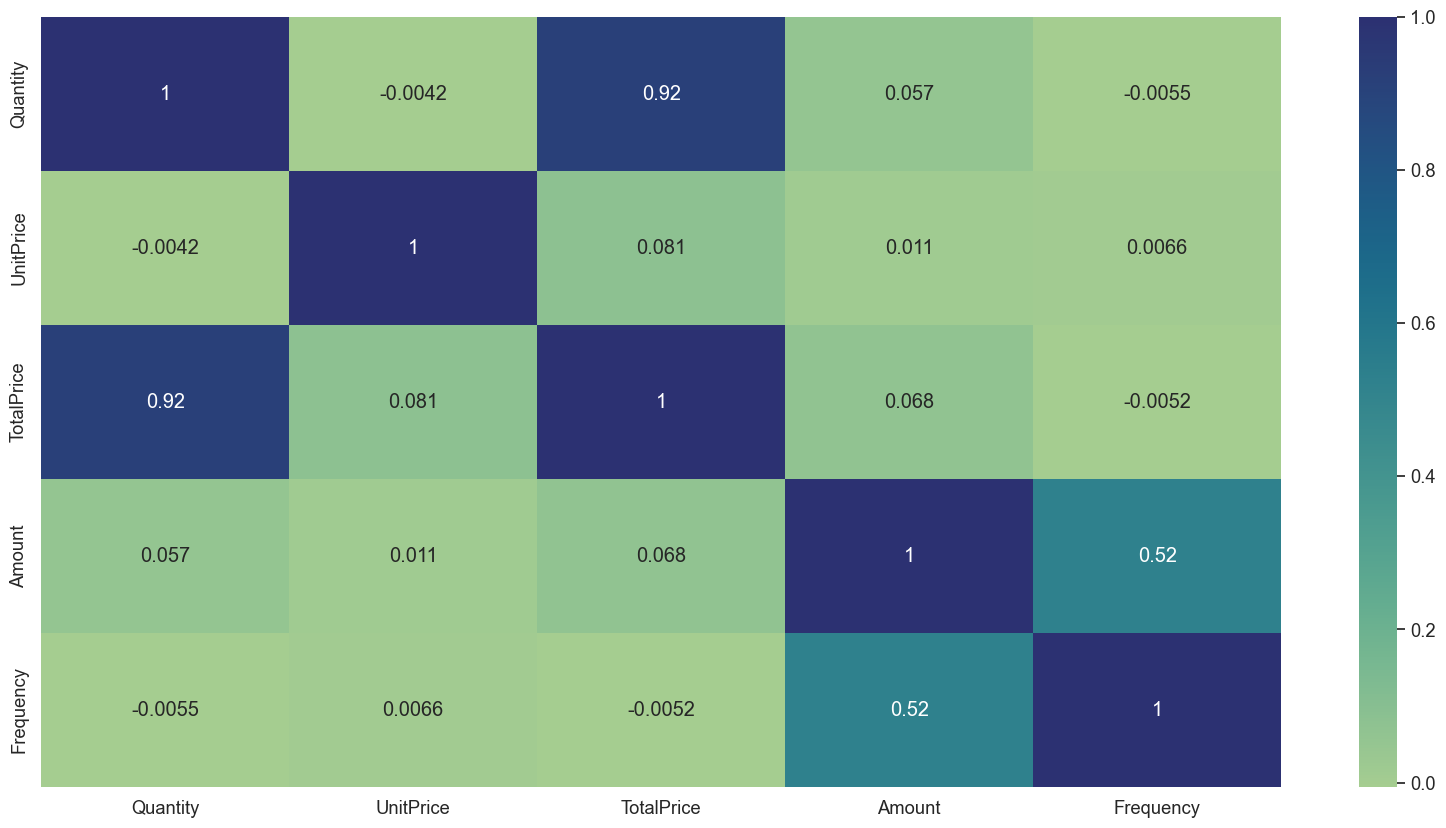

In [389]:
sns.heatmap(df2.select_dtypes(include = np.number).corr() , cmap = 'crest' , annot = True)

<AxesSubplot:xlabel='Frequency', ylabel='Amount'>

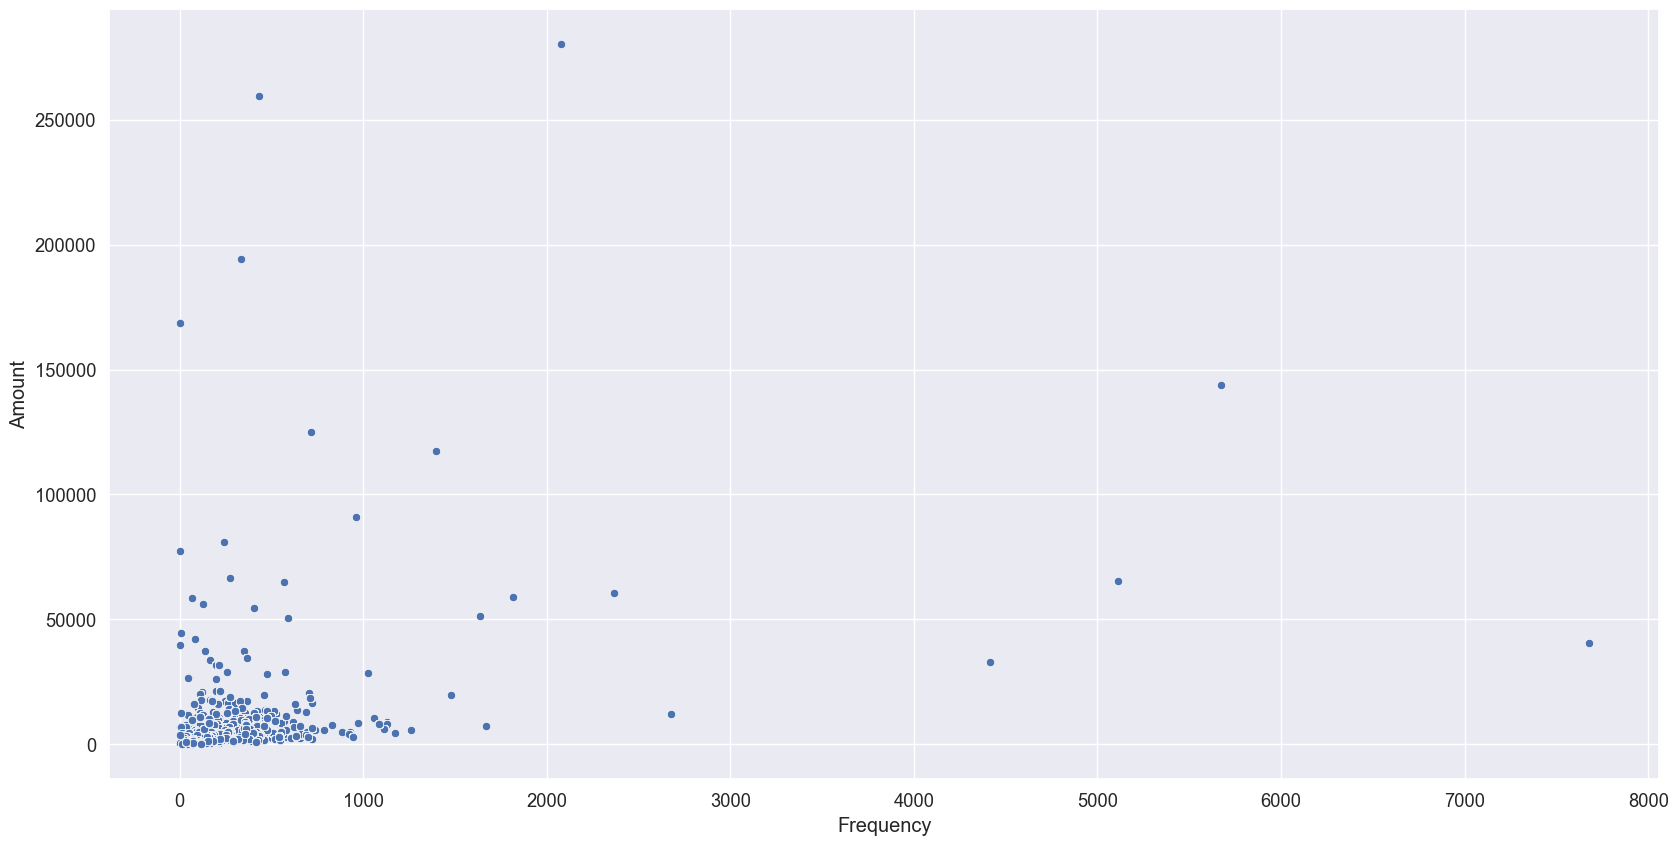

In [390]:
sns.scatterplot(data = df2 , x = 'Frequency' , y = 'Amount' , palette='flare')

** Checking outliers **

<AxesSubplot:xlabel='Amount'>

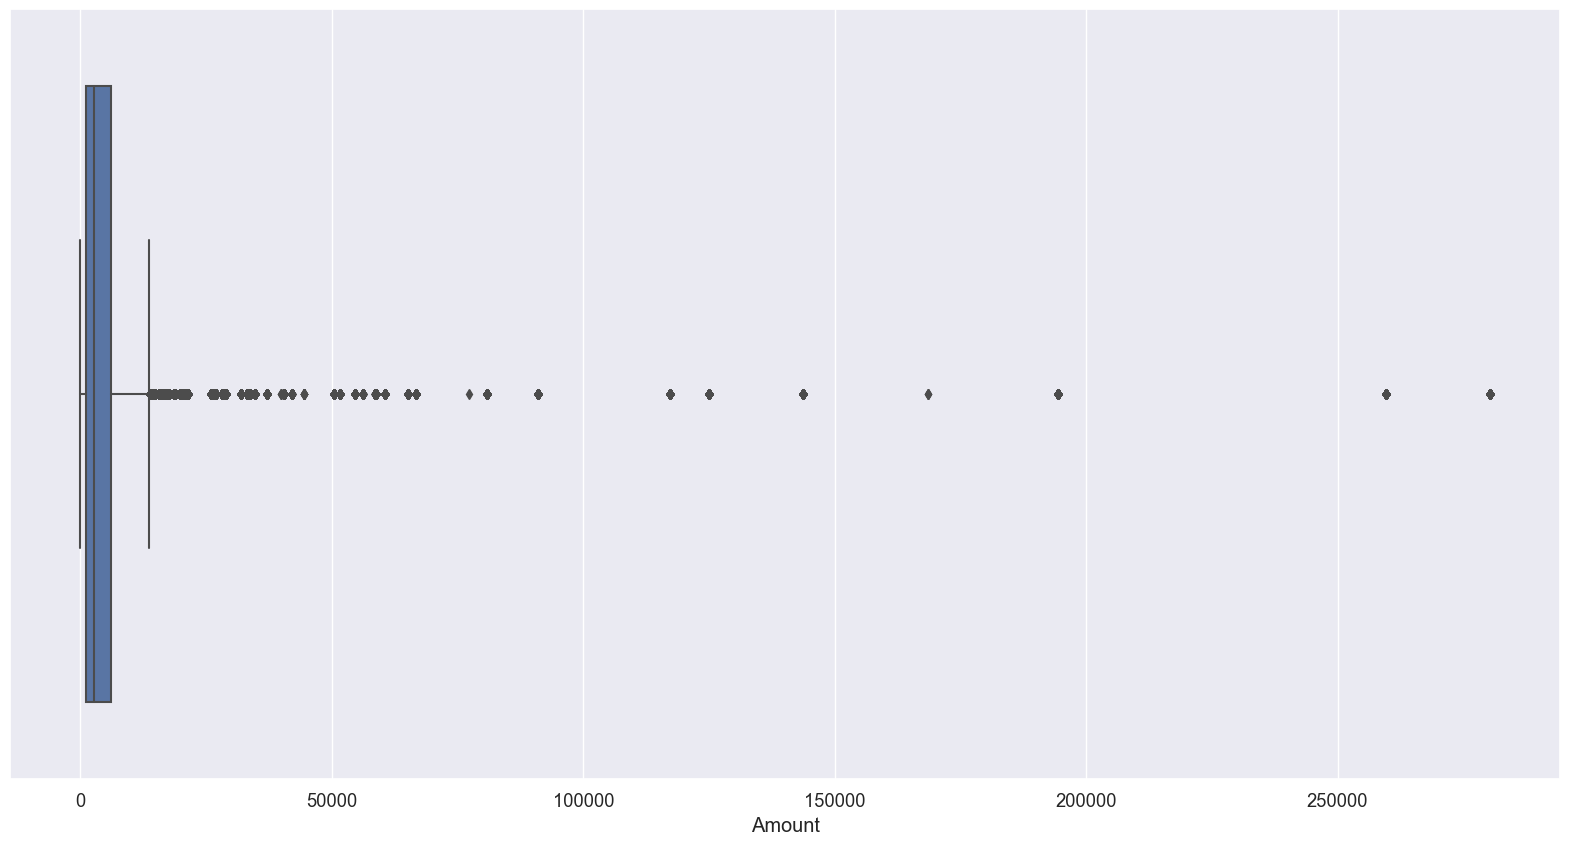

In [391]:
sns.boxplot(df2['Amount'])

<AxesSubplot:xlabel='Frequency'>

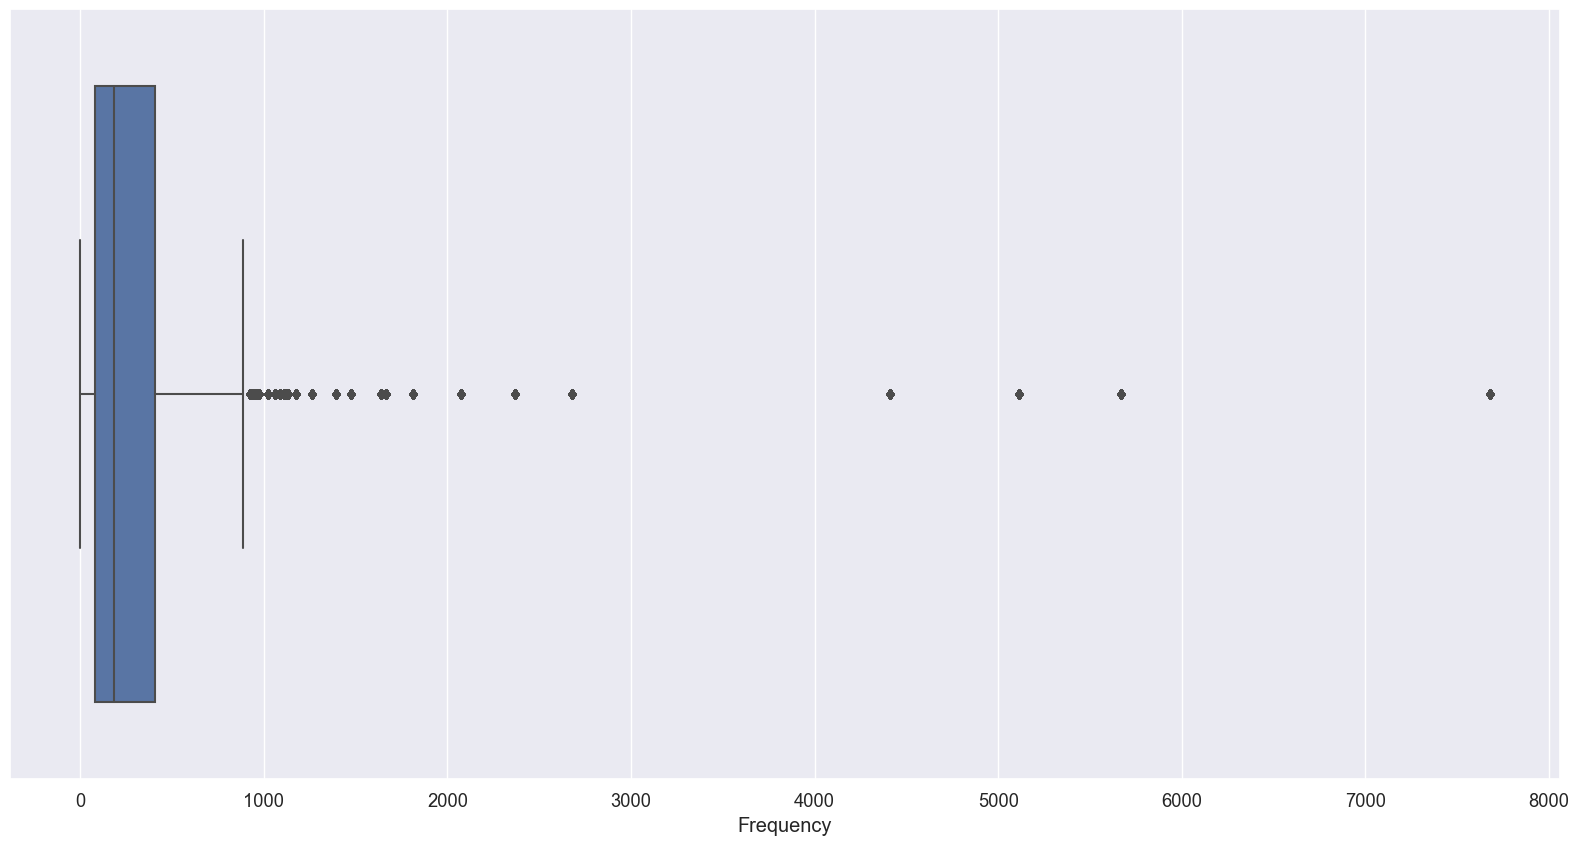

In [392]:
sns.boxplot(df2['Frequency'])

In [393]:
outliers = detect_outliers(df2 , 0 , ['Amount', 'Frequency'])

In [394]:
len(outliers)

40090

In [395]:
outliers

[895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984,
 985,
 986,
 987,
 988,
 989,
 990,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 999,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,

In [396]:
df2.loc[outliers]

Quantity  UnitPrice         Country  TotalPrice  Year Quarter Month  \
895           23       4.25  United Kingdom       97.75  2010       4    12   
896            5       4.95  United Kingdom       24.75  2010       4    12   
897           10       1.95  United Kingdom       19.50  2010       4    12   
898            2       2.10  United Kingdom        4.20  2010       4    12   
899            6       1.25  United Kingdom        7.50  2010       4    12   
...          ...        ...             ...         ...   ...     ...   ...   
212433         1       4.15  United Kingdom        4.15  2011       4    12   
212434         6       0.19  United Kingdom        1.14  2011       4    12   
212435        36       0.42  United Kingdom       15.12  2011       4    12   
212436         1      12.50  United Kingdom       12.50  2011       4    12   
212437         3       1.25  United Kingdom        3.75  2011       4    12   

       Week Weekday Day   Day_Name Hour Minute  Season     Period    Amount  \
895      48       2   1  Wednesday    9     41  Winter    morning  60632.75   
896      48       2   1  Wednesday    9     41  Winter    morning  60632.75   
897      48       2   1  Wednesday    9     41  Winter    morning  60632.75   
898      48       2   1  Wednesday    9     41  Winter    morning  60632.75   
899      48       2   1  Wednesday    9     41  Winter    morning  60632.75   
...     ...     ...  ..        ...  ...    ...     ...        ...       ...   
212433   48       6   4     Sunday   13     59  Winter  afternoon   3017.28   
212434   48       6   4     Sunday   13     59  Winter  afternoon   3017.28   
212435   48       6   4     Sunday   13     59  Winter  afternoon   3017.28   
212436   48       6   4     Sunday   13     59  Winter  afternoon   3017.28   
212437   48       6   4     Sunday   13     59  Winter  afternoon   3017.28   

        Frequency  
895          2366  
896          2366  
897          2366  
898          2366  
899          2366  
...           ...  
212433        947  
212434        947  
212435        947  
212436        947  
212437        947  

[40090 rows x 17 columns]

In [397]:
#df2.drop(outliers , axis = 0 , inplace = True)

In [398]:
df2.reset_index(drop = True , inplace = True)

In [399]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247193 entries, 0 to 247192
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Quantity    247193 non-null  int64  
 1   UnitPrice   247193 non-null  float64
 2   Country     247193 non-null  object 
 3   TotalPrice  247193 non-null  float64
 4   Year        247193 non-null  object 
 5   Quarter     247193 non-null  object 
 6   Month       247193 non-null  object 
 7   Week        247193 non-null  object 
 8   Weekday     247193 non-null  object 
 9   Day         247193 non-null  object 
 10  Day_Name    247193 non-null  object 
 11  Hour        247193 non-null  object 
 12  Minute      247193 non-null  object 
 13  Season      247193 non-null  object 
 14  Period      247193 non-null  object 
 15  Amount      247193 non-null  float64
 16  Frequency   247193 non-null  int64  
dtypes: float64(3), int64(2), object(12)
memory usage: 32.1+ MB


** Binary encoding & One hot encoding **

In [400]:
Encoder = BinaryEncoder()
Transformed_country_df = Encoder.fit_transform(df2[['Country']])

In [401]:
Transformed_country_df

Country_0  Country_1  Country_2  Country_3  Country_4  Country_5
0               0          0          0          0          0          1
1               0          0          0          0          0          1
2               0          0          0          0          0          1
3               0          0          0          0          0          1
4               0          0          0          0          0          1
...           ...        ...        ...        ...        ...        ...
247188          0          0          0          1          1          0
247189          0          0          0          1          1          0
247190          0          0          0          1          1          0
247191          0          0          0          1          1          0
247192          0          0          0          1          1          0

[247193 rows x 6 columns]

In [402]:
encoder = OneHotEncoder(sparse=False , drop='first')
Transformed_Cats = encoder.fit_transform(df2[['Day_Name' , 'Season' , 'Period']])
Transformed_Cats_df = pd.DataFrame(Transformed_Cats , columns= encoder.get_feature_names())

In [403]:
Transformed_Cats_df

x0_Monday  x0_Sunday  x0_Thursday  x0_Tuesday  x0_Wednesday  \
0             0.0        0.0          0.0         0.0           1.0   
1             0.0        0.0          0.0         0.0           1.0   
2             0.0        0.0          0.0         0.0           1.0   
3             0.0        0.0          0.0         0.0           1.0   
4             0.0        0.0          0.0         0.0           1.0   
...           ...        ...          ...         ...           ...   
247188        0.0        0.0          0.0         0.0           0.0   
247189        0.0        0.0          0.0         0.0           0.0   
247190        0.0        0.0          0.0         0.0           0.0   
247191        0.0        0.0          0.0         0.0           0.0   
247192        0.0        0.0          0.0         0.0           0.0   

        x1_Spring  x1_Summer  x1_Winter  x2_evening  x2_morning  
0             0.0        0.0        1.0         0.0         1.0  
1             0.0        0.0        1.0         0.0         1.0  
2             0.0        0.0        1.0         0.0         1.0  
3             0.0        0.0        1.0         0.0         1.0  
4             0.0        0.0        1.0         0.0         1.0  
...           ...        ...        ...         ...         ...  
247188        0.0        0.0        1.0         0.0         1.0  
247189        0.0        0.0        1.0         0.0         1.0  
247190        0.0        0.0        1.0         0.0         1.0  
247191        0.0        0.0        1.0         0.0         1.0  
247192        0.0        0.0        1.0         0.0         1.0  

[247193 rows x 10 columns]

In [404]:
df3 = pd.concat([ df2 , Transformed_country_df , Transformed_Cats_df] , axis = 1)

In [405]:
df3

Quantity  UnitPrice         Country  TotalPrice  Year Quarter Month  \
0              6       2.55  United Kingdom       15.30  2010       4    12   
1              6       3.39  United Kingdom       20.34  2010       4    12   
2              8       2.75  United Kingdom       22.00  2010       4    12   
3              2       7.65  United Kingdom       15.30  2010       4    12   
4              6       4.25  United Kingdom       25.50  2010       4    12   
...          ...        ...             ...         ...   ...     ...   ...   
247188         6       2.08         Germany       12.48  2011       4    12   
247189        10       1.65         Germany       16.50  2011       4    12   
247190         9       4.95         Germany       44.55  2011       4    12   
247191        12       0.85         Germany       10.20  2011       4    12   
247192        12       2.08         Germany       24.96  2011       4    12   

       Week Weekday Day  ... x0_Monday x0_Sunday x0_Thursday x0_Tuesday  \
0        48       2   1  ...       0.0       0.0         0.0        0.0   
1        48       2   1  ...       0.0       0.0         0.0        0.0   
2        48       2   1  ...       0.0       0.0         0.0        0.0   
3        48       2   1  ...       0.0       0.0         0.0        0.0   
4        48       2   1  ...       0.0       0.0         0.0        0.0   
...     ...     ...  ..  ...       ...       ...         ...        ...   
247188   49       4   9  ...       0.0       0.0         0.0        0.0   
247189   49       4   9  ...       0.0       0.0         0.0        0.0   
247190   49       4   9  ...       0.0       0.0         0.0        0.0   
247191   49       4   9  ...       0.0       0.0         0.0        0.0   
247192   49       4   9  ...       0.0       0.0         0.0        0.0   

       x0_Wednesday  x1_Spring  x1_Summer  x1_Winter  x2_evening  x2_morning  
0               1.0        0.0        0.0        1.0         0.0         1.0  
1               1.0        0.0        0.0        1.0         0.0         1.0  
2               1.0        0.0        0.0        1.0         0.0         1.0  
3               1.0        0.0        0.0        1.0         0.0         1.0  
4               1.0        0.0        0.0        1.0         0.0         1.0  
...             ...        ...        ...        ...         ...         ...  
247188          0.0        0.0        0.0        1.0         0.0         1.0  
247189          0.0        0.0        0.0        1.0         0.0         1.0  
247190          0.0        0.0        0.0        1.0         0.0         1.0  
247191          0.0        0.0        0.0        1.0         0.0         1.0  
247192          0.0        0.0        0.0        1.0         0.0         1.0  

[247193 rows x 33 columns]

In [406]:
df3.drop(['Country' , 'Day_Name' , 'Season' , 'Period'] , axis = 1 , inplace = True)

In [407]:
df3

Quantity  UnitPrice  TotalPrice  Year Quarter Month Week Weekday Day  \
0              6       2.55       15.30  2010       4    12   48       2   1   
1              6       3.39       20.34  2010       4    12   48       2   1   
2              8       2.75       22.00  2010       4    12   48       2   1   
3              2       7.65       15.30  2010       4    12   48       2   1   
4              6       4.25       25.50  2010       4    12   48       2   1   
...          ...        ...         ...   ...     ...   ...  ...     ...  ..   
247188         6       2.08       12.48  2011       4    12   49       4   9   
247189        10       1.65       16.50  2011       4    12   49       4   9   
247190         9       4.95       44.55  2011       4    12   49       4   9   
247191        12       0.85       10.20  2011       4    12   49       4   9   
247192        12       2.08       24.96  2011       4    12   49       4   9   

       Hour  ... x0_Monday  x0_Sunday  x0_Thursday  x0_Tuesday  x0_Wednesday  \
0         8  ...       0.0        0.0          0.0         0.0           1.0   
1         8  ...       0.0        0.0          0.0         0.0           1.0   
2         8  ...       0.0        0.0          0.0         0.0           1.0   
3         8  ...       0.0        0.0          0.0         0.0           1.0   
4         8  ...       0.0        0.0          0.0         0.0           1.0   
...     ...  ...       ...        ...          ...         ...           ...   
247188   12  ...       0.0        0.0          0.0         0.0           0.0   
247189   12  ...       0.0        0.0          0.0         0.0           0.0   
247190   12  ...       0.0        0.0          0.0         0.0           0.0   
247191   12  ...       0.0        0.0          0.0         0.0           0.0   
247192   12  ...       0.0        0.0          0.0         0.0           0.0   

        x1_Spring  x1_Summer  x1_Winter  x2_evening  x2_morning  
0             0.0        0.0        1.0         0.0         1.0  
1             0.0        0.0        1.0         0.0         1.0  
2             0.0        0.0        1.0         0.0         1.0  
3             0.0        0.0        1.0         0.0         1.0  
4             0.0        0.0        1.0         0.0         1.0  
...           ...        ...        ...         ...         ...  
247188        0.0        0.0        1.0         0.0         1.0  
247189        0.0        0.0        1.0         0.0         1.0  
247190        0.0        0.0        1.0         0.0         1.0  
247191        0.0        0.0        1.0         0.0         1.0  
247192        0.0        0.0        1.0         0.0         1.0  

[247193 rows x 29 columns]

In [408]:
df3.duplicated().sum()

0

In [409]:
df3.to_csv('E-commerce_Data2.csv', index=False)